In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from keras.utils import to_categorical
from keras.regularizers import l2

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")


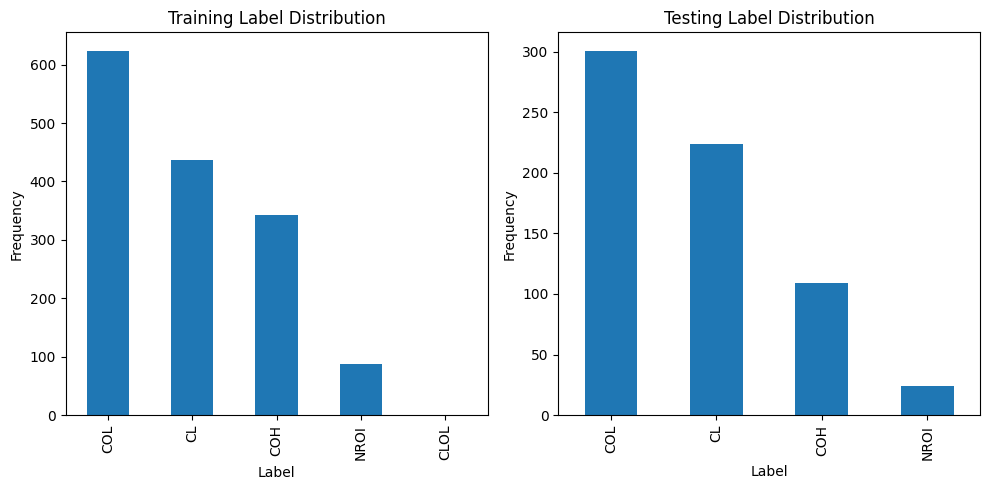

In [ ]:
import matplotlib.pyplot as plt

# Calculate label distribution for training and testing data
train_label_distribution = train_df_15["Label"].value_counts()
test_label_distribution = test_df_15["Label"].value_counts()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
train_label_distribution.plot(kind='bar')
plt.title('Training Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
test_label_distribution.plot(kind='bar')
plt.title('Testing Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


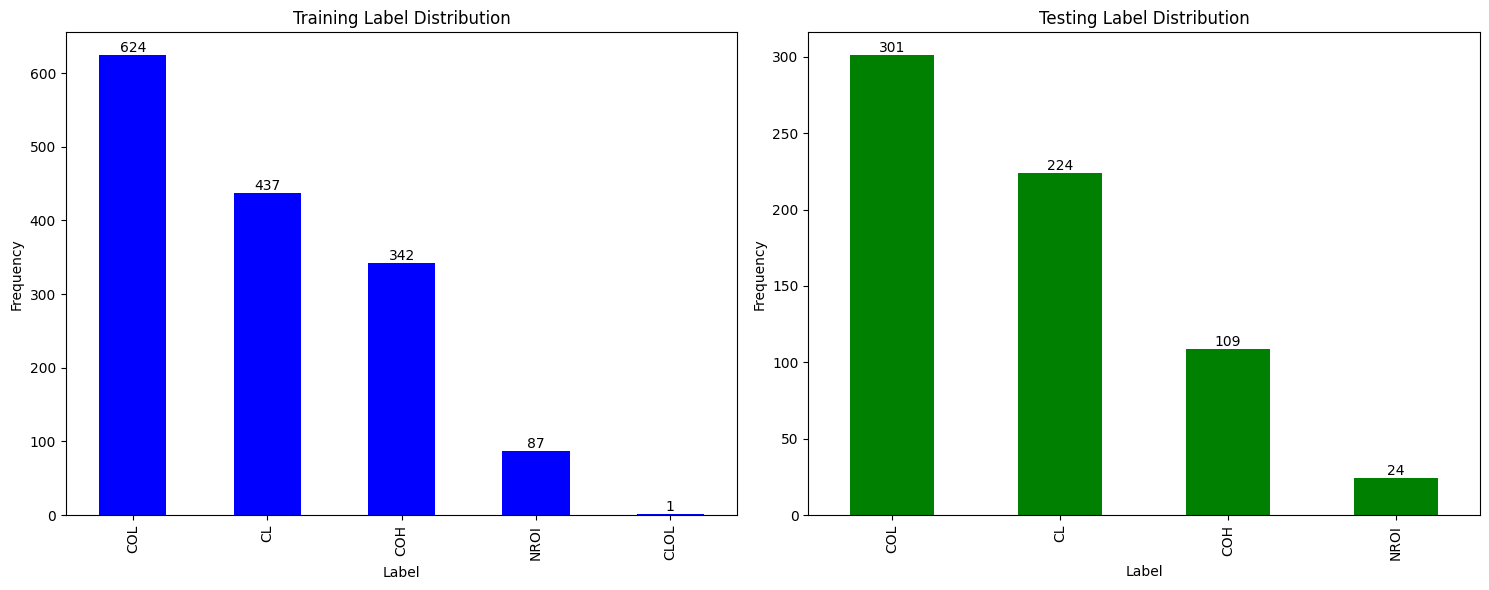

In [ ]:
import matplotlib.pyplot as plt

# Calculate label distribution for training and testing data
train_label_distribution = train_df_15["Label"].value_counts()
test_label_distribution = test_df_15["Label"].value_counts()

# Plot histograms
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
train_label_distribution.plot(kind='bar', color='blue')
plt.title('Training Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
for i, count in enumerate(train_label_distribution):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.subplot(1, 2, 2)
test_label_distribution.plot(kind='bar', color='green')
plt.title('Testing Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
for i, count in enumerate(test_label_distribution):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
class_counts =df_15['Class'].value_counts()

# Display the counts
print("Class Counts:")
print(class_counts)

Class Counts:
2    926
0    660
1    452
3    111
Name: Class, dtype: int64


In [ ]:
2    926-->col
0    660-->cl
1    452-->coh
3    111-->nroi

# 3 Class Mapping: To create a DNN model that trains the labels 'COH' and 'NROI' to class 1, 'CL' to class 2, and 'COL' to class 3

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")

# Adjust class labels
df_15['Class'] = df_15['Class'].apply(lambda x: 0 if x <= 1 else x - 1)

# Split the data into train and test sets
train_df_15 = pd.concat([df_15[df_15["Day"] <= 1095], df_15[(df_15["Day"] > 1460) & (df_15["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15[(df_15["Day"] > 1095) & (df_15["Day"] <= 1460)], df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

# Convert labels to one-hot encoding with 3 classes
Y_train_15 = to_categorical(Y_train_15, num_classes=3)
Y_test_15 = to_categorical(Y_test_15, num_classes=3)

# Define the model architecture
dnn_model_15 = Sequential()
dnn_model_15.add(Dense(128, activation="relu", input_shape=(X_train_15.shape[1],)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(64, activation="relu"))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(32, activation="relu"))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(16, activation="relu"))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

# Output layer with 3 neurons for 3 classes
dnn_model_15.add(Dense(3, activation="softmax"))

# Compile the model
optimizer = Adam(lr=0.001)
dnn_model_15.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = dnn_model_15.fit(X_train_15, Y_train_15, epochs=1000, batch_size=16, validation_data=(X_test_15, Y_test_15), callbacks=[early_stopping_callback])


Epoch 1/1000
94/94 [==============================] - 9s 17ms/step - loss: 1.6305 - accuracy: 0.3595 - val_loss: 1.1654 - val_accuracy: 0.1444
Epoch 2/1000
94/94 [==============================] - 1s 10ms/step - loss: 1.3166 - accuracy: 0.4547 - val_loss: 0.9985 - val_accuracy: 0.5897
Epoch 3/1000
94/94 [==============================] - 1s 11ms/step - loss: 1.1278 - accuracy: 0.4950 - val_loss: 0.7968 - val_accuracy: 0.6398
Epoch 4/1000
94/94 [==============================] - 1s 10ms/step - loss: 1.0402 - accuracy: 0.5312 - val_loss: 0.7863 - val_accuracy: 0.6915
Epoch 5/1000
94/94 [==============================] - 1s 8ms/step - loss: 1.0233 - accuracy: 0.5292 - val_loss: 0.7402 - val_accuracy: 0.7264
Epoch 6/1000
94/94 [==============================] - 1s 10ms/step - loss: 0.9390 - accuracy: 0.5540 - val_loss: 0.7675 - val_accuracy: 0.5167
Epoch 7/1000
94/94 [==============================] - 1s 7ms/step - loss: 0.8901 - accuracy: 0.5936 - val_loss: 0.7456 - val_accuracy: 0.5395
E

In [ ]:
# Convert integer predictions to one-hot encoding
y_15_pred_dnn_onehot = to_categorical(y_15_pred_dnn, num_classes=3)

# Calculate classification metrics
accuracy_15_dnn = accuracy_score(Y_test_15, y_15_pred_dnn_onehot)
conf_15_dnn = confusion_matrix(Y_test_15.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1))
precision_15_dnn = precision_score(Y_test_15.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1), average='macro')
recall_15_dnn = recall_score(Y_test_15.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1), average='macro')
f1_score_15_dnn = f1_score(Y_test_15.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1), average='macro')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)

DNN:
Precision: 0.4903020964654246
Recall: 0.5066594834036695
F1 Score: 0.4953955951193308
Accuracy: 0.729483282674772
Confusion Matrix:
 [[234  99   0]
 [ 55 246   0]
 [  6  18   0]]


# 0 & 1: duplicated 87


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")

# Combine classes 1, 2, and 3 into one class
df_15['Class'] = df_15['Class'].replace({1: 1, 2: 1, 0: 1})

# Replace class label 3 with 0
df_15['Class'] = df_15['Class'].replace({3: 0})

# Duplicate rows with class label 0
class_0_data = df_15[df_15['Class'] == 0]
duplicated_class_0_data = pd.concat([class_0_data] * 8, ignore_index=True)

# Insert duplicated rows back into the dataset
df_15_extended = pd.concat([df_15, duplicated_class_0_data], ignore_index=True)

# Shuffle the dataset to spread out the duplicated rows
df_15_extended = df_15_extended.sample(frac=1).reset_index(drop=True)

# Split the extended data into train and test sets
train_df_15 = pd.concat([df_15_extended[df_15_extended["Day"] <= 1095], df_15_extended[(df_15_extended["Day"] > 1460) & (df_15_extended["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15_extended[(df_15_extended["Day"] > 1095) & (df_15_extended["Day"] <= 1460)], df_15_extended[(df_15_extended["Day"] > 2555) & (df_15_extended["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

# Encode the modified class labels into binary labels
Y_train_15_binary = np.where(Y_train_15 == 0, 0, 1)
Y_test_15_binary = np.where(Y_test_15 == 0, 0, 1)



# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_15.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train_15, Y_train_15_binary, epochs=150, batch_size=16, validation_split=0.2, callbacks=[early_stopping_callback])

# Evaluate the model
accuracy = model.evaluate(X_test_15, Y_test_15_binary)[1]

Epoch 1/150
110/110 [==============================] - 3s 7ms/step - loss: 0.7277 - accuracy: 0.5449 - val_loss: 0.5671 - val_accuracy: 0.8356
Epoch 2/150
110/110 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.6129 - val_loss: 0.5910 - val_accuracy: 0.8356
Epoch 3/150
110/110 [==============================] - 1s 5ms/step - loss: 0.6743 - accuracy: 0.6003 - val_loss: 0.5992 - val_accuracy: 0.8356
Epoch 4/150
110/110 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.6003 - val_loss: 0.6072 - val_accuracy: 0.8356
Epoch 5/150
110/110 [==============================] - 1s 5ms/step - loss: 0.6644 - accuracy: 0.5946 - val_loss: 0.5711 - val_accuracy: 0.8356
Epoch 6/150
110/110 [==============================] - 1s 5ms/step - loss: 0.6581 - accuracy: 0.6089 - val_loss: 0.5927 - val_accuracy: 0.8356
Epoch 7/150
110/110 [==============================] - 1s 5ms/step - loss: 0.6547 - accuracy: 0.6129 - val_loss: 0.5763 - val_accuracy: 0.8356

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test set
y_15_pred_dnn = model.predict(X_test_15)
y_15_pred_dnn_binary = np.where(y_15_pred_dnn > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Calculate classification metrics
accuracy_15_dnn = accuracy_score(Y_test_15_binary, y_15_pred_dnn_binary)
conf_15_dnn = confusion_matrix(Y_test_15_binary, y_15_pred_dnn_binary)
precision_15_dnn = precision_score(Y_test_15_binary, y_15_pred_dnn_binary)
recall_15_dnn = recall_score(Y_test_15_binary, y_15_pred_dnn_binary)
f1_score_15_dnn = f1_score(Y_test_15_binary, y_15_pred_dnn_binary)


27/27 [==============================] - 0s 2ms/step


In [ ]:
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)

DNN:
Precision: 0.7458823529411764
Recall: 1.0
F1 Score: 0.8544474393530997
Accuracy: 0.7458823529411764
Confusion Matrix:
 [[  0 216]
 [  0 634]]


# COH & NROI | COL | COH

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")

# Combine classes 1, 2, and 3 into one class
df_15['Class'] = df_15['Class'].replace({3: 0, 1: 0, 2: 2, 0: 1})

# Split the data into train and test sets
train_df_15 = pd.concat([df_15[df_15["Day"] <= 1095], df_15[(df_15["Day"] > 1460) & (df_15["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15[(df_15["Day"] > 1095) & (df_15["Day"] <= 1460)], df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

# Encode the class labels into one-hot format
Y_train_15_onehot = to_categorical(Y_train_15)
Y_test_15_onehot = to_categorical(Y_test_15)

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_15.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for 3 classes

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_15, Y_train_15_onehot, epochs=150, batch_size=16, validation_split=0.2, callbacks=[early_stopping_callback])


Epoch 1/150
75/75 [==============================] - 1s 5ms/step - loss: 1.1326 - accuracy: 0.3641 - val_loss: 1.0539 - val_accuracy: 0.3445
Epoch 2/150
75/75 [==============================] - 0s 3ms/step - loss: 1.0356 - accuracy: 0.4354 - val_loss: 1.0399 - val_accuracy: 0.4849
Epoch 3/150
75/75 [==============================] - 0s 3ms/step - loss: 1.0445 - accuracy: 0.4388 - val_loss: 1.0067 - val_accuracy: 0.6355
Epoch 4/150
75/75 [==============================] - 0s 3ms/step - loss: 1.0192 - accuracy: 0.4513 - val_loss: 0.9717 - val_accuracy: 0.6321
Epoch 5/150
75/75 [==============================] - 0s 3ms/step - loss: 0.9958 - accuracy: 0.4857 - val_loss: 0.9497 - val_accuracy: 0.6455
Epoch 6/150
75/75 [==============================] - 0s 3ms/step - loss: 0.9650 - accuracy: 0.5092 - val_loss: 0.9261 - val_accuracy: 0.6455
Epoch 7/150
75/75 [==============================] - 0s 4ms/step - loss: 0.9565 - accuracy: 0.4924 - val_loss: 0.8951 - val_accuracy: 0.6990
Epoch 8/150
7

In [ ]:
df_15.head()

,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,Month,Name,Day,Class,Label
0,0.215782,0.216164,0.217243,0.217349,0.218306,0.217968,0.217241,0.215128,0.213058,0.210526,...,0.259653,0,0,1,0,12,2917_c2_cp2_66_11,2917,0,CL
1,0.190453,0.191821,0.193863,0.195419,0.197259,0.198331,0.199015,0.198428,0.197349,0.196754,...,0.224903,0,1,1,0,12,2910_c1_cp1_98_18,2910,0,CL
2,0.162689,0.162123,0.162202,0.161306,0.161527,0.161512,0.160591,0.159627,0.158076,0.156911,...,0.151062,0,1,1,0,12,2908_c1_cp1_79_13,2908,0,CL
3,0.330736,0.324732,0.319045,0.313353,0.309349,0.304369,0.299015,0.292240,0.285714,0.279882,...,0.329151,0,0,0,0,12,2908_c4_cp2_21_20,2908,0,CL
4,0.149050,0.149464,0.150511,0.151559,0.152227,0.153166,0.153202,0.152750,0.152185,0.151500,...,0.154440,0,1,1,0,12,2907_c1_cp1_76_13,2907,0,CL


In [ ]:
class_counts =df_15['Class'].value_counts()

# Display the counts
print("Class Counts:")
print(class_counts)

'''
2    926-->col
0    660-->cl
1    452-->coh
3    111-->nroi
'''

Class Counts:
2    926
1    660
0    563
Name: Class, dtype: int64


In [ ]:
# Predict on the test set
y_test_pred_prob = model.predict(X_test_15)
y_test_pred_classes = np.argmax(y_test_pred_prob, axis=1)  # Convert probabilities to class labels

# Calculate classification metrics
accuracy = np.mean(y_test_pred_classes == Y_test_15)
confusion_matrix = pd.crosstab(Y_test_15, y_test_pred_classes, rownames=['Actual'], colnames=['Predicted'])
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * precision * recall / (precision + recall)

# Print classification metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print("Confusion Matrix:\n", confusion_matrix)


21/21 [==============================] - 0s 2ms/step
Classification Metrics:
Accuracy: 0.547112462006079
Precision: Predicted
0    0.426357
1    0.950495
2    0.515050
dtype: float64
Recall: Actual
0    0.827068
1    0.428571
2    0.511628
dtype: float64
F1 Score: Predicted
0    0.562660
1    0.590769
2    0.513333
dtype: float64
Confusion Matrix:
 Predicted    0   1    2
Actual                 
0          110   4   19
1            2  96  126
2          146   1  154


In [ ]:
'''from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define the two confusion matrices
confusion_matrix1 = [[206, 1, 17], [6, 106, 21], [6, 8, 287]]  # Sample confusion matrix 1
confusion_matrix2 = [[210, 1, 13], [7, 110, 15], [12, 9, 280]]   # Sample confusion matrix 2

# Flatten the confusion matrices for calculation
flat_cm1 = [val for sublist in confusion_matrix1 for val in sublist]
flat_cm2 = [val for sublist in confusion_matrix2 for val in sublist]

# Calculate metrics for confusion matrix 1
accuracy1 = accuracy_score(np.argmax(flat_cm1, axis=1), np.argmax(flat_cm1, axis=1))
precision1 = precision_score(np.argmax(flat_cm1, axis=1), np.argmax(flat_cm1, axis=1), average='weighted')
recall1 = recall_score(np.argmax(flat_cm1, axis=1), np.argmax(flat_cm1, axis=1), average='weighted')
f1_score1 = f1_score(np.argmax(flat_cm1, axis=1), np.argmax(flat_cm1, axis=1), average='weighted')

# Calculate metrics for confusion matrix 2
accuracy2 = accuracy_score(np.argmax(flat_cm2, axis=1), np.argmax(flat_cm2, axis=1))
precision2 = precision_score(np.argmax(flat_cm2, axis=1), np.argmax(flat_cm2, axis=1), average='weighted')
recall2 = recall_score(np.argmax(flat_cm2, axis=1), np.argmax(flat_cm2, axis=1), average='weighted')
f1_score2 = f1_score(np.argmax(flat_cm2, axis=1), np.argmax(flat_cm2, axis=1), average='weighted')

# Print the metrics for comparison
print("Confusion Matrix 1:")
print(confusion_matrix1)
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_score1)

print("\nConfusion Matrix 2:")
print(confusion_matrix2)
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f1_score2)


# what days are missclassified (col, coh, cl, nroi)'''

'from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score\n\n# Define the two confusion matrices\nconfusion_matrix1 = [[206, 1, 17], [6, 106, 21], [6, 8, 287]]  # Sample confusion matrix 1\nconfusion_matrix2 = [[210, 1, 13], [7, 110, 15], [12, 9, 280]]   # Sample confusion matrix 2\n\n# Flatten the confusion matrices for calculation\nflat_cm1 = [val for sublist in confusion_matrix1 for val in sublist]\nflat_cm2 = [val for sublist in confusion_matrix2 for val in sublist]\n\n# Calculate metrics for confusion matrix 1\naccuracy1 = accuracy_score(np.argmax(flat_cm1, axis=1), np.argmax(flat_cm1, axis=1))\nprecision1 = precision_score(np.argmax(flat_cm1, axis=1), np.argmax(flat_cm1, axis=1), average=\'weighted\')\nrecall1 = recall_score(np.argmax(flat_cm1, axis=1), np.argmax(flat_cm1, axis=1), average=\'weighted\')\nf1_score1 = f1_score(np.argmax(flat_cm1, axis=1), np.argmax(flat_cm1, axis=1), average=\'weighted\')\n\n# Calculate metrics for confu

# Binary Classification

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")

# Combine classes 1, 2, and 3 into one class
df_15['Class'] = df_15['Class'].replace({2: 1, 0: 1})
df_15['Class'] = df_15['Class'].replace({3: 0, 1: 0 })


# Convert labels to binary format
Y_test_15_binary = np.where(Y_test_15 == 1, 1, 0)  # Map class 1 to 1, all other classes to 0
Y_test_15_onehot = to_categorical(Y_test_15_binary, num_classes=2)

# Split the data into train and test sets
train_df_15 = pd.concat([df_15[df_15["Day"] <= 1095], df_15[(df_15["Day"] > 1460) & (df_15["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15[(df_15["Day"] > 1095) & (df_15["Day"] <= 1460)], df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

# Encode the modified class labels into binary labels
Y_train_15_binary = np.where(Y_train_15 == 0, 0, 1)
Y_test_15_binary = np.where(Y_test_15 == 0, 0, 1)

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_15.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so output layer has 1 neuron with sigmoid activation

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_15, Y_train_15_binary, epochs=150, batch_size=16, validation_split=0.2, callbacks=[early_stopping_callback])


Epoch 1/150
75/75 [==============================] - 1s 5ms/step - loss: 0.0344 - accuracy: 0.9941 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 2/150
75/75 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3/150
75/75 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/150
75/75 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.1259e-04 - val_accuracy: 1.0000
Epoch 5/150
75/75 [==============================] - 0s 3ms/step - loss: 9.0222e-04 - accuracy: 1.0000 - val_loss: 3.3048e-04 - val_accuracy: 1.0000
Epoch 6/150
75/75 [==============================] - 0s 3ms/step - loss: 4.0556e-04 - accuracy: 1.0000 - val_loss: 2.1643e-04 - val_accuracy: 1.0000
Epoch 7/150
75/75 [==============================] - 0s 3ms/step - loss: 4.6886e-04 - accuracy: 1.0000 - val_loss: 1.3407e-04 - val_ac

In [ ]:

# Predict on the test set
y_15_pred_dnn = model.predict(X_test_15)
y_15_pred_dnn_binary = np.where(y_15_pred_dnn > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Calculate classification metrics
accuracy_15_dnn = accuracy_score(Y_test_15_binary, y_15_pred_dnn_binary)
conf_15_dnn = confusion_matrix(Y_test_15_binary, y_15_pred_dnn_binary)
precision_15_dnn = precision_score(Y_test_15_binary, y_15_pred_dnn_binary)
recall_15_dnn = recall_score(Y_test_15_binary, y_15_pred_dnn_binary)
f1_score_15_dnn = f1_score(Y_test_15_binary, y_15_pred_dnn_binary)

21/21 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [ ]:
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)

DNN:
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 1.0
Confusion Matrix:
 [[658]]


In [ ]:
2    926-->col
0    660-->cl
1    452-->coh
3    111-->nroi

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")

# Combine classes 1, 2, and 3 into one class
df_15['Class'] = df_15['Class'].replace({2: 1, 1: 0, 3: 0})

# Split the data into train and test sets
train_df_15 = df_15[df_15["Day"] <= 2555]
test_df_15 = df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_15.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so output layer has 1 neuron with sigmoid activation

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_15, Y_train_15, epochs=150, batch_size=16, validation_split=0.2, callbacks=[early_stopping_callback], verbose=1)

# Predict on the test set
y_15_pred_dnn = model.predict(X_test_15)
y_15_pred_dnn_binary = np.where(y_15_pred_dnn > 0.5, 1, 0)  # Convert probabilities to binary predictions


Epoch 1/150
92/92 [==============================] - 3s 8ms/step - loss: 0.7352 - accuracy: 0.5395 - val_loss: 0.6896 - val_accuracy: 0.4360
Epoch 2/150
92/92 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.5565 - val_loss: 0.6803 - val_accuracy: 0.5913
Epoch 3/150
92/92 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5715 - val_loss: 0.6760 - val_accuracy: 0.5913
Epoch 4/150
92/92 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.5702 - val_loss: 0.6710 - val_accuracy: 0.5913
Epoch 5/150
92/92 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.5831 - val_loss: 0.6673 - val_accuracy: 0.5913
Epoch 6/150
92/92 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.6022 - val_loss: 0.6633 - val_accuracy: 0.4469
Epoch 7/150
92/92 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5879 - val_loss: 0.6645 - val_accuracy: 0.5913
Epoch 8/150
9

In [ ]:
# Calculate classification metrics
accuracy_15_dnn = accuracy_score(Y_test_15, y_15_pred_dnn_binary)
conf_15_dnn = confusion_matrix(Y_test_15, y_15_pred_dnn_binary)
precision_15_dnn = precision_score(Y_test_15, y_15_pred_dnn_binary)
recall_15_dnn = recall_score(Y_test_15, y_15_pred_dnn_binary)
f1_score_15_dnn = f1_score(Y_test_15, y_15_pred_dnn_binary)

# Print classification metrics
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)


DNN:
Precision: 0.9152542372881356
Recall: 0.38028169014084506
F1 Score: 0.5373134328358209
Accuracy: 0.7038216560509554
Confusion Matrix:
 [[167   5]
 [ 88  54]]


# DNN- 0: NROI and 1,2,3: rest of classes

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")

# Combine classes 1, 2, and 3 into one class
df_15['Class'] = df_15['Class'].replace({1: 1, 2: 1, 0: 1})
df_15['Class'] = df_15['Class'].replace({3: 0})


# Convert labels to binary format
Y_test_15_binary = np.where(Y_test_15 == 1, 1, 0)  # Map class 1 to 1, all other classes to 0
Y_test_15_onehot = to_categorical(Y_test_15_binary, num_classes=2)

#3 is for nroi, replace 3 for 0
#training 87: 1400 (spread out df.train) *10
# [[  0  24]-->
 #[  0 634]]

#features added (colomns): number of pixels in the connected compenet for any of the classes || location by 9 parts
#coh & nroi --> 0 (0&3) | cl--> 1 | col--> 2 \\ DNN
#1    452 & 3    111 --> 1\\ this is non-binary

# Split the data into train and test sets
train_df_15 = pd.concat([df_15[df_15["Day"] <= 1095], df_15[(df_15["Day"] > 1460) & (df_15["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15[(df_15["Day"] > 1095) & (df_15["Day"] <= 1460)], df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

# Encode the modified class labels into binary labels
Y_train_15_binary = np.where(Y_train_15 == 0, 0, 1)
Y_test_15_binary = np.where(Y_test_15 == 0, 0, 1)

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_15.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so output layer has 1 neuron with sigmoid activation

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_15, Y_train_15_binary, epochs=150, batch_size=16, validation_split=0.2, callbacks=[early_stopping_callback])


Epoch 1/150
75/75 [==============================] - 1s 6ms/step - loss: 0.4022 - accuracy: 0.9136 - val_loss: 0.1370 - val_accuracy: 0.9866
Epoch 2/150
75/75 [==============================] - 0s 4ms/step - loss: 0.3811 - accuracy: 0.9295 - val_loss: 0.1486 - val_accuracy: 0.9866
Epoch 3/150
75/75 [==============================] - 0s 3ms/step - loss: 0.3658 - accuracy: 0.9304 - val_loss: 0.1352 - val_accuracy: 0.9866
Epoch 4/150
75/75 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.9295 - val_loss: 0.1577 - val_accuracy: 0.9866
Epoch 5/150
75/75 [==============================] - 0s 4ms/step - loss: 0.3335 - accuracy: 0.9304 - val_loss: 0.1609 - val_accuracy: 0.9866
Epoch 6/150
75/75 [==============================] - 0s 4ms/step - loss: 0.3076 - accuracy: 0.9304 - val_loss: 0.1543 - val_accuracy: 0.9866
Epoch 7/150
75/75 [==============================] - 0s 3ms/step - loss: 0.2955 - accuracy: 0.9304 - val_loss: 0.1149 - val_accuracy: 0.9866
Epoch 8/150
7

In [ ]:
train_df_15.shape

(1491, 234)

In [ ]:
class_counts =train_df_15['Class'].value_counts()

# Display the counts
print("Class Counts:")
print(class_counts)

Class Counts:
1    1404
3      87
Name: Class, dtype: int64


In [ ]:

# Predict on the test set
y_15_pred_dnn = model.predict(X_test_15)
y_15_pred_dnn_binary = np.where(y_15_pred_dnn > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Calculate classification metrics
accuracy_15_dnn = accuracy_score(Y_test_15_binary, y_15_pred_dnn_binary)
conf_15_dnn = confusion_matrix(Y_test_15_binary, y_15_pred_dnn_binary)
precision_15_dnn = precision_score(Y_test_15_binary, y_15_pred_dnn_binary)
recall_15_dnn = recall_score(Y_test_15_binary, y_15_pred_dnn_binary)
f1_score_15_dnn = f1_score(Y_test_15_binary, y_15_pred_dnn_binary)

21/21 [==============================] - 0s 2ms/step


In [ ]:
'''# Convert integer predictions to one-hot encoding (if not already in one-hot format)
y_15_pred_dnn_onehot = to_categorical(y_15_pred_dnn, num_classes=2)

# Convert true labels to one-hot encoding
Y_test_15_onehot = to_categorical(Y_test_15, num_classes=2)

# Calculate classification metrics
accuracy_15_dnn = accuracy_score(Y_test_15_onehot, y_15_pred_dnn_onehot)
conf_15_dnn = confusion_matrix(Y_test_15_onehot.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1))
precision_15_dnn = precision_score(Y_test_15_onehot.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1), average='macro')
recall_15_dnn = recall_score(Y_test_15_onehot.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1), average='macro')
f1_score_15_dnn = f1_score(Y_test_15_onehot.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1), average='macro')'''


"# Convert integer predictions to one-hot encoding (if not already in one-hot format)\ny_15_pred_dnn_onehot = to_categorical(y_15_pred_dnn, num_classes=2)\n\n# Convert true labels to one-hot encoding\nY_test_15_onehot = to_categorical(Y_test_15, num_classes=2)\n\n# Calculate classification metrics\naccuracy_15_dnn = accuracy_score(Y_test_15_onehot, y_15_pred_dnn_onehot)\nconf_15_dnn = confusion_matrix(Y_test_15_onehot.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1))\nprecision_15_dnn = precision_score(Y_test_15_onehot.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1), average='macro')\nrecall_15_dnn = recall_score(Y_test_15_onehot.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1), average='macro')\nf1_score_15_dnn = f1_score(Y_test_15_onehot.argmax(axis=1), y_15_pred_dnn_onehot.argmax(axis=1), average='macro')"

In [ ]:
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)

DNN:
Precision: 0.9635258358662614
Recall: 1.0
F1 Score: 0.9814241486068112
Accuracy: 0.9635258358662614
Confusion Matrix:
 [[  0  24]
 [  0 634]]


# Initial DNN Model

In [ ]:

# Split the data into train and test sets
train_df_15 = pd.concat([df_15[df_15["Day"] <= 1095], df_15[(df_15["Day"] > 1460) & (df_15["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15[(df_15["Day"] > 1095) & (df_15["Day"] <= 1460)], df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)


In [ ]:
train_df_15.head()

,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,Month,Name,Day,Class,Label
1081,0.829031,0.835930,0.842669,0.846491,0.852178,0.856161,0.861084,0.859037,0.859107,0.859813,...,0.875965,1,0,0,1,12,1093_c17_cp2_19_63,1093,2,COL
1082,0.874817,0.870983,0.867511,0.863548,0.862457,0.859597,0.857635,0.850196,0.844379,0.840630,...,0.853282,1,0,0,1,12,1090_c17_cp2_27_63,1090,2,COL
1083,0.871408,0.864167,0.856308,0.846004,0.837983,0.828179,0.818719,0.805992,0.796269,0.791441,...,0.841699,1,0,0,1,12,1087_c16_cp2_17_59,1087,2,COL
1084,0.500244,0.506816,0.513395,0.519006,0.525698,0.529701,0.533498,0.533399,0.532646,0.532218,...,0.542471,1,0,0,0,12,1069_c11_cp1_15_27,1069,3,NROI
1085,0.813444,0.823272,0.831953,0.839181,0.847773,0.854197,0.859606,0.859528,0.859597,0.859813,...,0.882722,1,1,1,1,11,1055_c16_cp2_99_60,1055,2,COL


In [ ]:

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

Y_train_15 = to_categorical(Y_train_15, num_classes=4)


In [ ]:

# Define the model architecture
dnn_model_15 = Sequential()
dnn_model_15.add(Dense(64, activation="relu", input_shape=(X_train_15.shape[1],)))
dnn_model_15.add(Dropout(0.4))
dnn_model_15.add(Dense(32, activation="relu", kernel_regularizer=l2(0.02)))
dnn_model_15.add(Dropout(0.4))
dnn_model_15.add(Dense(16, activation="relu", kernel_regularizer=l2(0.02)))
dnn_model_15.add(Dropout(0.4))
dnn_model_15.add(Dense(4, activation="softmax"))


In [ ]:

# Compile the model
dnn_model_15.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:

# Early stopping
early_stopping = EarlyStopping(monitor='loss', patience=50)


In [ ]:

# Fit the model
dnn_model_15.fit(X_train_15, Y_train_15, epochs=1000, batch_size=16, callbacks=[early_stopping])


Epoch 1/1000
94/94 [==============================] - 2s 4ms/step - loss: 2.3606 - accuracy: 0.3206
Epoch 2/1000
94/94 [==============================] - 0s 4ms/step - loss: 1.8164 - accuracy: 0.3924
Epoch 3/1000
94/94 [==============================] - 0s 3ms/step - loss: 1.5652 - accuracy: 0.4192
Epoch 4/1000
94/94 [==============================] - 0s 2ms/step - loss: 1.4180 - accuracy: 0.4299
Epoch 5/1000
94/94 [==============================] - 0s 2ms/step - loss: 1.3168 - accuracy: 0.4487
Epoch 6/1000
94/94 [==============================] - 0s 2ms/step - loss: 1.2601 - accuracy: 0.4822
Epoch 7/1000
94/94 [==============================] - 0s 2ms/step - loss: 1.2066 - accuracy: 0.5084
Epoch 8/1000
94/94 [==============================] - 0s 2ms/step - loss: 1.1852 - accuracy: 0.5131
Epoch 9/1000
94/94 [==============================] - 0s 2ms/step - loss: 1.1365 - accuracy: 0.5252
Epoch 10/1000
94/94 [==============================] - 0s 2ms/step - loss: 1.1248 - accuracy: 0.5211

In [ ]:
# Make predictions
y_15_pred_dnn = dnn_model_15.predict(X_test_15).argmax(axis=1)
accuracy_15_dnn = accuracy_score(Y_test_15, y_15_pred_dnn)
conf_15_dnn = confusion_matrix(Y_test_15, y_15_pred_dnn)
precision_15_dnn = precision_score(Y_test_15, y_15_pred_dnn, average='macro')
recall_15_dnn = recall_score(Y_test_15, y_15_pred_dnn, average='macro')
f1_score_15_dnn = f1_score(Y_test_15, y_15_pred_dnn, average='macro')


21/21 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)

DNN:
Precision: 0.6214015915342895
Recall: 0.640697320230627
F1 Score: 0.6297969520191742
Accuracy: 0.8221884498480243
Confusion Matrix:
 [[202   1  50   0]
 [  2  96  11   0]
 [ 24   8 243   0]
 [  5  10   6   0]]


print y_predict


# DNN On New DataSet


In [ ]:
pip install --upgrade keras tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from keras.utils import to_categorical
from keras.regularizers import l2

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")


In [ ]:

# Split the data into train and test sets
train_df_15 = pd.concat([df_15[df_15["Day"] <= 1095], df_15[(df_15["Day"] > 1460) & (df_15["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15[(df_15["Day"] > 1095) & (df_15["Day"] <= 1460)], df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)


In [ ]:

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

Y_train_15 = to_categorical(Y_train_15, num_classes=4)


In [ ]:

# Define the model architecture
dnn_model_15 = Sequential()
dnn_model_15.add(Dense(64, activation="relu", input_shape=(X_train_15.shape[1],)))
dnn_model_15.add(Dropout(0.4))
dnn_model_15.add(Dense(32, activation="relu", kernel_regularizer=l2(0.02)))
dnn_model_15.add(Dropout(0.4))
dnn_model_15.add(Dense(16, activation="relu", kernel_regularizer=l2(0.02)))
dnn_model_15.add(Dropout(0.4))
dnn_model_15.add(Dense(4, activation="softmax"))


In [ ]:

# Compile the model
dnn_model_15.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:

# Early stopping
early_stopping = EarlyStopping(monitor='loss', patience=50)


In [ ]:

# Fit the model
dnn_model_15.fit(X_train_15, Y_train_15, epochs=1000, batch_size=16, callbacks=[early_stopping])


Epoch 1/1000
94/94 [==============================] - 4s 9ms/step - loss: 2.3565 - accuracy: 0.3058
Epoch 2/1000
94/94 [==============================] - 2s 23ms/step - loss: 1.8421 - accuracy: 0.3823
Epoch 3/1000
94/94 [==============================] - 1s 5ms/step - loss: 1.5753 - accuracy: 0.4494
Epoch 4/1000
94/94 [==============================] - 0s 4ms/step - loss: 1.4459 - accuracy: 0.4769
Epoch 5/1000
94/94 [==============================] - 0s 4ms/step - loss: 1.3466 - accuracy: 0.4883
Epoch 6/1000
94/94 [==============================] - 0s 5ms/step - loss: 1.2651 - accuracy: 0.5144
Epoch 7/1000
94/94 [==============================] - 0s 4ms/step - loss: 1.2337 - accuracy: 0.4883
Epoch 8/1000
94/94 [==============================] - 0s 3ms/step - loss: 1.2000 - accuracy: 0.5158
Epoch 9/1000
94/94 [==============================] - 0s 3ms/step - loss: 1.1488 - accuracy: 0.5158
Epoch 10/1000
94/94 [==============================] - 0s 3ms/step - loss: 1.1412 - accuracy: 0.531

In [ ]:
# Make predictions
y_15_pred_dnn = dnn_model_15.predict(X_test_15).argmax(axis=1)
accuracy_15_dnn = accuracy_score(Y_test_15, y_15_pred_dnn)
conf_15_dnn = confusion_matrix(Y_test_15, y_15_pred_dnn)
precision_15_dnn = precision_score(Y_test_15, y_15_pred_dnn, average='macro')
recall_15_dnn = recall_score(Y_test_15, y_15_pred_dnn, average='macro')
f1_score_15_dnn = f1_score(Y_test_15, y_15_pred_dnn, average='macro')


21/21 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)

DNN:
Precision: 0.6104627449639515
Recall: 0.6676814574506995
F1 Score: 0.6307010360216309
Accuracy: 0.837386018237082
Confusion Matrix:
 [[213   1  10   0]
 [  3 102   4   0]
 [ 26  39 236   0]
 [  6  14   4   0]]


In [ ]:
# Make predictions
y_15_pred_dnn = dnn_model_15.predict(X_test_15).argmax(axis=1)

# Get unique classes from Y_test_15 and y_15_pred_dnn
unique_classes = np.unique(np.concatenate((Y_test_15, y_15_pred_dnn)))

# Compute evaluation metrics
accuracy_15_dnn = accuracy_score(Y_test_15, y_15_pred_dnn)
conf_15_dnn = confusion_matrix(Y_test_15, y_15_pred_dnn, labels=unique_classes)
precision_15_dnn = precision_score(Y_test_15, y_15_pred_dnn, average='macro')
recall_15_dnn = recall_score(Y_test_15, y_15_pred_dnn, average='macro')
f1_score_15_dnn = f1_score(Y_test_15, y_15_pred_dnn, average='macro')


21/21 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Make predictions
y_15_pred_dnn = dnn_model_15.predict(X_test_15).argmax(axis=1)

# Get unique classes from Y_test_15 and y_15_pred_dnn
unique_classes = np.unique(np.concatenate((Y_test_15, y_15_pred_dnn)))

# Compute confusion matrix with class names
conf_15_dnn = confusion_matrix(Y_test_15, y_15_pred_dnn, labels=unique_classes)

# Display class names with confusion matrix
class_names = [str(c) for c in unique_classes]
confusion_df = pd.DataFrame(conf_15_dnn, columns=class_names, index=class_names)
print("Confusion Matrix:")
print(confusion_df)

# Compute other evaluation metrics
accuracy_15_dnn = accuracy_score(Y_test_15, y_15_pred_dnn)
precision_15_dnn = precision_score(Y_test_15, y_15_pred_dnn, average='macro')
recall_15_dnn = recall_score(Y_test_15, y_15_pred_dnn, average='macro')
f1_score_15_dnn = f1_score(Y_test_15, y_15_pred_dnn, average='macro')


21/21 [==============================] - 0s 3ms/step
Confusion Matrix:
     0    1    2  3
0  213    1   10  0
1    3  102    4  0
2   26   39  236  0
3    6   14    4  0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Modified DNN Model

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.optimizers import Adam

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")

# Split the data into train and test sets
train_df_15 = pd.concat([df_15[df_15["Day"] <= 1095], df_15[(df_15["Day"] > 1460) & (df_15["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15[(df_15["Day"] > 1095) & (df_15["Day"] <= 1460)], df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

Y_train_15 = to_categorical(Y_train_15, num_classes=4)

# Define the optimizer
optimizer = Adam(lr=0.001)



# Define the model architecture
dnn_model_15 = Sequential()
dnn_model_15.add(Dense(128, activation="relu", input_shape=(X_train_15.shape[1],)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(32, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(16, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(4, activation="softmax"))

# Compile the model with optimized parameters
dnn_model_15.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = dnn_model_15.fit(X_train_15, Y_train_15, epochs=1000, batch_size=16, callbacks=[early_stopping_callback])


Epoch 1/1000
89/94 [===========================>..] - ETA: 0s - loss: 3.0654 - accuracy: 0.3244

94/94 [==============================] - 6s 5ms/step - loss: 3.0339 - accuracy: 0.3300
Epoch 2/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.5484 - accuracy: 0.3982

94/94 [==============================] - 0s 5ms/step - loss: 2.5438 - accuracy: 0.3991
Epoch 3/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.2567 - accuracy: 0.4564

94/94 [==============================] - 0s 4ms/step - loss: 2.2525 - accuracy: 0.4594
Epoch 4/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.1364 - accuracy: 0.4702

94/94 [==============================] - 0s 5ms/step - loss: 2.1234 - accuracy: 0.4735
Epoch 5/1000
91/94 [============================>.] - ETA: 0s - loss: 1.9879 - accuracy: 0.5302

94/94 [==============================] - 0s 4ms/step - loss: 1.9831 - accuracy: 0.5305
Epoch 6/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.8969 - accuracy: 0.5490

94/94 [==============================] - 0s 4ms/step - loss: 1.9038 - accuracy: 0.5446
Epoch 7/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.8346 - accuracy: 0.5452

94/94 [==============================] - 1s 8ms/step - loss: 1.8334 - accuracy: 0.5419
Epoch 8/1000
76/94 [=======================>......] - ETA: 0s - loss: 1.7713 - accuracy: 0.5436

94/94 [==============================] - 0s 3ms/step - loss: 1.7607 - accuracy: 0.5493
Epoch 9/1000
75/94 [======================>.......] - ETA: 0s - loss: 1.7314 - accuracy: 0.5533

94/94 [==============================] - 0s 3ms/step - loss: 1.7130 - accuracy: 0.5567
Epoch 10/1000
91/94 [============================>.] - ETA: 0s - loss: 1.6401 - accuracy: 0.5680

94/94 [==============================] - 0s 3ms/step - loss: 1.6415 - accuracy: 0.5681
Epoch 11/1000
94/94 [==============================] - ETA: 0s - loss: 1.5747 - accuracy: 0.5721

94/94 [==============================] - 0s 3ms/step - loss: 1.5747 - accuracy: 0.5721
Epoch 12/1000
79/94 [========================>.....] - ETA: 0s - loss: 1.5407 - accuracy: 0.5759

94/94 [==============================] - 0s 3ms/step - loss: 1.5333 - accuracy: 0.5788
Epoch 13/1000
93/94 [============================>.] - ETA: 0s - loss: 1.4967 - accuracy: 0.5679

94/94 [==============================] - 0s 3ms/step - loss: 1.4962 - accuracy: 0.5681
Epoch 14/1000
93/94 [============================>.] - ETA: 0s - loss: 1.4830 - accuracy: 0.5309

94/94 [==============================] - 0s 3ms/step - loss: 1.4827 - accuracy: 0.5305
Epoch 15/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.4053 - accuracy: 0.5550

94/94 [==============================] - 0s 3ms/step - loss: 1.4083 - accuracy: 0.5587
Epoch 16/1000
76/94 [=======================>......] - ETA: 0s - loss: 1.3968 - accuracy: 0.5674

94/94 [==============================] - 0s 3ms/step - loss: 1.3871 - accuracy: 0.5674
Epoch 17/1000
78/94 [=======================>......] - ETA: 0s - loss: 1.3028 - accuracy: 0.5825

94/94 [==============================] - 0s 3ms/step - loss: 1.3144 - accuracy: 0.5788
Epoch 18/1000
93/94 [============================>.] - ETA: 0s - loss: 1.3203 - accuracy: 0.5759

94/94 [==============================] - 0s 3ms/step - loss: 1.3205 - accuracy: 0.5755
Epoch 19/1000
93/94 [============================>.] - ETA: 0s - loss: 1.2734 - accuracy: 0.5773

94/94 [==============================] - 0s 3ms/step - loss: 1.2737 - accuracy: 0.5775
Epoch 20/1000
92/94 [============================>.] - ETA: 0s - loss: 1.2516 - accuracy: 0.5747

94/94 [==============================] - 0s 3ms/step - loss: 1.2495 - accuracy: 0.5755
Epoch 21/1000
93/94 [============================>.] - ETA: 0s - loss: 1.2493 - accuracy: 0.5524

94/94 [==============================] - 0s 3ms/step - loss: 1.2496 - accuracy: 0.5520
Epoch 22/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.2037 - accuracy: 0.5737

94/94 [==============================] - 0s 3ms/step - loss: 1.2118 - accuracy: 0.5681
Epoch 23/1000
91/94 [============================>.] - ETA: 0s - loss: 1.2162 - accuracy: 0.5598

94/94 [==============================] - 0s 3ms/step - loss: 1.2139 - accuracy: 0.5620
Epoch 24/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.1738 - accuracy: 0.5580

94/94 [==============================] - 0s 3ms/step - loss: 1.1581 - accuracy: 0.5661
Epoch 25/1000
94/94 [==============================] - ETA: 0s - loss: 1.1373 - accuracy: 0.5614

94/94 [==============================] - 0s 3ms/step - loss: 1.1373 - accuracy: 0.5614
Epoch 26/1000
91/94 [============================>.] - ETA: 0s - loss: 1.1233 - accuracy: 0.5755

94/94 [==============================] - 0s 3ms/step - loss: 1.1277 - accuracy: 0.5734
Epoch 27/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.1212 - accuracy: 0.5646

94/94 [==============================] - 0s 4ms/step - loss: 1.1220 - accuracy: 0.5641
Epoch 28/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.1178 - accuracy: 0.5589

94/94 [==============================] - 0s 4ms/step - loss: 1.1223 - accuracy: 0.5587
Epoch 29/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.1170 - accuracy: 0.5566

94/94 [==============================] - 0s 4ms/step - loss: 1.1171 - accuracy: 0.5533
Epoch 30/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.0982 - accuracy: 0.5548

94/94 [==============================] - 0s 4ms/step - loss: 1.0954 - accuracy: 0.5553
Epoch 31/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.0766 - accuracy: 0.5603

94/94 [==============================] - 0s 4ms/step - loss: 1.0821 - accuracy: 0.5580
Epoch 32/1000
93/94 [============================>.] - ETA: 0s - loss: 1.0437 - accuracy: 0.5726

94/94 [==============================] - 0s 5ms/step - loss: 1.0440 - accuracy: 0.5728
Epoch 33/1000
77/94 [=======================>......] - ETA: 0s - loss: 1.0314 - accuracy: 0.5666

94/94 [==============================] - 0s 3ms/step - loss: 1.0253 - accuracy: 0.5674
Epoch 34/1000
77/94 [=======================>......] - ETA: 0s - loss: 1.0516 - accuracy: 0.5495

94/94 [==============================] - 0s 3ms/step - loss: 1.0598 - accuracy: 0.5520
Epoch 35/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.1020 - accuracy: 0.5097

94/94 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.5131
Epoch 36/1000
94/94 [==============================] - ETA: 0s - loss: 1.0661 - accuracy: 0.5520

94/94 [==============================] - 0s 3ms/step - loss: 1.0661 - accuracy: 0.5520
Epoch 37/1000
93/94 [============================>.] - ETA: 0s - loss: 1.0340 - accuracy: 0.5833

94/94 [==============================] - 0s 3ms/step - loss: 1.0361 - accuracy: 0.5835
Epoch 38/1000
93/94 [============================>.] - ETA: 0s - loss: 1.0323 - accuracy: 0.5806

94/94 [==============================] - 0s 3ms/step - loss: 1.0342 - accuracy: 0.5801
Epoch 39/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.0524 - accuracy: 0.5455

94/94 [==============================] - 0s 3ms/step - loss: 1.0430 - accuracy: 0.5540
Epoch 40/1000
78/94 [=======================>......] - ETA: 0s - loss: 1.0264 - accuracy: 0.5833

94/94 [==============================] - 0s 3ms/step - loss: 1.0262 - accuracy: 0.5755
Epoch 41/1000
75/94 [======================>.......] - ETA: 0s - loss: 1.0150 - accuracy: 0.5792

94/94 [==============================] - 0s 3ms/step - loss: 1.0083 - accuracy: 0.5781
Epoch 42/1000
94/94 [==============================] - ETA: 0s - loss: 0.9942 - accuracy: 0.5795

94/94 [==============================] - 0s 3ms/step - loss: 0.9942 - accuracy: 0.5795
Epoch 43/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.9777 - accuracy: 0.5774

94/94 [==============================] - 0s 3ms/step - loss: 0.9743 - accuracy: 0.5808
Epoch 44/1000
91/94 [============================>.] - ETA: 0s - loss: 1.0332 - accuracy: 0.5440

94/94 [==============================] - 0s 3ms/step - loss: 1.0318 - accuracy: 0.5453
Epoch 45/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.0154 - accuracy: 0.5588

94/94 [==============================] - 0s 3ms/step - loss: 1.0272 - accuracy: 0.5573
Epoch 46/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.0265 - accuracy: 0.5575

94/94 [==============================] - 0s 3ms/step - loss: 1.0224 - accuracy: 0.5620
Epoch 47/1000
76/94 [=======================>......] - ETA: 0s - loss: 1.0034 - accuracy: 0.5543

94/94 [==============================] - 0s 3ms/step - loss: 1.0064 - accuracy: 0.5573
Epoch 48/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9853 - accuracy: 0.5810

94/94 [==============================] - 0s 3ms/step - loss: 0.9804 - accuracy: 0.5842
Epoch 49/1000
94/94 [==============================] - ETA: 0s - loss: 0.9727 - accuracy: 0.5875

94/94 [==============================] - 0s 3ms/step - loss: 0.9727 - accuracy: 0.5875
Epoch 50/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.0197 - accuracy: 0.5647

94/94 [==============================] - 0s 3ms/step - loss: 1.0264 - accuracy: 0.5654
Epoch 51/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.0059 - accuracy: 0.5826

94/94 [==============================] - 0s 3ms/step - loss: 1.0016 - accuracy: 0.5808
Epoch 52/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.0358 - accuracy: 0.5492

94/94 [==============================] - 0s 3ms/step - loss: 1.0419 - accuracy: 0.5486
Epoch 53/1000
79/94 [========================>.....] - ETA: 0s - loss: 1.0343 - accuracy: 0.5514

94/94 [==============================] - 0s 3ms/step - loss: 1.0227 - accuracy: 0.5553
Epoch 54/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.0150 - accuracy: 0.5478

94/94 [==============================] - 0s 3ms/step - loss: 1.0207 - accuracy: 0.5473
Epoch 55/1000
91/94 [============================>.] - ETA: 0s - loss: 1.0933 - accuracy: 0.5385

94/94 [==============================] - 0s 3ms/step - loss: 1.0922 - accuracy: 0.5366
Epoch 56/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.0737 - accuracy: 0.5365

94/94 [==============================] - 0s 3ms/step - loss: 1.0761 - accuracy: 0.5339
Epoch 57/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.0916 - accuracy: 0.5241

94/94 [==============================] - 0s 3ms/step - loss: 1.0915 - accuracy: 0.5258
Epoch 58/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.0556 - accuracy: 0.5458

94/94 [==============================] - 0s 3ms/step - loss: 1.0534 - accuracy: 0.5480
Epoch 59/1000
91/94 [============================>.] - ETA: 0s - loss: 1.0187 - accuracy: 0.5611

94/94 [==============================] - 0s 3ms/step - loss: 1.0165 - accuracy: 0.5634
Epoch 60/1000
81/94 [========================>.....] - ETA: 0s - loss: 1.0180 - accuracy: 0.5494

94/94 [==============================] - 0s 3ms/step - loss: 1.0164 - accuracy: 0.5486
Epoch 61/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.0149 - accuracy: 0.5569

94/94 [==============================] - 0s 3ms/step - loss: 1.0139 - accuracy: 0.5641
Epoch 62/1000
75/94 [======================>.......] - ETA: 0s - loss: 1.0013 - accuracy: 0.5558

94/94 [==============================] - 0s 3ms/step - loss: 1.0046 - accuracy: 0.5553
Epoch 63/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.0047 - accuracy: 0.5632

94/94 [==============================] - 0s 3ms/step - loss: 1.0074 - accuracy: 0.5654
Epoch 64/1000
92/94 [============================>.] - ETA: 0s - loss: 1.0062 - accuracy: 0.5503

94/94 [==============================] - 0s 3ms/step - loss: 1.0074 - accuracy: 0.5480
Epoch 65/1000
77/94 [=======================>......] - ETA: 0s - loss: 1.0195 - accuracy: 0.5503

94/94 [==============================] - 0s 3ms/step - loss: 1.0130 - accuracy: 0.5560
Epoch 66/1000
92/94 [============================>.] - ETA: 0s - loss: 1.0278 - accuracy: 0.5183

94/94 [==============================] - 0s 3ms/step - loss: 1.0303 - accuracy: 0.5184
Epoch 67/1000
91/94 [============================>.] - ETA: 0s - loss: 1.0388 - accuracy: 0.5481

94/94 [==============================] - 0s 3ms/step - loss: 1.0392 - accuracy: 0.5466
Epoch 68/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.0342 - accuracy: 0.5414

94/94 [==============================] - 0s 4ms/step - loss: 1.0533 - accuracy: 0.5359
Epoch 69/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.0107 - accuracy: 0.5590

94/94 [==============================] - 0s 4ms/step - loss: 1.0215 - accuracy: 0.5553
Epoch 70/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.0237 - accuracy: 0.5603

94/94 [==============================] - 0s 4ms/step - loss: 1.0253 - accuracy: 0.5594
Epoch 71/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.0071 - accuracy: 0.5500

94/94 [==============================] - 0s 4ms/step - loss: 1.0057 - accuracy: 0.5533
Epoch 72/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.0014 - accuracy: 0.5582

94/94 [==============================] - 0s 5ms/step - loss: 0.9959 - accuracy: 0.5654
Epoch 73/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9998 - accuracy: 0.5639

94/94 [==============================] - 1s 8ms/step - loss: 1.0053 - accuracy: 0.5620
Epoch 74/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9977 - accuracy: 0.5788

94/94 [==============================] - 0s 3ms/step - loss: 1.0019 - accuracy: 0.5781
Epoch 75/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.0172 - accuracy: 0.5625

94/94 [==============================] - 0s 3ms/step - loss: 1.0186 - accuracy: 0.5587
Epoch 76/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9799 - accuracy: 0.5694

94/94 [==============================] - 0s 3ms/step - loss: 0.9834 - accuracy: 0.5674
Epoch 77/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.0429 - accuracy: 0.5556

94/94 [==============================] - 0s 3ms/step - loss: 1.0394 - accuracy: 0.5553
Epoch 78/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.0231 - accuracy: 0.5514

94/94 [==============================] - 0s 3ms/step - loss: 1.0243 - accuracy: 0.5520
Epoch 79/1000
92/94 [============================>.] - ETA: 0s - loss: 1.0037 - accuracy: 0.5591

94/94 [==============================] - 0s 3ms/step - loss: 1.0041 - accuracy: 0.5594
Epoch 80/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9752 - accuracy: 0.5666

94/94 [==============================] - 0s 3ms/step - loss: 0.9752 - accuracy: 0.5654
Epoch 81/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.9839 - accuracy: 0.5595

94/94 [==============================] - 0s 3ms/step - loss: 0.9799 - accuracy: 0.5607
Epoch 82/1000
76/94 [=======================>......] - ETA: 0s - loss: 0.9799 - accuracy: 0.5880

94/94 [==============================] - 0s 3ms/step - loss: 0.9740 - accuracy: 0.5835
Epoch 83/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.9858 - accuracy: 0.5633

94/94 [==============================] - 0s 3ms/step - loss: 0.9862 - accuracy: 0.5594
Epoch 84/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.9837 - accuracy: 0.5747

94/94 [==============================] - 0s 3ms/step - loss: 0.9976 - accuracy: 0.5714
Epoch 85/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9724 - accuracy: 0.5927

94/94 [==============================] - 0s 3ms/step - loss: 0.9804 - accuracy: 0.5902
Epoch 86/1000
94/94 [==============================] - ETA: 0s - loss: 0.9789 - accuracy: 0.5741

94/94 [==============================] - 0s 3ms/step - loss: 0.9789 - accuracy: 0.5741
Epoch 87/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.9599 - accuracy: 0.5974

94/94 [==============================] - 0s 3ms/step - loss: 0.9565 - accuracy: 0.5922
Epoch 88/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9307 - accuracy: 0.6029

94/94 [==============================] - 0s 3ms/step - loss: 0.9284 - accuracy: 0.6009
Epoch 89/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9441 - accuracy: 0.5988

94/94 [==============================] - 0s 3ms/step - loss: 0.9435 - accuracy: 0.5989
Epoch 90/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9342 - accuracy: 0.6116

94/94 [==============================] - 0s 3ms/step - loss: 0.9353 - accuracy: 0.6117
Epoch 91/1000
94/94 [==============================] - ETA: 0s - loss: 0.9453 - accuracy: 0.5949

94/94 [==============================] - 0s 3ms/step - loss: 0.9453 - accuracy: 0.5949
Epoch 92/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9244 - accuracy: 0.6111

94/94 [==============================] - 0s 3ms/step - loss: 0.9249 - accuracy: 0.6144
Epoch 93/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.9479 - accuracy: 0.6006

94/94 [==============================] - 0s 3ms/step - loss: 0.9471 - accuracy: 0.5956
Epoch 94/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9272 - accuracy: 0.6037

94/94 [==============================] - 0s 3ms/step - loss: 0.9295 - accuracy: 0.6030
Epoch 95/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.9826 - accuracy: 0.5849

94/94 [==============================] - 0s 3ms/step - loss: 0.9901 - accuracy: 0.5808
Epoch 96/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9765 - accuracy: 0.5907

94/94 [==============================] - 0s 3ms/step - loss: 0.9770 - accuracy: 0.5902
Epoch 97/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.9837 - accuracy: 0.5791

94/94 [==============================] - 0s 3ms/step - loss: 0.9780 - accuracy: 0.5721
Epoch 98/1000
76/94 [=======================>......] - ETA: 0s - loss: 0.9435 - accuracy: 0.6110

94/94 [==============================] - 0s 3ms/step - loss: 0.9475 - accuracy: 0.6063
Epoch 99/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9511 - accuracy: 0.5969

94/94 [==============================] - 0s 3ms/step - loss: 0.9532 - accuracy: 0.5976
Epoch 100/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.9716 - accuracy: 0.5777

94/94 [==============================] - 0s 3ms/step - loss: 0.9586 - accuracy: 0.5882
Epoch 101/1000
94/94 [==============================] - ETA: 0s - loss: 0.9892 - accuracy: 0.5620

94/94 [==============================] - 0s 3ms/step - loss: 0.9892 - accuracy: 0.5620
Epoch 102/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.9489 - accuracy: 0.5990

94/94 [==============================] - 0s 3ms/step - loss: 0.9364 - accuracy: 0.6043
Epoch 103/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9500 - accuracy: 0.5896

94/94 [==============================] - 0s 3ms/step - loss: 0.9501 - accuracy: 0.5902
Epoch 104/1000
94/94 [==============================] - ETA: 0s - loss: 0.9656 - accuracy: 0.5842

94/94 [==============================] - 0s 3ms/step - loss: 0.9656 - accuracy: 0.5842
Epoch 105/1000
94/94 [==============================] - ETA: 0s - loss: 0.9815 - accuracy: 0.5828

94/94 [==============================] - 0s 3ms/step - loss: 0.9815 - accuracy: 0.5828
Epoch 106/1000
75/94 [======================>.......] - ETA: 0s - loss: 0.9874 - accuracy: 0.5808

94/94 [==============================] - 0s 3ms/step - loss: 0.9937 - accuracy: 0.5855
Epoch 107/1000
91/94 [============================>.] - ETA: 0s - loss: 1.0108 - accuracy: 0.5611

94/94 [==============================] - 0s 3ms/step - loss: 1.0084 - accuracy: 0.5620
Epoch 108/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9936 - accuracy: 0.5562

94/94 [==============================] - 0s 4ms/step - loss: 0.9932 - accuracy: 0.5600
Epoch 109/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.9922 - accuracy: 0.5949

94/94 [==============================] - 0s 4ms/step - loss: 1.0092 - accuracy: 0.5808
Epoch 110/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.0978 - accuracy: 0.5267

94/94 [==============================] - 0s 4ms/step - loss: 1.0963 - accuracy: 0.5292
Epoch 111/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.0947 - accuracy: 0.5397

94/94 [==============================] - 0s 4ms/step - loss: 1.0830 - accuracy: 0.5446
Epoch 112/1000
91/94 [============================>.] - ETA: 0s - loss: 1.0106 - accuracy: 0.5707

94/94 [==============================] - 0s 5ms/step - loss: 1.0083 - accuracy: 0.5714
Epoch 113/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9911 - accuracy: 0.5843

94/94 [==============================] - 0s 5ms/step - loss: 0.9907 - accuracy: 0.5862
Epoch 114/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.0228 - accuracy: 0.5478

94/94 [==============================] - 0s 4ms/step - loss: 1.0163 - accuracy: 0.5540
Epoch 115/1000
91/94 [============================>.] - ETA: 0s - loss: 1.0229 - accuracy: 0.5481

94/94 [==============================] - 0s 3ms/step - loss: 1.0233 - accuracy: 0.5486
Epoch 116/1000
77/94 [=======================>......] - ETA: 0s - loss: 1.0060 - accuracy: 0.5698

94/94 [==============================] - 0s 3ms/step - loss: 0.9938 - accuracy: 0.5694
Epoch 117/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9731 - accuracy: 0.5842

94/94 [==============================] - 0s 3ms/step - loss: 0.9703 - accuracy: 0.5862
Epoch 118/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9953 - accuracy: 0.5659

94/94 [==============================] - 0s 3ms/step - loss: 0.9965 - accuracy: 0.5647
Epoch 119/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9971 - accuracy: 0.5713

94/94 [==============================] - 0s 3ms/step - loss: 0.9948 - accuracy: 0.5721
Epoch 120/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9911 - accuracy: 0.5632

94/94 [==============================] - 0s 3ms/step - loss: 0.9953 - accuracy: 0.5594
Epoch 121/1000
92/94 [============================>.] - ETA: 0s - loss: 1.0640 - accuracy: 0.5333

94/94 [==============================] - 0s 3ms/step - loss: 1.0655 - accuracy: 0.5319
Epoch 122/1000
93/94 [============================>.] - ETA: 0s - loss: 1.0724 - accuracy: 0.5437

94/94 [==============================] - 0s 3ms/step - loss: 1.0750 - accuracy: 0.5426
Epoch 123/1000
94/94 [==============================] - ETA: 0s - loss: 1.0542 - accuracy: 0.5064

94/94 [==============================] - 0s 3ms/step - loss: 1.0542 - accuracy: 0.5064
Epoch 124/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.0652 - accuracy: 0.5105

94/94 [==============================] - 0s 3ms/step - loss: 1.0726 - accuracy: 0.5097
Epoch 125/1000
92/94 [============================>.] - ETA: 0s - loss: 1.0801 - accuracy: 0.5299

94/94 [==============================] - 0s 3ms/step - loss: 1.0786 - accuracy: 0.5298
Epoch 126/1000
91/94 [============================>.] - ETA: 0s - loss: 1.0755 - accuracy: 0.5158

94/94 [==============================] - 0s 3ms/step - loss: 1.0732 - accuracy: 0.5164
Epoch 127/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.0799 - accuracy: 0.5211

94/94 [==============================] - 0s 3ms/step - loss: 1.0727 - accuracy: 0.5258
Epoch 128/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.0790 - accuracy: 0.5156

94/94 [==============================] - 0s 3ms/step - loss: 1.0801 - accuracy: 0.5144
Epoch 129/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.0543 - accuracy: 0.5392

94/94 [==============================] - 0s 3ms/step - loss: 1.0559 - accuracy: 0.5406
Epoch 130/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.0404 - accuracy: 0.5552

94/94 [==============================] - 0s 3ms/step - loss: 1.0451 - accuracy: 0.5547
Epoch 131/1000
93/94 [============================>.] - ETA: 0s - loss: 1.0398 - accuracy: 0.5786

94/94 [==============================] - 0s 3ms/step - loss: 1.0399 - accuracy: 0.5775
Epoch 132/1000
77/94 [=======================>......] - ETA: 0s - loss: 1.0434 - accuracy: 0.5422

94/94 [==============================] - 0s 3ms/step - loss: 1.0488 - accuracy: 0.5426
Epoch 133/1000
82/94 [=========================>....] - ETA: 0s - loss: 1.0218 - accuracy: 0.5602

94/94 [==============================] - 0s 3ms/step - loss: 1.0184 - accuracy: 0.5594
Epoch 134/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.0125 - accuracy: 0.5553

94/94 [==============================] - 0s 3ms/step - loss: 1.0113 - accuracy: 0.5540
Epoch 135/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.9943 - accuracy: 0.5577

94/94 [==============================] - 0s 3ms/step - loss: 0.9953 - accuracy: 0.5493
Epoch 136/1000
93/94 [============================>.] - ETA: 0s - loss: 1.0098 - accuracy: 0.5753

94/94 [==============================] - 0s 3ms/step - loss: 1.0093 - accuracy: 0.5755
Epoch 137/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9934 - accuracy: 0.5596

94/94 [==============================] - 0s 3ms/step - loss: 1.0036 - accuracy: 0.5567
Epoch 138/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9770 - accuracy: 0.5697

94/94 [==============================] - 0s 3ms/step - loss: 0.9750 - accuracy: 0.5674
Epoch 139/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.9247 - accuracy: 0.6047

94/94 [==============================] - 0s 3ms/step - loss: 0.9312 - accuracy: 0.6083
Epoch 140/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.9480 - accuracy: 0.6088

94/94 [==============================] - 0s 3ms/step - loss: 0.9407 - accuracy: 0.6050
Epoch 141/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9326 - accuracy: 0.6087

94/94 [==============================] - 0s 3ms/step - loss: 0.9322 - accuracy: 0.6083
Epoch 142/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.9653 - accuracy: 0.6131

94/94 [==============================] - 0s 3ms/step - loss: 0.9578 - accuracy: 0.6144
Epoch 143/1000
94/94 [==============================] - ETA: 0s - loss: 0.9020 - accuracy: 0.6258

94/94 [==============================] - 0s 3ms/step - loss: 0.9020 - accuracy: 0.6258
Epoch 144/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8923 - accuracy: 0.6362

94/94 [==============================] - 0s 3ms/step - loss: 0.8959 - accuracy: 0.6351
Epoch 145/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.9061 - accuracy: 0.6388

94/94 [==============================] - 0s 3ms/step - loss: 0.9070 - accuracy: 0.6405
Epoch 146/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9144 - accuracy: 0.6148

94/94 [==============================] - 0s 3ms/step - loss: 0.9131 - accuracy: 0.6150
Epoch 147/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9002 - accuracy: 0.6382

94/94 [==============================] - 0s 3ms/step - loss: 0.9053 - accuracy: 0.6365
Epoch 148/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8992 - accuracy: 0.6292

94/94 [==============================] - 0s 3ms/step - loss: 0.8922 - accuracy: 0.6338
Epoch 149/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9097 - accuracy: 0.6163

94/94 [==============================] - 0s 4ms/step - loss: 0.9110 - accuracy: 0.6157
Epoch 150/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9136 - accuracy: 0.6378

94/94 [==============================] - 0s 5ms/step - loss: 0.9106 - accuracy: 0.6412
Epoch 151/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.9274 - accuracy: 0.6395

94/94 [==============================] - 0s 4ms/step - loss: 0.9331 - accuracy: 0.6378
Epoch 152/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9201 - accuracy: 0.6257

94/94 [==============================] - 0s 4ms/step - loss: 0.9158 - accuracy: 0.6258
Epoch 153/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9162 - accuracy: 0.6265

94/94 [==============================] - 0s 5ms/step - loss: 0.9096 - accuracy: 0.6258
Epoch 154/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9051 - accuracy: 0.6425

94/94 [==============================] - 0s 5ms/step - loss: 0.9061 - accuracy: 0.6412
Epoch 155/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8734 - accuracy: 0.6559

94/94 [==============================] - 0s 4ms/step - loss: 0.8831 - accuracy: 0.6492
Epoch 156/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8746 - accuracy: 0.6490

94/94 [==============================] - 0s 3ms/step - loss: 0.8747 - accuracy: 0.6506
Epoch 157/1000
94/94 [==============================] - ETA: 0s - loss: 0.9009 - accuracy: 0.6372

94/94 [==============================] - 0s 3ms/step - loss: 0.9009 - accuracy: 0.6372
Epoch 158/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.9028 - accuracy: 0.6163

94/94 [==============================] - 0s 3ms/step - loss: 0.9034 - accuracy: 0.6177
Epoch 159/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8795 - accuracy: 0.6401

94/94 [==============================] - 0s 3ms/step - loss: 0.8791 - accuracy: 0.6365
Epoch 160/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8906 - accuracy: 0.6322

94/94 [==============================] - 0s 3ms/step - loss: 0.8990 - accuracy: 0.6271
Epoch 161/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9001 - accuracy: 0.6326

94/94 [==============================] - 0s 3ms/step - loss: 0.9042 - accuracy: 0.6311
Epoch 162/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8736 - accuracy: 0.6484

94/94 [==============================] - 0s 3ms/step - loss: 0.8870 - accuracy: 0.6445
Epoch 163/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8685 - accuracy: 0.6552

94/94 [==============================] - 0s 3ms/step - loss: 0.8777 - accuracy: 0.6519
Epoch 164/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8906 - accuracy: 0.6468

94/94 [==============================] - 0s 3ms/step - loss: 0.8982 - accuracy: 0.6432
Epoch 165/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8785 - accuracy: 0.6359

94/94 [==============================] - 0s 3ms/step - loss: 0.8716 - accuracy: 0.6425
Epoch 166/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8904 - accuracy: 0.6559

94/94 [==============================] - 0s 3ms/step - loss: 0.8824 - accuracy: 0.6613
Epoch 167/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8737 - accuracy: 0.6526

94/94 [==============================] - 0s 3ms/step - loss: 0.8748 - accuracy: 0.6519
Epoch 168/1000
91/94 [============================>.] - ETA: 0s - loss: 1.0455 - accuracy: 0.5481

94/94 [==============================] - 0s 3ms/step - loss: 1.0496 - accuracy: 0.5500
Epoch 169/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9793 - accuracy: 0.5913

94/94 [==============================] - 0s 3ms/step - loss: 0.9774 - accuracy: 0.5909
Epoch 170/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9899 - accuracy: 0.6022

94/94 [==============================] - 0s 3ms/step - loss: 0.9909 - accuracy: 0.6016
Epoch 171/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9707 - accuracy: 0.5910

94/94 [==============================] - 0s 3ms/step - loss: 0.9687 - accuracy: 0.5909
Epoch 172/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9922 - accuracy: 0.5824

94/94 [==============================] - 0s 3ms/step - loss: 0.9964 - accuracy: 0.5781
Epoch 173/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9480 - accuracy: 0.6191

94/94 [==============================] - 0s 3ms/step - loss: 0.9568 - accuracy: 0.6130
Epoch 174/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9535 - accuracy: 0.5985

94/94 [==============================] - 0s 3ms/step - loss: 0.9543 - accuracy: 0.5983
Epoch 175/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9671 - accuracy: 0.5938

94/94 [==============================] - 0s 3ms/step - loss: 0.9713 - accuracy: 0.5915
Epoch 176/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.9529 - accuracy: 0.6055

94/94 [==============================] - 0s 3ms/step - loss: 0.9544 - accuracy: 0.6076
Epoch 177/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9315 - accuracy: 0.6125

94/94 [==============================] - 0s 3ms/step - loss: 0.9359 - accuracy: 0.6090
Epoch 178/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9807 - accuracy: 0.5979

94/94 [==============================] - 0s 3ms/step - loss: 0.9811 - accuracy: 0.5996
Epoch 179/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9608 - accuracy: 0.5955

94/94 [==============================] - 0s 3ms/step - loss: 0.9632 - accuracy: 0.5929
Epoch 180/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.9648 - accuracy: 0.5826

94/94 [==============================] - 0s 3ms/step - loss: 0.9571 - accuracy: 0.5882
Epoch 181/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9230 - accuracy: 0.6106

94/94 [==============================] - 0s 3ms/step - loss: 0.9224 - accuracy: 0.6130
Epoch 182/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9531 - accuracy: 0.5885

94/94 [==============================] - 1s 6ms/step - loss: 0.9458 - accuracy: 0.5895
Epoch 183/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.9165 - accuracy: 0.6250

94/94 [==============================] - 0s 3ms/step - loss: 0.9124 - accuracy: 0.6331
Epoch 184/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9547 - accuracy: 0.6060

94/94 [==============================] - 0s 3ms/step - loss: 0.9536 - accuracy: 0.6023
Epoch 185/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.9722 - accuracy: 0.5997

94/94 [==============================] - 1s 7ms/step - loss: 0.9771 - accuracy: 0.5962
Epoch 186/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.9173 - accuracy: 0.6163

94/94 [==============================] - 0s 3ms/step - loss: 0.9181 - accuracy: 0.6170
Epoch 187/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9591 - accuracy: 0.5955

94/94 [==============================] - 1s 5ms/step - loss: 0.9559 - accuracy: 0.5956
Epoch 188/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9362 - accuracy: 0.6090

94/94 [==============================] - 1s 5ms/step - loss: 0.9326 - accuracy: 0.6090
Epoch 189/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8857 - accuracy: 0.6319

94/94 [==============================] - 0s 5ms/step - loss: 0.8871 - accuracy: 0.6311
Epoch 190/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8860 - accuracy: 0.6419

94/94 [==============================] - 0s 5ms/step - loss: 0.8788 - accuracy: 0.6465
Epoch 191/1000
94/94 [==============================] - ETA: 0s - loss: 0.8794 - accuracy: 0.6405

94/94 [==============================] - 0s 5ms/step - loss: 0.8794 - accuracy: 0.6405
Epoch 192/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8844 - accuracy: 0.6542

94/94 [==============================] - 0s 4ms/step - loss: 0.8858 - accuracy: 0.6519
Epoch 193/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8818 - accuracy: 0.6446

94/94 [==============================] - 0s 3ms/step - loss: 0.8967 - accuracy: 0.6385
Epoch 194/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8488 - accuracy: 0.6582

94/94 [==============================] - 0s 3ms/step - loss: 0.8437 - accuracy: 0.6626
Epoch 195/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8712 - accuracy: 0.6486

94/94 [==============================] - 0s 3ms/step - loss: 0.8662 - accuracy: 0.6499
Epoch 196/1000
76/94 [=======================>......] - ETA: 0s - loss: 0.8912 - accuracy: 0.6324

94/94 [==============================] - 0s 3ms/step - loss: 0.8903 - accuracy: 0.6298
Epoch 197/1000
94/94 [==============================] - ETA: 0s - loss: 0.8662 - accuracy: 0.6499

94/94 [==============================] - 0s 3ms/step - loss: 0.8662 - accuracy: 0.6499
Epoch 198/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8712 - accuracy: 0.6606

94/94 [==============================] - 0s 3ms/step - loss: 0.8742 - accuracy: 0.6600
Epoch 199/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8722 - accuracy: 0.6526

94/94 [==============================] - 0s 3ms/step - loss: 0.8724 - accuracy: 0.6526
Epoch 200/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8438 - accuracy: 0.6591

94/94 [==============================] - 0s 3ms/step - loss: 0.8496 - accuracy: 0.6559
Epoch 201/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9018 - accuracy: 0.6271

94/94 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.6251
Epoch 202/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8699 - accuracy: 0.6346

94/94 [==============================] - 0s 3ms/step - loss: 0.8742 - accuracy: 0.6345
Epoch 203/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8876 - accuracy: 0.6408

94/94 [==============================] - 0s 3ms/step - loss: 0.9011 - accuracy: 0.6385
Epoch 204/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8391 - accuracy: 0.6566

94/94 [==============================] - 0s 3ms/step - loss: 0.8436 - accuracy: 0.6519
Epoch 205/1000
76/94 [=======================>......] - ETA: 0s - loss: 0.8862 - accuracy: 0.6562

94/94 [==============================] - 0s 3ms/step - loss: 0.8910 - accuracy: 0.6553
Epoch 206/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.8639 - accuracy: 0.6388

94/94 [==============================] - 0s 3ms/step - loss: 0.8778 - accuracy: 0.6365
Epoch 207/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8871 - accuracy: 0.6371

94/94 [==============================] - 0s 3ms/step - loss: 0.8873 - accuracy: 0.6372
Epoch 208/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8669 - accuracy: 0.6562

94/94 [==============================] - 0s 3ms/step - loss: 0.8702 - accuracy: 0.6546
Epoch 209/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8871 - accuracy: 0.6479

94/94 [==============================] - 0s 3ms/step - loss: 0.8857 - accuracy: 0.6465
Epoch 210/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8966 - accuracy: 0.6320

94/94 [==============================] - 0s 3ms/step - loss: 0.8989 - accuracy: 0.6311
Epoch 211/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8820 - accuracy: 0.6555

94/94 [==============================] - 0s 3ms/step - loss: 0.8888 - accuracy: 0.6526
Epoch 212/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8643 - accuracy: 0.6372

94/94 [==============================] - 0s 3ms/step - loss: 0.8683 - accuracy: 0.6331
Epoch 213/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8800 - accuracy: 0.6384

94/94 [==============================] - 0s 3ms/step - loss: 0.8859 - accuracy: 0.6378
Epoch 214/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8698 - accuracy: 0.6478

94/94 [==============================] - 0s 3ms/step - loss: 0.8704 - accuracy: 0.6479
Epoch 215/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8152 - accuracy: 0.6944

94/94 [==============================] - 0s 3ms/step - loss: 0.8220 - accuracy: 0.6942
Epoch 216/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8256 - accuracy: 0.6868

94/94 [==============================] - 0s 3ms/step - loss: 0.8273 - accuracy: 0.6868
Epoch 217/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8106 - accuracy: 0.6939

94/94 [==============================] - 0s 3ms/step - loss: 0.8118 - accuracy: 0.6928
Epoch 218/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8289 - accuracy: 0.6903

94/94 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 0.6908
Epoch 219/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8518 - accuracy: 0.6653

94/94 [==============================] - 0s 3ms/step - loss: 0.8549 - accuracy: 0.6626
Epoch 220/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8436 - accuracy: 0.6797

94/94 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.6828
Epoch 221/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8199 - accuracy: 0.6819

94/94 [==============================] - 0s 3ms/step - loss: 0.8169 - accuracy: 0.6821
Epoch 222/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8152 - accuracy: 0.7024

94/94 [==============================] - 0s 3ms/step - loss: 0.8151 - accuracy: 0.7029
Epoch 223/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8163 - accuracy: 0.6917

94/94 [==============================] - 0s 3ms/step - loss: 0.8133 - accuracy: 0.6908
Epoch 224/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8378 - accuracy: 0.6777

94/94 [==============================] - 0s 3ms/step - loss: 0.8360 - accuracy: 0.6761
Epoch 225/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7846 - accuracy: 0.7063

94/94 [==============================] - 0s 3ms/step - loss: 0.7897 - accuracy: 0.7029
Epoch 226/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8306 - accuracy: 0.6788

94/94 [==============================] - 0s 3ms/step - loss: 0.8403 - accuracy: 0.6740
Epoch 227/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8065 - accuracy: 0.6750

94/94 [==============================] - 0s 4ms/step - loss: 0.8050 - accuracy: 0.6754
Epoch 228/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8482 - accuracy: 0.6618

94/94 [==============================] - 0s 5ms/step - loss: 0.8437 - accuracy: 0.6653
Epoch 229/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8260 - accuracy: 0.6810

94/94 [==============================] - 0s 4ms/step - loss: 0.8280 - accuracy: 0.6841
Epoch 230/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8156 - accuracy: 0.6912

94/94 [==============================] - 0s 4ms/step - loss: 0.8252 - accuracy: 0.6841
Epoch 231/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8271 - accuracy: 0.6759

94/94 [==============================] - 0s 4ms/step - loss: 0.8265 - accuracy: 0.6774
Epoch 232/1000
94/94 [==============================] - ETA: 0s - loss: 0.8304 - accuracy: 0.6647

94/94 [==============================] - 0s 5ms/step - loss: 0.8304 - accuracy: 0.6647
Epoch 233/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8148 - accuracy: 0.6875

94/94 [==============================] - 0s 4ms/step - loss: 0.8081 - accuracy: 0.6915
Epoch 234/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8150 - accuracy: 0.6798

94/94 [==============================] - 0s 3ms/step - loss: 0.8280 - accuracy: 0.6754
Epoch 235/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8261 - accuracy: 0.6831

94/94 [==============================] - 0s 3ms/step - loss: 0.8328 - accuracy: 0.6821
Epoch 236/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8075 - accuracy: 0.6875

94/94 [==============================] - 0s 3ms/step - loss: 0.8128 - accuracy: 0.6861
Epoch 237/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7739 - accuracy: 0.6954

94/94 [==============================] - 0s 3ms/step - loss: 0.7771 - accuracy: 0.6948
Epoch 238/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8292 - accuracy: 0.6763

94/94 [==============================] - 0s 3ms/step - loss: 0.8275 - accuracy: 0.6754
Epoch 239/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8460 - accuracy: 0.6650

94/94 [==============================] - 0s 3ms/step - loss: 0.8409 - accuracy: 0.6687
Epoch 240/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8486 - accuracy: 0.6761

94/94 [==============================] - 0s 3ms/step - loss: 0.8502 - accuracy: 0.6754
Epoch 241/1000
94/94 [==============================] - ETA: 0s - loss: 0.7831 - accuracy: 0.7156

94/94 [==============================] - 0s 3ms/step - loss: 0.7831 - accuracy: 0.7156
Epoch 242/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8019 - accuracy: 0.6935

94/94 [==============================] - 0s 3ms/step - loss: 0.7991 - accuracy: 0.6989
Epoch 243/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8137 - accuracy: 0.6875

94/94 [==============================] - 0s 3ms/step - loss: 0.8165 - accuracy: 0.6854
Epoch 244/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8155 - accuracy: 0.7009

94/94 [==============================] - 0s 3ms/step - loss: 0.8153 - accuracy: 0.7002
Epoch 245/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7816 - accuracy: 0.7058

94/94 [==============================] - 0s 3ms/step - loss: 0.7793 - accuracy: 0.7069
Epoch 246/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7982 - accuracy: 0.6968

94/94 [==============================] - 0s 3ms/step - loss: 0.7916 - accuracy: 0.6995
Epoch 247/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8043 - accuracy: 0.7019

94/94 [==============================] - 0s 3ms/step - loss: 0.8017 - accuracy: 0.7029
Epoch 248/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7781 - accuracy: 0.7072

94/94 [==============================] - 0s 3ms/step - loss: 0.7775 - accuracy: 0.7062
Epoch 249/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7629 - accuracy: 0.7144

94/94 [==============================] - 0s 4ms/step - loss: 0.7635 - accuracy: 0.7129
Epoch 250/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7459 - accuracy: 0.7214

94/94 [==============================] - 0s 3ms/step - loss: 0.7517 - accuracy: 0.7170
Epoch 251/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8164 - accuracy: 0.6999

94/94 [==============================] - 0s 3ms/step - loss: 0.8129 - accuracy: 0.6989
Epoch 252/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8037 - accuracy: 0.6930

94/94 [==============================] - 0s 3ms/step - loss: 0.8102 - accuracy: 0.6922
Epoch 253/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8161 - accuracy: 0.6821

94/94 [==============================] - 0s 3ms/step - loss: 0.8075 - accuracy: 0.6888
Epoch 254/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7872 - accuracy: 0.7014

94/94 [==============================] - 0s 3ms/step - loss: 0.7869 - accuracy: 0.7009
Epoch 255/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7732 - accuracy: 0.7107

94/94 [==============================] - 0s 3ms/step - loss: 0.7845 - accuracy: 0.7069
Epoch 256/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8065 - accuracy: 0.7096

94/94 [==============================] - 0s 3ms/step - loss: 0.7981 - accuracy: 0.7123
Epoch 257/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8108 - accuracy: 0.6902

94/94 [==============================] - 0s 3ms/step - loss: 0.8145 - accuracy: 0.6875
Epoch 258/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8477 - accuracy: 0.6640

94/94 [==============================] - 0s 3ms/step - loss: 0.8403 - accuracy: 0.6707
Epoch 259/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8082 - accuracy: 0.6810

94/94 [==============================] - 0s 3ms/step - loss: 0.8076 - accuracy: 0.6801
Epoch 260/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8278 - accuracy: 0.6816

94/94 [==============================] - 0s 3ms/step - loss: 0.8189 - accuracy: 0.6875
Epoch 261/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8391 - accuracy: 0.6825

94/94 [==============================] - 0s 3ms/step - loss: 0.8360 - accuracy: 0.6834
Epoch 262/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7952 - accuracy: 0.7012

94/94 [==============================] - 0s 3ms/step - loss: 0.7934 - accuracy: 0.7009
Epoch 263/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8172 - accuracy: 0.6809

94/94 [==============================] - 0s 3ms/step - loss: 0.8291 - accuracy: 0.6794
Epoch 264/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8038 - accuracy: 0.6799

94/94 [==============================] - 0s 3ms/step - loss: 0.8019 - accuracy: 0.6814
Epoch 265/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8116 - accuracy: 0.6931

94/94 [==============================] - 0s 3ms/step - loss: 0.8025 - accuracy: 0.6982
Epoch 266/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8145 - accuracy: 0.6810

94/94 [==============================] - 0s 3ms/step - loss: 0.8124 - accuracy: 0.6808
Epoch 267/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8237 - accuracy: 0.6861

94/94 [==============================] - 0s 4ms/step - loss: 0.8177 - accuracy: 0.6888
Epoch 268/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7916 - accuracy: 0.6994

94/94 [==============================] - 0s 4ms/step - loss: 0.7903 - accuracy: 0.6989
Epoch 269/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8093 - accuracy: 0.6910

94/94 [==============================] - 0s 4ms/step - loss: 0.8089 - accuracy: 0.6922
Epoch 270/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7741 - accuracy: 0.7083

94/94 [==============================] - 0s 4ms/step - loss: 0.7744 - accuracy: 0.7082
Epoch 271/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7760 - accuracy: 0.7074

94/94 [==============================] - 0s 4ms/step - loss: 0.7708 - accuracy: 0.7103
Epoch 272/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7758 - accuracy: 0.7092

94/94 [==============================] - 0s 5ms/step - loss: 0.7777 - accuracy: 0.7089
Epoch 273/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7965 - accuracy: 0.7052

94/94 [==============================] - 0s 5ms/step - loss: 0.8010 - accuracy: 0.7029
Epoch 274/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7974 - accuracy: 0.6799

94/94 [==============================] - 0s 4ms/step - loss: 0.8194 - accuracy: 0.6740
Epoch 275/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8081 - accuracy: 0.6711

94/94 [==============================] - 0s 3ms/step - loss: 0.7980 - accuracy: 0.6787
Epoch 276/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8170 - accuracy: 0.6868

94/94 [==============================] - 0s 3ms/step - loss: 0.8167 - accuracy: 0.6868
Epoch 277/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8368 - accuracy: 0.6747

94/94 [==============================] - 0s 3ms/step - loss: 0.8372 - accuracy: 0.6747
Epoch 278/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8352 - accuracy: 0.6726

94/94 [==============================] - 0s 3ms/step - loss: 0.8355 - accuracy: 0.6720
Epoch 279/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8002 - accuracy: 0.6966

94/94 [==============================] - 0s 3ms/step - loss: 0.7904 - accuracy: 0.7029
Epoch 280/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8240 - accuracy: 0.6801

94/94 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 0.6801
Epoch 281/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8078 - accuracy: 0.6961

94/94 [==============================] - 0s 3ms/step - loss: 0.8073 - accuracy: 0.6948
Epoch 282/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8580 - accuracy: 0.6729

94/94 [==============================] - 0s 3ms/step - loss: 0.8622 - accuracy: 0.6707
Epoch 283/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8083 - accuracy: 0.7013

94/94 [==============================] - 0s 3ms/step - loss: 0.8053 - accuracy: 0.7009
Epoch 284/1000
94/94 [==============================] - ETA: 0s - loss: 0.8036 - accuracy: 0.6881

94/94 [==============================] - 0s 3ms/step - loss: 0.8036 - accuracy: 0.6881
Epoch 285/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7939 - accuracy: 0.6941

94/94 [==============================] - 0s 3ms/step - loss: 0.8034 - accuracy: 0.6928
Epoch 286/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7891 - accuracy: 0.7037

94/94 [==============================] - 0s 3ms/step - loss: 0.7894 - accuracy: 0.7049
Epoch 287/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8009 - accuracy: 0.6907

94/94 [==============================] - 0s 3ms/step - loss: 0.7921 - accuracy: 0.6955
Epoch 288/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7980 - accuracy: 0.6984

94/94 [==============================] - 0s 3ms/step - loss: 0.7957 - accuracy: 0.6995
Epoch 289/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7795 - accuracy: 0.6895

94/94 [==============================] - 0s 3ms/step - loss: 0.7803 - accuracy: 0.6888
Epoch 290/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8079 - accuracy: 0.6806

94/94 [==============================] - 0s 3ms/step - loss: 0.8077 - accuracy: 0.6821
Epoch 291/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8163 - accuracy: 0.6726

94/94 [==============================] - 0s 3ms/step - loss: 0.8239 - accuracy: 0.6707
Epoch 292/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8095 - accuracy: 0.6898

94/94 [==============================] - 0s 3ms/step - loss: 0.8182 - accuracy: 0.6854
Epoch 293/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7944 - accuracy: 0.6987

94/94 [==============================] - 0s 3ms/step - loss: 0.7991 - accuracy: 0.6942
Epoch 294/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7858 - accuracy: 0.6999

94/94 [==============================] - 0s 3ms/step - loss: 0.7839 - accuracy: 0.7009
Epoch 295/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8000 - accuracy: 0.7106

94/94 [==============================] - 0s 3ms/step - loss: 0.7984 - accuracy: 0.7109
Epoch 296/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7907 - accuracy: 0.7024

94/94 [==============================] - 0s 3ms/step - loss: 0.7921 - accuracy: 0.7022
Epoch 297/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8013 - accuracy: 0.6904

94/94 [==============================] - 0s 3ms/step - loss: 0.7994 - accuracy: 0.6908
Epoch 298/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8464 - accuracy: 0.6804

94/94 [==============================] - 0s 3ms/step - loss: 0.8444 - accuracy: 0.6814
Epoch 299/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8862 - accuracy: 0.6559

94/94 [==============================] - 0s 3ms/step - loss: 0.9060 - accuracy: 0.6479
Epoch 300/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9249 - accuracy: 0.6207

94/94 [==============================] - 0s 3ms/step - loss: 0.9294 - accuracy: 0.6190
Epoch 301/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9085 - accuracy: 0.6345

94/94 [==============================] - 0s 3ms/step - loss: 0.9080 - accuracy: 0.6345
Epoch 302/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8918 - accuracy: 0.6586

94/94 [==============================] - 0s 3ms/step - loss: 0.8951 - accuracy: 0.6573
Epoch 303/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8913 - accuracy: 0.6473

94/94 [==============================] - 0s 3ms/step - loss: 0.9002 - accuracy: 0.6472
Epoch 304/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9009 - accuracy: 0.6329

94/94 [==============================] - 0s 3ms/step - loss: 0.8963 - accuracy: 0.6385
Epoch 305/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8919 - accuracy: 0.6466

94/94 [==============================] - 0s 3ms/step - loss: 0.9069 - accuracy: 0.6372
Epoch 306/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.9020 - accuracy: 0.6358

94/94 [==============================] - 0s 3ms/step - loss: 0.8971 - accuracy: 0.6419
Epoch 307/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8619 - accuracy: 0.6474

94/94 [==============================] - 0s 3ms/step - loss: 0.8648 - accuracy: 0.6459
Epoch 308/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8863 - accuracy: 0.6610

94/94 [==============================] - 0s 4ms/step - loss: 0.8924 - accuracy: 0.6573
Epoch 309/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8751 - accuracy: 0.6444

94/94 [==============================] - 0s 5ms/step - loss: 0.8786 - accuracy: 0.6439
Epoch 310/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8800 - accuracy: 0.6507

94/94 [==============================] - 0s 4ms/step - loss: 0.8807 - accuracy: 0.6499
Epoch 311/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8787 - accuracy: 0.6630

94/94 [==============================] - 0s 5ms/step - loss: 0.8779 - accuracy: 0.6626
Epoch 312/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8967 - accuracy: 0.6372

94/94 [==============================] - 0s 4ms/step - loss: 0.8801 - accuracy: 0.6432
Epoch 313/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8940 - accuracy: 0.6596

94/94 [==============================] - 0s 4ms/step - loss: 0.8880 - accuracy: 0.6640
Epoch 314/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8822 - accuracy: 0.6548

94/94 [==============================] - 0s 4ms/step - loss: 0.8798 - accuracy: 0.6566
Epoch 315/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8900 - accuracy: 0.6366

94/94 [==============================] - 0s 3ms/step - loss: 0.8873 - accuracy: 0.6378
Epoch 316/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8652 - accuracy: 0.6664

94/94 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.6673
Epoch 317/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8313 - accuracy: 0.6693

94/94 [==============================] - 0s 3ms/step - loss: 0.8357 - accuracy: 0.6653
Epoch 318/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8972 - accuracy: 0.6419

94/94 [==============================] - 0s 3ms/step - loss: 0.8970 - accuracy: 0.6432
Epoch 319/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9729 - accuracy: 0.6080

94/94 [==============================] - 0s 3ms/step - loss: 0.9691 - accuracy: 0.6063
Epoch 320/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.9832 - accuracy: 0.5791

94/94 [==============================] - 0s 3ms/step - loss: 0.9727 - accuracy: 0.5822
Epoch 321/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9740 - accuracy: 0.5871

94/94 [==============================] - 0s 3ms/step - loss: 0.9783 - accuracy: 0.5848
Epoch 322/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9492 - accuracy: 0.6094

94/94 [==============================] - 0s 3ms/step - loss: 0.9498 - accuracy: 0.6070
Epoch 323/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9434 - accuracy: 0.6023

94/94 [==============================] - 0s 3ms/step - loss: 0.9467 - accuracy: 0.5989
Epoch 324/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.9241 - accuracy: 0.6101

94/94 [==============================] - 0s 3ms/step - loss: 0.9170 - accuracy: 0.6110
Epoch 325/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9467 - accuracy: 0.5852

94/94 [==============================] - 0s 3ms/step - loss: 0.9424 - accuracy: 0.5895
Epoch 326/1000
94/94 [==============================] - ETA: 0s - loss: 0.9126 - accuracy: 0.6177

94/94 [==============================] - 0s 3ms/step - loss: 0.9126 - accuracy: 0.6177
Epoch 327/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9460 - accuracy: 0.5999

94/94 [==============================] - 0s 3ms/step - loss: 0.9361 - accuracy: 0.6043
Epoch 328/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.9542 - accuracy: 0.5997

94/94 [==============================] - 0s 3ms/step - loss: 0.9553 - accuracy: 0.6003
Epoch 329/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8940 - accuracy: 0.6152

94/94 [==============================] - 0s 3ms/step - loss: 0.8981 - accuracy: 0.6144
Epoch 330/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9458 - accuracy: 0.5861

94/94 [==============================] - 0s 3ms/step - loss: 0.9444 - accuracy: 0.5889
Epoch 331/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9590 - accuracy: 0.6110

94/94 [==============================] - 0s 3ms/step - loss: 0.9492 - accuracy: 0.6144
Epoch 332/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.9259 - accuracy: 0.6134

94/94 [==============================] - 0s 3ms/step - loss: 0.9372 - accuracy: 0.6036
Epoch 333/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9301 - accuracy: 0.6117

94/94 [==============================] - 0s 3ms/step - loss: 0.9290 - accuracy: 0.6117
Epoch 334/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9497 - accuracy: 0.6058

94/94 [==============================] - 0s 3ms/step - loss: 0.9468 - accuracy: 0.6097
Epoch 335/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.9256 - accuracy: 0.6069

94/94 [==============================] - 0s 3ms/step - loss: 0.9260 - accuracy: 0.6050
Epoch 336/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.9461 - accuracy: 0.6042

94/94 [==============================] - 0s 3ms/step - loss: 0.9419 - accuracy: 0.6070
Epoch 337/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9439 - accuracy: 0.5891

94/94 [==============================] - 0s 3ms/step - loss: 0.9491 - accuracy: 0.5889
Epoch 338/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9278 - accuracy: 0.6007

94/94 [==============================] - 0s 3ms/step - loss: 0.9306 - accuracy: 0.5983
Epoch 339/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9421 - accuracy: 0.5948

94/94 [==============================] - 0s 3ms/step - loss: 0.9385 - accuracy: 0.5969
Epoch 340/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9298 - accuracy: 0.6092

94/94 [==============================] - 0s 3ms/step - loss: 0.9265 - accuracy: 0.6083
Epoch 341/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.9366 - accuracy: 0.5996

94/94 [==============================] - 0s 3ms/step - loss: 0.9453 - accuracy: 0.5983
Epoch 342/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9216 - accuracy: 0.6129

94/94 [==============================] - 0s 3ms/step - loss: 0.9280 - accuracy: 0.6137
Epoch 343/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9378 - accuracy: 0.5891

94/94 [==============================] - 0s 3ms/step - loss: 0.9343 - accuracy: 0.5902
Epoch 344/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9427 - accuracy: 0.5921

94/94 [==============================] - 1s 9ms/step - loss: 0.9451 - accuracy: 0.5915
Epoch 345/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9428 - accuracy: 0.6028

94/94 [==============================] - 0s 4ms/step - loss: 0.9459 - accuracy: 0.6009
Epoch 346/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9381 - accuracy: 0.6110

94/94 [==============================] - 0s 4ms/step - loss: 0.9443 - accuracy: 0.6110
Epoch 347/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9587 - accuracy: 0.5875

94/94 [==============================] - 0s 4ms/step - loss: 0.9592 - accuracy: 0.5902
Epoch 348/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9271 - accuracy: 0.6117

94/94 [==============================] - 0s 4ms/step - loss: 0.9225 - accuracy: 0.6144
Epoch 349/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9220 - accuracy: 0.6128

94/94 [==============================] - 0s 4ms/step - loss: 0.9208 - accuracy: 0.6130
Epoch 350/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9529 - accuracy: 0.5962

94/94 [==============================] - 0s 4ms/step - loss: 0.9749 - accuracy: 0.5875
Epoch 351/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.1100 - accuracy: 0.5007

94/94 [==============================] - 1s 5ms/step - loss: 1.1102 - accuracy: 0.4990
Epoch 352/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.0597 - accuracy: 0.5156

94/94 [==============================] - 0s 5ms/step - loss: 1.0544 - accuracy: 0.5184
Epoch 353/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.0364 - accuracy: 0.5169

94/94 [==============================] - 0s 4ms/step - loss: 1.0434 - accuracy: 0.5158
Epoch 354/1000
80/94 [========================>.....] - ETA: 0s - loss: 1.0424 - accuracy: 0.5086

94/94 [==============================] - 0s 3ms/step - loss: 1.0462 - accuracy: 0.5044
Epoch 355/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.0385 - accuracy: 0.5185

94/94 [==============================] - 0s 4ms/step - loss: 1.0411 - accuracy: 0.5164
Epoch 356/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.0553 - accuracy: 0.5208

94/94 [==============================] - 1s 8ms/step - loss: 1.0524 - accuracy: 0.5231
Epoch 357/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.0246 - accuracy: 0.5223

94/94 [==============================] - 1s 7ms/step - loss: 1.0187 - accuracy: 0.5278
Epoch 358/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.0177 - accuracy: 0.5549

94/94 [==============================] - 1s 7ms/step - loss: 1.0125 - accuracy: 0.5560
Epoch 359/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.0115 - accuracy: 0.5424

94/94 [==============================] - 1s 6ms/step - loss: 1.0135 - accuracy: 0.5406
Epoch 360/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9980 - accuracy: 0.5249

94/94 [==============================] - 1s 9ms/step - loss: 0.9997 - accuracy: 0.5238
Epoch 361/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9983 - accuracy: 0.5338

94/94 [==============================] - 1s 7ms/step - loss: 1.0004 - accuracy: 0.5352
Epoch 362/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.0179 - accuracy: 0.5347

94/94 [==============================] - 1s 9ms/step - loss: 1.0198 - accuracy: 0.5366
Epoch 363/1000
91/94 [============================>.] - ETA: 0s - loss: 1.0289 - accuracy: 0.5158

94/94 [==============================] - 1s 8ms/step - loss: 1.0336 - accuracy: 0.5144
Epoch 364/1000
93/94 [============================>.] - ETA: 0s - loss: 1.0231 - accuracy: 0.5410

94/94 [==============================] - 1s 11ms/step - loss: 1.0232 - accuracy: 0.5406
Epoch 365/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9366 - accuracy: 0.6048

94/94 [==============================] - 1s 7ms/step - loss: 0.9382 - accuracy: 0.6043
Epoch 366/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9507 - accuracy: 0.5740

94/94 [==============================] - 1s 6ms/step - loss: 0.9615 - accuracy: 0.5681
Epoch 367/1000
94/94 [==============================] - ETA: 0s - loss: 0.9440 - accuracy: 0.5848

94/94 [==============================] - 1s 8ms/step - loss: 0.9440 - accuracy: 0.5848
Epoch 368/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9491 - accuracy: 0.5948

94/94 [==============================] - 1s 6ms/step - loss: 0.9445 - accuracy: 0.5969
Epoch 369/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.9759 - accuracy: 0.6010

94/94 [==============================] - 1s 7ms/step - loss: 0.9754 - accuracy: 0.6023
Epoch 370/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9379 - accuracy: 0.6257

94/94 [==============================] - 1s 7ms/step - loss: 0.9418 - accuracy: 0.6231
Epoch 371/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9395 - accuracy: 0.6001

94/94 [==============================] - 1s 7ms/step - loss: 0.9399 - accuracy: 0.5996
Epoch 372/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9198 - accuracy: 0.6230

94/94 [==============================] - 1s 11ms/step - loss: 0.9158 - accuracy: 0.6251
Epoch 373/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.9450 - accuracy: 0.6042

94/94 [==============================] - 1s 9ms/step - loss: 0.9386 - accuracy: 0.6076
Epoch 374/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9279 - accuracy: 0.6159

94/94 [==============================] - 1s 5ms/step - loss: 0.9224 - accuracy: 0.6177
Epoch 375/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9310 - accuracy: 0.6032

94/94 [==============================] - 1s 7ms/step - loss: 0.9261 - accuracy: 0.6097
Epoch 376/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9263 - accuracy: 0.6080

94/94 [==============================] - 1s 6ms/step - loss: 0.9238 - accuracy: 0.6083
Epoch 377/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.9261 - accuracy: 0.5996

94/94 [==============================] - 1s 6ms/step - loss: 0.9330 - accuracy: 0.5942
Epoch 378/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9022 - accuracy: 0.6027

94/94 [==============================] - 0s 4ms/step - loss: 0.9111 - accuracy: 0.6016
Epoch 379/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9415 - accuracy: 0.6089

94/94 [==============================] - 1s 6ms/step - loss: 0.9410 - accuracy: 0.6097
Epoch 380/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9156 - accuracy: 0.6299

94/94 [==============================] - 1s 7ms/step - loss: 0.9194 - accuracy: 0.6284
Epoch 381/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9680 - accuracy: 0.5842

94/94 [==============================] - 1s 11ms/step - loss: 0.9692 - accuracy: 0.5822
Epoch 382/1000
94/94 [==============================] - ETA: 0s - loss: 0.9397 - accuracy: 0.6056

94/94 [==============================] - 1s 10ms/step - loss: 0.9397 - accuracy: 0.6056
Epoch 383/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9283 - accuracy: 0.6185

94/94 [==============================] - 1s 10ms/step - loss: 0.9326 - accuracy: 0.6130
Epoch 384/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9437 - accuracy: 0.5934

94/94 [==============================] - 1s 9ms/step - loss: 0.9455 - accuracy: 0.5922
Epoch 385/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9235 - accuracy: 0.6133

94/94 [==============================] - 1s 8ms/step - loss: 0.9211 - accuracy: 0.6144
Epoch 386/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9277 - accuracy: 0.6042

94/94 [==============================] - 1s 8ms/step - loss: 0.9297 - accuracy: 0.6070
Epoch 387/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9251 - accuracy: 0.5879

94/94 [==============================] - 1s 13ms/step - loss: 0.9193 - accuracy: 0.5915
Epoch 388/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9317 - accuracy: 0.6257

94/94 [==============================] - 1s 13ms/step - loss: 0.9306 - accuracy: 0.6244
Epoch 389/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9159 - accuracy: 0.6015

94/94 [==============================] - 1s 14ms/step - loss: 0.9168 - accuracy: 0.6003
Epoch 390/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9266 - accuracy: 0.6102

94/94 [==============================] - 1s 8ms/step - loss: 0.9269 - accuracy: 0.6103
Epoch 391/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9130 - accuracy: 0.6215

94/94 [==============================] - 1s 9ms/step - loss: 0.9101 - accuracy: 0.6237
Epoch 392/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9108 - accuracy: 0.6161

94/94 [==============================] - 1s 8ms/step - loss: 0.9058 - accuracy: 0.6184
Epoch 393/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9296 - accuracy: 0.6121

94/94 [==============================] - 1s 11ms/step - loss: 0.9309 - accuracy: 0.6123
Epoch 394/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9388 - accuracy: 0.6087

94/94 [==============================] - 1s 6ms/step - loss: 0.9457 - accuracy: 0.6050
Epoch 395/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9392 - accuracy: 0.5995

94/94 [==============================] - 1s 6ms/step - loss: 0.9390 - accuracy: 0.5989
Epoch 396/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9288 - accuracy: 0.6115

94/94 [==============================] - 0s 5ms/step - loss: 0.9311 - accuracy: 0.6090
Epoch 397/1000
94/94 [==============================] - ETA: 0s - loss: 1.0011 - accuracy: 0.5480

94/94 [==============================] - 1s 7ms/step - loss: 1.0011 - accuracy: 0.5480
Epoch 398/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9014 - accuracy: 0.6135

94/94 [==============================] - 0s 4ms/step - loss: 0.9055 - accuracy: 0.6090
Epoch 399/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.9270 - accuracy: 0.5967

94/94 [==============================] - 1s 6ms/step - loss: 0.9310 - accuracy: 0.5962
Epoch 400/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9083 - accuracy: 0.6257

94/94 [==============================] - 1s 5ms/step - loss: 0.9078 - accuracy: 0.6264
Epoch 401/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9132 - accuracy: 0.6214

94/94 [==============================] - 1s 5ms/step - loss: 0.9174 - accuracy: 0.6190
Epoch 402/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9146 - accuracy: 0.6058

94/94 [==============================] - 1s 8ms/step - loss: 0.9160 - accuracy: 0.6070
Epoch 403/1000
91/94 [============================>.] - ETA: 0s - loss: 0.9367 - accuracy: 0.5879

94/94 [==============================] - 1s 9ms/step - loss: 0.9359 - accuracy: 0.5875
Epoch 404/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8971 - accuracy: 0.6221

94/94 [==============================] - 1s 6ms/step - loss: 0.8913 - accuracy: 0.6258
Epoch 405/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9156 - accuracy: 0.6082

94/94 [==============================] - 1s 7ms/step - loss: 0.9152 - accuracy: 0.6076
Epoch 406/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9303 - accuracy: 0.6063

94/94 [==============================] - 1s 6ms/step - loss: 0.9378 - accuracy: 0.6043
Epoch 407/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9039 - accuracy: 0.6169

94/94 [==============================] - 1s 6ms/step - loss: 0.9040 - accuracy: 0.6164
Epoch 408/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8948 - accuracy: 0.6188

94/94 [==============================] - 1s 7ms/step - loss: 0.8970 - accuracy: 0.6190
Epoch 409/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.9312 - accuracy: 0.6018

94/94 [==============================] - 1s 6ms/step - loss: 0.9262 - accuracy: 0.6063
Epoch 410/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8866 - accuracy: 0.6291

94/94 [==============================] - 1s 8ms/step - loss: 0.8874 - accuracy: 0.6264
Epoch 411/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8780 - accuracy: 0.6257

94/94 [==============================] - 1s 6ms/step - loss: 0.8791 - accuracy: 0.6251
Epoch 412/1000
94/94 [==============================] - ETA: 0s - loss: 0.8984 - accuracy: 0.6184

94/94 [==============================] - 0s 5ms/step - loss: 0.8984 - accuracy: 0.6184
Epoch 413/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9281 - accuracy: 0.6081

94/94 [==============================] - 1s 6ms/step - loss: 0.9258 - accuracy: 0.6090
Epoch 414/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9659 - accuracy: 0.5917

94/94 [==============================] - 0s 5ms/step - loss: 0.9661 - accuracy: 0.5895
Epoch 415/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9589 - accuracy: 0.6088

94/94 [==============================] - 0s 4ms/step - loss: 0.9619 - accuracy: 0.6036
Epoch 416/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8960 - accuracy: 0.6228

94/94 [==============================] - 0s 3ms/step - loss: 0.8984 - accuracy: 0.6224
Epoch 417/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8734 - accuracy: 0.6519

94/94 [==============================] - 0s 3ms/step - loss: 0.8902 - accuracy: 0.6452
Epoch 418/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8890 - accuracy: 0.6458

94/94 [==============================] - 0s 3ms/step - loss: 0.8829 - accuracy: 0.6439
Epoch 419/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8765 - accuracy: 0.6537

94/94 [==============================] - 0s 3ms/step - loss: 0.8680 - accuracy: 0.6579
Epoch 420/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8886 - accuracy: 0.6398

94/94 [==============================] - 0s 3ms/step - loss: 0.9029 - accuracy: 0.6318
Epoch 421/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8689 - accuracy: 0.6669

94/94 [==============================] - 0s 3ms/step - loss: 0.8663 - accuracy: 0.6693
Epoch 422/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8825 - accuracy: 0.6543

94/94 [==============================] - 0s 3ms/step - loss: 0.8791 - accuracy: 0.6559
Epoch 423/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8577 - accuracy: 0.6526

94/94 [==============================] - 0s 3ms/step - loss: 0.8602 - accuracy: 0.6539
Epoch 424/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8906 - accuracy: 0.6332

94/94 [==============================] - 0s 3ms/step - loss: 0.8936 - accuracy: 0.6325
Epoch 425/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8931 - accuracy: 0.6242

94/94 [==============================] - 0s 3ms/step - loss: 0.8917 - accuracy: 0.6291
Epoch 426/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9073 - accuracy: 0.6451

94/94 [==============================] - 0s 3ms/step - loss: 0.9068 - accuracy: 0.6439
Epoch 427/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8653 - accuracy: 0.6384

94/94 [==============================] - 0s 3ms/step - loss: 0.8635 - accuracy: 0.6398
Epoch 428/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8674 - accuracy: 0.6509

94/94 [==============================] - 0s 3ms/step - loss: 0.8689 - accuracy: 0.6512
Epoch 429/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8343 - accuracy: 0.6693

94/94 [==============================] - 0s 3ms/step - loss: 0.8328 - accuracy: 0.6720
Epoch 430/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7960 - accuracy: 0.6918

94/94 [==============================] - 0s 3ms/step - loss: 0.8018 - accuracy: 0.6908
Epoch 431/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8193 - accuracy: 0.6845

94/94 [==============================] - 0s 3ms/step - loss: 0.8184 - accuracy: 0.6801
Epoch 432/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8294 - accuracy: 0.6719

94/94 [==============================] - 0s 3ms/step - loss: 0.8342 - accuracy: 0.6761
Epoch 433/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7861 - accuracy: 0.6947

94/94 [==============================] - 0s 3ms/step - loss: 0.7951 - accuracy: 0.6881
Epoch 434/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7959 - accuracy: 0.7035

94/94 [==============================] - 0s 3ms/step - loss: 0.7895 - accuracy: 0.7042
Epoch 435/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8297 - accuracy: 0.6843

94/94 [==============================] - 0s 3ms/step - loss: 0.8268 - accuracy: 0.6854
Epoch 436/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7866 - accuracy: 0.7132

94/94 [==============================] - 0s 3ms/step - loss: 0.7890 - accuracy: 0.7143
Epoch 437/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7985 - accuracy: 0.7013

94/94 [==============================] - 0s 3ms/step - loss: 0.8020 - accuracy: 0.7015
Epoch 438/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8155 - accuracy: 0.6883

94/94 [==============================] - 0s 3ms/step - loss: 0.8149 - accuracy: 0.6848
Epoch 439/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8249 - accuracy: 0.6846

94/94 [==============================] - 0s 3ms/step - loss: 0.8294 - accuracy: 0.6841
Epoch 440/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8008 - accuracy: 0.6987

94/94 [==============================] - 0s 3ms/step - loss: 0.7936 - accuracy: 0.7015
Epoch 441/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8148 - accuracy: 0.6713

94/94 [==============================] - 0s 4ms/step - loss: 0.8183 - accuracy: 0.6714
Epoch 442/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8065 - accuracy: 0.7124

94/94 [==============================] - 0s 5ms/step - loss: 0.8039 - accuracy: 0.7183
Epoch 443/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8124 - accuracy: 0.6977

94/94 [==============================] - 0s 4ms/step - loss: 0.8149 - accuracy: 0.6968
Epoch 444/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7515 - accuracy: 0.7301

94/94 [==============================] - 0s 4ms/step - loss: 0.7617 - accuracy: 0.7230
Epoch 445/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8047 - accuracy: 0.7067

94/94 [==============================] - 0s 4ms/step - loss: 0.8106 - accuracy: 0.7049
Epoch 446/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7986 - accuracy: 0.6983

94/94 [==============================] - 0s 4ms/step - loss: 0.7955 - accuracy: 0.7029
Epoch 447/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8080 - accuracy: 0.6956

94/94 [==============================] - 1s 6ms/step - loss: 0.8086 - accuracy: 0.6955
Epoch 448/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7647 - accuracy: 0.7004

94/94 [==============================] - 0s 5ms/step - loss: 0.7637 - accuracy: 0.6995
Epoch 449/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7732 - accuracy: 0.7089

94/94 [==============================] - 0s 4ms/step - loss: 0.7733 - accuracy: 0.7170
Epoch 450/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7865 - accuracy: 0.7024

94/94 [==============================] - 0s 3ms/step - loss: 0.7889 - accuracy: 0.7022
Epoch 451/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8029 - accuracy: 0.7216

94/94 [==============================] - 0s 3ms/step - loss: 0.8012 - accuracy: 0.7197
Epoch 452/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7891 - accuracy: 0.6921

94/94 [==============================] - 0s 3ms/step - loss: 0.8016 - accuracy: 0.6908
Epoch 453/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7871 - accuracy: 0.7157

94/94 [==============================] - 0s 3ms/step - loss: 0.7811 - accuracy: 0.7103
Epoch 454/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7916 - accuracy: 0.7033

94/94 [==============================] - 0s 3ms/step - loss: 0.7742 - accuracy: 0.7116
Epoch 455/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7902 - accuracy: 0.6962

94/94 [==============================] - 0s 3ms/step - loss: 0.7990 - accuracy: 0.6942
Epoch 456/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8307 - accuracy: 0.6963

94/94 [==============================] - 0s 3ms/step - loss: 0.8172 - accuracy: 0.7029
Epoch 457/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7919 - accuracy: 0.6889

94/94 [==============================] - 0s 3ms/step - loss: 0.7925 - accuracy: 0.6901
Epoch 458/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8172 - accuracy: 0.6771

94/94 [==============================] - 0s 3ms/step - loss: 0.8120 - accuracy: 0.6841
Epoch 459/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7716 - accuracy: 0.7027

94/94 [==============================] - 0s 3ms/step - loss: 0.7735 - accuracy: 0.7029
Epoch 460/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7622 - accuracy: 0.7249

94/94 [==============================] - 0s 3ms/step - loss: 0.7737 - accuracy: 0.7210
Epoch 461/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7924 - accuracy: 0.6847

94/94 [==============================] - 0s 3ms/step - loss: 0.7904 - accuracy: 0.6875
Epoch 462/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7832 - accuracy: 0.6995

94/94 [==============================] - 0s 3ms/step - loss: 0.7896 - accuracy: 0.6989
Epoch 463/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7732 - accuracy: 0.7151

94/94 [==============================] - 0s 3ms/step - loss: 0.7740 - accuracy: 0.7143
Epoch 464/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7707 - accuracy: 0.7048

94/94 [==============================] - 0s 3ms/step - loss: 0.7796 - accuracy: 0.7002
Epoch 465/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7739 - accuracy: 0.7103

94/94 [==============================] - 0s 3ms/step - loss: 0.7761 - accuracy: 0.7069
Epoch 466/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.7758 - accuracy: 0.6977

94/94 [==============================] - 0s 3ms/step - loss: 0.7868 - accuracy: 0.6962
Epoch 467/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7988 - accuracy: 0.6949

94/94 [==============================] - 0s 3ms/step - loss: 0.7895 - accuracy: 0.7002
Epoch 468/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7621 - accuracy: 0.7210

94/94 [==============================] - 0s 3ms/step - loss: 0.7721 - accuracy: 0.7190
Epoch 469/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7987 - accuracy: 0.7009

94/94 [==============================] - 0s 3ms/step - loss: 0.7894 - accuracy: 0.7089
Epoch 470/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8056 - accuracy: 0.7011

94/94 [==============================] - 0s 3ms/step - loss: 0.7954 - accuracy: 0.7049
Epoch 471/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7804 - accuracy: 0.7012

94/94 [==============================] - 0s 3ms/step - loss: 0.7873 - accuracy: 0.7002
Epoch 472/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7969 - accuracy: 0.6896

94/94 [==============================] - 0s 4ms/step - loss: 0.7977 - accuracy: 0.6881
Epoch 473/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8073 - accuracy: 0.6899

94/94 [==============================] - 0s 3ms/step - loss: 0.8050 - accuracy: 0.6848
Epoch 474/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8057 - accuracy: 0.6932

94/94 [==============================] - 0s 3ms/step - loss: 0.8079 - accuracy: 0.6955
Epoch 475/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8130 - accuracy: 0.6903

94/94 [==============================] - 0s 4ms/step - loss: 0.8167 - accuracy: 0.6888
Epoch 476/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7896 - accuracy: 0.6838

94/94 [==============================] - 0s 3ms/step - loss: 0.7982 - accuracy: 0.6841
Epoch 477/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7685 - accuracy: 0.7228

94/94 [==============================] - 0s 3ms/step - loss: 0.7674 - accuracy: 0.7203
Epoch 478/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8172 - accuracy: 0.7026

94/94 [==============================] - 0s 3ms/step - loss: 0.8132 - accuracy: 0.7036
Epoch 479/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7804 - accuracy: 0.7050

94/94 [==============================] - 0s 3ms/step - loss: 0.7897 - accuracy: 0.6955
Epoch 480/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7622 - accuracy: 0.7229

94/94 [==============================] - 0s 3ms/step - loss: 0.7667 - accuracy: 0.7203
Epoch 481/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7717 - accuracy: 0.7166

94/94 [==============================] - 0s 4ms/step - loss: 0.7733 - accuracy: 0.7143
Epoch 482/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8021 - accuracy: 0.7098

94/94 [==============================] - 0s 5ms/step - loss: 0.8040 - accuracy: 0.7089
Epoch 483/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8319 - accuracy: 0.6882

94/94 [==============================] - 0s 4ms/step - loss: 0.8465 - accuracy: 0.6814
Epoch 484/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8309 - accuracy: 0.6916

94/94 [==============================] - 0s 5ms/step - loss: 0.8292 - accuracy: 0.6922
Epoch 485/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7949 - accuracy: 0.7000

94/94 [==============================] - 0s 4ms/step - loss: 0.7897 - accuracy: 0.7076
Epoch 486/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7776 - accuracy: 0.7202

94/94 [==============================] - 0s 4ms/step - loss: 0.7904 - accuracy: 0.7143
Epoch 487/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8444 - accuracy: 0.6819

94/94 [==============================] - 0s 5ms/step - loss: 0.8417 - accuracy: 0.6828
Epoch 488/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7665 - accuracy: 0.7167

94/94 [==============================] - 0s 5ms/step - loss: 0.7720 - accuracy: 0.7129
Epoch 489/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7823 - accuracy: 0.7180

94/94 [==============================] - 0s 3ms/step - loss: 0.7740 - accuracy: 0.7210
Epoch 490/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7801 - accuracy: 0.6999

94/94 [==============================] - 0s 3ms/step - loss: 0.7826 - accuracy: 0.6995
Epoch 491/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7762 - accuracy: 0.7195

94/94 [==============================] - 0s 3ms/step - loss: 0.7880 - accuracy: 0.7129
Epoch 492/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7780 - accuracy: 0.7026

94/94 [==============================] - 0s 3ms/step - loss: 0.7887 - accuracy: 0.7009
Epoch 493/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.7443 - accuracy: 0.7148

94/94 [==============================] - 0s 3ms/step - loss: 0.7447 - accuracy: 0.7143
Epoch 494/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7883 - accuracy: 0.7054

94/94 [==============================] - 0s 3ms/step - loss: 0.7869 - accuracy: 0.7076
Epoch 495/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8136 - accuracy: 0.6926

94/94 [==============================] - 0s 3ms/step - loss: 0.8091 - accuracy: 0.6955
Epoch 496/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8226 - accuracy: 0.6890

94/94 [==============================] - 0s 3ms/step - loss: 0.8183 - accuracy: 0.6888
Epoch 497/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7359 - accuracy: 0.7419

94/94 [==============================] - 0s 3ms/step - loss: 0.7384 - accuracy: 0.7404
Epoch 498/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7904 - accuracy: 0.7064

94/94 [==============================] - 0s 3ms/step - loss: 0.7946 - accuracy: 0.7082
Epoch 499/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7945 - accuracy: 0.6987

94/94 [==============================] - 0s 3ms/step - loss: 0.7984 - accuracy: 0.6989
Epoch 500/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.7696 - accuracy: 0.7037

94/94 [==============================] - 0s 3ms/step - loss: 0.7799 - accuracy: 0.7022
Epoch 501/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7658 - accuracy: 0.7146

94/94 [==============================] - 0s 3ms/step - loss: 0.7637 - accuracy: 0.7150
Epoch 502/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7871 - accuracy: 0.7238

94/94 [==============================] - 0s 3ms/step - loss: 0.7887 - accuracy: 0.7203
Epoch 503/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7847 - accuracy: 0.7112

94/94 [==============================] - 0s 3ms/step - loss: 0.7822 - accuracy: 0.7150
Epoch 504/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7924 - accuracy: 0.7166

94/94 [==============================] - 0s 3ms/step - loss: 0.7900 - accuracy: 0.7156
Epoch 505/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7614 - accuracy: 0.7100

94/94 [==============================] - 0s 3ms/step - loss: 0.7620 - accuracy: 0.7103
Epoch 506/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7603 - accuracy: 0.7313

94/94 [==============================] - 0s 3ms/step - loss: 0.7630 - accuracy: 0.7304
Epoch 507/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7697 - accuracy: 0.7180

94/94 [==============================] - 0s 3ms/step - loss: 0.7704 - accuracy: 0.7163
Epoch 508/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7804 - accuracy: 0.7129

94/94 [==============================] - 0s 3ms/step - loss: 0.7874 - accuracy: 0.7089
Epoch 509/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7812 - accuracy: 0.7134

94/94 [==============================] - 0s 3ms/step - loss: 0.7872 - accuracy: 0.7096
Epoch 510/1000
94/94 [==============================] - ETA: 0s - loss: 0.7739 - accuracy: 0.7069

94/94 [==============================] - 0s 3ms/step - loss: 0.7739 - accuracy: 0.7069
Epoch 511/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7925 - accuracy: 0.7057

94/94 [==============================] - 0s 3ms/step - loss: 0.7801 - accuracy: 0.7049
Epoch 512/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7986 - accuracy: 0.7004

94/94 [==============================] - 0s 3ms/step - loss: 0.7938 - accuracy: 0.7036
Epoch 513/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7839 - accuracy: 0.7035

94/94 [==============================] - 0s 3ms/step - loss: 0.7904 - accuracy: 0.7002
Epoch 514/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7825 - accuracy: 0.7146

94/94 [==============================] - 0s 3ms/step - loss: 0.7922 - accuracy: 0.7129
Epoch 515/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7402 - accuracy: 0.7199

94/94 [==============================] - 0s 3ms/step - loss: 0.7538 - accuracy: 0.7150
Epoch 516/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7820 - accuracy: 0.6845

94/94 [==============================] - 0s 3ms/step - loss: 0.7804 - accuracy: 0.6922
Epoch 517/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7746 - accuracy: 0.7127

94/94 [==============================] - 0s 3ms/step - loss: 0.7701 - accuracy: 0.7136
Epoch 518/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7854 - accuracy: 0.7144

94/94 [==============================] - 0s 3ms/step - loss: 0.7723 - accuracy: 0.7190
Epoch 519/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8062 - accuracy: 0.6971

94/94 [==============================] - 0s 3ms/step - loss: 0.8086 - accuracy: 0.6948
Epoch 520/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.7624 - accuracy: 0.7125

94/94 [==============================] - 0s 3ms/step - loss: 0.7759 - accuracy: 0.7116
Epoch 521/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7798 - accuracy: 0.7195

94/94 [==============================] - 0s 4ms/step - loss: 0.7801 - accuracy: 0.7163
Epoch 522/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8054 - accuracy: 0.6962

94/94 [==============================] - 0s 4ms/step - loss: 0.7910 - accuracy: 0.6989
Epoch 523/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7866 - accuracy: 0.7118

94/94 [==============================] - 0s 5ms/step - loss: 0.7807 - accuracy: 0.7163
Epoch 524/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7791 - accuracy: 0.7191

94/94 [==============================] - 0s 4ms/step - loss: 0.7937 - accuracy: 0.7116
Epoch 525/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8153 - accuracy: 0.6890

94/94 [==============================] - 0s 4ms/step - loss: 0.8038 - accuracy: 0.6928
Epoch 526/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8005 - accuracy: 0.7113

94/94 [==============================] - 0s 5ms/step - loss: 0.7979 - accuracy: 0.7116
Epoch 527/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8208 - accuracy: 0.6793

94/94 [==============================] - 0s 5ms/step - loss: 0.8184 - accuracy: 0.6787
Epoch 528/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8352 - accuracy: 0.6764

94/94 [==============================] - 1s 5ms/step - loss: 0.8373 - accuracy: 0.6754
Epoch 529/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7800 - accuracy: 0.6987

94/94 [==============================] - 0s 4ms/step - loss: 0.7872 - accuracy: 0.6975
Epoch 530/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8077 - accuracy: 0.6804

94/94 [==============================] - 0s 3ms/step - loss: 0.8017 - accuracy: 0.6875
Epoch 531/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8314 - accuracy: 0.6791

94/94 [==============================] - 0s 3ms/step - loss: 0.8171 - accuracy: 0.6875
Epoch 532/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7915 - accuracy: 0.6949

94/94 [==============================] - 0s 3ms/step - loss: 0.7903 - accuracy: 0.6928
Epoch 533/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8026 - accuracy: 0.7003

94/94 [==============================] - 0s 3ms/step - loss: 0.7910 - accuracy: 0.7029
Epoch 534/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7975 - accuracy: 0.6860

94/94 [==============================] - 0s 3ms/step - loss: 0.7844 - accuracy: 0.6922
Epoch 535/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7522 - accuracy: 0.7184

94/94 [==============================] - 0s 3ms/step - loss: 0.7569 - accuracy: 0.7170
Epoch 536/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7818 - accuracy: 0.7165

94/94 [==============================] - 0s 3ms/step - loss: 0.7942 - accuracy: 0.7015
Epoch 537/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.7791 - accuracy: 0.7107

94/94 [==============================] - 0s 3ms/step - loss: 0.7718 - accuracy: 0.7136
Epoch 538/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7748 - accuracy: 0.7045

94/94 [==============================] - 0s 3ms/step - loss: 0.7756 - accuracy: 0.7042
Epoch 539/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7723 - accuracy: 0.7096

94/94 [==============================] - 0s 3ms/step - loss: 0.7860 - accuracy: 0.7049
Epoch 540/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7762 - accuracy: 0.7083

94/94 [==============================] - 0s 3ms/step - loss: 0.7770 - accuracy: 0.7076
Epoch 541/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7578 - accuracy: 0.7145

94/94 [==============================] - 0s 3ms/step - loss: 0.7657 - accuracy: 0.7096
Epoch 542/1000
94/94 [==============================] - ETA: 0s - loss: 0.7601 - accuracy: 0.7183

94/94 [==============================] - 0s 3ms/step - loss: 0.7601 - accuracy: 0.7183
Epoch 543/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7701 - accuracy: 0.7088

94/94 [==============================] - 0s 4ms/step - loss: 0.7575 - accuracy: 0.7163
Epoch 544/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7889 - accuracy: 0.6944

94/94 [==============================] - 0s 3ms/step - loss: 0.7876 - accuracy: 0.6968
Epoch 545/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7704 - accuracy: 0.6962

94/94 [==============================] - 0s 3ms/step - loss: 0.7709 - accuracy: 0.7002
Epoch 546/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7704 - accuracy: 0.7269

94/94 [==============================] - 0s 3ms/step - loss: 0.7740 - accuracy: 0.7284
Epoch 547/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8058 - accuracy: 0.7081

94/94 [==============================] - 0s 3ms/step - loss: 0.8058 - accuracy: 0.7062
Epoch 548/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7629 - accuracy: 0.7207

94/94 [==============================] - 0s 3ms/step - loss: 0.7603 - accuracy: 0.7250
Epoch 549/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7878 - accuracy: 0.7050

94/94 [==============================] - 0s 3ms/step - loss: 0.7917 - accuracy: 0.7036
Epoch 550/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7467 - accuracy: 0.7130

94/94 [==============================] - 0s 3ms/step - loss: 0.7557 - accuracy: 0.7129
Epoch 551/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7949 - accuracy: 0.7167

94/94 [==============================] - 0s 3ms/step - loss: 0.7946 - accuracy: 0.7163
Epoch 552/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7818 - accuracy: 0.6994

94/94 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.6928
Epoch 553/1000
94/94 [==============================] - ETA: 0s - loss: 0.7575 - accuracy: 0.7143

94/94 [==============================] - 0s 3ms/step - loss: 0.7575 - accuracy: 0.7143
Epoch 554/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7875 - accuracy: 0.7158

94/94 [==============================] - 0s 3ms/step - loss: 0.7827 - accuracy: 0.7163
Epoch 555/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7705 - accuracy: 0.7086

94/94 [==============================] - 0s 3ms/step - loss: 0.7644 - accuracy: 0.7076
Epoch 556/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7549 - accuracy: 0.7195

94/94 [==============================] - 0s 3ms/step - loss: 0.7568 - accuracy: 0.7116
Epoch 557/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8012 - accuracy: 0.6920

94/94 [==============================] - 0s 3ms/step - loss: 0.8189 - accuracy: 0.6854
Epoch 558/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7726 - accuracy: 0.7086

94/94 [==============================] - 0s 4ms/step - loss: 0.7740 - accuracy: 0.7103
Epoch 559/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7814 - accuracy: 0.7147

94/94 [==============================] - 0s 3ms/step - loss: 0.7741 - accuracy: 0.7183
Epoch 560/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7634 - accuracy: 0.7100

94/94 [==============================] - 0s 4ms/step - loss: 0.7701 - accuracy: 0.7089
Epoch 561/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7703 - accuracy: 0.7158

94/94 [==============================] - 0s 4ms/step - loss: 0.7688 - accuracy: 0.7163
Epoch 562/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7866 - accuracy: 0.7081

94/94 [==============================] - 0s 4ms/step - loss: 0.7905 - accuracy: 0.7076
Epoch 563/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7727 - accuracy: 0.7149

94/94 [==============================] - 0s 4ms/step - loss: 0.7653 - accuracy: 0.7190
Epoch 564/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7823 - accuracy: 0.7045

94/94 [==============================] - 0s 4ms/step - loss: 0.7865 - accuracy: 0.7036
Epoch 565/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7604 - accuracy: 0.7131

94/94 [==============================] - 0s 4ms/step - loss: 0.7659 - accuracy: 0.7123
Epoch 566/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8261 - accuracy: 0.6917

94/94 [==============================] - 1s 5ms/step - loss: 0.8203 - accuracy: 0.6942
Epoch 567/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7870 - accuracy: 0.6979

94/94 [==============================] - 0s 4ms/step - loss: 0.7853 - accuracy: 0.6955
Epoch 568/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7318 - accuracy: 0.7310

94/94 [==============================] - 0s 5ms/step - loss: 0.7411 - accuracy: 0.7277
Epoch 569/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7556 - accuracy: 0.7142

94/94 [==============================] - 0s 3ms/step - loss: 0.7507 - accuracy: 0.7150
Epoch 570/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7849 - accuracy: 0.7139

94/94 [==============================] - 0s 3ms/step - loss: 0.7866 - accuracy: 0.7136
Epoch 571/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8053 - accuracy: 0.6959

94/94 [==============================] - 0s 3ms/step - loss: 0.8016 - accuracy: 0.6948
Epoch 572/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7714 - accuracy: 0.7078

94/94 [==============================] - 0s 3ms/step - loss: 0.7632 - accuracy: 0.7150
Epoch 573/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7585 - accuracy: 0.7206

94/94 [==============================] - 0s 3ms/step - loss: 0.7645 - accuracy: 0.7170
Epoch 574/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7881 - accuracy: 0.7121

94/94 [==============================] - 0s 3ms/step - loss: 0.7777 - accuracy: 0.7170
Epoch 575/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8121 - accuracy: 0.6875

94/94 [==============================] - 0s 3ms/step - loss: 0.8151 - accuracy: 0.6895
Epoch 576/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7532 - accuracy: 0.7317

94/94 [==============================] - 0s 4ms/step - loss: 0.7519 - accuracy: 0.7311
Epoch 577/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8084 - accuracy: 0.6883

94/94 [==============================] - 0s 3ms/step - loss: 0.8136 - accuracy: 0.6875
Epoch 578/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8051 - accuracy: 0.6953

94/94 [==============================] - 0s 3ms/step - loss: 0.8055 - accuracy: 0.6922
Epoch 579/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8018 - accuracy: 0.7016

94/94 [==============================] - 0s 3ms/step - loss: 0.8184 - accuracy: 0.7036
Epoch 580/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7518 - accuracy: 0.7152

94/94 [==============================] - 0s 3ms/step - loss: 0.7624 - accuracy: 0.7082
Epoch 581/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8017 - accuracy: 0.6995

94/94 [==============================] - 0s 3ms/step - loss: 0.7942 - accuracy: 0.7015
Epoch 582/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7745 - accuracy: 0.6972

94/94 [==============================] - 0s 4ms/step - loss: 0.7764 - accuracy: 0.6989
Epoch 583/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8291 - accuracy: 0.6748

94/94 [==============================] - 0s 3ms/step - loss: 0.8122 - accuracy: 0.6875
Epoch 584/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8051 - accuracy: 0.7102

94/94 [==============================] - 0s 4ms/step - loss: 0.7994 - accuracy: 0.7109
Epoch 585/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7480 - accuracy: 0.7310

94/94 [==============================] - 0s 4ms/step - loss: 0.7433 - accuracy: 0.7331
Epoch 586/1000
94/94 [==============================] - ETA: 0s - loss: 0.7978 - accuracy: 0.6901

94/94 [==============================] - 0s 3ms/step - loss: 0.7978 - accuracy: 0.6901
Epoch 587/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7502 - accuracy: 0.7091

94/94 [==============================] - 0s 3ms/step - loss: 0.7496 - accuracy: 0.7136
Epoch 588/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7512 - accuracy: 0.7259

94/94 [==============================] - 0s 3ms/step - loss: 0.7694 - accuracy: 0.7176
Epoch 589/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7716 - accuracy: 0.7160

94/94 [==============================] - 0s 3ms/step - loss: 0.7671 - accuracy: 0.7203
Epoch 590/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7628 - accuracy: 0.7140

94/94 [==============================] - 0s 3ms/step - loss: 0.7547 - accuracy: 0.7163
Epoch 591/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7712 - accuracy: 0.7131

94/94 [==============================] - 0s 3ms/step - loss: 0.7832 - accuracy: 0.7036
Epoch 592/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8121 - accuracy: 0.6867

94/94 [==============================] - 0s 3ms/step - loss: 0.8189 - accuracy: 0.6868
Epoch 593/1000
94/94 [==============================] - ETA: 0s - loss: 0.7736 - accuracy: 0.7096

94/94 [==============================] - 0s 3ms/step - loss: 0.7736 - accuracy: 0.7096
Epoch 594/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8235 - accuracy: 0.6951

94/94 [==============================] - 0s 3ms/step - loss: 0.8163 - accuracy: 0.6948
Epoch 595/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7767 - accuracy: 0.7060

94/94 [==============================] - 0s 3ms/step - loss: 0.7734 - accuracy: 0.7096
Epoch 596/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7805 - accuracy: 0.6966

94/94 [==============================] - 0s 3ms/step - loss: 0.7939 - accuracy: 0.6928
Epoch 597/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7775 - accuracy: 0.6971

94/94 [==============================] - 0s 4ms/step - loss: 0.7760 - accuracy: 0.6989
Epoch 598/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7784 - accuracy: 0.7009

94/94 [==============================] - 0s 3ms/step - loss: 0.7660 - accuracy: 0.7049
Epoch 599/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7761 - accuracy: 0.7011

94/94 [==============================] - 0s 3ms/step - loss: 0.7851 - accuracy: 0.7009
Epoch 600/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7905 - accuracy: 0.7046

94/94 [==============================] - 0s 4ms/step - loss: 0.7953 - accuracy: 0.7009
Epoch 601/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7548 - accuracy: 0.7078

94/94 [==============================] - 0s 4ms/step - loss: 0.7613 - accuracy: 0.7036
Epoch 602/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7636 - accuracy: 0.7081

94/94 [==============================] - 0s 5ms/step - loss: 0.7660 - accuracy: 0.7082
Epoch 603/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7635 - accuracy: 0.7155

94/94 [==============================] - 0s 4ms/step - loss: 0.7589 - accuracy: 0.7176
Epoch 604/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7509 - accuracy: 0.7088

94/94 [==============================] - 0s 4ms/step - loss: 0.7604 - accuracy: 0.7056
Epoch 605/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7361 - accuracy: 0.7282

94/94 [==============================] - 0s 5ms/step - loss: 0.7335 - accuracy: 0.7297
Epoch 606/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7423 - accuracy: 0.7240

94/94 [==============================] - 0s 5ms/step - loss: 0.7516 - accuracy: 0.7217
Epoch 607/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7555 - accuracy: 0.7208

94/94 [==============================] - 0s 5ms/step - loss: 0.7580 - accuracy: 0.7176
Epoch 608/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7937 - accuracy: 0.6978

94/94 [==============================] - 0s 3ms/step - loss: 0.8021 - accuracy: 0.6955
Epoch 609/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8000 - accuracy: 0.6995

94/94 [==============================] - 0s 3ms/step - loss: 0.7870 - accuracy: 0.7056
Epoch 610/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7531 - accuracy: 0.7356

94/94 [==============================] - 0s 3ms/step - loss: 0.7531 - accuracy: 0.7351
Epoch 611/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7847 - accuracy: 0.7188

94/94 [==============================] - 0s 3ms/step - loss: 0.7811 - accuracy: 0.7210
Epoch 612/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9124 - accuracy: 0.6523

94/94 [==============================] - 0s 3ms/step - loss: 0.9171 - accuracy: 0.6526
Epoch 613/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8437 - accuracy: 0.6719

94/94 [==============================] - 0s 3ms/step - loss: 0.8498 - accuracy: 0.6673
Epoch 614/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8437 - accuracy: 0.6613

94/94 [==============================] - 0s 3ms/step - loss: 0.8548 - accuracy: 0.6626
Epoch 615/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8652 - accuracy: 0.6686

94/94 [==============================] - 0s 3ms/step - loss: 0.8652 - accuracy: 0.6673
Epoch 616/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8430 - accuracy: 0.6639

94/94 [==============================] - 0s 3ms/step - loss: 0.8520 - accuracy: 0.6593
Epoch 617/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8641 - accuracy: 0.6514

94/94 [==============================] - 0s 3ms/step - loss: 0.8688 - accuracy: 0.6492
Epoch 618/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8616 - accuracy: 0.6498

94/94 [==============================] - 0s 3ms/step - loss: 0.8581 - accuracy: 0.6546
Epoch 619/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8723 - accuracy: 0.6634

94/94 [==============================] - 0s 3ms/step - loss: 0.8805 - accuracy: 0.6573
Epoch 620/1000
76/94 [=======================>......] - ETA: 0s - loss: 0.8556 - accuracy: 0.6587

94/94 [==============================] - 0s 3ms/step - loss: 0.8547 - accuracy: 0.6579
Epoch 621/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8722 - accuracy: 0.6456

94/94 [==============================] - 0s 3ms/step - loss: 0.8629 - accuracy: 0.6519
Epoch 622/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8577 - accuracy: 0.6817

94/94 [==============================] - 0s 3ms/step - loss: 0.8479 - accuracy: 0.6868
Epoch 623/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8073 - accuracy: 0.6821

94/94 [==============================] - 0s 3ms/step - loss: 0.8150 - accuracy: 0.6834
Epoch 624/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8972 - accuracy: 0.6664

94/94 [==============================] - 0s 3ms/step - loss: 0.8852 - accuracy: 0.6727
Epoch 625/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8502 - accuracy: 0.6741

94/94 [==============================] - 0s 4ms/step - loss: 0.8515 - accuracy: 0.6734
Epoch 626/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8169 - accuracy: 0.6691

94/94 [==============================] - 0s 3ms/step - loss: 0.8313 - accuracy: 0.6707
Epoch 627/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8328 - accuracy: 0.6767

94/94 [==============================] - 0s 3ms/step - loss: 0.8371 - accuracy: 0.6747
Epoch 628/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8496 - accuracy: 0.6785

94/94 [==============================] - 0s 3ms/step - loss: 0.8483 - accuracy: 0.6774
Epoch 629/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8420 - accuracy: 0.6719

94/94 [==============================] - 0s 3ms/step - loss: 0.8446 - accuracy: 0.6660
Epoch 630/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8678 - accuracy: 0.6784

94/94 [==============================] - 0s 4ms/step - loss: 0.8591 - accuracy: 0.6821
Epoch 631/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8913 - accuracy: 0.6695

94/94 [==============================] - 0s 3ms/step - loss: 0.8869 - accuracy: 0.6700
Epoch 632/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8785 - accuracy: 0.6498

94/94 [==============================] - 0s 3ms/step - loss: 0.8598 - accuracy: 0.6613
Epoch 633/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8457 - accuracy: 0.6882

94/94 [==============================] - 0s 4ms/step - loss: 0.8463 - accuracy: 0.6888
Epoch 634/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8471 - accuracy: 0.6817

94/94 [==============================] - 0s 3ms/step - loss: 0.8542 - accuracy: 0.6761
Epoch 635/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8700 - accuracy: 0.6485

94/94 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.6566
Epoch 636/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8565 - accuracy: 0.6747

94/94 [==============================] - 0s 3ms/step - loss: 0.8561 - accuracy: 0.6747
Epoch 637/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8725 - accuracy: 0.6509

94/94 [==============================] - 0s 3ms/step - loss: 0.8684 - accuracy: 0.6566
Epoch 638/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8398 - accuracy: 0.6713

94/94 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.6667
Epoch 639/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8568 - accuracy: 0.6667

94/94 [==============================] - 0s 4ms/step - loss: 0.8631 - accuracy: 0.6673
Epoch 640/1000
94/94 [==============================] - ETA: 0s - loss: 0.8445 - accuracy: 0.6680

94/94 [==============================] - 0s 5ms/step - loss: 0.8445 - accuracy: 0.6680
Epoch 641/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8529 - accuracy: 0.6821

94/94 [==============================] - 0s 4ms/step - loss: 0.8534 - accuracy: 0.6814
Epoch 642/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8486 - accuracy: 0.6741

94/94 [==============================] - 0s 4ms/step - loss: 0.8493 - accuracy: 0.6740
Epoch 643/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8746 - accuracy: 0.6499

94/94 [==============================] - 0s 5ms/step - loss: 0.8733 - accuracy: 0.6506
Epoch 644/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8582 - accuracy: 0.6667

94/94 [==============================] - 0s 5ms/step - loss: 0.8542 - accuracy: 0.6693
Epoch 645/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9380 - accuracy: 0.6199

94/94 [==============================] - 0s 5ms/step - loss: 0.9281 - accuracy: 0.6264
Epoch 646/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.9019 - accuracy: 0.6399

94/94 [==============================] - 0s 5ms/step - loss: 0.9013 - accuracy: 0.6392
Epoch 647/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.9173 - accuracy: 0.6131

94/94 [==============================] - 0s 5ms/step - loss: 0.9160 - accuracy: 0.6184
Epoch 648/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.9035 - accuracy: 0.6477

94/94 [==============================] - 0s 3ms/step - loss: 0.9003 - accuracy: 0.6465
Epoch 649/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.9188 - accuracy: 0.6397

94/94 [==============================] - 0s 3ms/step - loss: 0.9161 - accuracy: 0.6392
Epoch 650/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8903 - accuracy: 0.6273

94/94 [==============================] - 0s 3ms/step - loss: 0.8835 - accuracy: 0.6338
Epoch 651/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8942 - accuracy: 0.6414

94/94 [==============================] - 0s 3ms/step - loss: 0.8818 - accuracy: 0.6512
Epoch 652/1000
92/94 [============================>.] - ETA: 0s - loss: 0.9398 - accuracy: 0.6345

94/94 [==============================] - 0s 4ms/step - loss: 0.9417 - accuracy: 0.6331
Epoch 653/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.9029 - accuracy: 0.6404

94/94 [==============================] - 0s 3ms/step - loss: 0.9048 - accuracy: 0.6378
Epoch 654/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8570 - accuracy: 0.6656

94/94 [==============================] - 0s 3ms/step - loss: 0.8625 - accuracy: 0.6586
Epoch 655/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8935 - accuracy: 0.6479

94/94 [==============================] - 0s 3ms/step - loss: 0.8956 - accuracy: 0.6439
Epoch 656/1000
93/94 [============================>.] - ETA: 0s - loss: 0.9062 - accuracy: 0.6458

94/94 [==============================] - 0s 3ms/step - loss: 0.9072 - accuracy: 0.6452
Epoch 657/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.9134 - accuracy: 0.6289

94/94 [==============================] - 0s 3ms/step - loss: 0.9153 - accuracy: 0.6244
Epoch 658/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8376 - accuracy: 0.6562

94/94 [==============================] - 0s 3ms/step - loss: 0.8662 - accuracy: 0.6479
Epoch 659/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8777 - accuracy: 0.6593

94/94 [==============================] - 0s 3ms/step - loss: 0.8786 - accuracy: 0.6593
Epoch 660/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8945 - accuracy: 0.6453

94/94 [==============================] - 0s 3ms/step - loss: 0.9067 - accuracy: 0.6351
Epoch 661/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8632 - accuracy: 0.6474

94/94 [==============================] - 0s 3ms/step - loss: 0.8678 - accuracy: 0.6512
Epoch 662/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8764 - accuracy: 0.6490

94/94 [==============================] - 0s 3ms/step - loss: 0.8783 - accuracy: 0.6459
Epoch 663/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8750 - accuracy: 0.6574

94/94 [==============================] - 0s 3ms/step - loss: 0.8819 - accuracy: 0.6539
Epoch 664/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8823 - accuracy: 0.6505

94/94 [==============================] - 0s 3ms/step - loss: 0.8820 - accuracy: 0.6506
Epoch 665/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8571 - accuracy: 0.6734

94/94 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.6740
Epoch 666/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8660 - accuracy: 0.6484

94/94 [==============================] - 0s 3ms/step - loss: 0.8601 - accuracy: 0.6546
Epoch 667/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8802 - accuracy: 0.6586

94/94 [==============================] - 0s 3ms/step - loss: 0.8665 - accuracy: 0.6660
Epoch 668/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8978 - accuracy: 0.6363

94/94 [==============================] - 0s 3ms/step - loss: 0.8787 - accuracy: 0.6459
Epoch 669/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8664 - accuracy: 0.6598

94/94 [==============================] - 0s 3ms/step - loss: 0.8686 - accuracy: 0.6593
Epoch 670/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8798 - accuracy: 0.6634

94/94 [==============================] - 0s 3ms/step - loss: 0.8698 - accuracy: 0.6693
Epoch 671/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8734 - accuracy: 0.6551

94/94 [==============================] - 0s 3ms/step - loss: 0.8680 - accuracy: 0.6593
Epoch 672/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8465 - accuracy: 0.6658

94/94 [==============================] - 0s 3ms/step - loss: 0.8467 - accuracy: 0.6653
Epoch 673/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8815 - accuracy: 0.6613

94/94 [==============================] - 0s 3ms/step - loss: 0.8809 - accuracy: 0.6553
Epoch 674/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8418 - accuracy: 0.6793

94/94 [==============================] - 0s 3ms/step - loss: 0.8537 - accuracy: 0.6714
Epoch 675/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8974 - accuracy: 0.6571

94/94 [==============================] - 0s 3ms/step - loss: 0.9098 - accuracy: 0.6506
Epoch 676/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8497 - accuracy: 0.6646

94/94 [==============================] - 0s 4ms/step - loss: 0.8494 - accuracy: 0.6660
Epoch 677/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.9054 - accuracy: 0.6533

94/94 [==============================] - 0s 3ms/step - loss: 0.9050 - accuracy: 0.6465
Epoch 678/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8890 - accuracy: 0.6551

94/94 [==============================] - 0s 3ms/step - loss: 0.8917 - accuracy: 0.6519
Epoch 679/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8594 - accuracy: 0.6807

94/94 [==============================] - 0s 4ms/step - loss: 0.8527 - accuracy: 0.6848
Epoch 680/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8592 - accuracy: 0.6767

94/94 [==============================] - 0s 5ms/step - loss: 0.8575 - accuracy: 0.6747
Epoch 681/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8637 - accuracy: 0.6552

94/94 [==============================] - 0s 5ms/step - loss: 0.8670 - accuracy: 0.6526
Epoch 682/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8654 - accuracy: 0.6647

94/94 [==============================] - 0s 4ms/step - loss: 0.8707 - accuracy: 0.6600
Epoch 683/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8285 - accuracy: 0.6844

94/94 [==============================] - 0s 4ms/step - loss: 0.8356 - accuracy: 0.6868
Epoch 684/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8644 - accuracy: 0.6632

94/94 [==============================] - 0s 5ms/step - loss: 0.8703 - accuracy: 0.6593
Epoch 685/1000
94/94 [==============================] - ETA: 0s - loss: 0.8499 - accuracy: 0.6693

94/94 [==============================] - 0s 5ms/step - loss: 0.8499 - accuracy: 0.6693
Epoch 686/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8363 - accuracy: 0.6793

94/94 [==============================] - 0s 5ms/step - loss: 0.8347 - accuracy: 0.6814
Epoch 687/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8302 - accuracy: 0.6832

94/94 [==============================] - 0s 4ms/step - loss: 0.8395 - accuracy: 0.6740
Epoch 688/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8476 - accuracy: 0.6800

94/94 [==============================] - 1s 6ms/step - loss: 0.8507 - accuracy: 0.6781
Epoch 689/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8863 - accuracy: 0.6453

94/94 [==============================] - 1s 6ms/step - loss: 0.8718 - accuracy: 0.6499
Epoch 690/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8641 - accuracy: 0.6566

94/94 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.6553
Epoch 691/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8357 - accuracy: 0.6772

94/94 [==============================] - 0s 3ms/step - loss: 0.8405 - accuracy: 0.6740
Epoch 692/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8659 - accuracy: 0.6548

94/94 [==============================] - 0s 3ms/step - loss: 0.8717 - accuracy: 0.6546
Epoch 693/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8264 - accuracy: 0.6883

94/94 [==============================] - 0s 3ms/step - loss: 0.8402 - accuracy: 0.6794
Epoch 694/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8417 - accuracy: 0.6635

94/94 [==============================] - 0s 3ms/step - loss: 0.8444 - accuracy: 0.6600
Epoch 695/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8160 - accuracy: 0.6820

94/94 [==============================] - 0s 3ms/step - loss: 0.8277 - accuracy: 0.6767
Epoch 696/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8818 - accuracy: 0.6511

94/94 [==============================] - 0s 3ms/step - loss: 0.8742 - accuracy: 0.6492
Epoch 697/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8855 - accuracy: 0.6579

94/94 [==============================] - 0s 3ms/step - loss: 0.8849 - accuracy: 0.6586
Epoch 698/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8556 - accuracy: 0.6678

94/94 [==============================] - 0s 4ms/step - loss: 0.8568 - accuracy: 0.6673
Epoch 699/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8716 - accuracy: 0.6648

94/94 [==============================] - 0s 3ms/step - loss: 0.8730 - accuracy: 0.6573
Epoch 700/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8491 - accuracy: 0.6743

94/94 [==============================] - 0s 4ms/step - loss: 0.8489 - accuracy: 0.6767
Epoch 701/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8991 - accuracy: 0.6562

94/94 [==============================] - 1s 7ms/step - loss: 0.9013 - accuracy: 0.6573
Epoch 702/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8481 - accuracy: 0.6705

94/94 [==============================] - 1s 7ms/step - loss: 0.8480 - accuracy: 0.6647
Epoch 703/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8737 - accuracy: 0.6637

94/94 [==============================] - 0s 3ms/step - loss: 0.8681 - accuracy: 0.6626
Epoch 704/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8601 - accuracy: 0.6722

94/94 [==============================] - 0s 3ms/step - loss: 0.8593 - accuracy: 0.6734
Epoch 705/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8301 - accuracy: 0.6733

94/94 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 0.6740
Epoch 706/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8236 - accuracy: 0.6898

94/94 [==============================] - 0s 3ms/step - loss: 0.8451 - accuracy: 0.6774
Epoch 707/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8497 - accuracy: 0.6637

94/94 [==============================] - 0s 3ms/step - loss: 0.8521 - accuracy: 0.6673
Epoch 708/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8729 - accuracy: 0.6641

94/94 [==============================] - 0s 4ms/step - loss: 0.8691 - accuracy: 0.6653
Epoch 709/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8496 - accuracy: 0.6601

94/94 [==============================] - 0s 3ms/step - loss: 0.8570 - accuracy: 0.6586
Epoch 710/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8709 - accuracy: 0.6637

94/94 [==============================] - 0s 3ms/step - loss: 0.8729 - accuracy: 0.6687
Epoch 711/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8253 - accuracy: 0.6903

94/94 [==============================] - 0s 4ms/step - loss: 0.8311 - accuracy: 0.6881
Epoch 712/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8323 - accuracy: 0.6764

94/94 [==============================] - 0s 4ms/step - loss: 0.8348 - accuracy: 0.6740
Epoch 713/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8467 - accuracy: 0.6709

94/94 [==============================] - 0s 3ms/step - loss: 0.8430 - accuracy: 0.6740
Epoch 714/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8654 - accuracy: 0.6519

94/94 [==============================] - 0s 4ms/step - loss: 0.8646 - accuracy: 0.6526
Epoch 715/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8620 - accuracy: 0.6625

94/94 [==============================] - 0s 5ms/step - loss: 0.8599 - accuracy: 0.6626
Epoch 716/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8716 - accuracy: 0.6779

94/94 [==============================] - 0s 5ms/step - loss: 0.8744 - accuracy: 0.6767
Epoch 717/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8791 - accuracy: 0.6372

94/94 [==============================] - 0s 4ms/step - loss: 0.8666 - accuracy: 0.6452
Epoch 718/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8568 - accuracy: 0.6777

94/94 [==============================] - 0s 4ms/step - loss: 0.8503 - accuracy: 0.6781
Epoch 719/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8059 - accuracy: 0.6882

94/94 [==============================] - 0s 5ms/step - loss: 0.8075 - accuracy: 0.6888
Epoch 720/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8618 - accuracy: 0.6699

94/94 [==============================] - 1s 7ms/step - loss: 0.8678 - accuracy: 0.6673
Epoch 721/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8725 - accuracy: 0.6538

94/94 [==============================] - 1s 9ms/step - loss: 0.8701 - accuracy: 0.6526
Epoch 722/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8934 - accuracy: 0.6365

94/94 [==============================] - 1s 6ms/step - loss: 0.8855 - accuracy: 0.6398
Epoch 723/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8518 - accuracy: 0.6690

94/94 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.6720
Epoch 724/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8474 - accuracy: 0.6685

94/94 [==============================] - 0s 3ms/step - loss: 0.8475 - accuracy: 0.6693
Epoch 725/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8676 - accuracy: 0.6640

94/94 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.6640
Epoch 726/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.8318 - accuracy: 0.6786

94/94 [==============================] - 0s 3ms/step - loss: 0.8407 - accuracy: 0.6754
Epoch 727/1000
94/94 [==============================] - ETA: 0s - loss: 0.8416 - accuracy: 0.6740

94/94 [==============================] - 0s 3ms/step - loss: 0.8416 - accuracy: 0.6740
Epoch 728/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8219 - accuracy: 0.6812

94/94 [==============================] - 0s 4ms/step - loss: 0.8172 - accuracy: 0.6861
Epoch 729/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8382 - accuracy: 0.6836

94/94 [==============================] - 0s 3ms/step - loss: 0.8473 - accuracy: 0.6787
Epoch 730/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8552 - accuracy: 0.6764

94/94 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.6754
Epoch 731/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8602 - accuracy: 0.6731

94/94 [==============================] - 0s 4ms/step - loss: 0.8648 - accuracy: 0.6720
Epoch 732/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8930 - accuracy: 0.6559

94/94 [==============================] - 0s 3ms/step - loss: 0.8864 - accuracy: 0.6593
Epoch 733/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8778 - accuracy: 0.6698

94/94 [==============================] - 0s 3ms/step - loss: 0.8804 - accuracy: 0.6727
Epoch 734/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8328 - accuracy: 0.6860

94/94 [==============================] - 0s 3ms/step - loss: 0.8244 - accuracy: 0.6888
Epoch 735/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8651 - accuracy: 0.6681

94/94 [==============================] - 0s 4ms/step - loss: 0.8620 - accuracy: 0.6667
Epoch 736/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8912 - accuracy: 0.6695

94/94 [==============================] - 0s 3ms/step - loss: 0.8863 - accuracy: 0.6667
Epoch 737/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8366 - accuracy: 0.6675

94/94 [==============================] - 0s 3ms/step - loss: 0.8508 - accuracy: 0.6606
Epoch 738/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8352 - accuracy: 0.6828

94/94 [==============================] - 0s 3ms/step - loss: 0.8342 - accuracy: 0.6834
Epoch 739/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8560 - accuracy: 0.6806

94/94 [==============================] - 0s 4ms/step - loss: 0.8505 - accuracy: 0.6841
Epoch 740/1000
94/94 [==============================] - ETA: 0s - loss: 0.8376 - accuracy: 0.6714

94/94 [==============================] - 0s 3ms/step - loss: 0.8376 - accuracy: 0.6714
Epoch 741/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8453 - accuracy: 0.6774

94/94 [==============================] - 0s 4ms/step - loss: 0.8427 - accuracy: 0.6781
Epoch 742/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8246 - accuracy: 0.6790

94/94 [==============================] - 0s 3ms/step - loss: 0.8237 - accuracy: 0.6767
Epoch 743/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8239 - accuracy: 0.6799

94/94 [==============================] - 0s 3ms/step - loss: 0.8307 - accuracy: 0.6787
Epoch 744/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8325 - accuracy: 0.6725

94/94 [==============================] - 0s 3ms/step - loss: 0.8356 - accuracy: 0.6774
Epoch 745/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8297 - accuracy: 0.6669

94/94 [==============================] - 0s 3ms/step - loss: 0.8324 - accuracy: 0.6660
Epoch 746/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8092 - accuracy: 0.6905

94/94 [==============================] - 0s 3ms/step - loss: 0.8178 - accuracy: 0.6881
Epoch 747/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8557 - accuracy: 0.6676

94/94 [==============================] - 0s 3ms/step - loss: 0.8567 - accuracy: 0.6693
Epoch 748/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8755 - accuracy: 0.6761

94/94 [==============================] - 0s 3ms/step - loss: 0.8720 - accuracy: 0.6734
Epoch 749/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8956 - accuracy: 0.6595

94/94 [==============================] - 0s 3ms/step - loss: 0.8844 - accuracy: 0.6640
Epoch 750/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8617 - accuracy: 0.6748

94/94 [==============================] - 0s 3ms/step - loss: 0.8674 - accuracy: 0.6700
Epoch 751/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8628 - accuracy: 0.6731

94/94 [==============================] - 0s 4ms/step - loss: 0.8607 - accuracy: 0.6740
Epoch 752/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8481 - accuracy: 0.6821

94/94 [==============================] - 0s 3ms/step - loss: 0.8462 - accuracy: 0.6841
Epoch 753/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8559 - accuracy: 0.6692

94/94 [==============================] - 0s 4ms/step - loss: 0.8506 - accuracy: 0.6727
Epoch 754/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8267 - accuracy: 0.6847

94/94 [==============================] - 0s 5ms/step - loss: 0.8240 - accuracy: 0.6834
Epoch 755/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8677 - accuracy: 0.6676

94/94 [==============================] - 0s 4ms/step - loss: 0.8668 - accuracy: 0.6687
Epoch 756/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8689 - accuracy: 0.6681

94/94 [==============================] - 0s 4ms/step - loss: 0.8666 - accuracy: 0.6727
Epoch 757/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8189 - accuracy: 0.6925

94/94 [==============================] - 0s 4ms/step - loss: 0.8222 - accuracy: 0.6908
Epoch 758/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8016 - accuracy: 0.7119

94/94 [==============================] - 0s 4ms/step - loss: 0.7968 - accuracy: 0.7143
Epoch 759/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8806 - accuracy: 0.6690

94/94 [==============================] - 0s 5ms/step - loss: 0.8822 - accuracy: 0.6667
Epoch 760/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8313 - accuracy: 0.6816

94/94 [==============================] - 0s 5ms/step - loss: 0.8391 - accuracy: 0.6787
Epoch 761/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8574 - accuracy: 0.6819

94/94 [==============================] - 1s 5ms/step - loss: 0.8543 - accuracy: 0.6841
Epoch 762/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8116 - accuracy: 0.6977

94/94 [==============================] - 0s 3ms/step - loss: 0.8132 - accuracy: 0.6968
Epoch 763/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8608 - accuracy: 0.6764

94/94 [==============================] - 0s 3ms/step - loss: 0.8584 - accuracy: 0.6740
Epoch 764/1000
94/94 [==============================] - ETA: 0s - loss: 0.8476 - accuracy: 0.6761

94/94 [==============================] - 0s 3ms/step - loss: 0.8476 - accuracy: 0.6761
Epoch 765/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8185 - accuracy: 0.7083

94/94 [==============================] - 0s 3ms/step - loss: 0.8443 - accuracy: 0.6968
Epoch 766/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8052 - accuracy: 0.6883

94/94 [==============================] - 0s 3ms/step - loss: 0.8195 - accuracy: 0.6854
Epoch 767/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8170 - accuracy: 0.6936

94/94 [==============================] - 0s 4ms/step - loss: 0.8139 - accuracy: 0.6948
Epoch 768/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8594 - accuracy: 0.6510

94/94 [==============================] - 0s 4ms/step - loss: 0.8627 - accuracy: 0.6499
Epoch 769/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8655 - accuracy: 0.6812

94/94 [==============================] - 0s 4ms/step - loss: 0.8671 - accuracy: 0.6781
Epoch 770/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7983 - accuracy: 0.6987

94/94 [==============================] - 0s 4ms/step - loss: 0.7965 - accuracy: 0.6975
Epoch 771/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8704 - accuracy: 0.6589

94/94 [==============================] - 0s 3ms/step - loss: 0.8687 - accuracy: 0.6633
Epoch 772/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8465 - accuracy: 0.6644

94/94 [==============================] - 0s 3ms/step - loss: 0.8463 - accuracy: 0.6633
Epoch 773/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8194 - accuracy: 0.6838

94/94 [==============================] - 0s 4ms/step - loss: 0.8247 - accuracy: 0.6781
Epoch 774/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8467 - accuracy: 0.6712

94/94 [==============================] - 0s 4ms/step - loss: 0.8466 - accuracy: 0.6720
Epoch 775/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8309 - accuracy: 0.6936

94/94 [==============================] - 0s 3ms/step - loss: 0.8435 - accuracy: 0.6868
Epoch 776/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8406 - accuracy: 0.6797

94/94 [==============================] - 0s 3ms/step - loss: 0.8430 - accuracy: 0.6801
Epoch 777/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8320 - accuracy: 0.6703

94/94 [==============================] - 0s 3ms/step - loss: 0.8222 - accuracy: 0.6761
Epoch 778/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8138 - accuracy: 0.7027

94/94 [==============================] - 0s 3ms/step - loss: 0.8246 - accuracy: 0.6948
Epoch 779/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8316 - accuracy: 0.6738

94/94 [==============================] - 0s 4ms/step - loss: 0.8290 - accuracy: 0.6754
Epoch 780/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8205 - accuracy: 0.7075

94/94 [==============================] - 0s 3ms/step - loss: 0.8227 - accuracy: 0.7022
Epoch 781/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8389 - accuracy: 0.6890

94/94 [==============================] - 0s 3ms/step - loss: 0.8498 - accuracy: 0.6861
Epoch 782/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8228 - accuracy: 0.7037

94/94 [==============================] - 0s 4ms/step - loss: 0.8338 - accuracy: 0.7009
Epoch 783/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8203 - accuracy: 0.6995

94/94 [==============================] - 0s 3ms/step - loss: 0.8272 - accuracy: 0.6975
Epoch 784/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8464 - accuracy: 0.6875

94/94 [==============================] - 0s 3ms/step - loss: 0.8373 - accuracy: 0.6895
Epoch 785/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8718 - accuracy: 0.6641

94/94 [==============================] - 0s 4ms/step - loss: 0.8758 - accuracy: 0.6620
Epoch 786/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8058 - accuracy: 0.6947

94/94 [==============================] - 0s 4ms/step - loss: 0.8100 - accuracy: 0.6928
Epoch 787/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8263 - accuracy: 0.6898

94/94 [==============================] - 0s 3ms/step - loss: 0.8201 - accuracy: 0.6935
Epoch 788/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8270 - accuracy: 0.6855

94/94 [==============================] - 0s 3ms/step - loss: 0.8306 - accuracy: 0.6841
Epoch 789/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8312 - accuracy: 0.6891

94/94 [==============================] - 0s 3ms/step - loss: 0.8382 - accuracy: 0.6821
Epoch 790/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8289 - accuracy: 0.6823

94/94 [==============================] - 0s 3ms/step - loss: 0.8308 - accuracy: 0.6794
Epoch 791/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8214 - accuracy: 0.6938

94/94 [==============================] - 0s 3ms/step - loss: 0.8432 - accuracy: 0.6881
Epoch 792/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8205 - accuracy: 0.7006

94/94 [==============================] - 0s 4ms/step - loss: 0.8107 - accuracy: 0.7036
Epoch 793/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8355 - accuracy: 0.6976

94/94 [==============================] - 0s 4ms/step - loss: 0.8324 - accuracy: 0.6982
Epoch 794/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8431 - accuracy: 0.6717

94/94 [==============================] - 0s 4ms/step - loss: 0.8329 - accuracy: 0.6781
Epoch 795/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8187 - accuracy: 0.6825

94/94 [==============================] - 0s 4ms/step - loss: 0.8275 - accuracy: 0.6821
Epoch 796/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8741 - accuracy: 0.6751

94/94 [==============================] - 0s 4ms/step - loss: 0.8830 - accuracy: 0.6700
Epoch 797/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8157 - accuracy: 0.6824

94/94 [==============================] - 0s 5ms/step - loss: 0.8036 - accuracy: 0.6908
Epoch 798/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8377 - accuracy: 0.6839

94/94 [==============================] - 0s 5ms/step - loss: 0.8337 - accuracy: 0.6848
Epoch 799/1000
94/94 [==============================] - ETA: 0s - loss: 0.8096 - accuracy: 0.7049

94/94 [==============================] - 0s 5ms/step - loss: 0.8096 - accuracy: 0.7049
Epoch 800/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8000 - accuracy: 0.6996

94/94 [==============================] - 0s 5ms/step - loss: 0.7990 - accuracy: 0.7002
Epoch 801/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8209 - accuracy: 0.6984

94/94 [==============================] - 0s 4ms/step - loss: 0.8241 - accuracy: 0.6975
Epoch 802/1000
94/94 [==============================] - ETA: 0s - loss: 0.8031 - accuracy: 0.7103

94/94 [==============================] - 0s 3ms/step - loss: 0.8031 - accuracy: 0.7103
Epoch 803/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8180 - accuracy: 0.7058

94/94 [==============================] - 0s 3ms/step - loss: 0.8211 - accuracy: 0.7049
Epoch 804/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8113 - accuracy: 0.7031

94/94 [==============================] - 0s 4ms/step - loss: 0.8112 - accuracy: 0.7022
Epoch 805/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8136 - accuracy: 0.6868

94/94 [==============================] - 0s 4ms/step - loss: 0.8261 - accuracy: 0.6848
Epoch 806/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7900 - accuracy: 0.6951

94/94 [==============================] - 0s 4ms/step - loss: 0.7931 - accuracy: 0.6948
Epoch 807/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.8239 - accuracy: 0.6802

94/94 [==============================] - 0s 3ms/step - loss: 0.8214 - accuracy: 0.6794
Epoch 808/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8384 - accuracy: 0.6957

94/94 [==============================] - 0s 3ms/step - loss: 0.8364 - accuracy: 0.6968
Epoch 809/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8245 - accuracy: 0.7024

94/94 [==============================] - 0s 3ms/step - loss: 0.8293 - accuracy: 0.7022
Epoch 810/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8282 - accuracy: 0.6903

94/94 [==============================] - 0s 4ms/step - loss: 0.8286 - accuracy: 0.6915
Epoch 811/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8245 - accuracy: 0.7102

94/94 [==============================] - 0s 4ms/step - loss: 0.8241 - accuracy: 0.7103
Epoch 812/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8270 - accuracy: 0.6917

94/94 [==============================] - 0s 4ms/step - loss: 0.8284 - accuracy: 0.6922
Epoch 813/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8415 - accuracy: 0.6960

94/94 [==============================] - 0s 3ms/step - loss: 0.8367 - accuracy: 0.6942
Epoch 814/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8032 - accuracy: 0.7031

94/94 [==============================] - 0s 4ms/step - loss: 0.8053 - accuracy: 0.7002
Epoch 815/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7916 - accuracy: 0.7052

94/94 [==============================] - 0s 3ms/step - loss: 0.7904 - accuracy: 0.7042
Epoch 816/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7705 - accuracy: 0.7228

94/94 [==============================] - 0s 4ms/step - loss: 0.7709 - accuracy: 0.7217
Epoch 817/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8348 - accuracy: 0.6715

94/94 [==============================] - 0s 4ms/step - loss: 0.8480 - accuracy: 0.6714
Epoch 818/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7995 - accuracy: 0.7102

94/94 [==============================] - 0s 4ms/step - loss: 0.7981 - accuracy: 0.7096
Epoch 819/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8225 - accuracy: 0.6875

94/94 [==============================] - 0s 3ms/step - loss: 0.8223 - accuracy: 0.6868
Epoch 820/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8256 - accuracy: 0.6976

94/94 [==============================] - 0s 4ms/step - loss: 0.8256 - accuracy: 0.6975
Epoch 821/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7830 - accuracy: 0.7147

94/94 [==============================] - 0s 4ms/step - loss: 0.7799 - accuracy: 0.7156
Epoch 822/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7954 - accuracy: 0.6985

94/94 [==============================] - 0s 3ms/step - loss: 0.7991 - accuracy: 0.6989
Epoch 823/1000
94/94 [==============================] - ETA: 0s - loss: 0.8379 - accuracy: 0.6808

94/94 [==============================] - 0s 3ms/step - loss: 0.8379 - accuracy: 0.6808
Epoch 824/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8323 - accuracy: 0.6811

94/94 [==============================] - 0s 4ms/step - loss: 0.8301 - accuracy: 0.6841
Epoch 825/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7906 - accuracy: 0.7016

94/94 [==============================] - 0s 3ms/step - loss: 0.7913 - accuracy: 0.7009
Epoch 826/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7944 - accuracy: 0.6945

94/94 [==============================] - 0s 4ms/step - loss: 0.7966 - accuracy: 0.6935
Epoch 827/1000
94/94 [==============================] - ETA: 0s - loss: 0.8056 - accuracy: 0.7069

94/94 [==============================] - 0s 3ms/step - loss: 0.8056 - accuracy: 0.7069
Epoch 828/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7960 - accuracy: 0.6868

94/94 [==============================] - 0s 3ms/step - loss: 0.7984 - accuracy: 0.6861
Epoch 829/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7879 - accuracy: 0.7095

94/94 [==============================] - 0s 3ms/step - loss: 0.7831 - accuracy: 0.7109
Epoch 830/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8200 - accuracy: 0.7059

94/94 [==============================] - 0s 4ms/step - loss: 0.8102 - accuracy: 0.7062
Epoch 831/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.0389 - accuracy: 0.5670

94/94 [==============================] - 0s 5ms/step - loss: 1.0326 - accuracy: 0.5681
Epoch 832/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.9401 - accuracy: 0.6169

94/94 [==============================] - 0s 5ms/step - loss: 0.9326 - accuracy: 0.6184
Epoch 833/1000
94/94 [==============================] - ETA: 0s - loss: 0.9141 - accuracy: 0.6197

94/94 [==============================] - 0s 5ms/step - loss: 0.9141 - accuracy: 0.6197
Epoch 834/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8925 - accuracy: 0.6264

94/94 [==============================] - 0s 5ms/step - loss: 0.8918 - accuracy: 0.6271
Epoch 835/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8590 - accuracy: 0.6711

94/94 [==============================] - 1s 6ms/step - loss: 0.8589 - accuracy: 0.6673
Epoch 836/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8717 - accuracy: 0.6519

94/94 [==============================] - 0s 5ms/step - loss: 0.8713 - accuracy: 0.6506
Epoch 837/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8669 - accuracy: 0.6611

94/94 [==============================] - 0s 5ms/step - loss: 0.8667 - accuracy: 0.6613
Epoch 838/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8709 - accuracy: 0.6573

94/94 [==============================] - 0s 5ms/step - loss: 0.8698 - accuracy: 0.6579
Epoch 839/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8599 - accuracy: 0.6676

94/94 [==============================] - 0s 4ms/step - loss: 0.8531 - accuracy: 0.6747
Epoch 840/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8266 - accuracy: 0.6725

94/94 [==============================] - 0s 3ms/step - loss: 0.8330 - accuracy: 0.6720
Epoch 841/1000
94/94 [==============================] - ETA: 0s - loss: 0.8677 - accuracy: 0.6539

94/94 [==============================] - 0s 3ms/step - loss: 0.8677 - accuracy: 0.6539
Epoch 842/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8394 - accuracy: 0.6662

94/94 [==============================] - 0s 4ms/step - loss: 0.8455 - accuracy: 0.6633
Epoch 843/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8672 - accuracy: 0.6458

94/94 [==============================] - 0s 3ms/step - loss: 0.8669 - accuracy: 0.6459
Epoch 844/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8311 - accuracy: 0.6767

94/94 [==============================] - 0s 3ms/step - loss: 0.8311 - accuracy: 0.6767
Epoch 845/1000
92/94 [============================>.] - ETA: 0s - loss: 0.8194 - accuracy: 0.6848

94/94 [==============================] - 0s 4ms/step - loss: 0.8180 - accuracy: 0.6854
Epoch 846/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8318 - accuracy: 0.6799

94/94 [==============================] - 0s 4ms/step - loss: 0.8278 - accuracy: 0.6801
Epoch 847/1000
94/94 [==============================] - ETA: 0s - loss: 0.8375 - accuracy: 0.6707

94/94 [==============================] - 0s 3ms/step - loss: 0.8375 - accuracy: 0.6707
Epoch 848/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8184 - accuracy: 0.6971

94/94 [==============================] - 0s 4ms/step - loss: 0.8213 - accuracy: 0.6948
Epoch 849/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8235 - accuracy: 0.6915

94/94 [==============================] - 0s 3ms/step - loss: 0.8328 - accuracy: 0.6848
Epoch 850/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8601 - accuracy: 0.6705

94/94 [==============================] - 0s 3ms/step - loss: 0.8566 - accuracy: 0.6727
Epoch 851/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8455 - accuracy: 0.6763

94/94 [==============================] - 0s 4ms/step - loss: 0.8461 - accuracy: 0.6761
Epoch 852/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8891 - accuracy: 0.6683

94/94 [==============================] - 0s 3ms/step - loss: 0.8662 - accuracy: 0.6754
Epoch 853/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8542 - accuracy: 0.6466

94/94 [==============================] - 0s 3ms/step - loss: 0.8534 - accuracy: 0.6479
Epoch 854/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8259 - accuracy: 0.6805

94/94 [==============================] - 0s 3ms/step - loss: 0.8348 - accuracy: 0.6781
Epoch 855/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8240 - accuracy: 0.6667

94/94 [==============================] - 0s 3ms/step - loss: 0.8237 - accuracy: 0.6667
Epoch 856/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8395 - accuracy: 0.6788

94/94 [==============================] - 0s 3ms/step - loss: 0.8494 - accuracy: 0.6794
Epoch 857/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7739 - accuracy: 0.7033

94/94 [==============================] - 0s 3ms/step - loss: 0.8007 - accuracy: 0.6948
Epoch 858/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8738 - accuracy: 0.6667

94/94 [==============================] - 0s 4ms/step - loss: 0.8678 - accuracy: 0.6714
Epoch 859/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8335 - accuracy: 0.6664

94/94 [==============================] - 0s 3ms/step - loss: 0.8352 - accuracy: 0.6680
Epoch 860/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8172 - accuracy: 0.6743

94/94 [==============================] - 0s 4ms/step - loss: 0.8172 - accuracy: 0.6767
Epoch 861/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8796 - accuracy: 0.6597

94/94 [==============================] - 0s 4ms/step - loss: 0.8771 - accuracy: 0.6626
Epoch 862/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8591 - accuracy: 0.6574

94/94 [==============================] - 0s 3ms/step - loss: 0.8587 - accuracy: 0.6573
Epoch 863/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8447 - accuracy: 0.6590

94/94 [==============================] - 0s 3ms/step - loss: 0.8348 - accuracy: 0.6640
Epoch 864/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8448 - accuracy: 0.6669

94/94 [==============================] - 0s 4ms/step - loss: 0.8435 - accuracy: 0.6680
Epoch 865/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8517 - accuracy: 0.6500

94/94 [==============================] - 0s 3ms/step - loss: 0.8382 - accuracy: 0.6626
Epoch 866/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8380 - accuracy: 0.6819

94/94 [==============================] - 0s 4ms/step - loss: 0.8290 - accuracy: 0.6834
Epoch 867/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8186 - accuracy: 0.6931

94/94 [==============================] - 0s 4ms/step - loss: 0.8218 - accuracy: 0.6908
Epoch 868/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8339 - accuracy: 0.6868

94/94 [==============================] - 0s 4ms/step - loss: 0.8363 - accuracy: 0.6861
Epoch 869/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8012 - accuracy: 0.6992

94/94 [==============================] - 0s 5ms/step - loss: 0.7984 - accuracy: 0.7009
Epoch 870/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8158 - accuracy: 0.7088

94/94 [==============================] - 0s 5ms/step - loss: 0.8068 - accuracy: 0.7089
Epoch 871/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8152 - accuracy: 0.6810

94/94 [==============================] - 0s 4ms/step - loss: 0.8047 - accuracy: 0.6895
Epoch 872/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8280 - accuracy: 0.6882

94/94 [==============================] - 0s 4ms/step - loss: 0.8302 - accuracy: 0.6915
Epoch 873/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7977 - accuracy: 0.7049

94/94 [==============================] - 0s 4ms/step - loss: 0.7918 - accuracy: 0.7096
Epoch 874/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7940 - accuracy: 0.6853

94/94 [==============================] - 0s 4ms/step - loss: 0.7938 - accuracy: 0.6834
Epoch 875/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.8133 - accuracy: 0.7007

94/94 [==============================] - 0s 5ms/step - loss: 0.8042 - accuracy: 0.7002
Epoch 876/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7670 - accuracy: 0.7180

94/94 [==============================] - 1s 5ms/step - loss: 0.7706 - accuracy: 0.7190
Epoch 877/1000
94/94 [==============================] - ETA: 0s - loss: 0.8076 - accuracy: 0.6948

94/94 [==============================] - 0s 5ms/step - loss: 0.8076 - accuracy: 0.6948
Epoch 878/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8221 - accuracy: 0.6969

94/94 [==============================] - 0s 4ms/step - loss: 0.8152 - accuracy: 0.6982
Epoch 879/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7943 - accuracy: 0.7033

94/94 [==============================] - 0s 4ms/step - loss: 0.7917 - accuracy: 0.7036
Epoch 880/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.8348 - accuracy: 0.7006

94/94 [==============================] - 0s 4ms/step - loss: 0.8294 - accuracy: 0.7022
Epoch 881/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7912 - accuracy: 0.7049

94/94 [==============================] - 0s 3ms/step - loss: 0.8030 - accuracy: 0.6962
Epoch 882/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8114 - accuracy: 0.6883

94/94 [==============================] - 0s 3ms/step - loss: 0.8218 - accuracy: 0.6875
Epoch 883/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.8189 - accuracy: 0.6690

94/94 [==============================] - 0s 4ms/step - loss: 0.8330 - accuracy: 0.6660
Epoch 884/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.7999 - accuracy: 0.6922

94/94 [==============================] - 0s 3ms/step - loss: 0.7862 - accuracy: 0.6995
Epoch 885/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8048 - accuracy: 0.7050

94/94 [==============================] - 0s 3ms/step - loss: 0.8042 - accuracy: 0.7049
Epoch 886/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.8644 - accuracy: 0.6741

94/94 [==============================] - 0s 4ms/step - loss: 0.8493 - accuracy: 0.6787
Epoch 887/1000
94/94 [==============================] - ETA: 0s - loss: 0.8050 - accuracy: 0.7002

94/94 [==============================] - 0s 3ms/step - loss: 0.8050 - accuracy: 0.7002
Epoch 888/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8172 - accuracy: 0.6924

94/94 [==============================] - 0s 4ms/step - loss: 0.8157 - accuracy: 0.6915
Epoch 889/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.8142 - accuracy: 0.6920

94/94 [==============================] - 0s 4ms/step - loss: 0.8004 - accuracy: 0.7015
Epoch 890/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8395 - accuracy: 0.6766

94/94 [==============================] - 0s 3ms/step - loss: 0.8265 - accuracy: 0.6861
Epoch 891/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7576 - accuracy: 0.7184

94/94 [==============================] - 0s 3ms/step - loss: 0.7679 - accuracy: 0.7103
Epoch 892/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7994 - accuracy: 0.7115

94/94 [==============================] - 0s 4ms/step - loss: 0.8086 - accuracy: 0.7082
Epoch 893/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7809 - accuracy: 0.7086

94/94 [==============================] - 0s 4ms/step - loss: 0.7791 - accuracy: 0.7082
Epoch 894/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7872 - accuracy: 0.7184

94/94 [==============================] - 0s 3ms/step - loss: 0.7926 - accuracy: 0.7156
Epoch 895/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7687 - accuracy: 0.6973

94/94 [==============================] - 0s 4ms/step - loss: 0.7758 - accuracy: 0.6989
Epoch 896/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7910 - accuracy: 0.7099

94/94 [==============================] - 0s 3ms/step - loss: 0.7953 - accuracy: 0.7089
Epoch 897/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8109 - accuracy: 0.6914

94/94 [==============================] - 0s 3ms/step - loss: 0.8081 - accuracy: 0.6955
Epoch 898/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.8432 - accuracy: 0.6818

94/94 [==============================] - 0s 4ms/step - loss: 0.8381 - accuracy: 0.6848
Epoch 899/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8115 - accuracy: 0.6964

94/94 [==============================] - 0s 4ms/step - loss: 0.8087 - accuracy: 0.6975
Epoch 900/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8111 - accuracy: 0.6895

94/94 [==============================] - 0s 3ms/step - loss: 0.8098 - accuracy: 0.6901
Epoch 901/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8016 - accuracy: 0.7128

94/94 [==============================] - 0s 4ms/step - loss: 0.7915 - accuracy: 0.7170
Epoch 902/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8133 - accuracy: 0.6794

94/94 [==============================] - 0s 3ms/step - loss: 0.8167 - accuracy: 0.6787
Epoch 903/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7843 - accuracy: 0.7066

94/94 [==============================] - 0s 3ms/step - loss: 0.7764 - accuracy: 0.7103
Epoch 904/1000
94/94 [==============================] - ETA: 0s - loss: 0.7879 - accuracy: 0.7062

94/94 [==============================] - 0s 3ms/step - loss: 0.7879 - accuracy: 0.7062
Epoch 905/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7639 - accuracy: 0.7104

94/94 [==============================] - 0s 4ms/step - loss: 0.7662 - accuracy: 0.7136
Epoch 906/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.7875 - accuracy: 0.7003

94/94 [==============================] - 0s 3ms/step - loss: 0.7798 - accuracy: 0.7056
Epoch 907/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7578 - accuracy: 0.7177

94/94 [==============================] - 0s 4ms/step - loss: 0.7559 - accuracy: 0.7183
Epoch 908/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7855 - accuracy: 0.7137

94/94 [==============================] - 0s 5ms/step - loss: 0.7849 - accuracy: 0.7136
Epoch 909/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7972 - accuracy: 0.7007

94/94 [==============================] - 0s 5ms/step - loss: 0.8011 - accuracy: 0.7022
Epoch 910/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8031 - accuracy: 0.7014

94/94 [==============================] - 0s 5ms/step - loss: 0.8015 - accuracy: 0.7002
Epoch 911/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7813 - accuracy: 0.7029

94/94 [==============================] - 0s 4ms/step - loss: 0.7770 - accuracy: 0.7062
Epoch 912/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8262 - accuracy: 0.6992

94/94 [==============================] - 0s 4ms/step - loss: 0.8270 - accuracy: 0.6968
Epoch 913/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8407 - accuracy: 0.7026

94/94 [==============================] - 0s 5ms/step - loss: 0.8439 - accuracy: 0.6989
Epoch 914/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7850 - accuracy: 0.7121

94/94 [==============================] - 0s 5ms/step - loss: 0.7996 - accuracy: 0.7042
Epoch 915/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7745 - accuracy: 0.7145

94/94 [==============================] - 1s 6ms/step - loss: 0.7712 - accuracy: 0.7136
Epoch 916/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8129 - accuracy: 0.7047

94/94 [==============================] - 0s 5ms/step - loss: 0.8119 - accuracy: 0.7042
Epoch 917/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7765 - accuracy: 0.7332

94/94 [==============================] - 0s 5ms/step - loss: 0.7781 - accuracy: 0.7257
Epoch 918/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7735 - accuracy: 0.7057

94/94 [==============================] - 0s 3ms/step - loss: 0.7754 - accuracy: 0.7056
Epoch 919/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7649 - accuracy: 0.7205

94/94 [==============================] - 0s 4ms/step - loss: 0.7645 - accuracy: 0.7210
Epoch 920/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.8275 - accuracy: 0.7007

94/94 [==============================] - 0s 4ms/step - loss: 0.8293 - accuracy: 0.6989
Epoch 921/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7760 - accuracy: 0.7140

94/94 [==============================] - 0s 4ms/step - loss: 0.7807 - accuracy: 0.7129
Epoch 922/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.8077 - accuracy: 0.7099

94/94 [==============================] - 0s 3ms/step - loss: 0.8079 - accuracy: 0.7096
Epoch 923/1000
77/94 [=======================>......] - ETA: 0s - loss: 0.8206 - accuracy: 0.6956

94/94 [==============================] - 0s 3ms/step - loss: 0.8267 - accuracy: 0.6928
Epoch 924/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.7677 - accuracy: 0.7117

94/94 [==============================] - 0s 3ms/step - loss: 0.7703 - accuracy: 0.7116
Epoch 925/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.7749 - accuracy: 0.7003

94/94 [==============================] - 0s 3ms/step - loss: 0.7641 - accuracy: 0.7049
Epoch 926/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7980 - accuracy: 0.7103

94/94 [==============================] - 0s 3ms/step - loss: 0.7984 - accuracy: 0.7096
Epoch 927/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.7667 - accuracy: 0.7031

94/94 [==============================] - 0s 3ms/step - loss: 0.7650 - accuracy: 0.7062
Epoch 928/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7974 - accuracy: 0.6882

94/94 [==============================] - 0s 4ms/step - loss: 0.8057 - accuracy: 0.6848
Epoch 929/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7476 - accuracy: 0.7212

94/94 [==============================] - 0s 4ms/step - loss: 0.7590 - accuracy: 0.7170
Epoch 930/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7924 - accuracy: 0.6979

94/94 [==============================] - 0s 4ms/step - loss: 0.7946 - accuracy: 0.6982
Epoch 931/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7607 - accuracy: 0.7038

94/94 [==============================] - 0s 4ms/step - loss: 0.7636 - accuracy: 0.7002
Epoch 932/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7964 - accuracy: 0.6956

94/94 [==============================] - 0s 3ms/step - loss: 0.7972 - accuracy: 0.6948
Epoch 933/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7510 - accuracy: 0.7135

94/94 [==============================] - 0s 4ms/step - loss: 0.7507 - accuracy: 0.7129
Epoch 934/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7759 - accuracy: 0.7221

94/94 [==============================] - 0s 3ms/step - loss: 0.7732 - accuracy: 0.7237
Epoch 935/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7925 - accuracy: 0.7278

94/94 [==============================] - 0s 3ms/step - loss: 0.7911 - accuracy: 0.7284
Epoch 936/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7810 - accuracy: 0.7156

94/94 [==============================] - 0s 4ms/step - loss: 0.7775 - accuracy: 0.7183
Epoch 937/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7801 - accuracy: 0.7157

94/94 [==============================] - 0s 3ms/step - loss: 0.7802 - accuracy: 0.7150
Epoch 938/1000
94/94 [==============================] - ETA: 0s - loss: 0.7423 - accuracy: 0.7317

94/94 [==============================] - 0s 3ms/step - loss: 0.7423 - accuracy: 0.7317
Epoch 939/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7709 - accuracy: 0.7184

94/94 [==============================] - 0s 4ms/step - loss: 0.7675 - accuracy: 0.7190
Epoch 940/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7806 - accuracy: 0.7079

94/94 [==============================] - 0s 4ms/step - loss: 0.7820 - accuracy: 0.7062
Epoch 941/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7773 - accuracy: 0.7000

94/94 [==============================] - 0s 4ms/step - loss: 0.7797 - accuracy: 0.6968
Epoch 942/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7838 - accuracy: 0.7093

94/94 [==============================] - 0s 4ms/step - loss: 0.7832 - accuracy: 0.7089
Epoch 943/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.7906 - accuracy: 0.7043

94/94 [==============================] - 0s 3ms/step - loss: 0.8022 - accuracy: 0.7036
Epoch 944/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7624 - accuracy: 0.7263

94/94 [==============================] - 0s 4ms/step - loss: 0.7721 - accuracy: 0.7217
Epoch 945/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.7928 - accuracy: 0.6979

94/94 [==============================] - 0s 4ms/step - loss: 0.7782 - accuracy: 0.7036
Epoch 946/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7755 - accuracy: 0.7016

94/94 [==============================] - 0s 3ms/step - loss: 0.7743 - accuracy: 0.7022
Epoch 947/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7533 - accuracy: 0.7208

94/94 [==============================] - 0s 5ms/step - loss: 0.7513 - accuracy: 0.7203
Epoch 948/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7669 - accuracy: 0.7116

94/94 [==============================] - 0s 5ms/step - loss: 0.7644 - accuracy: 0.7170
Epoch 949/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7436 - accuracy: 0.7250

94/94 [==============================] - 0s 4ms/step - loss: 0.7421 - accuracy: 0.7237
Epoch 950/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7545 - accuracy: 0.7177

94/94 [==============================] - 0s 4ms/step - loss: 0.7617 - accuracy: 0.7170
Epoch 951/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7738 - accuracy: 0.7134

94/94 [==============================] - 0s 4ms/step - loss: 0.7718 - accuracy: 0.7129
Epoch 952/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7525 - accuracy: 0.7170

94/94 [==============================] - 0s 4ms/step - loss: 0.7625 - accuracy: 0.7143
Epoch 953/1000
91/94 [============================>.] - ETA: 0s - loss: 0.8031 - accuracy: 0.7026

94/94 [==============================] - 0s 5ms/step - loss: 0.8046 - accuracy: 0.7029
Epoch 954/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7803 - accuracy: 0.7042

94/94 [==============================] - 0s 4ms/step - loss: 0.7720 - accuracy: 0.7103
Epoch 955/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7795 - accuracy: 0.7238

94/94 [==============================] - 0s 5ms/step - loss: 0.7731 - accuracy: 0.7217
Epoch 956/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7633 - accuracy: 0.7122

94/94 [==============================] - 0s 5ms/step - loss: 0.7679 - accuracy: 0.7116
Epoch 957/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7565 - accuracy: 0.7356

94/94 [==============================] - 0s 4ms/step - loss: 0.7689 - accuracy: 0.7250
Epoch 958/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7664 - accuracy: 0.7181

94/94 [==============================] - 0s 4ms/step - loss: 0.7671 - accuracy: 0.7170
Epoch 959/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7750 - accuracy: 0.7068

94/94 [==============================] - 0s 3ms/step - loss: 0.7797 - accuracy: 0.7116
Epoch 960/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8227 - accuracy: 0.6938

94/94 [==============================] - 0s 3ms/step - loss: 0.8038 - accuracy: 0.7069
Epoch 961/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.7593 - accuracy: 0.7170

94/94 [==============================] - 0s 4ms/step - loss: 0.7633 - accuracy: 0.7123
Epoch 962/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.8148 - accuracy: 0.6827

94/94 [==============================] - 0s 3ms/step - loss: 0.8029 - accuracy: 0.6901
Epoch 963/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.7381 - accuracy: 0.7089

94/94 [==============================] - 0s 3ms/step - loss: 0.7716 - accuracy: 0.7029
Epoch 964/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7879 - accuracy: 0.7079

94/94 [==============================] - 0s 3ms/step - loss: 0.7858 - accuracy: 0.7089
Epoch 965/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8127 - accuracy: 0.7017

94/94 [==============================] - 0s 3ms/step - loss: 0.8106 - accuracy: 0.7076
Epoch 966/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7500 - accuracy: 0.7279

94/94 [==============================] - 0s 3ms/step - loss: 0.7502 - accuracy: 0.7223
Epoch 967/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7956 - accuracy: 0.7018

94/94 [==============================] - 0s 3ms/step - loss: 0.7955 - accuracy: 0.7029
Epoch 968/1000
78/94 [=======================>......] - ETA: 0s - loss: 0.7989 - accuracy: 0.7011

94/94 [==============================] - 0s 3ms/step - loss: 0.7963 - accuracy: 0.7042
Epoch 969/1000
81/94 [========================>.....] - ETA: 0s - loss: 0.7545 - accuracy: 0.7114

94/94 [==============================] - 0s 3ms/step - loss: 0.7582 - accuracy: 0.7116
Epoch 970/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7974 - accuracy: 0.6949

94/94 [==============================] - 0s 3ms/step - loss: 0.7968 - accuracy: 0.6948
Epoch 971/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7785 - accuracy: 0.7181

94/94 [==============================] - 0s 4ms/step - loss: 0.7739 - accuracy: 0.7197
Epoch 972/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7518 - accuracy: 0.7301

94/94 [==============================] - 0s 4ms/step - loss: 0.7568 - accuracy: 0.7257
Epoch 973/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7680 - accuracy: 0.7181

94/94 [==============================] - 0s 4ms/step - loss: 0.7660 - accuracy: 0.7197
Epoch 974/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7798 - accuracy: 0.7081

94/94 [==============================] - 0s 3ms/step - loss: 0.7716 - accuracy: 0.7150
Epoch 975/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.8007 - accuracy: 0.7031

94/94 [==============================] - 0s 3ms/step - loss: 0.7906 - accuracy: 0.7056
Epoch 976/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7579 - accuracy: 0.6938

94/94 [==============================] - 0s 4ms/step - loss: 0.7599 - accuracy: 0.6928
Epoch 977/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7573 - accuracy: 0.7191

94/94 [==============================] - 0s 4ms/step - loss: 0.7559 - accuracy: 0.7183
Epoch 978/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7820 - accuracy: 0.6978

94/94 [==============================] - 0s 3ms/step - loss: 0.7792 - accuracy: 0.7009
Epoch 979/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.7827 - accuracy: 0.6989

94/94 [==============================] - 0s 3ms/step - loss: 0.7819 - accuracy: 0.7042
Epoch 980/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7493 - accuracy: 0.7088

94/94 [==============================] - 0s 4ms/step - loss: 0.7490 - accuracy: 0.7103
Epoch 981/1000
80/94 [========================>.....] - ETA: 0s - loss: 0.7269 - accuracy: 0.7406

94/94 [==============================] - 0s 3ms/step - loss: 0.7396 - accuracy: 0.7331
Epoch 982/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7986 - accuracy: 0.6949

94/94 [==============================] - 1s 8ms/step - loss: 0.7889 - accuracy: 0.6995
Epoch 983/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7510 - accuracy: 0.7142

94/94 [==============================] - 0s 4ms/step - loss: 0.7541 - accuracy: 0.7163
Epoch 984/1000
92/94 [============================>.] - ETA: 0s - loss: 0.7601 - accuracy: 0.7072

94/94 [==============================] - 0s 3ms/step - loss: 0.7593 - accuracy: 0.7076
Epoch 985/1000
94/94 [==============================] - ETA: 0s - loss: 0.7527 - accuracy: 0.7143

94/94 [==============================] - 0s 5ms/step - loss: 0.7527 - accuracy: 0.7143
Epoch 986/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.7539 - accuracy: 0.7221

94/94 [==============================] - 0s 5ms/step - loss: 0.7563 - accuracy: 0.7190
Epoch 987/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.7560 - accuracy: 0.7086

94/94 [==============================] - 0s 4ms/step - loss: 0.7482 - accuracy: 0.7129
Epoch 988/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7858 - accuracy: 0.7063

94/94 [==============================] - 0s 4ms/step - loss: 0.7862 - accuracy: 0.7056
Epoch 989/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7594 - accuracy: 0.7169

94/94 [==============================] - 0s 4ms/step - loss: 0.7642 - accuracy: 0.7150
Epoch 990/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7850 - accuracy: 0.6957

94/94 [==============================] - 1s 5ms/step - loss: 0.7871 - accuracy: 0.6962
Epoch 991/1000
94/94 [==============================] - ETA: 0s - loss: 0.7682 - accuracy: 0.7123

94/94 [==============================] - 0s 5ms/step - loss: 0.7682 - accuracy: 0.7123
Epoch 992/1000
93/94 [============================>.] - ETA: 0s - loss: 0.7522 - accuracy: 0.7090

94/94 [==============================] - 1s 5ms/step - loss: 0.7517 - accuracy: 0.7096
Epoch 993/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.7662 - accuracy: 0.7008

94/94 [==============================] - 0s 5ms/step - loss: 0.7770 - accuracy: 0.7009
Epoch 994/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.7461 - accuracy: 0.7169

94/94 [==============================] - 0s 5ms/step - loss: 0.7510 - accuracy: 0.7156
Epoch 995/1000
91/94 [============================>.] - ETA: 0s - loss: 0.7483 - accuracy: 0.7136

94/94 [==============================] - 0s 4ms/step - loss: 0.7548 - accuracy: 0.7116
Epoch 996/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.7442 - accuracy: 0.7443

94/94 [==============================] - 0s 4ms/step - loss: 0.7569 - accuracy: 0.7371
Epoch 997/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8225 - accuracy: 0.6812

94/94 [==============================] - 0s 3ms/step - loss: 0.8427 - accuracy: 0.6747
Epoch 998/1000
79/94 [========================>.....] - ETA: 0s - loss: 0.8053 - accuracy: 0.6875

94/94 [==============================] - 0s 3ms/step - loss: 0.7998 - accuracy: 0.6928
Epoch 999/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.8194 - accuracy: 0.6822

94/94 [==============================] - 0s 3ms/step - loss: 0.8159 - accuracy: 0.6841
Epoch 1000/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.8120 - accuracy: 0.6931

94/94 [==============================] - 0s 4ms/step - loss: 0.8132 - accuracy: 0.6915


In [ ]:
# Make predictions
y_15_pred_dnn = dnn_model_15.predict(X_test_15).argmax(axis=1)
accuracy_15_dnn = accuracy_score(Y_test_15, y_15_pred_dnn)
conf_15_dnn = confusion_matrix(Y_test_15, y_15_pred_dnn)
precision_15_dnn = precision_score(Y_test_15, y_15_pred_dnn, average='macro')
recall_15_dnn = recall_score(Y_test_15, y_15_pred_dnn, average='macro')
f1_score_15_dnn = f1_score(Y_test_15, y_15_pred_dnn, average='macro')


21/21 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)


#the best accuracy was 89

DNN:
Precision: 0.6150573288731184
Recall: 0.6712892232314305
F1 Score: 0.635971376800226
Accuracy: 0.8434650455927052
Confusion Matrix:
 [[214   1   9   0]
 [  2 102   5   0]
 [ 26  36 239   0]
 [  5  13   6   0]]


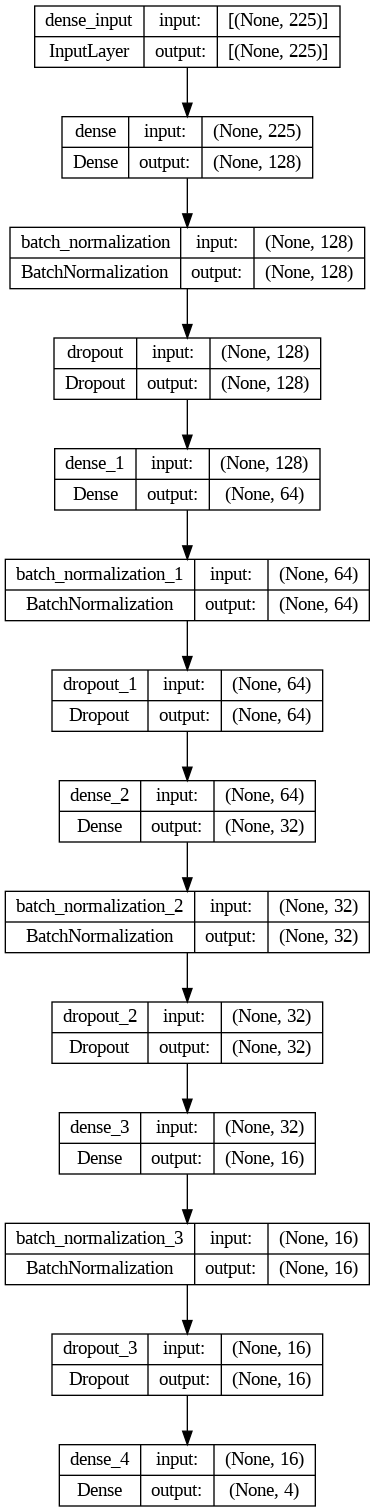

In [ ]:

from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras Sequential or Functional model
plot_model(dnn_model_15, to_file='model_architecture.png', show_shapes=True)


In [ ]:
dnn_model_15.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               28928     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
# Predict classes on the test set
Y_pred_15 = dnn_model_15.predict(X_test_15)
predicted_classes = np.argmax(Y_pred_15, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test_15, predicted_classes)

# Get the indices of misclassified samples
misclassified_indices = np.where(Y_test_15 != predicted_classes)[0]

# Get the corresponding days for misclassified samples
misclassified_days = test_df_15.iloc[misclassified_indices]["Day"]

# Print misclassified days and their corresponding predicted and true classes
for day, predicted_class, true_class in zip(misclassified_days, predicted_classes[misclassified_indices], Y_test_15[misclassified_indices]):
    print(f"Day {day}: Predicted Class {predicted_class}, True Class {true_class}")


21/21 [==============================] - 0s 1ms/step
Day 1431: Predicted Class 0, True Class 2
Day 1410: Predicted Class 2, True Class 3
Day 1399: Predicted Class 0, True Class 2
Day 1396: Predicted Class 1, True Class 2
Day 1373: Predicted Class 1, True Class 2
Day 1368: Predicted Class 1, True Class 2
Day 1359: Predicted Class 0, True Class 2
Day 1351: Predicted Class 0, True Class 2
Day 1346: Predicted Class 1, True Class 2
Day 1345: Predicted Class 1, True Class 2
Day 1339: Predicted Class 2, True Class 3
Day 1339: Predicted Class 1, True Class 3
Day 1339: Predicted Class 1, True Class 3
Day 1331: Predicted Class 1, True Class 2
Day 1330: Predicted Class 1, True Class 2
Day 1329: Predicted Class 1, True Class 2
Day 1328: Predicted Class 1, True Class 2
Day 1327: Predicted Class 1, True Class 2
Day 1313: Predicted Class 0, True Class 2
Day 1312: Predicted Class 0, True Class 2
Day 1312: Predicted Class 1, True Class 2
Day 1310: Predicted Class 1, True Class 2
Day 1308: Predicted Cla

In [ ]:
import pandas as pd

# Create a DataFrame to store misclassified samples
misclassified_df = pd.DataFrame(columns=["Day", "Predicted Class", "True Class"])

# Populate the DataFrame with misclassified samples
for day, predicted_class, true_class in zip(misclassified_days, predicted_classes[misclassified_indices], Y_test_15[misclassified_indices]):
    misclassified_df = misclassified_df.append({"Day": day, "Predicted Class": predicted_class, "True Class": true_class}, ignore_index=True)

# Display the DataFrame
print(misclassified_df)


<ipython-input-9-ec97fea5a828>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  misclassified_df = misclassified_df.append({"Day": day, "Predicted Class": predicted_class, "True Class": true_class}, ignore_index=True)
<ipython-input-9-ec97fea5a828>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  misclassified_df = misclassified_df.append({"Day": day, "Predicted Class": predicted_class, "True Class": true_class}, ignore_index=True)
<ipython-input-9-ec97fea5a828>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  misclassified_df = misclassified_df.append({"Day": day, "Predicted Class": predicted_class, "True Class": true_class}, ignore_index=True)
<ipython-input-9-ec97fea5a828>:8: FutureWarning: The frame.append method is dep

      Day Predicted Class True Class
0    1431               0          2
1    1410               2          3
2    1399               0          2
3    1396               1          2
4    1373               1          2
..    ...             ...        ...
98   2677               0          2
99   2676               0          2
100  2672               0          2
101  2672               0          3
102  2620               0          3

[103 rows x 3 columns]


<ipython-input-9-ec97fea5a828>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  misclassified_df = misclassified_df.append({"Day": day, "Predicted Class": predicted_class, "True Class": true_class}, ignore_index=True)
<ipython-input-9-ec97fea5a828>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  misclassified_df = misclassified_df.append({"Day": day, "Predicted Class": predicted_class, "True Class": true_class}, ignore_index=True)
<ipython-input-9-ec97fea5a828>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  misclassified_df = misclassified_df.append({"Day": day, "Predicted Class": predicted_class, "True Class": true_class}, ignore_index=True)
<ipython-input-9-ec97fea5a828>:8: FutureWarning: The frame.append method is dep

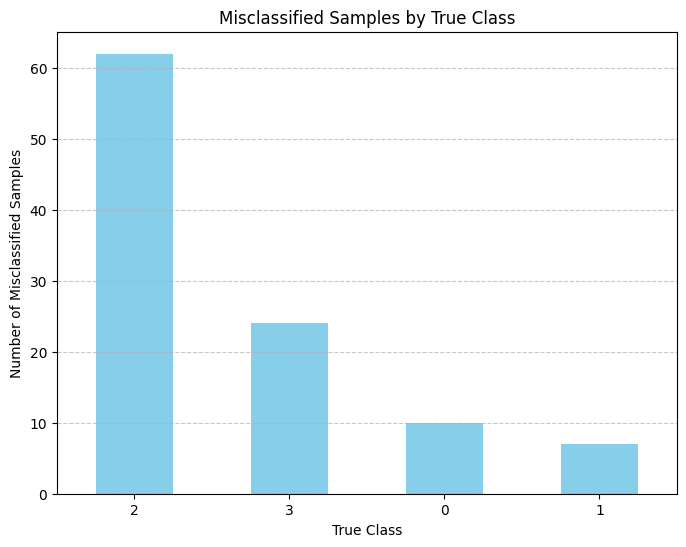

In [ ]:
import matplotlib.pyplot as plt

# Count the number of misclassified samples for each class
misclassified_counts = misclassified_df["True Class"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
misclassified_counts.plot(kind='bar', color='skyblue')
plt.title('Misclassified Samples by True Class')
plt.xlabel('True Class')
plt.ylabel('Number of Misclassified Samples')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


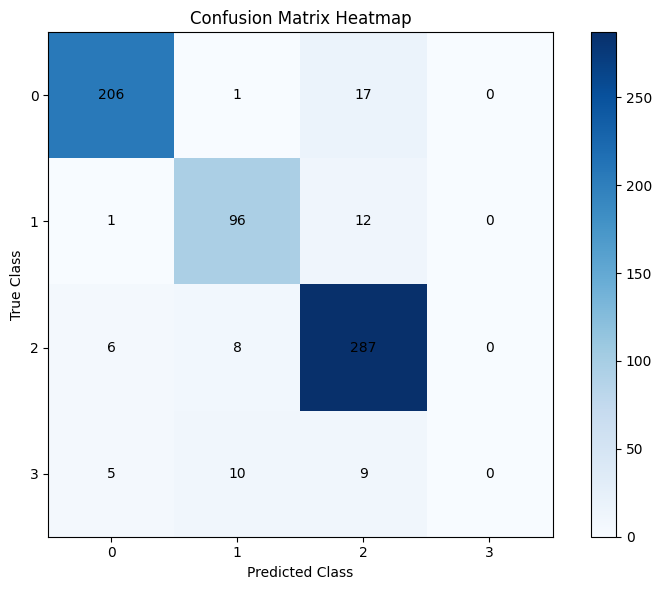

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given confusion matrix
confusion_matrix = np.array([[206, 1, 17, 0],
                             [1, 96, 12, 0],
                             [6, 8, 287, 0],
                             [5, 10, 9, 0]])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

# Add color bar
plt.colorbar()

# Set labels and title
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=np.arange(len(confusion_matrix)), labels=np.arange(len(confusion_matrix)))
plt.yticks(ticks=np.arange(len(confusion_matrix)), labels=np.arange(len(confusion_matrix)))

# Display the values in each cell
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix)):
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


# New Section

In [ ]:
df_15 = pd.read_csv("/content/15x15_data (2).csv")
df_15.shape

(2149, 234)

In [ ]:
df_15.head()

,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,Month,Name,Day,Class,Label
0,0.215782,0.216164,0.217243,0.217349,0.218306,0.217968,0.217241,0.215128,0.213058,0.210526,...,0.259653,0,0,1,0,12,2917_c2_cp2_66_11,2917,0,CL
1,0.190453,0.191821,0.193863,0.195419,0.197259,0.198331,0.199015,0.198428,0.197349,0.196754,...,0.224903,0,1,1,0,12,2910_c1_cp1_98_18,2910,0,CL
2,0.162689,0.162123,0.162202,0.161306,0.161527,0.161512,0.160591,0.159627,0.158076,0.156911,...,0.151062,0,1,1,0,12,2908_c1_cp1_79_13,2908,0,CL
3,0.330736,0.324732,0.319045,0.313353,0.309349,0.304369,0.299015,0.292240,0.285714,0.279882,...,0.329151,0,0,0,0,12,2908_c4_cp2_21_20,2908,0,CL
4,0.149050,0.149464,0.150511,0.151559,0.152227,0.153166,0.153202,0.152750,0.152185,0.151500,...,0.154440,0,1,1,0,12,2907_c1_cp1_76_13,2907,0,CL


# Anomaly Detection

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.optimizers import Adam

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")

# Mapping the labels to binary classes
df_15['Class'] = df_15['Class'].replace({'CL': 1, 'COL': 1, 'COH': 1, 'NROI': 0})

# Split the data into train and test sets
train_df_15 = pd.concat([df_15[df_15["Day"] <= 1095], df_15[(df_15["Day"] > 1460) & (df_15["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15[(df_15["Day"] > 1095) & (df_15["Day"] <= 1460)], df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

# Define the model architecture
dnn_model_15 = Sequential()
dnn_model_15.add(Dense(128, activation="relu", input_shape=(X_train_15.shape[1],)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(32, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(16, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

# Output layer with binary classification (sigmoid activation)
dnn_model_15.add(Dense(1, activation="sigmoid"))

# Compile the model
optimizer = Adam(lr=0.001)
dnn_model_15.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = dnn_model_15.fit(X_train_15, Y_train_15, epochs=1000, batch_size=16, callbacks=[early_stopping_callback])


Epoch 1/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.7509 - accuracy: 0.2922

94/94 [==============================] - 4s 4ms/step - loss: 1.7143 - accuracy: 0.2991
Epoch 2/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.0364 - accuracy: 0.3554

94/94 [==============================] - 0s 4ms/step - loss: 1.0313 - accuracy: 0.3608
Epoch 3/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.3594 - accuracy: 0.3870

94/94 [==============================] - 0s 4ms/step - loss: 0.3234 - accuracy: 0.3843
Epoch 4/1000
87/94 [==========================>...] - ETA: 0s - loss: -0.2863 - accuracy: 0.3865

94/94 [==============================] - 0s 4ms/step - loss: -0.3209 - accuracy: 0.3816
Epoch 5/1000
89/94 [===========================>..] - ETA: 0s - loss: -1.1365 - accuracy: 0.3996

94/94 [==============================] - 0s 4ms/step - loss: -1.2085 - accuracy: 0.3991
Epoch 6/1000
85/94 [==========================>...] - ETA: 0s - loss: -2.2158 - accuracy: 0.3860

94/94 [==============================] - 0s 4ms/step - loss: -2.2382 - accuracy: 0.3937
Epoch 7/1000
82/94 [=========================>....] - ETA: 0s - loss: -3.5412 - accuracy: 0.3887

94/94 [==============================] - 1s 6ms/step - loss: -3.5815 - accuracy: 0.3877
Epoch 8/1000
85/94 [==========================>...] - ETA: 0s - loss: -5.4926 - accuracy: 0.3772

94/94 [==============================] - 0s 4ms/step - loss: -5.5364 - accuracy: 0.3796
Epoch 9/1000
86/94 [==========================>...] - ETA: 0s - loss: -7.9974 - accuracy: 0.3917

94/94 [==============================] - 0s 4ms/step - loss: -8.0834 - accuracy: 0.3897
Epoch 10/1000
86/94 [==========================>...] - ETA: 0s - loss: -9.9474 - accuracy: 0.3685

94/94 [==============================] - 0s 4ms/step - loss: -10.0873 - accuracy: 0.3675
Epoch 11/1000
89/94 [===========================>..] - ETA: 0s - loss: -12.5211 - accuracy: 0.3631

94/94 [==============================] - 0s 4ms/step - loss: -12.6076 - accuracy: 0.3608
Epoch 12/1000
85/94 [==========================>...] - ETA: 0s - loss: -15.8106 - accuracy: 0.3618

94/94 [==============================] - 0s 4ms/step - loss: -15.9094 - accuracy: 0.3635
Epoch 13/1000
90/94 [===========================>..] - ETA: 0s - loss: -17.6911 - accuracy: 0.3736

94/94 [==============================] - 0s 4ms/step - loss: -17.8665 - accuracy: 0.3742
Epoch 14/1000
88/94 [===========================>..] - ETA: 0s - loss: -20.5775 - accuracy: 0.3736

94/94 [==============================] - 0s 4ms/step - loss: -20.8134 - accuracy: 0.3763
Epoch 15/1000
81/94 [========================>.....] - ETA: 0s - loss: -24.8869 - accuracy: 0.3935

94/94 [==============================] - 0s 4ms/step - loss: -25.3972 - accuracy: 0.3917
Epoch 16/1000
88/94 [===========================>..] - ETA: 0s - loss: -28.2170 - accuracy: 0.3651

94/94 [==============================] - 0s 4ms/step - loss: -28.3318 - accuracy: 0.3689
Epoch 17/1000
88/94 [===========================>..] - ETA: 0s - loss: -32.6217 - accuracy: 0.3672

94/94 [==============================] - 0s 4ms/step - loss: -32.7355 - accuracy: 0.3649
Epoch 18/1000
91/94 [============================>.] - ETA: 0s - loss: -38.7708 - accuracy: 0.3640

94/94 [==============================] - 0s 4ms/step - loss: -38.7588 - accuracy: 0.3628
Epoch 19/1000
90/94 [===========================>..] - ETA: 0s - loss: -44.4382 - accuracy: 0.3146

94/94 [==============================] - 0s 4ms/step - loss: -43.9022 - accuracy: 0.3186
Epoch 20/1000
84/94 [=========================>....] - ETA: 0s - loss: -48.2982 - accuracy: 0.3021

94/94 [==============================] - 0s 4ms/step - loss: -47.3902 - accuracy: 0.3011
Epoch 21/1000
85/94 [==========================>...] - ETA: 0s - loss: -52.8608 - accuracy: 0.2978

94/94 [==============================] - 0s 4ms/step - loss: -52.6783 - accuracy: 0.2991
Epoch 22/1000
86/94 [==========================>...] - ETA: 0s - loss: -56.8700 - accuracy: 0.3212

94/94 [==============================] - 0s 4ms/step - loss: -57.2315 - accuracy: 0.3213
Epoch 23/1000
85/94 [==========================>...] - ETA: 0s - loss: -62.1437 - accuracy: 0.3287

94/94 [==============================] - 0s 4ms/step - loss: -63.1012 - accuracy: 0.3333
Epoch 24/1000
83/94 [=========================>....] - ETA: 0s - loss: -72.3469 - accuracy: 0.3261

94/94 [==============================] - 0s 4ms/step - loss: -72.3126 - accuracy: 0.3233
Epoch 25/1000
92/94 [============================>.] - ETA: 0s - loss: -77.9584 - accuracy: 0.3145

94/94 [==============================] - 1s 5ms/step - loss: -78.0758 - accuracy: 0.3139
Epoch 26/1000
86/94 [==========================>...] - ETA: 0s - loss: -85.6555 - accuracy: 0.3001

94/94 [==============================] - 1s 6ms/step - loss: -85.9504 - accuracy: 0.3005
Epoch 27/1000
90/94 [===========================>..] - ETA: 0s - loss: -88.0587 - accuracy: 0.3076

94/94 [==============================] - 1s 6ms/step - loss: -87.8527 - accuracy: 0.3065
Epoch 28/1000
85/94 [==========================>...] - ETA: 0s - loss: -95.8707 - accuracy: 0.3096

94/94 [==============================] - 1s 6ms/step - loss: -95.8975 - accuracy: 0.3065
Epoch 29/1000
93/94 [============================>.] - ETA: 0s - loss: -100.1537 - accuracy: 0.2843

94/94 [==============================] - 1s 6ms/step - loss: -100.1808 - accuracy: 0.2837
Epoch 30/1000
82/94 [=========================>....] - ETA: 0s - loss: -114.9917 - accuracy: 0.2736

94/94 [==============================] - 0s 4ms/step - loss: -113.4782 - accuracy: 0.2736
Epoch 31/1000
89/94 [===========================>..] - ETA: 0s - loss: -120.7300 - accuracy: 0.2949

94/94 [==============================] - 0s 4ms/step - loss: -121.2280 - accuracy: 0.2944
Epoch 32/1000
91/94 [============================>.] - ETA: 0s - loss: -129.7107 - accuracy: 0.3125

94/94 [==============================] - 0s 4ms/step - loss: -129.9629 - accuracy: 0.3092
Epoch 33/1000
88/94 [===========================>..] - ETA: 0s - loss: -132.2626 - accuracy: 0.3146

94/94 [==============================] - 0s 4ms/step - loss: -134.4997 - accuracy: 0.3146
Epoch 34/1000
91/94 [============================>.] - ETA: 0s - loss: -142.0603 - accuracy: 0.2926

94/94 [==============================] - 0s 4ms/step - loss: -142.9806 - accuracy: 0.2944
Epoch 35/1000
81/94 [========================>.....] - ETA: 0s - loss: -157.0650 - accuracy: 0.2863

94/94 [==============================] - 0s 4ms/step - loss: -154.7568 - accuracy: 0.2904
Epoch 36/1000
88/94 [===========================>..] - ETA: 0s - loss: -164.8663 - accuracy: 0.2912

94/94 [==============================] - 0s 4ms/step - loss: -167.2023 - accuracy: 0.2877
Epoch 37/1000
87/94 [==========================>...] - ETA: 0s - loss: -167.3083 - accuracy: 0.2888

94/94 [==============================] - 0s 4ms/step - loss: -167.1670 - accuracy: 0.2871
Epoch 38/1000
85/94 [==========================>...] - ETA: 0s - loss: -183.4656 - accuracy: 0.2853

94/94 [==============================] - 0s 4ms/step - loss: -181.4906 - accuracy: 0.2864
Epoch 39/1000
87/94 [==========================>...] - ETA: 0s - loss: -184.8640 - accuracy: 0.2909

94/94 [==============================] - 0s 4ms/step - loss: -186.8074 - accuracy: 0.2918
Epoch 40/1000
89/94 [===========================>..] - ETA: 0s - loss: -192.9456 - accuracy: 0.3020

94/94 [==============================] - 0s 4ms/step - loss: -192.1088 - accuracy: 0.3018
Epoch 41/1000
87/94 [==========================>...] - ETA: 0s - loss: -216.7995 - accuracy: 0.2823

94/94 [==============================] - 0s 4ms/step - loss: -216.4230 - accuracy: 0.2844
Epoch 42/1000
88/94 [===========================>..] - ETA: 0s - loss: -215.0620 - accuracy: 0.2947

94/94 [==============================] - 0s 4ms/step - loss: -216.0008 - accuracy: 0.2964
Epoch 43/1000
88/94 [===========================>..] - ETA: 0s - loss: -224.6257 - accuracy: 0.2990

94/94 [==============================] - 0s 4ms/step - loss: -226.3205 - accuracy: 0.3005
Epoch 44/1000
91/94 [============================>.] - ETA: 0s - loss: -237.4132 - accuracy: 0.2823

94/94 [==============================] - 0s 4ms/step - loss: -239.7219 - accuracy: 0.2803
Epoch 45/1000
89/94 [===========================>..] - ETA: 0s - loss: -252.0000 - accuracy: 0.3027

94/94 [==============================] - 0s 4ms/step - loss: -252.6441 - accuracy: 0.3018
Epoch 46/1000
94/94 [==============================] - ETA: 0s - loss: -261.5902 - accuracy: 0.2830

94/94 [==============================] - 0s 4ms/step - loss: -261.5902 - accuracy: 0.2830
Epoch 47/1000
92/94 [============================>.] - ETA: 0s - loss: -270.7637 - accuracy: 0.2962

94/94 [==============================] - 0s 4ms/step - loss: -270.4856 - accuracy: 0.2991
Epoch 48/1000
85/94 [==========================>...] - ETA: 0s - loss: -285.8422 - accuracy: 0.2824

94/94 [==============================] - 0s 4ms/step - loss: -287.2444 - accuracy: 0.2817
Epoch 49/1000
90/94 [===========================>..] - ETA: 0s - loss: -293.3582 - accuracy: 0.3104

94/94 [==============================] - 0s 4ms/step - loss: -292.9965 - accuracy: 0.3105
Epoch 50/1000
81/94 [========================>.....] - ETA: 0s - loss: -307.8066 - accuracy: 0.3017

94/94 [==============================] - 0s 4ms/step - loss: -310.3271 - accuracy: 0.2985
Epoch 51/1000
83/94 [=========================>....] - ETA: 0s - loss: -320.6964 - accuracy: 0.2846

94/94 [==============================] - 0s 4ms/step - loss: -317.0254 - accuracy: 0.2844
Epoch 52/1000
88/94 [===========================>..] - ETA: 0s - loss: -332.0309 - accuracy: 0.3033

94/94 [==============================] - 0s 4ms/step - loss: -333.9664 - accuracy: 0.3072
Epoch 53/1000
94/94 [==============================] - ETA: 0s - loss: -348.2235 - accuracy: 0.2978

94/94 [==============================] - 0s 4ms/step - loss: -348.2235 - accuracy: 0.2978
Epoch 54/1000
92/94 [============================>.] - ETA: 0s - loss: -335.6806 - accuracy: 0.2711

94/94 [==============================] - 0s 4ms/step - loss: -336.8881 - accuracy: 0.2716
Epoch 55/1000
86/94 [==========================>...] - ETA: 0s - loss: -377.0220 - accuracy: 0.3096

94/94 [==============================] - 0s 4ms/step - loss: -377.3198 - accuracy: 0.3058
Epoch 56/1000
85/94 [==========================>...] - ETA: 0s - loss: -378.8042 - accuracy: 0.2897

94/94 [==============================] - 0s 4ms/step - loss: -381.4958 - accuracy: 0.2864
Epoch 57/1000
88/94 [===========================>..] - ETA: 0s - loss: -404.2763 - accuracy: 0.2898

94/94 [==============================] - 1s 5ms/step - loss: -408.0192 - accuracy: 0.2911
Epoch 58/1000
86/94 [==========================>...] - ETA: 0s - loss: -414.4340 - accuracy: 0.3009

94/94 [==============================] - 1s 6ms/step - loss: -417.2287 - accuracy: 0.2985
Epoch 59/1000
85/94 [==========================>...] - ETA: 0s - loss: -419.3251 - accuracy: 0.3191

94/94 [==============================] - 1s 6ms/step - loss: -424.5544 - accuracy: 0.3186
Epoch 60/1000
93/94 [============================>.] - ETA: 0s - loss: -427.8505 - accuracy: 0.2950

94/94 [==============================] - 1s 6ms/step - loss: -428.1781 - accuracy: 0.2951
Epoch 61/1000
87/94 [==========================>...] - ETA: 0s - loss: -464.5886 - accuracy: 0.2874

94/94 [==============================] - 1s 6ms/step - loss: -461.4485 - accuracy: 0.2844
Epoch 62/1000
86/94 [==========================>...] - ETA: 0s - loss: -498.2372 - accuracy: 0.3169

94/94 [==============================] - 0s 4ms/step - loss: -494.0000 - accuracy: 0.3146
Epoch 63/1000
86/94 [==========================>...] - ETA: 0s - loss: -483.6793 - accuracy: 0.3038

94/94 [==============================] - 0s 4ms/step - loss: -484.6432 - accuracy: 0.2964
Epoch 64/1000
85/94 [==========================>...] - ETA: 0s - loss: -501.2962 - accuracy: 0.3037

94/94 [==============================] - 0s 4ms/step - loss: -504.5466 - accuracy: 0.2998
Epoch 65/1000
86/94 [==========================>...] - ETA: 0s - loss: -508.0024 - accuracy: 0.3001

94/94 [==============================] - 0s 4ms/step - loss: -509.7226 - accuracy: 0.2998
Epoch 66/1000
81/94 [========================>.....] - ETA: 0s - loss: -525.0227 - accuracy: 0.3102

94/94 [==============================] - 0s 4ms/step - loss: -529.0727 - accuracy: 0.3085
Epoch 67/1000
90/94 [===========================>..] - ETA: 0s - loss: -545.4680 - accuracy: 0.2931

94/94 [==============================] - 0s 4ms/step - loss: -550.6469 - accuracy: 0.2918
Epoch 68/1000
91/94 [============================>.] - ETA: 0s - loss: -582.7867 - accuracy: 0.2878

94/94 [==============================] - 0s 4ms/step - loss: -580.6113 - accuracy: 0.2891
Epoch 69/1000
86/94 [==========================>...] - ETA: 0s - loss: -581.3884 - accuracy: 0.2958

94/94 [==============================] - 0s 4ms/step - loss: -582.6984 - accuracy: 0.2931
Epoch 70/1000
92/94 [============================>.] - ETA: 0s - loss: -585.3344 - accuracy: 0.2806

94/94 [==============================] - 0s 3ms/step - loss: -584.7696 - accuracy: 0.2810
Epoch 71/1000
90/94 [===========================>..] - ETA: 0s - loss: -589.9357 - accuracy: 0.2896

94/94 [==============================] - 0s 4ms/step - loss: -591.3698 - accuracy: 0.2844
Epoch 72/1000
83/94 [=========================>....] - ETA: 0s - loss: -628.7795 - accuracy: 0.3065

94/94 [==============================] - 0s 4ms/step - loss: -620.4629 - accuracy: 0.3146
Epoch 73/1000
93/94 [============================>.] - ETA: 0s - loss: -619.8079 - accuracy: 0.3051

94/94 [==============================] - 0s 4ms/step - loss: -620.2509 - accuracy: 0.3045
Epoch 74/1000
84/94 [=========================>....] - ETA: 0s - loss: -672.3314 - accuracy: 0.3088

94/94 [==============================] - 0s 4ms/step - loss: -679.1440 - accuracy: 0.3065
Epoch 75/1000
84/94 [=========================>....] - ETA: 0s - loss: -677.9269 - accuracy: 0.2894

94/94 [==============================] - 0s 4ms/step - loss: -679.8211 - accuracy: 0.2911
Epoch 76/1000
89/94 [===========================>..] - ETA: 0s - loss: -703.4792 - accuracy: 0.2921

94/94 [==============================] - 0s 4ms/step - loss: -705.0129 - accuracy: 0.2911
Epoch 77/1000
83/94 [=========================>....] - ETA: 0s - loss: -700.2295 - accuracy: 0.3005

94/94 [==============================] - 0s 4ms/step - loss: -693.5385 - accuracy: 0.2978
Epoch 78/1000
92/94 [============================>.] - ETA: 0s - loss: -739.8548 - accuracy: 0.2738

94/94 [==============================] - 0s 4ms/step - loss: -737.2786 - accuracy: 0.2736
Epoch 79/1000
84/94 [=========================>....] - ETA: 0s - loss: -749.0455 - accuracy: 0.2961

94/94 [==============================] - 0s 4ms/step - loss: -742.2174 - accuracy: 0.3032
Epoch 80/1000
90/94 [===========================>..] - ETA: 0s - loss: -743.2999 - accuracy: 0.3007

94/94 [==============================] - 0s 4ms/step - loss: -741.5729 - accuracy: 0.3005
Epoch 81/1000
87/94 [==========================>...] - ETA: 0s - loss: -749.7483 - accuracy: 0.2996

94/94 [==============================] - 0s 4ms/step - loss: -756.6012 - accuracy: 0.3011
Epoch 82/1000
91/94 [============================>.] - ETA: 0s - loss: -761.5594 - accuracy: 0.2988

94/94 [==============================] - 0s 4ms/step - loss: -765.8720 - accuracy: 0.2985
Epoch 83/1000
85/94 [==========================>...] - ETA: 0s - loss: -812.2147 - accuracy: 0.3066

94/94 [==============================] - 0s 4ms/step - loss: -823.3478 - accuracy: 0.3032
Epoch 84/1000
83/94 [=========================>....] - ETA: 0s - loss: -814.0812 - accuracy: 0.2801

94/94 [==============================] - 0s 4ms/step - loss: -828.2881 - accuracy: 0.2844
Epoch 85/1000
87/94 [==========================>...] - ETA: 0s - loss: -845.6589 - accuracy: 0.3032

94/94 [==============================] - 0s 4ms/step - loss: -853.5743 - accuracy: 0.3011
Epoch 86/1000
88/94 [===========================>..] - ETA: 0s - loss: -874.8205 - accuracy: 0.2869

94/94 [==============================] - 0s 4ms/step - loss: -873.0801 - accuracy: 0.2850
Epoch 87/1000
89/94 [===========================>..] - ETA: 0s - loss: -882.5103 - accuracy: 0.3090

94/94 [==============================] - 0s 4ms/step - loss: -873.1502 - accuracy: 0.3119
Epoch 88/1000
90/94 [===========================>..] - ETA: 0s - loss: -912.3467 - accuracy: 0.2861

94/94 [==============================] - 0s 4ms/step - loss: -905.7036 - accuracy: 0.2857
Epoch 89/1000
86/94 [==========================>...] - ETA: 0s - loss: -939.8185 - accuracy: 0.2943

94/94 [==============================] - 0s 4ms/step - loss: -945.0350 - accuracy: 0.3005
Epoch 90/1000
92/94 [============================>.] - ETA: 0s - loss: -942.7391 - accuracy: 0.3139

94/94 [==============================] - 1s 5ms/step - loss: -943.8995 - accuracy: 0.3112
Epoch 91/1000
93/94 [============================>.] - ETA: 0s - loss: -954.2585 - accuracy: 0.3024

94/94 [==============================] - 0s 5ms/step - loss: -953.5159 - accuracy: 0.3032
Epoch 92/1000
85/94 [==========================>...] - ETA: 0s - loss: -995.7406 - accuracy: 0.2897

94/94 [==============================] - 1s 6ms/step - loss: -993.2013 - accuracy: 0.2931
Epoch 93/1000
94/94 [==============================] - ETA: 0s - loss: -1025.8541 - accuracy: 0.3239

94/94 [==============================] - 1s 6ms/step - loss: -1025.8541 - accuracy: 0.3239
Epoch 94/1000
85/94 [==========================>...] - ETA: 0s - loss: -1010.7661 - accuracy: 0.3176

94/94 [==============================] - 1s 6ms/step - loss: -1011.5014 - accuracy: 0.3213
Epoch 95/1000
88/94 [===========================>..] - ETA: 0s - loss: -1077.1698 - accuracy: 0.3026

94/94 [==============================] - 0s 4ms/step - loss: -1079.4127 - accuracy: 0.3038
Epoch 96/1000
92/94 [============================>.] - ETA: 0s - loss: -1053.9927 - accuracy: 0.2955

94/94 [==============================] - 0s 3ms/step - loss: -1051.7782 - accuracy: 0.2944
Epoch 97/1000
86/94 [==========================>...] - ETA: 0s - loss: -1079.4308 - accuracy: 0.2972

94/94 [==============================] - 0s 4ms/step - loss: -1086.2515 - accuracy: 0.2971
Epoch 98/1000
87/94 [==========================>...] - ETA: 0s - loss: -1124.4808 - accuracy: 0.2938

94/94 [==============================] - 0s 4ms/step - loss: -1105.5959 - accuracy: 0.2918
Epoch 99/1000
85/94 [==========================>...] - ETA: 0s - loss: -1142.3239 - accuracy: 0.3250

94/94 [==============================] - 0s 4ms/step - loss: -1141.8317 - accuracy: 0.3213
Epoch 100/1000
87/94 [==========================>...] - ETA: 0s - loss: -1130.4434 - accuracy: 0.3017

94/94 [==============================] - 0s 4ms/step - loss: -1134.6953 - accuracy: 0.2971
Epoch 101/1000
84/94 [=========================>....] - ETA: 0s - loss: -1192.1790 - accuracy: 0.2976

94/94 [==============================] - 0s 4ms/step - loss: -1195.1725 - accuracy: 0.2951
Epoch 102/1000
83/94 [=========================>....] - ETA: 0s - loss: -1167.2776 - accuracy: 0.3027

94/94 [==============================] - 0s 4ms/step - loss: -1157.1215 - accuracy: 0.3005
Epoch 103/1000
91/94 [============================>.] - ETA: 0s - loss: -1226.2847 - accuracy: 0.3049

94/94 [==============================] - 0s 4ms/step - loss: -1212.9032 - accuracy: 0.3052
Epoch 104/1000
94/94 [==============================] - ETA: 0s - loss: -1249.0914 - accuracy: 0.2918

94/94 [==============================] - 0s 4ms/step - loss: -1249.0914 - accuracy: 0.2918
Epoch 105/1000
85/94 [==========================>...] - ETA: 0s - loss: -1243.7900 - accuracy: 0.2956

94/94 [==============================] - 0s 4ms/step - loss: -1259.0464 - accuracy: 0.2944
Epoch 106/1000
83/94 [=========================>....] - ETA: 0s - loss: -1318.0311 - accuracy: 0.3035

94/94 [==============================] - 0s 4ms/step - loss: -1334.0781 - accuracy: 0.2991
Epoch 107/1000
94/94 [==============================] - ETA: 0s - loss: -1295.1014 - accuracy: 0.2844

94/94 [==============================] - 0s 4ms/step - loss: -1295.1014 - accuracy: 0.2844
Epoch 108/1000
81/94 [========================>.....] - ETA: 0s - loss: -1312.4913 - accuracy: 0.3133

94/94 [==============================] - 0s 4ms/step - loss: -1343.1099 - accuracy: 0.3078
Epoch 109/1000
93/94 [============================>.] - ETA: 0s - loss: -1291.0001 - accuracy: 0.3138

94/94 [==============================] - 0s 4ms/step - loss: -1291.9271 - accuracy: 0.3139
Epoch 110/1000
89/94 [===========================>..] - ETA: 0s - loss: -1357.9501 - accuracy: 0.3371

94/94 [==============================] - 0s 4ms/step - loss: -1358.5050 - accuracy: 0.3313
Epoch 111/1000
82/94 [=========================>....] - ETA: 0s - loss: -1425.9813 - accuracy: 0.3011

94/94 [==============================] - 0s 4ms/step - loss: -1424.6873 - accuracy: 0.2985
Epoch 112/1000
85/94 [==========================>...] - ETA: 0s - loss: -1455.1705 - accuracy: 0.2919

94/94 [==============================] - 0s 4ms/step - loss: -1438.3573 - accuracy: 0.2911
Epoch 113/1000
92/94 [============================>.] - ETA: 0s - loss: -1472.0378 - accuracy: 0.3057

94/94 [==============================] - 0s 4ms/step - loss: -1470.0762 - accuracy: 0.3058
Epoch 114/1000
91/94 [============================>.] - ETA: 0s - loss: -1439.4712 - accuracy: 0.3022

94/94 [==============================] - 0s 4ms/step - loss: -1445.8885 - accuracy: 0.3011
Epoch 115/1000
91/94 [============================>.] - ETA: 0s - loss: -1491.3075 - accuracy: 0.3104

94/94 [==============================] - 0s 4ms/step - loss: -1492.4819 - accuracy: 0.3099
Epoch 116/1000
94/94 [==============================] - ETA: 0s - loss: -1501.0706 - accuracy: 0.2797

94/94 [==============================] - 0s 4ms/step - loss: -1501.0706 - accuracy: 0.2797
Epoch 117/1000
94/94 [==============================] - ETA: 0s - loss: -1583.2252 - accuracy: 0.2978

94/94 [==============================] - 0s 4ms/step - loss: -1583.2252 - accuracy: 0.2978
Epoch 118/1000
86/94 [==========================>...] - ETA: 0s - loss: -1541.0587 - accuracy: 0.2892

94/94 [==============================] - 0s 4ms/step - loss: -1529.2006 - accuracy: 0.2904
Epoch 119/1000
81/94 [========================>.....] - ETA: 0s - loss: -1577.2030 - accuracy: 0.3009

94/94 [==============================] - 0s 4ms/step - loss: -1601.7815 - accuracy: 0.3018
Epoch 120/1000
81/94 [========================>.....] - ETA: 0s - loss: -1651.8713 - accuracy: 0.2701

94/94 [==============================] - 0s 4ms/step - loss: -1626.5894 - accuracy: 0.2703
Epoch 121/1000
92/94 [============================>.] - ETA: 0s - loss: -1660.5426 - accuracy: 0.2751

94/94 [==============================] - 0s 5ms/step - loss: -1668.3218 - accuracy: 0.2743
Epoch 122/1000
93/94 [============================>.] - ETA: 0s - loss: -1700.0244 - accuracy: 0.3091

94/94 [==============================] - 1s 6ms/step - loss: -1700.6339 - accuracy: 0.3099
Epoch 123/1000
89/94 [===========================>..] - ETA: 0s - loss: -1693.6189 - accuracy: 0.3062

94/94 [==============================] - 1s 5ms/step - loss: -1692.7941 - accuracy: 0.3085
Epoch 124/1000
93/94 [============================>.] - ETA: 0s - loss: -1773.2584 - accuracy: 0.3011

94/94 [==============================] - 1s 6ms/step - loss: -1765.1226 - accuracy: 0.3011
Epoch 125/1000
93/94 [============================>.] - ETA: 0s - loss: -1729.1089 - accuracy: 0.3145

94/94 [==============================] - 1s 6ms/step - loss: -1729.9078 - accuracy: 0.3146
Epoch 126/1000
92/94 [============================>.] - ETA: 0s - loss: -1806.0951 - accuracy: 0.2942

94/94 [==============================] - 0s 5ms/step - loss: -1779.8810 - accuracy: 0.2971
Epoch 127/1000
86/94 [==========================>...] - ETA: 0s - loss: -1791.0719 - accuracy: 0.2972

94/94 [==============================] - 0s 4ms/step - loss: -1781.8807 - accuracy: 0.2978
Epoch 128/1000
82/94 [=========================>....] - ETA: 0s - loss: -1817.4049 - accuracy: 0.3072

94/94 [==============================] - 0s 4ms/step - loss: -1835.2114 - accuracy: 0.3065
Epoch 129/1000
92/94 [============================>.] - ETA: 0s - loss: -1783.8043 - accuracy: 0.3003

94/94 [==============================] - 0s 4ms/step - loss: -1780.1893 - accuracy: 0.3025
Epoch 130/1000
90/94 [===========================>..] - ETA: 0s - loss: -1885.0764 - accuracy: 0.2958

94/94 [==============================] - 0s 4ms/step - loss: -1889.0283 - accuracy: 0.2924
Epoch 131/1000
87/94 [==========================>...] - ETA: 0s - loss: -1931.3228 - accuracy: 0.2960

94/94 [==============================] - 0s 4ms/step - loss: -1942.0939 - accuracy: 0.2958
Epoch 132/1000
86/94 [==========================>...] - ETA: 0s - loss: -1851.4448 - accuracy: 0.3009

94/94 [==============================] - 0s 4ms/step - loss: -1895.3627 - accuracy: 0.3011
Epoch 133/1000
86/94 [==========================>...] - ETA: 0s - loss: -1904.0837 - accuracy: 0.3023

94/94 [==============================] - 0s 4ms/step - loss: -1928.7737 - accuracy: 0.2944
Epoch 134/1000
83/94 [=========================>....] - ETA: 0s - loss: -1938.7133 - accuracy: 0.3080

94/94 [==============================] - 0s 4ms/step - loss: -1913.1036 - accuracy: 0.3125
Epoch 135/1000
92/94 [============================>.] - ETA: 0s - loss: -1998.8693 - accuracy: 0.2880

94/94 [==============================] - 0s 4ms/step - loss: -1987.2820 - accuracy: 0.2864
Epoch 136/1000
81/94 [========================>.....] - ETA: 0s - loss: -2104.7166 - accuracy: 0.2824

94/94 [==============================] - 0s 4ms/step - loss: -2086.6294 - accuracy: 0.2763
Epoch 137/1000
89/94 [===========================>..] - ETA: 0s - loss: -2010.8033 - accuracy: 0.2978

94/94 [==============================] - 0s 4ms/step - loss: -2033.0684 - accuracy: 0.2971
Epoch 138/1000
93/94 [============================>.] - ETA: 0s - loss: -2129.0342 - accuracy: 0.2849

94/94 [==============================] - 0s 4ms/step - loss: -2123.8081 - accuracy: 0.2850
Epoch 139/1000
91/94 [============================>.] - ETA: 0s - loss: -2101.8701 - accuracy: 0.2885

94/94 [==============================] - 0s 4ms/step - loss: -2099.4487 - accuracy: 0.2871
Epoch 140/1000
93/94 [============================>.] - ETA: 0s - loss: -2178.9426 - accuracy: 0.3051

94/94 [==============================] - 0s 4ms/step - loss: -2180.1287 - accuracy: 0.3045
Epoch 141/1000
93/94 [============================>.] - ETA: 0s - loss: -2203.4734 - accuracy: 0.2930

94/94 [==============================] - 0s 4ms/step - loss: -2202.0586 - accuracy: 0.2938
Epoch 142/1000
93/94 [============================>.] - ETA: 0s - loss: -2205.2163 - accuracy: 0.3004

94/94 [==============================] - 0s 4ms/step - loss: -2205.0701 - accuracy: 0.3011
Epoch 143/1000
81/94 [========================>.....] - ETA: 0s - loss: -2168.7078 - accuracy: 0.3063

94/94 [==============================] - 0s 4ms/step - loss: -2185.5742 - accuracy: 0.3085
Epoch 144/1000
92/94 [============================>.] - ETA: 0s - loss: -2299.3215 - accuracy: 0.3057

94/94 [==============================] - 0s 4ms/step - loss: -2294.1511 - accuracy: 0.3058
Epoch 145/1000
82/94 [=========================>....] - ETA: 0s - loss: -2275.4241 - accuracy: 0.3125

94/94 [==============================] - 0s 4ms/step - loss: -2297.6223 - accuracy: 0.3139
Epoch 146/1000
84/94 [=========================>....] - ETA: 0s - loss: -2332.4937 - accuracy: 0.2991

94/94 [==============================] - 0s 4ms/step - loss: -2356.1057 - accuracy: 0.2938
Epoch 147/1000
94/94 [==============================] - ETA: 0s - loss: -2349.0312 - accuracy: 0.2944

94/94 [==============================] - 0s 4ms/step - loss: -2349.0312 - accuracy: 0.2944
Epoch 148/1000
94/94 [==============================] - ETA: 0s - loss: -2365.5789 - accuracy: 0.3032

94/94 [==============================] - 0s 4ms/step - loss: -2365.5789 - accuracy: 0.3032
Epoch 149/1000
83/94 [=========================>....] - ETA: 0s - loss: -2413.9021 - accuracy: 0.3185

94/94 [==============================] - 0s 4ms/step - loss: -2442.1218 - accuracy: 0.3186
Epoch 150/1000
90/94 [===========================>..] - ETA: 0s - loss: -2512.1746 - accuracy: 0.2750

94/94 [==============================] - 0s 4ms/step - loss: -2473.6111 - accuracy: 0.2790
Epoch 151/1000
94/94 [==============================] - ETA: 0s - loss: -2435.2092 - accuracy: 0.3159

94/94 [==============================] - 0s 4ms/step - loss: -2435.2092 - accuracy: 0.3159
Epoch 152/1000
93/94 [============================>.] - ETA: 0s - loss: -2535.1479 - accuracy: 0.2964

94/94 [==============================] - 0s 4ms/step - loss: -2534.9434 - accuracy: 0.2964
Epoch 153/1000
93/94 [============================>.] - ETA: 0s - loss: -2556.4541 - accuracy: 0.2977

94/94 [==============================] - 1s 6ms/step - loss: -2546.6538 - accuracy: 0.2971
Epoch 154/1000
89/94 [===========================>..] - ETA: 0s - loss: -2535.2290 - accuracy: 0.3090

94/94 [==============================] - 1s 5ms/step - loss: -2561.4761 - accuracy: 0.3058
Epoch 155/1000
87/94 [==========================>...] - ETA: 0s - loss: -2529.1416 - accuracy: 0.2816

94/94 [==============================] - 1s 6ms/step - loss: -2530.6653 - accuracy: 0.2871
Epoch 156/1000
93/94 [============================>.] - ETA: 0s - loss: -2660.7554 - accuracy: 0.2823

94/94 [==============================] - 1s 6ms/step - loss: -2662.8782 - accuracy: 0.2817
Epoch 157/1000
92/94 [============================>.] - ETA: 0s - loss: -2706.9458 - accuracy: 0.3118

94/94 [==============================] - 1s 6ms/step - loss: -2701.7043 - accuracy: 0.3139
Epoch 158/1000
90/94 [===========================>..] - ETA: 0s - loss: -2640.5684 - accuracy: 0.3222

94/94 [==============================] - 0s 4ms/step - loss: -2614.7893 - accuracy: 0.3233
Epoch 159/1000
81/94 [========================>.....] - ETA: 0s - loss: -2681.1750 - accuracy: 0.3318

94/94 [==============================] - 0s 4ms/step - loss: -2705.2803 - accuracy: 0.3253
Epoch 160/1000
87/94 [==========================>...] - ETA: 0s - loss: -2796.6409 - accuracy: 0.2967

94/94 [==============================] - 0s 4ms/step - loss: -2783.5676 - accuracy: 0.2991
Epoch 161/1000
85/94 [==========================>...] - ETA: 0s - loss: -2787.1135 - accuracy: 0.2971

94/94 [==============================] - 0s 4ms/step - loss: -2811.5764 - accuracy: 0.2971
Epoch 162/1000
81/94 [========================>.....] - ETA: 0s - loss: -2821.6838 - accuracy: 0.3002

94/94 [==============================] - 0s 4ms/step - loss: -2842.5720 - accuracy: 0.3072
Epoch 163/1000
85/94 [==========================>...] - ETA: 0s - loss: -2898.7622 - accuracy: 0.3029

94/94 [==============================] - 0s 4ms/step - loss: -2874.6990 - accuracy: 0.3045
Epoch 164/1000
92/94 [============================>.] - ETA: 0s - loss: -2953.7666 - accuracy: 0.2914

94/94 [==============================] - 0s 4ms/step - loss: -2947.0811 - accuracy: 0.2891
Epoch 165/1000
94/94 [==============================] - ETA: 0s - loss: -2826.9768 - accuracy: 0.3246

94/94 [==============================] - 0s 4ms/step - loss: -2826.9768 - accuracy: 0.3246
Epoch 166/1000
82/94 [=========================>....] - ETA: 0s - loss: -2958.2949 - accuracy: 0.2698

94/94 [==============================] - 0s 4ms/step - loss: -2946.1255 - accuracy: 0.2783
Epoch 167/1000
94/94 [==============================] - ETA: 0s - loss: -2996.3220 - accuracy: 0.3213

94/94 [==============================] - 0s 4ms/step - loss: -2996.3220 - accuracy: 0.3213
Epoch 168/1000
84/94 [=========================>....] - ETA: 0s - loss: -3027.3306 - accuracy: 0.3058

94/94 [==============================] - 0s 4ms/step - loss: -3035.5073 - accuracy: 0.3072
Epoch 169/1000
80/94 [========================>.....] - ETA: 0s - loss: -3193.4148 - accuracy: 0.2891

94/94 [==============================] - 0s 4ms/step - loss: -3137.1526 - accuracy: 0.2931
Epoch 170/1000
81/94 [========================>.....] - ETA: 0s - loss: -3133.1313 - accuracy: 0.3125

94/94 [==============================] - 0s 4ms/step - loss: -3128.4441 - accuracy: 0.3032
Epoch 171/1000
92/94 [============================>.] - ETA: 0s - loss: -3172.3079 - accuracy: 0.3166

94/94 [==============================] - 0s 4ms/step - loss: -3165.6204 - accuracy: 0.3159
Epoch 172/1000
85/94 [==========================>...] - ETA: 0s - loss: -3114.7864 - accuracy: 0.2993

94/94 [==============================] - 0s 4ms/step - loss: -3135.7866 - accuracy: 0.2985
Epoch 173/1000
93/94 [============================>.] - ETA: 0s - loss: -3217.0901 - accuracy: 0.2930

94/94 [==============================] - 0s 4ms/step - loss: -3219.9109 - accuracy: 0.2931
Epoch 174/1000
87/94 [==========================>...] - ETA: 0s - loss: -3226.9863 - accuracy: 0.3125

94/94 [==============================] - 0s 4ms/step - loss: -3252.6436 - accuracy: 0.3166
Epoch 175/1000
93/94 [============================>.] - ETA: 0s - loss: -3283.4563 - accuracy: 0.2910

94/94 [==============================] - 0s 4ms/step - loss: -3284.1592 - accuracy: 0.2918
Epoch 176/1000
85/94 [==========================>...] - ETA: 0s - loss: -3346.3372 - accuracy: 0.2912

94/94 [==============================] - 0s 4ms/step - loss: -3314.9387 - accuracy: 0.2877
Epoch 177/1000
87/94 [==========================>...] - ETA: 0s - loss: -3221.4961 - accuracy: 0.3139

94/94 [==============================] - 0s 4ms/step - loss: -3225.8286 - accuracy: 0.3146
Epoch 178/1000
94/94 [==============================] - ETA: 0s - loss: -3371.0518 - accuracy: 0.2991

94/94 [==============================] - 0s 4ms/step - loss: -3371.0518 - accuracy: 0.2991
Epoch 179/1000
88/94 [===========================>..] - ETA: 0s - loss: -3420.8577 - accuracy: 0.3047

94/94 [==============================] - 0s 4ms/step - loss: -3417.6599 - accuracy: 0.3058
Epoch 180/1000
89/94 [===========================>..] - ETA: 0s - loss: -3497.5408 - accuracy: 0.3069

94/94 [==============================] - 0s 4ms/step - loss: -3544.1238 - accuracy: 0.3018
Epoch 181/1000
85/94 [==========================>...] - ETA: 0s - loss: -3285.0735 - accuracy: 0.3140

94/94 [==============================] - 0s 4ms/step - loss: -3362.1375 - accuracy: 0.3099
Epoch 182/1000
87/94 [==========================>...] - ETA: 0s - loss: -3448.7468 - accuracy: 0.3154

94/94 [==============================] - 0s 4ms/step - loss: -3448.6538 - accuracy: 0.3112
Epoch 183/1000
94/94 [==============================] - ETA: 0s - loss: -3486.8240 - accuracy: 0.3192

94/94 [==============================] - 0s 4ms/step - loss: -3486.8240 - accuracy: 0.3192
Epoch 184/1000
91/94 [============================>.] - ETA: 0s - loss: -3633.8887 - accuracy: 0.3098

94/94 [==============================] - 0s 4ms/step - loss: -3631.0505 - accuracy: 0.3072
Epoch 185/1000
86/94 [==========================>...] - ETA: 0s - loss: -3582.7256 - accuracy: 0.2965

94/94 [==============================] - 1s 6ms/step - loss: -3573.6587 - accuracy: 0.2944
Epoch 186/1000
86/94 [==========================>...] - ETA: 0s - loss: -3645.5083 - accuracy: 0.3110

94/94 [==============================] - 1s 6ms/step - loss: -3651.7771 - accuracy: 0.3119
Epoch 187/1000
90/94 [===========================>..] - ETA: 0s - loss: -3675.7576 - accuracy: 0.2875

94/94 [==============================] - 1s 6ms/step - loss: -3690.3027 - accuracy: 0.2897
Epoch 188/1000
92/94 [============================>.] - ETA: 0s - loss: -3616.1079 - accuracy: 0.2948

94/94 [==============================] - 1s 6ms/step - loss: -3632.2910 - accuracy: 0.2964
Epoch 189/1000
90/94 [===========================>..] - ETA: 0s - loss: -3785.3003 - accuracy: 0.3132

94/94 [==============================] - 1s 6ms/step - loss: -3783.8618 - accuracy: 0.3172
Epoch 190/1000
89/94 [===========================>..] - ETA: 0s - loss: -3824.3821 - accuracy: 0.3062

94/94 [==============================] - 0s 4ms/step - loss: -3864.3608 - accuracy: 0.2998
Epoch 191/1000
91/94 [============================>.] - ETA: 0s - loss: -3831.8438 - accuracy: 0.2926

94/94 [==============================] - 0s 4ms/step - loss: -3827.2551 - accuracy: 0.2931
Epoch 192/1000
92/94 [============================>.] - ETA: 0s - loss: -3963.7112 - accuracy: 0.3105

94/94 [==============================] - 0s 4ms/step - loss: -3958.1882 - accuracy: 0.3112
Epoch 193/1000
86/94 [==========================>...] - ETA: 0s - loss: -3906.1438 - accuracy: 0.3074

94/94 [==============================] - 0s 4ms/step - loss: -3920.2588 - accuracy: 0.3085
Epoch 194/1000
89/94 [===========================>..] - ETA: 0s - loss: -3834.3459 - accuracy: 0.3104

94/94 [==============================] - 0s 4ms/step - loss: -3868.0859 - accuracy: 0.3112
Epoch 195/1000
83/94 [=========================>....] - ETA: 0s - loss: -4034.8860 - accuracy: 0.2982

94/94 [==============================] - 0s 4ms/step - loss: -4053.9614 - accuracy: 0.3018
Epoch 196/1000
94/94 [==============================] - ETA: 0s - loss: -4043.9353 - accuracy: 0.2998

94/94 [==============================] - 0s 4ms/step - loss: -4043.9353 - accuracy: 0.2998
Epoch 197/1000
81/94 [========================>.....] - ETA: 0s - loss: -4074.2832 - accuracy: 0.3117

94/94 [==============================] - 0s 4ms/step - loss: -4040.7026 - accuracy: 0.3025
Epoch 198/1000
93/94 [============================>.] - ETA: 0s - loss: -3999.8787 - accuracy: 0.3071

94/94 [==============================] - 0s 4ms/step - loss: -4001.4312 - accuracy: 0.3072
Epoch 199/1000
94/94 [==============================] - ETA: 0s - loss: -4199.7832 - accuracy: 0.2998

94/94 [==============================] - 0s 4ms/step - loss: -4199.7832 - accuracy: 0.2998
Epoch 200/1000
82/94 [=========================>....] - ETA: 0s - loss: -4123.2900 - accuracy: 0.3079

94/94 [==============================] - 0s 4ms/step - loss: -4124.0347 - accuracy: 0.3119
Epoch 201/1000
90/94 [===========================>..] - ETA: 0s - loss: -4149.0894 - accuracy: 0.2861

94/94 [==============================] - 0s 4ms/step - loss: -4172.1504 - accuracy: 0.2857
Epoch 202/1000
93/94 [============================>.] - ETA: 0s - loss: -4290.0376 - accuracy: 0.3078

94/94 [==============================] - 0s 4ms/step - loss: -4278.3228 - accuracy: 0.3085
Epoch 203/1000
93/94 [============================>.] - ETA: 0s - loss: -4386.9702 - accuracy: 0.2997

94/94 [==============================] - 0s 4ms/step - loss: -4385.1602 - accuracy: 0.3005
Epoch 204/1000
91/94 [============================>.] - ETA: 0s - loss: -4319.2393 - accuracy: 0.3146

94/94 [==============================] - 0s 4ms/step - loss: -4338.3955 - accuracy: 0.3132
Epoch 205/1000
85/94 [==========================>...] - ETA: 0s - loss: -4482.2334 - accuracy: 0.3044

94/94 [==============================] - 0s 4ms/step - loss: -4459.8149 - accuracy: 0.3038
Epoch 206/1000
92/94 [============================>.] - ETA: 0s - loss: -4314.7695 - accuracy: 0.3098

94/94 [==============================] - 0s 4ms/step - loss: -4309.0933 - accuracy: 0.3099
Epoch 207/1000
93/94 [============================>.] - ETA: 0s - loss: -4581.8872 - accuracy: 0.3152

94/94 [==============================] - 0s 4ms/step - loss: -4591.2842 - accuracy: 0.3152
Epoch 208/1000
82/94 [=========================>....] - ETA: 0s - loss: -4369.4194 - accuracy: 0.3095

94/94 [==============================] - 0s 4ms/step - loss: -4461.1953 - accuracy: 0.3045
Epoch 209/1000
91/94 [============================>.] - ETA: 0s - loss: -4496.8989 - accuracy: 0.3015

94/94 [==============================] - 0s 4ms/step - loss: -4486.7139 - accuracy: 0.3018
Epoch 210/1000
81/94 [========================>.....] - ETA: 0s - loss: -4580.2822 - accuracy: 0.3040

94/94 [==============================] - 0s 4ms/step - loss: -4636.3960 - accuracy: 0.3025
Epoch 211/1000
94/94 [==============================] - ETA: 0s - loss: -4660.0947 - accuracy: 0.3139

94/94 [==============================] - 0s 4ms/step - loss: -4660.0947 - accuracy: 0.3139
Epoch 212/1000
88/94 [===========================>..] - ETA: 0s - loss: -4571.2598 - accuracy: 0.3018

94/94 [==============================] - 0s 4ms/step - loss: -4585.8389 - accuracy: 0.3032
Epoch 213/1000
89/94 [===========================>..] - ETA: 0s - loss: -4773.1079 - accuracy: 0.3111

94/94 [==============================] - 0s 4ms/step - loss: -4765.5220 - accuracy: 0.3105
Epoch 214/1000
92/94 [============================>.] - ETA: 0s - loss: -4616.1011 - accuracy: 0.2955

94/94 [==============================] - 0s 4ms/step - loss: -4614.9277 - accuracy: 0.2944
Epoch 215/1000
93/94 [============================>.] - ETA: 0s - loss: -4927.9033 - accuracy: 0.3044

94/94 [==============================] - 0s 4ms/step - loss: -4915.0278 - accuracy: 0.3045
Epoch 216/1000
93/94 [============================>.] - ETA: 0s - loss: -4847.8452 - accuracy: 0.2937

94/94 [==============================] - 1s 5ms/step - loss: -4845.2554 - accuracy: 0.2938
Epoch 217/1000
92/94 [============================>.] - ETA: 0s - loss: -4971.2793 - accuracy: 0.3125

94/94 [==============================] - 1s 6ms/step - loss: -4986.0479 - accuracy: 0.3132
Epoch 218/1000
93/94 [============================>.] - ETA: 0s - loss: -4952.0879 - accuracy: 0.2964

94/94 [==============================] - 0s 5ms/step - loss: -4957.7930 - accuracy: 0.2964
Epoch 219/1000
86/94 [==========================>...] - ETA: 0s - loss: -4967.3057 - accuracy: 0.3081

94/94 [==============================] - 1s 6ms/step - loss: -4984.5698 - accuracy: 0.3112
Epoch 220/1000
88/94 [===========================>..] - ETA: 0s - loss: -4947.0264 - accuracy: 0.3047

94/94 [==============================] - 1s 6ms/step - loss: -4954.0728 - accuracy: 0.3045
Epoch 221/1000
81/94 [========================>.....] - ETA: 0s - loss: -4990.4399 - accuracy: 0.3032

94/94 [==============================] - 1s 6ms/step - loss: -4950.3340 - accuracy: 0.3052
Epoch 222/1000
90/94 [===========================>..] - ETA: 0s - loss: -4999.7144 - accuracy: 0.3201

94/94 [==============================] - 0s 4ms/step - loss: -5008.2437 - accuracy: 0.3206
Epoch 223/1000
93/94 [============================>.] - ETA: 0s - loss: -5188.5415 - accuracy: 0.3132

94/94 [==============================] - 0s 4ms/step - loss: -5202.7007 - accuracy: 0.3132
Epoch 224/1000
87/94 [==========================>...] - ETA: 0s - loss: -5213.1167 - accuracy: 0.2974

94/94 [==============================] - 0s 4ms/step - loss: -5154.1694 - accuracy: 0.2998
Epoch 225/1000
85/94 [==========================>...] - ETA: 0s - loss: -5305.7627 - accuracy: 0.3206

94/94 [==============================] - 0s 4ms/step - loss: -5320.7427 - accuracy: 0.3172
Epoch 226/1000
93/94 [============================>.] - ETA: 0s - loss: -5208.7202 - accuracy: 0.3031

94/94 [==============================] - 0s 4ms/step - loss: -5201.1045 - accuracy: 0.3032
Epoch 227/1000
90/94 [===========================>..] - ETA: 0s - loss: -5243.0142 - accuracy: 0.3007

94/94 [==============================] - 0s 4ms/step - loss: -5279.9053 - accuracy: 0.2971
Epoch 228/1000
89/94 [===========================>..] - ETA: 0s - loss: -5387.0508 - accuracy: 0.3392

94/94 [==============================] - 0s 4ms/step - loss: -5383.8472 - accuracy: 0.3347
Epoch 229/1000
94/94 [==============================] - ETA: 0s - loss: -5501.4976 - accuracy: 0.3085

94/94 [==============================] - 0s 4ms/step - loss: -5501.4976 - accuracy: 0.3085
Epoch 230/1000
82/94 [=========================>....] - ETA: 0s - loss: -5356.1621 - accuracy: 0.2995

94/94 [==============================] - 0s 4ms/step - loss: -5351.3271 - accuracy: 0.3038
Epoch 231/1000
94/94 [==============================] - ETA: 0s - loss: -5676.2930 - accuracy: 0.3146

94/94 [==============================] - 0s 4ms/step - loss: -5676.2930 - accuracy: 0.3146
Epoch 232/1000
83/94 [=========================>....] - ETA: 0s - loss: -5657.9800 - accuracy: 0.2854

94/94 [==============================] - 0s 4ms/step - loss: -5690.6396 - accuracy: 0.2844
Epoch 233/1000
87/94 [==========================>...] - ETA: 0s - loss: -5657.5615 - accuracy: 0.2960

94/94 [==============================] - 0s 4ms/step - loss: -5615.6963 - accuracy: 0.2938
Epoch 234/1000
82/94 [=========================>....] - ETA: 0s - loss: -5583.1641 - accuracy: 0.3072

94/94 [==============================] - 0s 4ms/step - loss: -5614.6880 - accuracy: 0.2958
Epoch 235/1000
88/94 [===========================>..] - ETA: 0s - loss: -5763.6768 - accuracy: 0.3011

94/94 [==============================] - 0s 4ms/step - loss: -5740.9502 - accuracy: 0.3072
Epoch 236/1000
85/94 [==========================>...] - ETA: 0s - loss: -5691.5078 - accuracy: 0.2846

94/94 [==============================] - 0s 4ms/step - loss: -5777.6792 - accuracy: 0.2884
Epoch 237/1000
83/94 [=========================>....] - ETA: 0s - loss: -5901.3511 - accuracy: 0.3057

94/94 [==============================] - 0s 4ms/step - loss: -5844.5586 - accuracy: 0.3065
Epoch 238/1000
87/94 [==========================>...] - ETA: 0s - loss: -5692.8892 - accuracy: 0.3068

94/94 [==============================] - 0s 4ms/step - loss: -5699.4033 - accuracy: 0.3085
Epoch 239/1000
90/94 [===========================>..] - ETA: 0s - loss: -5997.9224 - accuracy: 0.3090

94/94 [==============================] - 0s 4ms/step - loss: -5949.9424 - accuracy: 0.3065
Epoch 240/1000
91/94 [============================>.] - ETA: 0s - loss: -5881.1133 - accuracy: 0.2988

94/94 [==============================] - 0s 4ms/step - loss: -5880.8545 - accuracy: 0.3005
Epoch 241/1000
93/94 [============================>.] - ETA: 0s - loss: -5722.5698 - accuracy: 0.3065

94/94 [==============================] - 0s 4ms/step - loss: -5731.5723 - accuracy: 0.3058
Epoch 242/1000
90/94 [===========================>..] - ETA: 0s - loss: -6036.0728 - accuracy: 0.2792

94/94 [==============================] - 0s 4ms/step - loss: -5999.5093 - accuracy: 0.2877
Epoch 243/1000
80/94 [========================>.....] - ETA: 0s - loss: -5998.7803 - accuracy: 0.2922

94/94 [==============================] - 0s 4ms/step - loss: -5840.3184 - accuracy: 0.2958
Epoch 244/1000
83/94 [=========================>....] - ETA: 0s - loss: -6276.0142 - accuracy: 0.2907

94/94 [==============================] - 0s 4ms/step - loss: -6279.3823 - accuracy: 0.2951
Epoch 245/1000
81/94 [========================>.....] - ETA: 0s - loss: -6109.2603 - accuracy: 0.3056

94/94 [==============================] - 0s 4ms/step - loss: -6051.7290 - accuracy: 0.3005
Epoch 246/1000
93/94 [============================>.] - ETA: 0s - loss: -6169.1377 - accuracy: 0.2917

94/94 [==============================] - 0s 4ms/step - loss: -6162.8794 - accuracy: 0.2918
Epoch 247/1000
91/94 [============================>.] - ETA: 0s - loss: -6315.8164 - accuracy: 0.3104

94/94 [==============================] - 0s 4ms/step - loss: -6250.0229 - accuracy: 0.3092
Epoch 248/1000
86/94 [==========================>...] - ETA: 0s - loss: -6275.2495 - accuracy: 0.3190

94/94 [==============================] - 1s 6ms/step - loss: -6202.7090 - accuracy: 0.3172
Epoch 249/1000
92/94 [============================>.] - ETA: 0s - loss: -6312.4497 - accuracy: 0.3139

94/94 [==============================] - 1s 6ms/step - loss: -6314.4429 - accuracy: 0.3152
Epoch 250/1000
89/94 [===========================>..] - ETA: 0s - loss: -6483.2954 - accuracy: 0.2907

94/94 [==============================] - 1s 6ms/step - loss: -6453.4814 - accuracy: 0.2884
Epoch 251/1000
89/94 [===========================>..] - ETA: 0s - loss: -6240.8066 - accuracy: 0.2992

94/94 [==============================] - 1s 13ms/step - loss: -6229.7056 - accuracy: 0.2924
Epoch 252/1000
84/94 [=========================>....] - ETA: 0s - loss: -6431.6445 - accuracy: 0.3043

94/94 [==============================] - 1s 6ms/step - loss: -6436.8633 - accuracy: 0.2944
Epoch 253/1000
93/94 [============================>.] - ETA: 0s - loss: -6371.3125 - accuracy: 0.3185

94/94 [==============================] - 0s 4ms/step - loss: -6376.0542 - accuracy: 0.3186
Epoch 254/1000
92/94 [============================>.] - ETA: 0s - loss: -6750.2534 - accuracy: 0.2948

94/94 [==============================] - 0s 4ms/step - loss: -6705.1206 - accuracy: 0.2971
Epoch 255/1000
83/94 [=========================>....] - ETA: 0s - loss: -6653.0806 - accuracy: 0.3042

94/94 [==============================] - 0s 4ms/step - loss: -6569.8960 - accuracy: 0.3052
Epoch 256/1000
93/94 [============================>.] - ETA: 0s - loss: -6642.8857 - accuracy: 0.3112

94/94 [==============================] - 0s 4ms/step - loss: -6650.6123 - accuracy: 0.3105
Epoch 257/1000
92/94 [============================>.] - ETA: 0s - loss: -6680.4131 - accuracy: 0.3234

94/94 [==============================] - 0s 4ms/step - loss: -6703.1772 - accuracy: 0.3233
Epoch 258/1000
91/94 [============================>.] - ETA: 0s - loss: -6898.7109 - accuracy: 0.2905

94/94 [==============================] - 0s 4ms/step - loss: -6879.7598 - accuracy: 0.2877
Epoch 259/1000
91/94 [============================>.] - ETA: 0s - loss: -6671.7979 - accuracy: 0.3187

94/94 [==============================] - 0s 4ms/step - loss: -6698.5635 - accuracy: 0.3186
Epoch 260/1000
91/94 [============================>.] - ETA: 0s - loss: -6922.5806 - accuracy: 0.2967

94/94 [==============================] - 0s 4ms/step - loss: -6967.4961 - accuracy: 0.2938
Epoch 261/1000
94/94 [==============================] - ETA: 0s - loss: -6698.2065 - accuracy: 0.3146

94/94 [==============================] - 0s 4ms/step - loss: -6698.2065 - accuracy: 0.3146
Epoch 262/1000
89/94 [===========================>..] - ETA: 0s - loss: -6926.0718 - accuracy: 0.3118

94/94 [==============================] - 0s 4ms/step - loss: -6852.8398 - accuracy: 0.3132
Epoch 263/1000
90/94 [===========================>..] - ETA: 0s - loss: -6870.9160 - accuracy: 0.3069

94/94 [==============================] - 0s 4ms/step - loss: -6851.3052 - accuracy: 0.3078
Epoch 264/1000
89/94 [===========================>..] - ETA: 0s - loss: -7110.0732 - accuracy: 0.2999

94/94 [==============================] - 0s 4ms/step - loss: -7087.7578 - accuracy: 0.3005
Epoch 265/1000
87/94 [==========================>...] - ETA: 0s - loss: -7085.0400 - accuracy: 0.2967

94/94 [==============================] - 0s 4ms/step - loss: -7155.3359 - accuracy: 0.2918
Epoch 266/1000
87/94 [==========================>...] - ETA: 0s - loss: -7151.0474 - accuracy: 0.2838

94/94 [==============================] - 0s 4ms/step - loss: -7108.7861 - accuracy: 0.2810
Epoch 267/1000
93/94 [============================>.] - ETA: 0s - loss: -7159.0479 - accuracy: 0.2823

94/94 [==============================] - 0s 4ms/step - loss: -7160.3301 - accuracy: 0.2824
Epoch 268/1000
88/94 [===========================>..] - ETA: 0s - loss: -7224.4106 - accuracy: 0.3210

94/94 [==============================] - 0s 4ms/step - loss: -7227.2588 - accuracy: 0.3219
Epoch 269/1000
90/94 [===========================>..] - ETA: 0s - loss: -7113.2188 - accuracy: 0.2882

94/94 [==============================] - 0s 4ms/step - loss: -7126.7988 - accuracy: 0.2884
Epoch 270/1000
86/94 [==========================>...] - ETA: 0s - loss: -7492.4624 - accuracy: 0.2994

94/94 [==============================] - 0s 4ms/step - loss: -7431.1074 - accuracy: 0.2944
Epoch 271/1000
88/94 [===========================>..] - ETA: 0s - loss: -7663.7329 - accuracy: 0.2919

94/94 [==============================] - 0s 4ms/step - loss: -7608.9312 - accuracy: 0.2911
Epoch 272/1000
94/94 [==============================] - ETA: 0s - loss: -7347.7485 - accuracy: 0.3199

94/94 [==============================] - 0s 4ms/step - loss: -7347.7485 - accuracy: 0.3199
Epoch 273/1000
92/94 [============================>.] - ETA: 0s - loss: -7451.6460 - accuracy: 0.2921

94/94 [==============================] - 0s 5ms/step - loss: -7456.9150 - accuracy: 0.2924
Epoch 274/1000
90/94 [===========================>..] - ETA: 0s - loss: -7458.7598 - accuracy: 0.2993

94/94 [==============================] - 0s 4ms/step - loss: -7509.6748 - accuracy: 0.2978
Epoch 275/1000
91/94 [============================>.] - ETA: 0s - loss: -7618.0513 - accuracy: 0.2946

94/94 [==============================] - 0s 4ms/step - loss: -7580.1782 - accuracy: 0.2944
Epoch 276/1000
91/94 [============================>.] - ETA: 0s - loss: -7480.1060 - accuracy: 0.2967

94/94 [==============================] - 0s 4ms/step - loss: -7452.7598 - accuracy: 0.2958
Epoch 277/1000
85/94 [==========================>...] - ETA: 0s - loss: -7620.7764 - accuracy: 0.2971

94/94 [==============================] - 0s 4ms/step - loss: -7611.3872 - accuracy: 0.2924
Epoch 278/1000
93/94 [============================>.] - ETA: 0s - loss: -7904.7988 - accuracy: 0.3065

94/94 [==============================] - 1s 6ms/step - loss: -7902.9033 - accuracy: 0.3065
Epoch 279/1000
89/94 [===========================>..] - ETA: 0s - loss: -7841.1602 - accuracy: 0.3371

94/94 [==============================] - 1s 5ms/step - loss: -7866.6230 - accuracy: 0.3313
Epoch 280/1000
91/94 [============================>.] - ETA: 0s - loss: -7878.5688 - accuracy: 0.2988

94/94 [==============================] - 1s 6ms/step - loss: -7887.5869 - accuracy: 0.3005
Epoch 281/1000
87/94 [==========================>...] - ETA: 0s - loss: -8073.7969 - accuracy: 0.3139

94/94 [==============================] - 1s 6ms/step - loss: -8047.4097 - accuracy: 0.3166
Epoch 282/1000
87/94 [==========================>...] - ETA: 0s - loss: -8140.3203 - accuracy: 0.2996

94/94 [==============================] - 1s 6ms/step - loss: -8252.6865 - accuracy: 0.2978
Epoch 283/1000
83/94 [=========================>....] - ETA: 0s - loss: -8167.7095 - accuracy: 0.3336

94/94 [==============================] - 0s 5ms/step - loss: -8069.6675 - accuracy: 0.3260
Epoch 284/1000
86/94 [==========================>...] - ETA: 0s - loss: -8103.3633 - accuracy: 0.2965

94/94 [==============================] - 0s 4ms/step - loss: -8196.1787 - accuracy: 0.3038
Epoch 285/1000
81/94 [========================>.....] - ETA: 0s - loss: -7978.1626 - accuracy: 0.3009

94/94 [==============================] - 0s 4ms/step - loss: -8047.1235 - accuracy: 0.3032
Epoch 286/1000
91/94 [============================>.] - ETA: 0s - loss: -8264.6689 - accuracy: 0.3276

94/94 [==============================] - 0s 4ms/step - loss: -8270.2842 - accuracy: 0.3280
Epoch 287/1000
93/94 [============================>.] - ETA: 0s - loss: -8297.8076 - accuracy: 0.2950

94/94 [==============================] - 0s 4ms/step - loss: -8284.0996 - accuracy: 0.2951
Epoch 288/1000
88/94 [===========================>..] - ETA: 0s - loss: -8647.4541 - accuracy: 0.2812

94/94 [==============================] - 0s 4ms/step - loss: -8571.0859 - accuracy: 0.2884
Epoch 289/1000
94/94 [==============================] - ETA: 0s - loss: -8421.6152 - accuracy: 0.3005

94/94 [==============================] - 0s 4ms/step - loss: -8421.6152 - accuracy: 0.3005
Epoch 290/1000
90/94 [===========================>..] - ETA: 0s - loss: -8173.0400 - accuracy: 0.3187

94/94 [==============================] - 0s 4ms/step - loss: -8170.0850 - accuracy: 0.3192
Epoch 291/1000
91/94 [============================>.] - ETA: 0s - loss: -8308.7744 - accuracy: 0.2912

94/94 [==============================] - 0s 4ms/step - loss: -8413.5752 - accuracy: 0.2897
Epoch 292/1000
90/94 [===========================>..] - ETA: 0s - loss: -8685.2119 - accuracy: 0.3063

94/94 [==============================] - 0s 4ms/step - loss: -8674.4512 - accuracy: 0.3058
Epoch 293/1000
83/94 [=========================>....] - ETA: 0s - loss: -8563.7578 - accuracy: 0.3185

94/94 [==============================] - 0s 4ms/step - loss: -8701.2627 - accuracy: 0.3159
Epoch 294/1000
88/94 [===========================>..] - ETA: 0s - loss: -8476.9004 - accuracy: 0.2898

94/94 [==============================] - 0s 4ms/step - loss: -8439.0137 - accuracy: 0.2931
Epoch 295/1000
85/94 [==========================>...] - ETA: 0s - loss: -8671.7129 - accuracy: 0.2956

94/94 [==============================] - 0s 4ms/step - loss: -8506.6494 - accuracy: 0.2991
Epoch 296/1000
94/94 [==============================] - ETA: 0s - loss: -8716.6211 - accuracy: 0.3005

94/94 [==============================] - 0s 4ms/step - loss: -8716.6211 - accuracy: 0.3005
Epoch 297/1000
89/94 [===========================>..] - ETA: 0s - loss: -8832.8281 - accuracy: 0.2893

94/94 [==============================] - 0s 4ms/step - loss: -8796.2900 - accuracy: 0.2904
Epoch 298/1000
82/94 [=========================>....] - ETA: 0s - loss: -8553.4688 - accuracy: 0.2919

94/94 [==============================] - 0s 4ms/step - loss: -8637.2373 - accuracy: 0.2978
Epoch 299/1000
89/94 [===========================>..] - ETA: 0s - loss: -8888.4160 - accuracy: 0.2985

94/94 [==============================] - 0s 4ms/step - loss: -8903.1045 - accuracy: 0.2998
Epoch 300/1000
93/94 [============================>.] - ETA: 0s - loss: -8970.5889 - accuracy: 0.3132

94/94 [==============================] - 0s 5ms/step - loss: -8936.3945 - accuracy: 0.3125
Epoch 301/1000
90/94 [===========================>..] - ETA: 0s - loss: -8967.5615 - accuracy: 0.2889

94/94 [==============================] - 0s 4ms/step - loss: -8859.0088 - accuracy: 0.2944
Epoch 302/1000
86/94 [==========================>...] - ETA: 0s - loss: -9374.6816 - accuracy: 0.2871

94/94 [==============================] - 0s 4ms/step - loss: -9326.6182 - accuracy: 0.2850
Epoch 303/1000
82/94 [=========================>....] - ETA: 0s - loss: -8864.3818 - accuracy: 0.2820

94/94 [==============================] - 0s 4ms/step - loss: -8929.5859 - accuracy: 0.2824
Epoch 304/1000
86/94 [==========================>...] - ETA: 0s - loss: -9138.1807 - accuracy: 0.3016

94/94 [==============================] - 0s 4ms/step - loss: -9031.1035 - accuracy: 0.2978
Epoch 305/1000
93/94 [============================>.] - ETA: 0s - loss: -9008.5850 - accuracy: 0.3031

94/94 [==============================] - 0s 4ms/step - loss: -9012.8975 - accuracy: 0.3032
Epoch 306/1000
85/94 [==========================>...] - ETA: 0s - loss: -8994.1855 - accuracy: 0.3169

94/94 [==============================] - 0s 4ms/step - loss: -8978.1982 - accuracy: 0.3099
Epoch 307/1000
84/94 [=========================>....] - ETA: 0s - loss: -9126.6172 - accuracy: 0.2827

94/94 [==============================] - 0s 4ms/step - loss: -9136.7998 - accuracy: 0.2817
Epoch 308/1000
84/94 [=========================>....] - ETA: 0s - loss: -9374.0049 - accuracy: 0.2902

94/94 [==============================] - 0s 4ms/step - loss: -9338.8115 - accuracy: 0.2998
Epoch 309/1000
91/94 [============================>.] - ETA: 0s - loss: -9345.0059 - accuracy: 0.3077

94/94 [==============================] - 1s 5ms/step - loss: -9335.0332 - accuracy: 0.3085
Epoch 310/1000
88/94 [===========================>..] - ETA: 0s - loss: -9567.0352 - accuracy: 0.3018

94/94 [==============================] - 1s 5ms/step - loss: -9669.3799 - accuracy: 0.3025
Epoch 311/1000
93/94 [============================>.] - ETA: 0s - loss: -9514.7744 - accuracy: 0.2910

94/94 [==============================] - 1s 5ms/step - loss: -9515.9238 - accuracy: 0.2904
Epoch 312/1000
85/94 [==========================>...] - ETA: 0s - loss: -9502.6514 - accuracy: 0.2926

94/94 [==============================] - 0s 5ms/step - loss: -9505.0322 - accuracy: 0.2991
Epoch 313/1000
86/94 [==========================>...] - ETA: 0s - loss: -9625.9453 - accuracy: 0.2791

94/94 [==============================] - 1s 6ms/step - loss: -9649.7158 - accuracy: 0.2763
Epoch 314/1000
85/94 [==========================>...] - ETA: 0s - loss: -9667.5791 - accuracy: 0.3147

94/94 [==============================] - 1s 6ms/step - loss: -9670.9590 - accuracy: 0.3125
Epoch 315/1000
91/94 [============================>.] - ETA: 0s - loss: -9929.0098 - accuracy: 0.3084

94/94 [==============================] - 0s 5ms/step - loss: -9940.2158 - accuracy: 0.3085
Epoch 316/1000
86/94 [==========================>...] - ETA: 0s - loss: -10089.7168 - accuracy: 0.2936

94/94 [==============================] - 0s 4ms/step - loss: -10072.6504 - accuracy: 0.2918
Epoch 317/1000
84/94 [=========================>....] - ETA: 0s - loss: -10139.8301 - accuracy: 0.2946

94/94 [==============================] - 0s 4ms/step - loss: -9955.5547 - accuracy: 0.2998
Epoch 318/1000
85/94 [==========================>...] - ETA: 0s - loss: -9898.3799 - accuracy: 0.3029

94/94 [==============================] - 0s 4ms/step - loss: -9980.7402 - accuracy: 0.3032
Epoch 319/1000
90/94 [===========================>..] - ETA: 0s - loss: -10032.3955 - accuracy: 0.3007

94/94 [==============================] - 0s 4ms/step - loss: -10020.2051 - accuracy: 0.3018
Epoch 320/1000
85/94 [==========================>...] - ETA: 0s - loss: -9828.5049 - accuracy: 0.2912

94/94 [==============================] - 0s 4ms/step - loss: -9848.0693 - accuracy: 0.2931
Epoch 321/1000
94/94 [==============================] - ETA: 0s - loss: -10123.9746 - accuracy: 0.2951

94/94 [==============================] - 0s 4ms/step - loss: -10123.9746 - accuracy: 0.2951
Epoch 322/1000
82/94 [=========================>....] - ETA: 0s - loss: -10044.2773 - accuracy: 0.2866

94/94 [==============================] - 0s 4ms/step - loss: -10119.5107 - accuracy: 0.2911
Epoch 323/1000
83/94 [=========================>....] - ETA: 0s - loss: -10205.2051 - accuracy: 0.3178

94/94 [==============================] - 0s 4ms/step - loss: -10171.3760 - accuracy: 0.3119
Epoch 324/1000
82/94 [=========================>....] - ETA: 0s - loss: -10546.8350 - accuracy: 0.2912

94/94 [==============================] - 0s 4ms/step - loss: -10427.4746 - accuracy: 0.2884
Epoch 325/1000
93/94 [============================>.] - ETA: 0s - loss: -10473.9082 - accuracy: 0.3051

94/94 [==============================] - 0s 4ms/step - loss: -10468.7715 - accuracy: 0.3045
Epoch 326/1000
92/94 [============================>.] - ETA: 0s - loss: -10495.6123 - accuracy: 0.3057

94/94 [==============================] - 0s 4ms/step - loss: -10526.6416 - accuracy: 0.3072
Epoch 327/1000
93/94 [============================>.] - ETA: 0s - loss: -10491.9648 - accuracy: 0.3085

94/94 [==============================] - 0s 4ms/step - loss: -10490.4580 - accuracy: 0.3085
Epoch 328/1000
83/94 [=========================>....] - ETA: 0s - loss: -10682.4590 - accuracy: 0.3020

94/94 [==============================] - 0s 4ms/step - loss: -10418.0068 - accuracy: 0.3125
Epoch 329/1000
81/94 [========================>.....] - ETA: 0s - loss: -10335.6855 - accuracy: 0.2948

94/94 [==============================] - 0s 4ms/step - loss: -10502.1035 - accuracy: 0.2944
Epoch 330/1000
93/94 [============================>.] - ETA: 0s - loss: -10327.7686 - accuracy: 0.2970

94/94 [==============================] - 0s 4ms/step - loss: -10342.2207 - accuracy: 0.2964
Epoch 331/1000
94/94 [==============================] - ETA: 0s - loss: -10829.1270 - accuracy: 0.2985

94/94 [==============================] - 0s 4ms/step - loss: -10829.1270 - accuracy: 0.2985
Epoch 332/1000
94/94 [==============================] - ETA: 0s - loss: -10758.6807 - accuracy: 0.3072

94/94 [==============================] - 0s 4ms/step - loss: -10758.6807 - accuracy: 0.3072
Epoch 333/1000
94/94 [==============================] - ETA: 0s - loss: -10804.4365 - accuracy: 0.2991

94/94 [==============================] - 0s 4ms/step - loss: -10804.4365 - accuracy: 0.2991
Epoch 334/1000
93/94 [============================>.] - ETA: 0s - loss: -10984.9482 - accuracy: 0.3091

94/94 [==============================] - 0s 4ms/step - loss: -10972.5781 - accuracy: 0.3085
Epoch 335/1000
93/94 [============================>.] - ETA: 0s - loss: -11016.5322 - accuracy: 0.2856

94/94 [==============================] - 0s 4ms/step - loss: -11011.5342 - accuracy: 0.2857
Epoch 336/1000
84/94 [=========================>....] - ETA: 0s - loss: -11414.1348 - accuracy: 0.3065

94/94 [==============================] - 0s 4ms/step - loss: -11277.7197 - accuracy: 0.3152
Epoch 337/1000
94/94 [==============================] - ETA: 0s - loss: -10649.0752 - accuracy: 0.3045

94/94 [==============================] - 0s 4ms/step - loss: -10649.0752 - accuracy: 0.3045
Epoch 338/1000
90/94 [===========================>..] - ETA: 0s - loss: -11105.2559 - accuracy: 0.3000

94/94 [==============================] - 0s 4ms/step - loss: -11139.1699 - accuracy: 0.3011
Epoch 339/1000
92/94 [============================>.] - ETA: 0s - loss: -11366.4209 - accuracy: 0.3050

94/94 [==============================] - 0s 4ms/step - loss: -11377.9473 - accuracy: 0.3045
Epoch 340/1000
82/94 [=========================>....] - ETA: 0s - loss: -11228.5049 - accuracy: 0.2980

94/94 [==============================] - 0s 4ms/step - loss: -11409.3438 - accuracy: 0.3011
Epoch 341/1000
94/94 [==============================] - ETA: 0s - loss: -11364.5713 - accuracy: 0.2978

94/94 [==============================] - 0s 5ms/step - loss: -11364.5713 - accuracy: 0.2978
Epoch 342/1000
86/94 [==========================>...] - ETA: 0s - loss: -11414.5361 - accuracy: 0.2892

94/94 [==============================] - 1s 6ms/step - loss: -11355.3066 - accuracy: 0.2944
Epoch 343/1000
90/94 [===========================>..] - ETA: 0s - loss: -11157.1182 - accuracy: 0.3243

94/94 [==============================] - 1s 5ms/step - loss: -11248.8584 - accuracy: 0.3213
Epoch 344/1000
88/94 [===========================>..] - ETA: 0s - loss: -11313.5010 - accuracy: 0.3097

94/94 [==============================] - 1s 5ms/step - loss: -11272.3477 - accuracy: 0.3132
Epoch 345/1000
89/94 [===========================>..] - ETA: 0s - loss: -11586.1914 - accuracy: 0.3076

94/94 [==============================] - 1s 6ms/step - loss: -11657.6025 - accuracy: 0.3058
Epoch 346/1000
91/94 [============================>.] - ETA: 0s - loss: -11831.6562 - accuracy: 0.3132

94/94 [==============================] - 1s 6ms/step - loss: -11817.4150 - accuracy: 0.3146
Epoch 347/1000
91/94 [============================>.] - ETA: 0s - loss: -11745.2422 - accuracy: 0.3111

94/94 [==============================] - 1s 5ms/step - loss: -11708.8184 - accuracy: 0.3132
Epoch 348/1000
84/94 [=========================>....] - ETA: 0s - loss: -11946.2227 - accuracy: 0.3043

94/94 [==============================] - 0s 4ms/step - loss: -11877.1309 - accuracy: 0.3025
Epoch 349/1000
81/94 [========================>.....] - ETA: 0s - loss: -12096.1787 - accuracy: 0.3071

94/94 [==============================] - 0s 4ms/step - loss: -12098.5938 - accuracy: 0.2971
Epoch 350/1000
83/94 [=========================>....] - ETA: 0s - loss: -11939.3535 - accuracy: 0.2982

94/94 [==============================] - 0s 4ms/step - loss: -11860.7891 - accuracy: 0.2985
Epoch 351/1000
89/94 [===========================>..] - ETA: 0s - loss: -12302.7373 - accuracy: 0.2886

94/94 [==============================] - 0s 4ms/step - loss: -12154.6416 - accuracy: 0.2877
Epoch 352/1000
92/94 [============================>.] - ETA: 0s - loss: -12211.9873 - accuracy: 0.2921

94/94 [==============================] - 0s 4ms/step - loss: -12218.9473 - accuracy: 0.2944
Epoch 353/1000
94/94 [==============================] - ETA: 0s - loss: -11845.9219 - accuracy: 0.3085

94/94 [==============================] - 0s 4ms/step - loss: -11845.9219 - accuracy: 0.3085
Epoch 354/1000
81/94 [========================>.....] - ETA: 0s - loss: -12038.8545 - accuracy: 0.2901

94/94 [==============================] - 0s 4ms/step - loss: -12314.9844 - accuracy: 0.2857
Epoch 355/1000
93/94 [============================>.] - ETA: 0s - loss: -12129.9238 - accuracy: 0.3118

94/94 [==============================] - 0s 4ms/step - loss: -12131.6973 - accuracy: 0.3125
Epoch 356/1000
81/94 [========================>.....] - ETA: 0s - loss: -12660.3223 - accuracy: 0.2978

94/94 [==============================] - 0s 4ms/step - loss: -12587.4326 - accuracy: 0.2864
Epoch 357/1000
90/94 [===========================>..] - ETA: 0s - loss: -12458.9219 - accuracy: 0.2924

94/94 [==============================] - 0s 4ms/step - loss: -12425.3682 - accuracy: 0.2897
Epoch 358/1000
81/94 [========================>.....] - ETA: 0s - loss: -12531.1230 - accuracy: 0.3048

94/94 [==============================] - 0s 4ms/step - loss: -12587.9756 - accuracy: 0.3119
Epoch 359/1000
84/94 [=========================>....] - ETA: 0s - loss: -12417.4873 - accuracy: 0.2969

94/94 [==============================] - 0s 4ms/step - loss: -12446.7041 - accuracy: 0.2918
Epoch 360/1000
80/94 [========================>.....] - ETA: 0s - loss: -12590.2578 - accuracy: 0.3195

94/94 [==============================] - 0s 4ms/step - loss: -12342.8760 - accuracy: 0.3139
Epoch 361/1000
90/94 [===========================>..] - ETA: 0s - loss: -13001.3682 - accuracy: 0.3069

94/94 [==============================] - 0s 4ms/step - loss: -13012.8594 - accuracy: 0.3078
Epoch 362/1000
84/94 [=========================>....] - ETA: 0s - loss: -12649.7578 - accuracy: 0.3281

94/94 [==============================] - 0s 4ms/step - loss: -12720.0439 - accuracy: 0.3253
Epoch 363/1000
88/94 [===========================>..] - ETA: 0s - loss: -12986.5469 - accuracy: 0.2955

94/94 [==============================] - 0s 4ms/step - loss: -13008.3916 - accuracy: 0.2985
Epoch 364/1000
83/94 [=========================>....] - ETA: 0s - loss: -12715.6719 - accuracy: 0.2922

94/94 [==============================] - 0s 4ms/step - loss: -12814.2920 - accuracy: 0.2971
Epoch 365/1000
93/94 [============================>.] - ETA: 0s - loss: -12909.5498 - accuracy: 0.2870

94/94 [==============================] - 0s 4ms/step - loss: -12921.0439 - accuracy: 0.2871
Epoch 366/1000
85/94 [==========================>...] - ETA: 0s - loss: -13198.6230 - accuracy: 0.3074

94/94 [==============================] - 0s 4ms/step - loss: -13248.3818 - accuracy: 0.3032
Epoch 367/1000
80/94 [========================>.....] - ETA: 0s - loss: -12847.5391 - accuracy: 0.3055

94/94 [==============================] - 0s 4ms/step - loss: -12886.5596 - accuracy: 0.3032
Epoch 368/1000
91/94 [============================>.] - ETA: 0s - loss: -13197.6025 - accuracy: 0.3063

94/94 [==============================] - 0s 4ms/step - loss: -13137.3721 - accuracy: 0.3065
Epoch 369/1000
82/94 [=========================>....] - ETA: 0s - loss: -13049.2607 - accuracy: 0.2950

94/94 [==============================] - 0s 4ms/step - loss: -13039.2891 - accuracy: 0.3052
Epoch 370/1000
86/94 [==========================>...] - ETA: 0s - loss: -13185.6289 - accuracy: 0.3023

94/94 [==============================] - 0s 4ms/step - loss: -13240.2432 - accuracy: 0.3011
Epoch 371/1000
90/94 [===========================>..] - ETA: 0s - loss: -13553.9336 - accuracy: 0.2875

94/94 [==============================] - 0s 4ms/step - loss: -13543.2500 - accuracy: 0.2884
Epoch 372/1000
92/94 [============================>.] - ETA: 0s - loss: -13368.9971 - accuracy: 0.3084

94/94 [==============================] - 0s 4ms/step - loss: -13348.6025 - accuracy: 0.3072
Epoch 373/1000
94/94 [==============================] - ETA: 0s - loss: -13444.4199 - accuracy: 0.2770

94/94 [==============================] - 0s 5ms/step - loss: -13444.4199 - accuracy: 0.2770
Epoch 374/1000
90/94 [===========================>..] - ETA: 0s - loss: -13610.1016 - accuracy: 0.3299

94/94 [==============================] - 1s 5ms/step - loss: -13593.9062 - accuracy: 0.3280
Epoch 375/1000
86/94 [==========================>...] - ETA: 0s - loss: -13584.1074 - accuracy: 0.3169

94/94 [==============================] - 1s 6ms/step - loss: -13395.4365 - accuracy: 0.3132
Epoch 376/1000
90/94 [===========================>..] - ETA: 0s - loss: -13375.7236 - accuracy: 0.2882

94/94 [==============================] - 1s 5ms/step - loss: -13335.3252 - accuracy: 0.2884
Epoch 377/1000
84/94 [=========================>....] - ETA: 0s - loss: -13803.9580 - accuracy: 0.3073

94/94 [==============================] - 0s 5ms/step - loss: -13764.0176 - accuracy: 0.3025
Epoch 378/1000
86/94 [==========================>...] - ETA: 0s - loss: -14166.7559 - accuracy: 0.2987

94/94 [==============================] - 1s 6ms/step - loss: -14128.8721 - accuracy: 0.2924
Epoch 379/1000
93/94 [============================>.] - ETA: 0s - loss: -14155.0820 - accuracy: 0.3071

94/94 [==============================] - 1s 6ms/step - loss: -14161.1348 - accuracy: 0.3072
Epoch 380/1000
84/94 [=========================>....] - ETA: 0s - loss: -14009.2295 - accuracy: 0.2976

94/94 [==============================] - 0s 5ms/step - loss: -14084.4697 - accuracy: 0.3038
Epoch 381/1000
91/94 [============================>.] - ETA: 0s - loss: -13730.4111 - accuracy: 0.2960

94/94 [==============================] - 0s 4ms/step - loss: -13733.9824 - accuracy: 0.2964
Epoch 382/1000
83/94 [=========================>....] - ETA: 0s - loss: -14172.8311 - accuracy: 0.2809

94/94 [==============================] - 0s 4ms/step - loss: -14096.9688 - accuracy: 0.2810
Epoch 383/1000
83/94 [=========================>....] - ETA: 0s - loss: -13715.5742 - accuracy: 0.3012

94/94 [==============================] - 0s 4ms/step - loss: -13956.3506 - accuracy: 0.2978
Epoch 384/1000
85/94 [==========================>...] - ETA: 0s - loss: -13768.3721 - accuracy: 0.3257

94/94 [==============================] - 0s 4ms/step - loss: -13824.3008 - accuracy: 0.3260
Epoch 385/1000
92/94 [============================>.] - ETA: 0s - loss: -14382.8164 - accuracy: 0.3118

94/94 [==============================] - 0s 4ms/step - loss: -14378.5791 - accuracy: 0.3119
Epoch 386/1000
82/94 [=========================>....] - ETA: 0s - loss: -14013.8535 - accuracy: 0.3095

94/94 [==============================] - 0s 4ms/step - loss: -13997.4326 - accuracy: 0.3065
Epoch 387/1000
91/94 [============================>.] - ETA: 0s - loss: -14312.6934 - accuracy: 0.2946

94/94 [==============================] - 0s 4ms/step - loss: -14411.9531 - accuracy: 0.2938
Epoch 388/1000
82/94 [=========================>....] - ETA: 0s - loss: -14215.1055 - accuracy: 0.3079

94/94 [==============================] - 0s 4ms/step - loss: -14198.9258 - accuracy: 0.2991
Epoch 389/1000
85/94 [==========================>...] - ETA: 0s - loss: -14695.0234 - accuracy: 0.2971

94/94 [==============================] - 0s 4ms/step - loss: -14800.7578 - accuracy: 0.2911
Epoch 390/1000
82/94 [=========================>....] - ETA: 0s - loss: -14820.3906 - accuracy: 0.3209

94/94 [==============================] - 0s 4ms/step - loss: -14650.6816 - accuracy: 0.3179
Epoch 391/1000
87/94 [==========================>...] - ETA: 0s - loss: -14928.8027 - accuracy: 0.3017

94/94 [==============================] - 0s 4ms/step - loss: -14867.8301 - accuracy: 0.2991
Epoch 392/1000
82/94 [=========================>....] - ETA: 0s - loss: -14596.0000 - accuracy: 0.3003

94/94 [==============================] - 0s 4ms/step - loss: -14682.1172 - accuracy: 0.2924
Epoch 393/1000
89/94 [===========================>..] - ETA: 0s - loss: -14660.1963 - accuracy: 0.3111

94/94 [==============================] - 0s 4ms/step - loss: -14667.3613 - accuracy: 0.3125
Epoch 394/1000
91/94 [============================>.] - ETA: 0s - loss: -15127.2744 - accuracy: 0.3056

94/94 [==============================] - 0s 4ms/step - loss: -15009.3633 - accuracy: 0.3058
Epoch 395/1000
86/94 [==========================>...] - ETA: 0s - loss: -14741.1777 - accuracy: 0.3009

94/94 [==============================] - 0s 4ms/step - loss: -14833.6025 - accuracy: 0.3005
Epoch 396/1000
89/94 [===========================>..] - ETA: 0s - loss: -15018.3467 - accuracy: 0.3097

94/94 [==============================] - 0s 4ms/step - loss: -14935.1377 - accuracy: 0.3125
Epoch 397/1000
93/94 [============================>.] - ETA: 0s - loss: -15569.6631 - accuracy: 0.2910

94/94 [==============================] - 0s 4ms/step - loss: -15571.2354 - accuracy: 0.2904
Epoch 398/1000
81/94 [========================>.....] - ETA: 0s - loss: -15164.2158 - accuracy: 0.2932

94/94 [==============================] - 0s 4ms/step - loss: -15093.5068 - accuracy: 0.2931
Epoch 399/1000
84/94 [=========================>....] - ETA: 0s - loss: -15611.9141 - accuracy: 0.3185

94/94 [==============================] - 0s 4ms/step - loss: -15659.5176 - accuracy: 0.3159
Epoch 400/1000
83/94 [=========================>....] - ETA: 0s - loss: -15531.7520 - accuracy: 0.2861

94/94 [==============================] - 0s 4ms/step - loss: -15201.7637 - accuracy: 0.2931
Epoch 401/1000
88/94 [===========================>..] - ETA: 0s - loss: -15287.4961 - accuracy: 0.2940

94/94 [==============================] - 0s 4ms/step - loss: -15208.1865 - accuracy: 0.2938
Epoch 402/1000
84/94 [=========================>....] - ETA: 0s - loss: -15592.7275 - accuracy: 0.2924

94/94 [==============================] - 0s 4ms/step - loss: -15740.8398 - accuracy: 0.2924
Epoch 403/1000
83/94 [=========================>....] - ETA: 0s - loss: -15332.9424 - accuracy: 0.2726

94/94 [==============================] - 0s 4ms/step - loss: -15461.3252 - accuracy: 0.2743
Epoch 404/1000
90/94 [===========================>..] - ETA: 0s - loss: -15209.5859 - accuracy: 0.3007

94/94 [==============================] - 0s 4ms/step - loss: -15226.4893 - accuracy: 0.2991
Epoch 405/1000
82/94 [=========================>....] - ETA: 0s - loss: -15500.4053 - accuracy: 0.3140

94/94 [==============================] - 0s 4ms/step - loss: -15601.3994 - accuracy: 0.3045
Epoch 406/1000
91/94 [============================>.] - ETA: 0s - loss: -15827.2832 - accuracy: 0.3056

94/94 [==============================] - 0s 5ms/step - loss: -15833.7119 - accuracy: 0.3058
Epoch 407/1000
84/94 [=========================>....] - ETA: 0s - loss: -15469.7695 - accuracy: 0.2932

94/94 [==============================] - 1s 6ms/step - loss: -15663.7568 - accuracy: 0.2958
Epoch 408/1000
91/94 [============================>.] - ETA: 0s - loss: -15767.3174 - accuracy: 0.3194

94/94 [==============================] - 1s 6ms/step - loss: -15580.1582 - accuracy: 0.3186
Epoch 409/1000
88/94 [===========================>..] - ETA: 0s - loss: -16121.4541 - accuracy: 0.3153

94/94 [==============================] - 1s 5ms/step - loss: -16104.2295 - accuracy: 0.3146
Epoch 410/1000
86/94 [==========================>...] - ETA: 0s - loss: -15942.3564 - accuracy: 0.2878

94/94 [==============================] - 1s 6ms/step - loss: -16169.9902 - accuracy: 0.2837
Epoch 411/1000
91/94 [============================>.] - ETA: 0s - loss: -16390.8125 - accuracy: 0.2995

94/94 [==============================] - 1s 6ms/step - loss: -16299.5869 - accuracy: 0.2971
Epoch 412/1000
93/94 [============================>.] - ETA: 0s - loss: -16150.2471 - accuracy: 0.3085

94/94 [==============================] - 1s 6ms/step - loss: -16148.3516 - accuracy: 0.3085
Epoch 413/1000
81/94 [========================>.....] - ETA: 0s - loss: -16277.5391 - accuracy: 0.2917

94/94 [==============================] - 0s 4ms/step - loss: -16115.9990 - accuracy: 0.2844
Epoch 414/1000
93/94 [============================>.] - ETA: 0s - loss: -16017.3818 - accuracy: 0.3065

94/94 [==============================] - 0s 4ms/step - loss: -15970.7334 - accuracy: 0.3065
Epoch 415/1000
90/94 [===========================>..] - ETA: 0s - loss: -16966.4160 - accuracy: 0.3139

94/94 [==============================] - 0s 4ms/step - loss: -16993.5781 - accuracy: 0.3105
Epoch 416/1000
88/94 [===========================>..] - ETA: 0s - loss: -16150.9219 - accuracy: 0.2933

94/94 [==============================] - 0s 4ms/step - loss: -16182.8975 - accuracy: 0.2944
Epoch 417/1000
88/94 [===========================>..] - ETA: 0s - loss: -16694.4844 - accuracy: 0.2891

94/94 [==============================] - 0s 4ms/step - loss: -16642.6992 - accuracy: 0.2911
Epoch 418/1000
86/94 [==========================>...] - ETA: 0s - loss: -16467.9102 - accuracy: 0.3147

94/94 [==============================] - 0s 4ms/step - loss: -16586.5762 - accuracy: 0.3105
Epoch 419/1000
81/94 [========================>.....] - ETA: 0s - loss: -17316.7988 - accuracy: 0.2963

94/94 [==============================] - 0s 4ms/step - loss: -16861.9629 - accuracy: 0.2998
Epoch 420/1000
82/94 [=========================>....] - ETA: 0s - loss: -16798.4023 - accuracy: 0.2973

94/94 [==============================] - 0s 4ms/step - loss: -16792.9473 - accuracy: 0.2978
Epoch 421/1000
93/94 [============================>.] - ETA: 0s - loss: -17264.9297 - accuracy: 0.3051

94/94 [==============================] - 0s 4ms/step - loss: -17263.0918 - accuracy: 0.3058
Epoch 422/1000
94/94 [==============================] - ETA: 0s - loss: -16933.4531 - accuracy: 0.3092

94/94 [==============================] - 0s 4ms/step - loss: -16933.4531 - accuracy: 0.3092
Epoch 423/1000
92/94 [============================>.] - ETA: 0s - loss: -17043.4980 - accuracy: 0.3023

94/94 [==============================] - 0s 4ms/step - loss: -17034.5801 - accuracy: 0.3045
Epoch 424/1000
91/94 [============================>.] - ETA: 0s - loss: -17038.7891 - accuracy: 0.3125

94/94 [==============================] - 0s 4ms/step - loss: -17011.2520 - accuracy: 0.3119
Epoch 425/1000
94/94 [==============================] - ETA: 0s - loss: -17270.1309 - accuracy: 0.3011

94/94 [==============================] - 0s 4ms/step - loss: -17270.1309 - accuracy: 0.3011
Epoch 426/1000
94/94 [==============================] - ETA: 0s - loss: -17054.5449 - accuracy: 0.3105

94/94 [==============================] - 0s 4ms/step - loss: -17054.5449 - accuracy: 0.3105
Epoch 427/1000
94/94 [==============================] - ETA: 0s - loss: -17163.0781 - accuracy: 0.2991

94/94 [==============================] - 0s 4ms/step - loss: -17163.0781 - accuracy: 0.2991
Epoch 428/1000
92/94 [============================>.] - ETA: 0s - loss: -17547.8555 - accuracy: 0.3200

94/94 [==============================] - 0s 4ms/step - loss: -17574.8809 - accuracy: 0.3179
Epoch 429/1000
83/94 [=========================>....] - ETA: 0s - loss: -17701.8594 - accuracy: 0.2839

94/94 [==============================] - 0s 4ms/step - loss: -17583.5605 - accuracy: 0.2830
Epoch 430/1000
88/94 [===========================>..] - ETA: 0s - loss: -17673.9453 - accuracy: 0.2869

94/94 [==============================] - 0s 4ms/step - loss: -17596.1270 - accuracy: 0.2877
Epoch 431/1000
86/94 [==========================>...] - ETA: 0s - loss: -18106.1133 - accuracy: 0.2842

94/94 [==============================] - 0s 4ms/step - loss: -18034.4785 - accuracy: 0.2877
Epoch 432/1000
94/94 [==============================] - ETA: 0s - loss: -17887.6211 - accuracy: 0.2991

94/94 [==============================] - 0s 4ms/step - loss: -17887.6211 - accuracy: 0.2991
Epoch 433/1000
89/94 [===========================>..] - ETA: 0s - loss: -17811.6660 - accuracy: 0.3132

94/94 [==============================] - 0s 4ms/step - loss: -17932.7637 - accuracy: 0.3092
Epoch 434/1000
93/94 [============================>.] - ETA: 0s - loss: -17639.4551 - accuracy: 0.3071

94/94 [==============================] - 0s 4ms/step - loss: -17622.9141 - accuracy: 0.3065
Epoch 435/1000
82/94 [=========================>....] - ETA: 0s - loss: -18543.4570 - accuracy: 0.3201

94/94 [==============================] - 0s 4ms/step - loss: -18467.2988 - accuracy: 0.3179
Epoch 436/1000
86/94 [==========================>...] - ETA: 0s - loss: -18338.9062 - accuracy: 0.2892

94/94 [==============================] - 0s 4ms/step - loss: -18317.2559 - accuracy: 0.2897
Epoch 437/1000
88/94 [===========================>..] - ETA: 0s - loss: -18104.5293 - accuracy: 0.2884

94/94 [==============================] - 0s 4ms/step - loss: -18209.1426 - accuracy: 0.2837
Epoch 438/1000
86/94 [==========================>...] - ETA: 0s - loss: -18594.8965 - accuracy: 0.2951

94/94 [==============================] - 0s 5ms/step - loss: -18230.2598 - accuracy: 0.2991
Epoch 439/1000
87/94 [==========================>...] - ETA: 0s - loss: -18442.5488 - accuracy: 0.2960

94/94 [==============================] - 1s 6ms/step - loss: -18210.5371 - accuracy: 0.2978
Epoch 440/1000
87/94 [==========================>...] - ETA: 0s - loss: -18253.5488 - accuracy: 0.2938

94/94 [==============================] - 1s 5ms/step - loss: -18294.4668 - accuracy: 0.2897
Epoch 441/1000
94/94 [==============================] - ETA: 0s - loss: -17965.5645 - accuracy: 0.3005

94/94 [==============================] - 0s 5ms/step - loss: -17965.5645 - accuracy: 0.3005
Epoch 442/1000
92/94 [============================>.] - ETA: 0s - loss: -18527.9492 - accuracy: 0.3105

94/94 [==============================] - 0s 5ms/step - loss: -18519.1973 - accuracy: 0.3119
Epoch 443/1000
93/94 [============================>.] - ETA: 0s - loss: -18716.6699 - accuracy: 0.2984

94/94 [==============================] - 1s 6ms/step - loss: -18739.8867 - accuracy: 0.2978
Epoch 444/1000
87/94 [==========================>...] - ETA: 0s - loss: -18366.8184 - accuracy: 0.2917

94/94 [==============================] - 1s 5ms/step - loss: -18585.0684 - accuracy: 0.2891
Epoch 445/1000
86/94 [==========================>...] - ETA: 0s - loss: -18641.2207 - accuracy: 0.2834

94/94 [==============================] - 0s 5ms/step - loss: -18654.0156 - accuracy: 0.2817
Epoch 446/1000
88/94 [===========================>..] - ETA: 0s - loss: -19712.6230 - accuracy: 0.3274

94/94 [==============================] - 0s 4ms/step - loss: -19742.5273 - accuracy: 0.3219
Epoch 447/1000
84/94 [=========================>....] - ETA: 0s - loss: -19305.6289 - accuracy: 0.2924

94/94 [==============================] - 0s 4ms/step - loss: -19358.9668 - accuracy: 0.2964
Epoch 448/1000
88/94 [===========================>..] - ETA: 0s - loss: -19180.1855 - accuracy: 0.3175

94/94 [==============================] - 0s 4ms/step - loss: -19264.2266 - accuracy: 0.3152
Epoch 449/1000
88/94 [===========================>..] - ETA: 0s - loss: -19554.6250 - accuracy: 0.3011

94/94 [==============================] - 0s 4ms/step - loss: -19628.2695 - accuracy: 0.2998
Epoch 450/1000
93/94 [============================>.] - ETA: 0s - loss: -18718.8906 - accuracy: 0.3017

94/94 [==============================] - 0s 4ms/step - loss: -18674.6875 - accuracy: 0.3025
Epoch 451/1000
86/94 [==========================>...] - ETA: 0s - loss: -19868.8828 - accuracy: 0.3074

94/94 [==============================] - 0s 4ms/step - loss: -20010.0234 - accuracy: 0.3119
Epoch 452/1000
84/94 [=========================>....] - ETA: 0s - loss: -19541.4180 - accuracy: 0.2716

94/94 [==============================] - 0s 4ms/step - loss: -19410.0645 - accuracy: 0.2743
Epoch 453/1000
92/94 [============================>.] - ETA: 0s - loss: -18821.6445 - accuracy: 0.3050

94/94 [==============================] - 0s 4ms/step - loss: -18808.1855 - accuracy: 0.3045
Epoch 454/1000
87/94 [==========================>...] - ETA: 0s - loss: -19494.8613 - accuracy: 0.3010

94/94 [==============================] - 0s 4ms/step - loss: -19694.1934 - accuracy: 0.3005
Epoch 455/1000
81/94 [========================>.....] - ETA: 0s - loss: -19488.8789 - accuracy: 0.2994

94/94 [==============================] - 0s 4ms/step - loss: -19306.8672 - accuracy: 0.3018
Epoch 456/1000
93/94 [============================>.] - ETA: 0s - loss: -19135.3887 - accuracy: 0.3044

94/94 [==============================] - 0s 4ms/step - loss: -19134.1934 - accuracy: 0.3052
Epoch 457/1000
87/94 [==========================>...] - ETA: 0s - loss: -19502.7344 - accuracy: 0.2974

94/94 [==============================] - 0s 4ms/step - loss: -19396.0801 - accuracy: 0.3005
Epoch 458/1000
90/94 [===========================>..] - ETA: 0s - loss: -19595.2598 - accuracy: 0.3167

94/94 [==============================] - 0s 4ms/step - loss: -19495.6387 - accuracy: 0.3186
Epoch 459/1000
94/94 [==============================] - ETA: 0s - loss: -20160.1875 - accuracy: 0.2951

94/94 [==============================] - 0s 4ms/step - loss: -20160.1875 - accuracy: 0.2951
Epoch 460/1000
80/94 [========================>.....] - ETA: 0s - loss: -19916.1738 - accuracy: 0.2969

94/94 [==============================] - 0s 4ms/step - loss: -19949.3223 - accuracy: 0.3011
Epoch 461/1000
94/94 [==============================] - ETA: 0s - loss: -20232.0527 - accuracy: 0.3152

94/94 [==============================] - 0s 4ms/step - loss: -20232.0527 - accuracy: 0.3152
Epoch 462/1000
83/94 [=========================>....] - ETA: 0s - loss: -19808.7930 - accuracy: 0.3065

94/94 [==============================] - 0s 4ms/step - loss: -19584.0273 - accuracy: 0.3159
Epoch 463/1000
87/94 [==========================>...] - ETA: 0s - loss: -19898.0449 - accuracy: 0.2981

94/94 [==============================] - 0s 4ms/step - loss: -20165.2305 - accuracy: 0.3005
Epoch 464/1000
90/94 [===========================>..] - ETA: 0s - loss: -20250.1738 - accuracy: 0.3090

94/94 [==============================] - 0s 4ms/step - loss: -20445.8730 - accuracy: 0.3072
Epoch 465/1000
92/94 [============================>.] - ETA: 0s - loss: -20992.8770 - accuracy: 0.3098

94/94 [==============================] - 0s 4ms/step - loss: -20981.5645 - accuracy: 0.3072
Epoch 466/1000
88/94 [===========================>..] - ETA: 0s - loss: -20551.3672 - accuracy: 0.2969

94/94 [==============================] - 0s 4ms/step - loss: -20623.1152 - accuracy: 0.2985
Epoch 467/1000
88/94 [===========================>..] - ETA: 0s - loss: -20411.5664 - accuracy: 0.2983

94/94 [==============================] - 0s 4ms/step - loss: -20755.3516 - accuracy: 0.2991
Epoch 468/1000
86/94 [==========================>...] - ETA: 0s - loss: -21890.8027 - accuracy: 0.3001

94/94 [==============================] - 0s 4ms/step - loss: -21759.9727 - accuracy: 0.3052
Epoch 469/1000
82/94 [=========================>....] - ETA: 0s - loss: -21419.3457 - accuracy: 0.2919

94/94 [==============================] - 0s 4ms/step - loss: -21446.3184 - accuracy: 0.2877
Epoch 470/1000
92/94 [============================>.] - ETA: 0s - loss: -20444.5332 - accuracy: 0.3139

94/94 [==============================] - 0s 4ms/step - loss: -20448.7480 - accuracy: 0.3152
Epoch 471/1000
92/94 [============================>.] - ETA: 0s - loss: -21245.0215 - accuracy: 0.3098

94/94 [==============================] - 1s 5ms/step - loss: -21194.3457 - accuracy: 0.3112
Epoch 472/1000
89/94 [===========================>..] - ETA: 0s - loss: -20748.7324 - accuracy: 0.3034

94/94 [==============================] - 1s 6ms/step - loss: -20741.5059 - accuracy: 0.3011
Epoch 473/1000
90/94 [===========================>..] - ETA: 0s - loss: -21697.5117 - accuracy: 0.3104

94/94 [==============================] - 1s 6ms/step - loss: -21651.0352 - accuracy: 0.3085
Epoch 474/1000
88/94 [===========================>..] - ETA: 0s - loss: -21426.3418 - accuracy: 0.3082

94/94 [==============================] - 1s 6ms/step - loss: -21485.8613 - accuracy: 0.3078
Epoch 475/1000
91/94 [============================>.] - ETA: 0s - loss: -21490.4512 - accuracy: 0.2816

94/94 [==============================] - 1s 6ms/step - loss: -21533.6738 - accuracy: 0.2857
Epoch 476/1000
92/94 [============================>.] - ETA: 0s - loss: -21520.7324 - accuracy: 0.3302

94/94 [==============================] - 1s 6ms/step - loss: -21518.1641 - accuracy: 0.3286
Epoch 477/1000
88/94 [===========================>..] - ETA: 0s - loss: -21724.3262 - accuracy: 0.3104

94/94 [==============================] - 1s 6ms/step - loss: -21501.2363 - accuracy: 0.3078
Epoch 478/1000
94/94 [==============================] - ETA: 0s - loss: -21544.3574 - accuracy: 0.3374

94/94 [==============================] - 0s 5ms/step - loss: -21544.3574 - accuracy: 0.3374
Epoch 479/1000
88/94 [===========================>..] - ETA: 0s - loss: -20991.9980 - accuracy: 0.3054

94/94 [==============================] - 0s 4ms/step - loss: -21120.6914 - accuracy: 0.3025
Epoch 480/1000
89/94 [===========================>..] - ETA: 0s - loss: -21448.2383 - accuracy: 0.3076

94/94 [==============================] - 0s 4ms/step - loss: -21539.6934 - accuracy: 0.3112
Epoch 481/1000
87/94 [==========================>...] - ETA: 0s - loss: -21904.6230 - accuracy: 0.3103

94/94 [==============================] - 0s 4ms/step - loss: -21969.5195 - accuracy: 0.3119
Epoch 482/1000
91/94 [============================>.] - ETA: 0s - loss: -21569.8789 - accuracy: 0.3043

94/94 [==============================] - 0s 5ms/step - loss: -21573.5430 - accuracy: 0.3052
Epoch 483/1000
93/94 [============================>.] - ETA: 0s - loss: -22359.4746 - accuracy: 0.3145

94/94 [==============================] - 0s 5ms/step - loss: -22342.5000 - accuracy: 0.3146
Epoch 484/1000
84/94 [=========================>....] - ETA: 0s - loss: -21737.3594 - accuracy: 0.2909

94/94 [==============================] - 0s 4ms/step - loss: -21774.4336 - accuracy: 0.2931
Epoch 485/1000
84/94 [=========================>....] - ETA: 0s - loss: -21912.8633 - accuracy: 0.2969

94/94 [==============================] - 0s 4ms/step - loss: -22413.7246 - accuracy: 0.2985
Epoch 486/1000
85/94 [==========================>...] - ETA: 0s - loss: -21943.8262 - accuracy: 0.3154

94/94 [==============================] - 0s 4ms/step - loss: -21873.9297 - accuracy: 0.3099
Epoch 487/1000
83/94 [=========================>....] - ETA: 0s - loss: -22943.0410 - accuracy: 0.3230

94/94 [==============================] - 0s 4ms/step - loss: -22866.3262 - accuracy: 0.3192
Epoch 488/1000
84/94 [=========================>....] - ETA: 0s - loss: -22480.4961 - accuracy: 0.2879

94/94 [==============================] - 0s 4ms/step - loss: -22325.9707 - accuracy: 0.2857
Epoch 489/1000
86/94 [==========================>...] - ETA: 0s - loss: -21810.8770 - accuracy: 0.3096

94/94 [==============================] - 0s 4ms/step - loss: -22072.8477 - accuracy: 0.3052
Epoch 490/1000
86/94 [==========================>...] - ETA: 0s - loss: -22303.5430 - accuracy: 0.3118

94/94 [==============================] - 0s 4ms/step - loss: -22389.0762 - accuracy: 0.3125
Epoch 491/1000
93/94 [============================>.] - ETA: 0s - loss: -22385.8828 - accuracy: 0.3145

94/94 [==============================] - 0s 5ms/step - loss: -22394.2422 - accuracy: 0.3146
Epoch 492/1000
83/94 [=========================>....] - ETA: 0s - loss: -23227.4355 - accuracy: 0.3042

94/94 [==============================] - 0s 4ms/step - loss: -23159.0508 - accuracy: 0.3025
Epoch 493/1000
91/94 [============================>.] - ETA: 0s - loss: -23436.8848 - accuracy: 0.3139

94/94 [==============================] - 0s 5ms/step - loss: -23369.5801 - accuracy: 0.3132
Epoch 494/1000
90/94 [===========================>..] - ETA: 0s - loss: -22967.2285 - accuracy: 0.3257

94/94 [==============================] - 0s 4ms/step - loss: -22809.7676 - accuracy: 0.3206
Epoch 495/1000
86/94 [==========================>...] - ETA: 0s - loss: -22128.3125 - accuracy: 0.2900

94/94 [==============================] - 0s 4ms/step - loss: -22223.5020 - accuracy: 0.2897
Epoch 496/1000
83/94 [=========================>....] - ETA: 0s - loss: -23392.7637 - accuracy: 0.2937

94/94 [==============================] - 0s 4ms/step - loss: -23679.2676 - accuracy: 0.2978
Epoch 497/1000
90/94 [===========================>..] - ETA: 0s - loss: -23351.3242 - accuracy: 0.2958

94/94 [==============================] - 0s 5ms/step - loss: -23144.4453 - accuracy: 0.2985
Epoch 498/1000
93/94 [============================>.] - ETA: 0s - loss: -23159.7070 - accuracy: 0.2957

94/94 [==============================] - 0s 5ms/step - loss: -23150.9355 - accuracy: 0.2951
Epoch 499/1000
92/94 [============================>.] - ETA: 0s - loss: -23908.1934 - accuracy: 0.3016

94/94 [==============================] - 0s 5ms/step - loss: -23979.6484 - accuracy: 0.3018
Epoch 500/1000
85/94 [==========================>...] - ETA: 0s - loss: -24325.7949 - accuracy: 0.2882

94/94 [==============================] - 0s 4ms/step - loss: -24420.4570 - accuracy: 0.2884
Epoch 501/1000
87/94 [==========================>...] - ETA: 0s - loss: -23872.3320 - accuracy: 0.3197

94/94 [==============================] - 1s 6ms/step - loss: -23976.0840 - accuracy: 0.3139
Epoch 502/1000
89/94 [===========================>..] - ETA: 0s - loss: -23256.7910 - accuracy: 0.3013

94/94 [==============================] - 1s 6ms/step - loss: -23442.0059 - accuracy: 0.2998
Epoch 503/1000
89/94 [===========================>..] - ETA: 0s - loss: -23794.8145 - accuracy: 0.2935

94/94 [==============================] - 1s 14ms/step - loss: -23879.2402 - accuracy: 0.2924
Epoch 504/1000
94/94 [==============================] - ETA: 0s - loss: -23810.0840 - accuracy: 0.3186

94/94 [==============================] - 1s 6ms/step - loss: -23810.0840 - accuracy: 0.3186
Epoch 505/1000
94/94 [==============================] - ETA: 0s - loss: -24064.6914 - accuracy: 0.3025

94/94 [==============================] - 1s 6ms/step - loss: -24064.6914 - accuracy: 0.3025
Epoch 506/1000
91/94 [============================>.] - ETA: 0s - loss: -25106.4258 - accuracy: 0.3001

94/94 [==============================] - 1s 5ms/step - loss: -25047.6328 - accuracy: 0.3032
Epoch 507/1000
84/94 [=========================>....] - ETA: 0s - loss: -23545.5586 - accuracy: 0.3192

94/94 [==============================] - 0s 5ms/step - loss: -23888.7852 - accuracy: 0.3186
Epoch 508/1000
83/94 [=========================>....] - ETA: 0s - loss: -24333.1562 - accuracy: 0.3050

94/94 [==============================] - 0s 4ms/step - loss: -24020.8770 - accuracy: 0.3099
Epoch 509/1000
90/94 [===========================>..] - ETA: 0s - loss: -24550.4805 - accuracy: 0.2958

94/94 [==============================] - 0s 5ms/step - loss: -24517.9258 - accuracy: 0.2951
Epoch 510/1000
94/94 [==============================] - ETA: 0s - loss: -24874.7598 - accuracy: 0.3052

94/94 [==============================] - 0s 5ms/step - loss: -24874.7598 - accuracy: 0.3052
Epoch 511/1000
91/94 [============================>.] - ETA: 0s - loss: -24223.2656 - accuracy: 0.2995

94/94 [==============================] - 0s 5ms/step - loss: -24430.3926 - accuracy: 0.2978
Epoch 512/1000
90/94 [===========================>..] - ETA: 0s - loss: -24307.9805 - accuracy: 0.3264

94/94 [==============================] - 0s 5ms/step - loss: -24478.7793 - accuracy: 0.3260
Epoch 513/1000
83/94 [=========================>....] - ETA: 0s - loss: -25145.4238 - accuracy: 0.2974

94/94 [==============================] - 0s 4ms/step - loss: -25127.1035 - accuracy: 0.2951
Epoch 514/1000
87/94 [==========================>...] - ETA: 0s - loss: -25835.0234 - accuracy: 0.2852

94/94 [==============================] - 0s 5ms/step - loss: -25653.8008 - accuracy: 0.2850
Epoch 515/1000
90/94 [===========================>..] - ETA: 0s - loss: -25668.6309 - accuracy: 0.2951

94/94 [==============================] - 0s 5ms/step - loss: -25912.9902 - accuracy: 0.2931
Epoch 516/1000
89/94 [===========================>..] - ETA: 0s - loss: -25180.1602 - accuracy: 0.3090

94/94 [==============================] - 0s 5ms/step - loss: -25042.4473 - accuracy: 0.3119
Epoch 517/1000
94/94 [==============================] - ETA: 0s - loss: -25326.8789 - accuracy: 0.3025

94/94 [==============================] - 0s 5ms/step - loss: -25326.8789 - accuracy: 0.3025
Epoch 518/1000
84/94 [=========================>....] - ETA: 0s - loss: -25587.5723 - accuracy: 0.3065

94/94 [==============================] - 0s 5ms/step - loss: -25317.6230 - accuracy: 0.3058
Epoch 519/1000
93/94 [============================>.] - ETA: 0s - loss: -25611.6504 - accuracy: 0.3031

94/94 [==============================] - 0s 5ms/step - loss: -25615.7422 - accuracy: 0.3025
Epoch 520/1000
83/94 [=========================>....] - ETA: 0s - loss: -25349.5879 - accuracy: 0.2877

94/94 [==============================] - 0s 4ms/step - loss: -25464.1152 - accuracy: 0.2884
Epoch 521/1000
92/94 [============================>.] - ETA: 0s - loss: -25754.3008 - accuracy: 0.2948

94/94 [==============================] - 0s 5ms/step - loss: -25763.1973 - accuracy: 0.2924
Epoch 522/1000
92/94 [============================>.] - ETA: 0s - loss: -25667.7695 - accuracy: 0.3071

94/94 [==============================] - 0s 4ms/step - loss: -25622.5977 - accuracy: 0.3085
Epoch 523/1000
82/94 [=========================>....] - ETA: 0s - loss: -25891.9238 - accuracy: 0.3049

94/94 [==============================] - 0s 4ms/step - loss: -26437.9980 - accuracy: 0.2978
Epoch 524/1000
90/94 [===========================>..] - ETA: 0s - loss: -25380.9492 - accuracy: 0.3090

94/94 [==============================] - 0s 4ms/step - loss: -25550.0586 - accuracy: 0.3065
Epoch 525/1000
89/94 [===========================>..] - ETA: 0s - loss: -26329.5918 - accuracy: 0.2935

94/94 [==============================] - 0s 4ms/step - loss: -26206.7012 - accuracy: 0.2931
Epoch 526/1000
83/94 [=========================>....] - ETA: 0s - loss: -25580.7793 - accuracy: 0.2816

94/94 [==============================] - 0s 5ms/step - loss: -25814.6836 - accuracy: 0.2850
Epoch 527/1000
87/94 [==========================>...] - ETA: 0s - loss: -26180.0859 - accuracy: 0.2917

94/94 [==============================] - 0s 4ms/step - loss: -26135.8828 - accuracy: 0.2938
Epoch 528/1000
93/94 [============================>.] - ETA: 0s - loss: -26549.0996 - accuracy: 0.2870

94/94 [==============================] - 0s 5ms/step - loss: -26489.7012 - accuracy: 0.2877
Epoch 529/1000
90/94 [===========================>..] - ETA: 0s - loss: -26917.8242 - accuracy: 0.2896

94/94 [==============================] - 1s 6ms/step - loss: -26699.5859 - accuracy: 0.2911
Epoch 530/1000
89/94 [===========================>..] - ETA: 0s - loss: -25978.9766 - accuracy: 0.3013

94/94 [==============================] - 1s 6ms/step - loss: -26143.5547 - accuracy: 0.3018
Epoch 531/1000
92/94 [============================>.] - ETA: 0s - loss: -26216.9863 - accuracy: 0.2989

94/94 [==============================] - 0s 5ms/step - loss: -26170.9141 - accuracy: 0.3011
Epoch 532/1000
87/94 [==========================>...] - ETA: 0s - loss: -27241.3418 - accuracy: 0.2989

94/94 [==============================] - 1s 6ms/step - loss: -27152.5254 - accuracy: 0.2991
Epoch 533/1000
92/94 [============================>.] - ETA: 0s - loss: -25225.7500 - accuracy: 0.2989

94/94 [==============================] - 1s 6ms/step - loss: -25096.7461 - accuracy: 0.2998
Epoch 534/1000
87/94 [==========================>...] - ETA: 0s - loss: -26938.4102 - accuracy: 0.3024

94/94 [==============================] - 1s 6ms/step - loss: -26662.8516 - accuracy: 0.3078
Epoch 535/1000
90/94 [===========================>..] - ETA: 0s - loss: -26743.3281 - accuracy: 0.3090

94/94 [==============================] - 1s 6ms/step - loss: -27078.7441 - accuracy: 0.3078
Epoch 536/1000
86/94 [==========================>...] - ETA: 0s - loss: -27252.9043 - accuracy: 0.2922

94/94 [==============================] - 0s 4ms/step - loss: -27091.3945 - accuracy: 0.2924
Epoch 537/1000
88/94 [===========================>..] - ETA: 0s - loss: -27262.3242 - accuracy: 0.2784

94/94 [==============================] - 0s 4ms/step - loss: -26757.1191 - accuracy: 0.2830
Epoch 538/1000
83/94 [=========================>....] - ETA: 0s - loss: -26793.4160 - accuracy: 0.3027

94/94 [==============================] - 0s 4ms/step - loss: -26921.7891 - accuracy: 0.3005
Epoch 539/1000
92/94 [============================>.] - ETA: 0s - loss: -26873.8672 - accuracy: 0.2867

94/94 [==============================] - 0s 5ms/step - loss: -26750.6309 - accuracy: 0.2864
Epoch 540/1000
90/94 [===========================>..] - ETA: 0s - loss: -27245.5078 - accuracy: 0.3021

94/94 [==============================] - 0s 5ms/step - loss: -27509.3418 - accuracy: 0.3018
Epoch 541/1000
83/94 [=========================>....] - ETA: 0s - loss: -27363.1953 - accuracy: 0.2967

94/94 [==============================] - 0s 4ms/step - loss: -27849.3652 - accuracy: 0.2998
Epoch 542/1000
91/94 [============================>.] - ETA: 0s - loss: -27740.9238 - accuracy: 0.2919

94/94 [==============================] - 0s 4ms/step - loss: -27681.0918 - accuracy: 0.2918
Epoch 543/1000
89/94 [===========================>..] - ETA: 0s - loss: -27923.7695 - accuracy: 0.2914

94/94 [==============================] - 0s 4ms/step - loss: -27799.8066 - accuracy: 0.2904
Epoch 544/1000
85/94 [==========================>...] - ETA: 0s - loss: -28744.6465 - accuracy: 0.2993

94/94 [==============================] - 0s 4ms/step - loss: -28626.5703 - accuracy: 0.3018
Epoch 545/1000
87/94 [==========================>...] - ETA: 0s - loss: -27802.5293 - accuracy: 0.2888

94/94 [==============================] - 0s 4ms/step - loss: -28199.9043 - accuracy: 0.2871
Epoch 546/1000
84/94 [=========================>....] - ETA: 0s - loss: -28213.6406 - accuracy: 0.3095

94/94 [==============================] - 0s 4ms/step - loss: -28084.6465 - accuracy: 0.3038
Epoch 547/1000
90/94 [===========================>..] - ETA: 0s - loss: -27197.8438 - accuracy: 0.2965

94/94 [==============================] - 0s 4ms/step - loss: -27268.1445 - accuracy: 0.2938
Epoch 548/1000
86/94 [==========================>...] - ETA: 0s - loss: -27231.3672 - accuracy: 0.3234

94/94 [==============================] - 0s 4ms/step - loss: -27423.0371 - accuracy: 0.3239
Epoch 549/1000
88/94 [===========================>..] - ETA: 0s - loss: -27913.9316 - accuracy: 0.3047

94/94 [==============================] - 0s 4ms/step - loss: -28338.7383 - accuracy: 0.3045
Epoch 550/1000
85/94 [==========================>...] - ETA: 0s - loss: -28633.5156 - accuracy: 0.2985

94/94 [==============================] - 0s 4ms/step - loss: -28166.6699 - accuracy: 0.3025
Epoch 551/1000
91/94 [============================>.] - ETA: 0s - loss: -29009.5879 - accuracy: 0.2850

94/94 [==============================] - 0s 5ms/step - loss: -29110.8574 - accuracy: 0.2830
Epoch 552/1000
94/94 [==============================] - ETA: 0s - loss: -29460.8711 - accuracy: 0.3132

94/94 [==============================] - 0s 5ms/step - loss: -29460.8711 - accuracy: 0.3132
Epoch 553/1000
92/94 [============================>.] - ETA: 0s - loss: -28972.5371 - accuracy: 0.2806

94/94 [==============================] - 0s 5ms/step - loss: -29050.8027 - accuracy: 0.2797
Epoch 554/1000
90/94 [===========================>..] - ETA: 0s - loss: -28840.6133 - accuracy: 0.3097

94/94 [==============================] - 0s 4ms/step - loss: -28717.6602 - accuracy: 0.3092
Epoch 555/1000
89/94 [===========================>..] - ETA: 0s - loss: -29307.1582 - accuracy: 0.2858

94/94 [==============================] - 0s 4ms/step - loss: -29126.1035 - accuracy: 0.2871
Epoch 556/1000
86/94 [==========================>...] - ETA: 0s - loss: -29374.2617 - accuracy: 0.3023

94/94 [==============================] - 0s 4ms/step - loss: -29115.4551 - accuracy: 0.3011
Epoch 557/1000
91/94 [============================>.] - ETA: 0s - loss: -29179.6270 - accuracy: 0.3008

94/94 [==============================] - 0s 4ms/step - loss: -29132.8047 - accuracy: 0.2998
Epoch 558/1000
88/94 [===========================>..] - ETA: 0s - loss: -29579.2617 - accuracy: 0.3239

94/94 [==============================] - 0s 4ms/step - loss: -29766.9238 - accuracy: 0.3219
Epoch 559/1000
91/94 [============================>.] - ETA: 0s - loss: -29329.5820 - accuracy: 0.3015

94/94 [==============================] - 0s 5ms/step - loss: -29311.9043 - accuracy: 0.3052
Epoch 560/1000
90/94 [===========================>..] - ETA: 0s - loss: -29945.1973 - accuracy: 0.3049

94/94 [==============================] - 1s 6ms/step - loss: -30298.0332 - accuracy: 0.3025
Epoch 561/1000
93/94 [============================>.] - ETA: 0s - loss: -28692.7734 - accuracy: 0.3192

94/94 [==============================] - 0s 5ms/step - loss: -28783.0664 - accuracy: 0.3186
Epoch 562/1000
89/94 [===========================>..] - ETA: 0s - loss: -29094.4219 - accuracy: 0.3153

94/94 [==============================] - 1s 6ms/step - loss: -29042.0703 - accuracy: 0.3099
Epoch 563/1000
88/94 [===========================>..] - ETA: 0s - loss: -30218.7070 - accuracy: 0.3196

94/94 [==============================] - 1s 5ms/step - loss: -30225.5176 - accuracy: 0.3146
Epoch 564/1000
94/94 [==============================] - ETA: 0s - loss: -30544.5293 - accuracy: 0.2837

94/94 [==============================] - 1s 6ms/step - loss: -30544.5293 - accuracy: 0.2837
Epoch 565/1000
91/94 [============================>.] - ETA: 0s - loss: -30408.1699 - accuracy: 0.2946

94/94 [==============================] - 1s 7ms/step - loss: -30360.0996 - accuracy: 0.2938
Epoch 566/1000
83/94 [=========================>....] - ETA: 0s - loss: -29114.0605 - accuracy: 0.2997

94/94 [==============================] - 1s 6ms/step - loss: -29381.2129 - accuracy: 0.2938
Epoch 567/1000
89/94 [===========================>..] - ETA: 0s - loss: -30768.2676 - accuracy: 0.3097

94/94 [==============================] - 0s 4ms/step - loss: -30766.6289 - accuracy: 0.3125
Epoch 568/1000
90/94 [===========================>..] - ETA: 0s - loss: -30449.7500 - accuracy: 0.2882

94/94 [==============================] - 0s 4ms/step - loss: -30621.5273 - accuracy: 0.2877
Epoch 569/1000
90/94 [===========================>..] - ETA: 0s - loss: -29947.5977 - accuracy: 0.3035

94/94 [==============================] - 0s 4ms/step - loss: -29955.2949 - accuracy: 0.3005
Epoch 570/1000
82/94 [=========================>....] - ETA: 0s - loss: -30077.7051 - accuracy: 0.3064

94/94 [==============================] - 0s 4ms/step - loss: -30434.7910 - accuracy: 0.3011
Epoch 571/1000
84/94 [=========================>....] - ETA: 0s - loss: -30579.4766 - accuracy: 0.2984

94/94 [==============================] - 0s 4ms/step - loss: -30018.2266 - accuracy: 0.2978
Epoch 572/1000
84/94 [=========================>....] - ETA: 0s - loss: -30453.8340 - accuracy: 0.2887

94/94 [==============================] - 0s 4ms/step - loss: -30485.5488 - accuracy: 0.2871
Epoch 573/1000
86/94 [==========================>...] - ETA: 0s - loss: -30675.8047 - accuracy: 0.2929

94/94 [==============================] - 0s 4ms/step - loss: -30742.0488 - accuracy: 0.2911
Epoch 574/1000
93/94 [============================>.] - ETA: 0s - loss: -30568.7207 - accuracy: 0.3017

94/94 [==============================] - 0s 4ms/step - loss: -30581.5430 - accuracy: 0.3025
Epoch 575/1000
94/94 [==============================] - ETA: 0s - loss: -30949.9199 - accuracy: 0.3139

94/94 [==============================] - 0s 4ms/step - loss: -30949.9199 - accuracy: 0.3139
Epoch 576/1000
93/94 [============================>.] - ETA: 0s - loss: -31020.8438 - accuracy: 0.3125

94/94 [==============================] - 0s 5ms/step - loss: -31027.7207 - accuracy: 0.3125
Epoch 577/1000
90/94 [===========================>..] - ETA: 0s - loss: -31654.1602 - accuracy: 0.3028

94/94 [==============================] - 0s 4ms/step - loss: -31305.8145 - accuracy: 0.3045
Epoch 578/1000
91/94 [============================>.] - ETA: 0s - loss: -32047.4785 - accuracy: 0.3159

94/94 [==============================] - 0s 4ms/step - loss: -32063.5898 - accuracy: 0.3132
Epoch 579/1000
93/94 [============================>.] - ETA: 0s - loss: -31178.3867 - accuracy: 0.2917

94/94 [==============================] - 0s 4ms/step - loss: -31184.8672 - accuracy: 0.2918
Epoch 580/1000
91/94 [============================>.] - ETA: 0s - loss: -31445.7363 - accuracy: 0.2926

94/94 [==============================] - 0s 4ms/step - loss: -31537.0469 - accuracy: 0.2911
Epoch 581/1000
87/94 [==========================>...] - ETA: 0s - loss: -30678.5742 - accuracy: 0.2974

94/94 [==============================] - 0s 4ms/step - loss: -30648.2500 - accuracy: 0.2971
Epoch 582/1000
91/94 [============================>.] - ETA: 0s - loss: -31658.9004 - accuracy: 0.2995

94/94 [==============================] - 0s 4ms/step - loss: -31648.2090 - accuracy: 0.2998
Epoch 583/1000
92/94 [============================>.] - ETA: 0s - loss: -32027.9707 - accuracy: 0.3037

94/94 [==============================] - 0s 4ms/step - loss: -32020.3574 - accuracy: 0.3058
Epoch 584/1000
86/94 [==========================>...] - ETA: 0s - loss: -32338.2754 - accuracy: 0.2856

94/94 [==============================] - 0s 4ms/step - loss: -32095.8281 - accuracy: 0.2850
Epoch 585/1000
83/94 [=========================>....] - ETA: 0s - loss: -31411.6992 - accuracy: 0.2952

94/94 [==============================] - 0s 4ms/step - loss: -31955.9980 - accuracy: 0.2958
Epoch 586/1000
87/94 [==========================>...] - ETA: 0s - loss: -32609.5957 - accuracy: 0.3182

94/94 [==============================] - 0s 4ms/step - loss: -32426.1348 - accuracy: 0.3166
Epoch 587/1000
93/94 [============================>.] - ETA: 0s - loss: -32464.9414 - accuracy: 0.2843

94/94 [==============================] - 0s 5ms/step - loss: -32447.1680 - accuracy: 0.2844
Epoch 588/1000
87/94 [==========================>...] - ETA: 0s - loss: -32423.1270 - accuracy: 0.2866

94/94 [==============================] - 1s 5ms/step - loss: -32367.0859 - accuracy: 0.2857
Epoch 589/1000
93/94 [============================>.] - ETA: 0s - loss: -32381.0059 - accuracy: 0.3091

94/94 [==============================] - 0s 4ms/step - loss: -32361.0762 - accuracy: 0.3085
Epoch 590/1000
90/94 [===========================>..] - ETA: 0s - loss: -32288.2578 - accuracy: 0.3042

94/94 [==============================] - 0s 5ms/step - loss: -32457.0781 - accuracy: 0.3058
Epoch 591/1000
89/94 [===========================>..] - ETA: 0s - loss: -33843.9844 - accuracy: 0.3069

94/94 [==============================] - 1s 6ms/step - loss: -33796.8281 - accuracy: 0.3085
Epoch 592/1000
92/94 [============================>.] - ETA: 0s - loss: -31743.8457 - accuracy: 0.2955

94/94 [==============================] - 1s 6ms/step - loss: -31654.0840 - accuracy: 0.2951
Epoch 593/1000
93/94 [============================>.] - ETA: 0s - loss: -32174.3379 - accuracy: 0.3038

94/94 [==============================] - 1s 6ms/step - loss: -32177.5527 - accuracy: 0.3038
Epoch 594/1000
91/94 [============================>.] - ETA: 0s - loss: -33005.0781 - accuracy: 0.2816

94/94 [==============================] - 1s 5ms/step - loss: -32951.5312 - accuracy: 0.2817
Epoch 595/1000
94/94 [==============================] - ETA: 0s - loss: -32561.5996 - accuracy: 0.3213

94/94 [==============================] - 1s 6ms/step - loss: -32561.5996 - accuracy: 0.3213
Epoch 596/1000
92/94 [============================>.] - ETA: 0s - loss: -32938.9141 - accuracy: 0.3023

94/94 [==============================] - 1s 6ms/step - loss: -32758.4570 - accuracy: 0.3018
Epoch 597/1000
90/94 [===========================>..] - ETA: 0s - loss: -33198.8906 - accuracy: 0.3007

94/94 [==============================] - 1s 6ms/step - loss: -33178.9180 - accuracy: 0.3032
Epoch 598/1000
90/94 [===========================>..] - ETA: 0s - loss: -33505.2188 - accuracy: 0.2951

94/94 [==============================] - 0s 4ms/step - loss: -33189.7891 - accuracy: 0.2985
Epoch 599/1000
83/94 [=========================>....] - ETA: 0s - loss: -33008.0156 - accuracy: 0.3170

94/94 [==============================] - 0s 4ms/step - loss: -33187.1797 - accuracy: 0.3146
Epoch 600/1000
85/94 [==========================>...] - ETA: 0s - loss: -33549.0039 - accuracy: 0.2860

94/94 [==============================] - 0s 4ms/step - loss: -33726.1797 - accuracy: 0.2877
Epoch 601/1000
93/94 [============================>.] - ETA: 0s - loss: -33733.2305 - accuracy: 0.3145

94/94 [==============================] - 0s 5ms/step - loss: -33650.7969 - accuracy: 0.3146
Epoch 602/1000
88/94 [===========================>..] - ETA: 0s - loss: -33290.2852 - accuracy: 0.3018

94/94 [==============================] - 0s 4ms/step - loss: -32871.3555 - accuracy: 0.3038
Epoch 603/1000
87/94 [==========================>...] - ETA: 0s - loss: -34148.6523 - accuracy: 0.2730

94/94 [==============================] - 0s 4ms/step - loss: -34242.7617 - accuracy: 0.2736
Epoch 604/1000
92/94 [============================>.] - ETA: 0s - loss: -33586.7852 - accuracy: 0.3295

94/94 [==============================] - 0s 5ms/step - loss: -33706.9609 - accuracy: 0.3280
Epoch 605/1000
85/94 [==========================>...] - ETA: 0s - loss: -33430.5977 - accuracy: 0.2919

94/94 [==============================] - 0s 4ms/step - loss: -33150.3086 - accuracy: 0.2911
Epoch 606/1000
85/94 [==========================>...] - ETA: 0s - loss: -33919.1094 - accuracy: 0.2897

94/94 [==============================] - 0s 4ms/step - loss: -33791.7656 - accuracy: 0.2877
Epoch 607/1000
89/94 [===========================>..] - ETA: 0s - loss: -34051.3047 - accuracy: 0.2851

94/94 [==============================] - 0s 4ms/step - loss: -34174.6406 - accuracy: 0.2850
Epoch 608/1000
94/94 [==============================] - ETA: 0s - loss: -33987.7891 - accuracy: 0.3078

94/94 [==============================] - 0s 4ms/step - loss: -33987.7891 - accuracy: 0.3078
Epoch 609/1000
82/94 [=========================>....] - ETA: 0s - loss: -34425.1172 - accuracy: 0.2873

94/94 [==============================] - 0s 4ms/step - loss: -34304.5195 - accuracy: 0.2891
Epoch 610/1000
91/94 [============================>.] - ETA: 0s - loss: -34266.5391 - accuracy: 0.3022

94/94 [==============================] - 0s 4ms/step - loss: -34206.0391 - accuracy: 0.2998
Epoch 611/1000
82/94 [=========================>....] - ETA: 0s - loss: -33998.5703 - accuracy: 0.3072

94/94 [==============================] - 0s 4ms/step - loss: -34277.4727 - accuracy: 0.3038
Epoch 612/1000
86/94 [==========================>...] - ETA: 0s - loss: -34990.4609 - accuracy: 0.2994

94/94 [==============================] - 0s 4ms/step - loss: -34999.4648 - accuracy: 0.2964
Epoch 613/1000
91/94 [============================>.] - ETA: 0s - loss: -33921.5430 - accuracy: 0.2727

94/94 [==============================] - 0s 4ms/step - loss: -34161.4961 - accuracy: 0.2716
Epoch 614/1000
85/94 [==========================>...] - ETA: 0s - loss: -35150.1211 - accuracy: 0.3162

94/94 [==============================] - 0s 4ms/step - loss: -35237.7773 - accuracy: 0.3099
Epoch 615/1000
88/94 [===========================>..] - ETA: 0s - loss: -34415.0508 - accuracy: 0.3146

94/94 [==============================] - 0s 4ms/step - loss: -34651.9062 - accuracy: 0.3105
Epoch 616/1000
94/94 [==============================] - ETA: 0s - loss: -35245.9922 - accuracy: 0.3125

94/94 [==============================] - 0s 5ms/step - loss: -35245.9922 - accuracy: 0.3125
Epoch 617/1000
93/94 [============================>.] - ETA: 0s - loss: -34240.6523 - accuracy: 0.3071

94/94 [==============================] - 0s 5ms/step - loss: -34252.2617 - accuracy: 0.3072
Epoch 618/1000
88/94 [===========================>..] - ETA: 0s - loss: -34780.4453 - accuracy: 0.3189

94/94 [==============================] - 0s 4ms/step - loss: -34942.3516 - accuracy: 0.3199
Epoch 619/1000
85/94 [==========================>...] - ETA: 0s - loss: -33325.7773 - accuracy: 0.3096

94/94 [==============================] - 0s 4ms/step - loss: -34069.8203 - accuracy: 0.3078
Epoch 620/1000
90/94 [===========================>..] - ETA: 0s - loss: -35436.4102 - accuracy: 0.3014

94/94 [==============================] - 0s 4ms/step - loss: -35654.2852 - accuracy: 0.2998
Epoch 621/1000
93/94 [============================>.] - ETA: 0s - loss: -35567.3750 - accuracy: 0.3038

94/94 [==============================] - 1s 6ms/step - loss: -35502.7891 - accuracy: 0.3045
Epoch 622/1000
85/94 [==========================>...] - ETA: 0s - loss: -35506.6914 - accuracy: 0.2978

94/94 [==============================] - 1s 6ms/step - loss: -35996.1797 - accuracy: 0.2998
Epoch 623/1000
87/94 [==========================>...] - ETA: 0s - loss: -34902.2734 - accuracy: 0.2953

94/94 [==============================] - 1s 5ms/step - loss: -34804.2227 - accuracy: 0.2931
Epoch 624/1000
94/94 [==============================] - ETA: 0s - loss: -34445.7656 - accuracy: 0.2985

94/94 [==============================] - 1s 6ms/step - loss: -34445.7656 - accuracy: 0.2985
Epoch 625/1000
90/94 [===========================>..] - ETA: 0s - loss: -36627.4648 - accuracy: 0.3083

94/94 [==============================] - 1s 6ms/step - loss: -36627.0664 - accuracy: 0.3032
Epoch 626/1000
92/94 [============================>.] - ETA: 0s - loss: -36330.2344 - accuracy: 0.3152

94/94 [==============================] - 1s 6ms/step - loss: -36346.0000 - accuracy: 0.3152
Epoch 627/1000
88/94 [===========================>..] - ETA: 0s - loss: -36575.1328 - accuracy: 0.3033

94/94 [==============================] - 1s 6ms/step - loss: -36290.8984 - accuracy: 0.3038
Epoch 628/1000
94/94 [==============================] - ETA: 0s - loss: -36669.0430 - accuracy: 0.3025

94/94 [==============================] - 0s 5ms/step - loss: -36669.0430 - accuracy: 0.3025
Epoch 629/1000
87/94 [==========================>...] - ETA: 0s - loss: -38092.8438 - accuracy: 0.3147

94/94 [==============================] - 0s 4ms/step - loss: -37608.5312 - accuracy: 0.3112
Epoch 630/1000
89/94 [===========================>..] - ETA: 0s - loss: -37806.9531 - accuracy: 0.2830

94/94 [==============================] - 0s 4ms/step - loss: -38017.0469 - accuracy: 0.2884
Epoch 631/1000
86/94 [==========================>...] - ETA: 0s - loss: -36387.0703 - accuracy: 0.3110

94/94 [==============================] - 0s 4ms/step - loss: -36366.7266 - accuracy: 0.3125
Epoch 632/1000
93/94 [============================>.] - ETA: 0s - loss: -37179.4180 - accuracy: 0.3011

94/94 [==============================] - 0s 4ms/step - loss: -36973.0742 - accuracy: 0.3011
Epoch 633/1000
84/94 [=========================>....] - ETA: 0s - loss: -37603.2070 - accuracy: 0.2954

94/94 [==============================] - 0s 4ms/step - loss: -36712.9336 - accuracy: 0.3018
Epoch 634/1000
89/94 [===========================>..] - ETA: 0s - loss: -36667.7891 - accuracy: 0.3027

94/94 [==============================] - 0s 4ms/step - loss: -36785.2188 - accuracy: 0.3072
Epoch 635/1000
84/94 [=========================>....] - ETA: 0s - loss: -37325.3828 - accuracy: 0.3036

94/94 [==============================] - 0s 4ms/step - loss: -37509.1953 - accuracy: 0.3038
Epoch 636/1000
89/94 [===========================>..] - ETA: 0s - loss: -37493.5859 - accuracy: 0.2971

94/94 [==============================] - 0s 4ms/step - loss: -37484.8008 - accuracy: 0.2978
Epoch 637/1000
89/94 [===========================>..] - ETA: 0s - loss: -36460.1250 - accuracy: 0.2971

94/94 [==============================] - 0s 4ms/step - loss: -36666.5820 - accuracy: 0.2978
Epoch 638/1000
90/94 [===========================>..] - ETA: 0s - loss: -37380.3594 - accuracy: 0.3042

94/94 [==============================] - 0s 4ms/step - loss: -37486.9844 - accuracy: 0.3038
Epoch 639/1000
86/94 [==========================>...] - ETA: 0s - loss: -38266.3867 - accuracy: 0.2994

94/94 [==============================] - 0s 4ms/step - loss: -37876.8359 - accuracy: 0.3032
Epoch 640/1000
85/94 [==========================>...] - ETA: 0s - loss: -38091.7344 - accuracy: 0.3103

94/94 [==============================] - 0s 4ms/step - loss: -38264.4844 - accuracy: 0.3058
Epoch 641/1000
91/94 [============================>.] - ETA: 0s - loss: -37963.4141 - accuracy: 0.3132

94/94 [==============================] - 0s 5ms/step - loss: -37870.1914 - accuracy: 0.3132
Epoch 642/1000
88/94 [===========================>..] - ETA: 0s - loss: -38624.6523 - accuracy: 0.3097

94/94 [==============================] - 0s 5ms/step - loss: -38713.1484 - accuracy: 0.3078
Epoch 643/1000
88/94 [===========================>..] - ETA: 0s - loss: -38230.8984 - accuracy: 0.2969

94/94 [==============================] - 0s 4ms/step - loss: -38335.4297 - accuracy: 0.2985
Epoch 644/1000
89/94 [===========================>..] - ETA: 0s - loss: -37669.3008 - accuracy: 0.2879

94/94 [==============================] - 0s 5ms/step - loss: -37842.5781 - accuracy: 0.2918
Epoch 645/1000
92/94 [============================>.] - ETA: 0s - loss: -38210.9258 - accuracy: 0.3077

94/94 [==============================] - 0s 5ms/step - loss: -38372.9258 - accuracy: 0.3052
Epoch 646/1000
84/94 [=========================>....] - ETA: 0s - loss: -39809.3438 - accuracy: 0.3103

94/94 [==============================] - 0s 5ms/step - loss: -40068.5508 - accuracy: 0.3085
Epoch 647/1000
85/94 [==========================>...] - ETA: 0s - loss: -38674.4141 - accuracy: 0.2963

94/94 [==============================] - 0s 4ms/step - loss: -38268.0469 - accuracy: 0.3005
Epoch 648/1000
88/94 [===========================>..] - ETA: 0s - loss: -38312.7695 - accuracy: 0.3274

94/94 [==============================] - 0s 4ms/step - loss: -38618.7109 - accuracy: 0.3226
Epoch 649/1000
82/94 [=========================>....] - ETA: 0s - loss: -37801.8945 - accuracy: 0.3003

94/94 [==============================] - 0s 5ms/step - loss: -37678.9844 - accuracy: 0.3005
Epoch 650/1000
83/94 [=========================>....] - ETA: 0s - loss: -39385.0430 - accuracy: 0.2899

94/94 [==============================] - 0s 4ms/step - loss: -39237.7500 - accuracy: 0.2951
Epoch 651/1000
92/94 [============================>.] - ETA: 0s - loss: -38843.9531 - accuracy: 0.2935

94/94 [==============================] - 0s 5ms/step - loss: -39052.2383 - accuracy: 0.2944
Epoch 652/1000
92/94 [============================>.] - ETA: 0s - loss: -38106.6836 - accuracy: 0.3274

94/94 [==============================] - 1s 6ms/step - loss: -38185.0195 - accuracy: 0.3280
Epoch 653/1000
93/94 [============================>.] - ETA: 0s - loss: -38725.9688 - accuracy: 0.3085

94/94 [==============================] - 1s 6ms/step - loss: -38777.9219 - accuracy: 0.3092
Epoch 654/1000
86/94 [==========================>...] - ETA: 0s - loss: -39296.0352 - accuracy: 0.3045

94/94 [==============================] - 1s 6ms/step - loss: -39143.3125 - accuracy: 0.3085
Epoch 655/1000
93/94 [============================>.] - ETA: 0s - loss: -39770.6250 - accuracy: 0.3118

94/94 [==============================] - 1s 6ms/step - loss: -39761.4023 - accuracy: 0.3112
Epoch 656/1000
90/94 [===========================>..] - ETA: 0s - loss: -39895.2109 - accuracy: 0.2882

94/94 [==============================] - 1s 6ms/step - loss: -39828.2695 - accuracy: 0.2904
Epoch 657/1000
90/94 [===========================>..] - ETA: 0s - loss: -39388.8125 - accuracy: 0.3028

94/94 [==============================] - 1s 7ms/step - loss: -39430.1953 - accuracy: 0.2991
Epoch 658/1000
90/94 [===========================>..] - ETA: 0s - loss: -39892.9102 - accuracy: 0.3042

94/94 [==============================] - 1s 5ms/step - loss: -40103.9453 - accuracy: 0.3065
Epoch 659/1000
86/94 [==========================>...] - ETA: 0s - loss: -40325.8359 - accuracy: 0.2994

94/94 [==============================] - 0s 4ms/step - loss: -40442.3164 - accuracy: 0.3025
Epoch 660/1000
87/94 [==========================>...] - ETA: 0s - loss: -40188.6953 - accuracy: 0.3024

94/94 [==============================] - 0s 4ms/step - loss: -40353.0508 - accuracy: 0.3058
Epoch 661/1000
93/94 [============================>.] - ETA: 0s - loss: -39985.2891 - accuracy: 0.3058

94/94 [==============================] - 0s 5ms/step - loss: -39969.5820 - accuracy: 0.3058
Epoch 662/1000
89/94 [===========================>..] - ETA: 0s - loss: -41012.2891 - accuracy: 0.2999

94/94 [==============================] - 0s 4ms/step - loss: -40793.0352 - accuracy: 0.3025
Epoch 663/1000
91/94 [============================>.] - ETA: 0s - loss: -40644.7812 - accuracy: 0.3029

94/94 [==============================] - 0s 5ms/step - loss: -40659.1758 - accuracy: 0.3052
Epoch 664/1000
90/94 [===========================>..] - ETA: 0s - loss: -40881.0117 - accuracy: 0.3201

94/94 [==============================] - 0s 4ms/step - loss: -40611.4648 - accuracy: 0.3159
Epoch 665/1000
87/94 [==========================>...] - ETA: 0s - loss: -40044.5273 - accuracy: 0.3190

94/94 [==============================] - 0s 4ms/step - loss: -39827.4961 - accuracy: 0.3179
Epoch 666/1000
91/94 [============================>.] - ETA: 0s - loss: -40864.2773 - accuracy: 0.3036

94/94 [==============================] - 0s 5ms/step - loss: -40930.6016 - accuracy: 0.3045
Epoch 667/1000
90/94 [===========================>..] - ETA: 0s - loss: -40507.4766 - accuracy: 0.3229

94/94 [==============================] - 0s 4ms/step - loss: -40765.7109 - accuracy: 0.3219
Epoch 668/1000
92/94 [============================>.] - ETA: 0s - loss: -42959.1484 - accuracy: 0.2962

94/94 [==============================] - 0s 5ms/step - loss: -43074.2969 - accuracy: 0.2938
Epoch 669/1000
89/94 [===========================>..] - ETA: 0s - loss: -42119.4883 - accuracy: 0.3153

94/94 [==============================] - 0s 4ms/step - loss: -41971.9023 - accuracy: 0.3146
Epoch 670/1000
86/94 [==========================>...] - ETA: 0s - loss: -41346.5273 - accuracy: 0.2936

94/94 [==============================] - 0s 4ms/step - loss: -41035.1992 - accuracy: 0.2931
Epoch 671/1000
86/94 [==========================>...] - ETA: 0s - loss: -41516.9258 - accuracy: 0.3198

94/94 [==============================] - 0s 4ms/step - loss: -42207.8320 - accuracy: 0.3179
Epoch 672/1000
86/94 [==========================>...] - ETA: 0s - loss: -42199.4531 - accuracy: 0.3081

94/94 [==============================] - 0s 4ms/step - loss: -41758.5742 - accuracy: 0.3099
Epoch 673/1000
85/94 [==========================>...] - ETA: 0s - loss: -41453.3164 - accuracy: 0.2919

94/94 [==============================] - 0s 4ms/step - loss: -41223.0781 - accuracy: 0.2991
Epoch 674/1000
87/94 [==========================>...] - ETA: 0s - loss: -41983.8867 - accuracy: 0.2924

94/94 [==============================] - 0s 4ms/step - loss: -42277.1016 - accuracy: 0.2911
Epoch 675/1000
87/94 [==========================>...] - ETA: 0s - loss: -41917.7969 - accuracy: 0.2931

94/94 [==============================] - 0s 4ms/step - loss: -42635.4375 - accuracy: 0.2877
Epoch 676/1000
84/94 [=========================>....] - ETA: 0s - loss: -44142.4219 - accuracy: 0.3006

94/94 [==============================] - 0s 4ms/step - loss: -43711.0039 - accuracy: 0.3038
Epoch 677/1000
83/94 [=========================>....] - ETA: 0s - loss: -41320.2969 - accuracy: 0.3072

94/94 [==============================] - 0s 4ms/step - loss: -40683.5234 - accuracy: 0.2971
Epoch 678/1000
83/94 [=========================>....] - ETA: 0s - loss: -42133.4805 - accuracy: 0.3185

94/94 [==============================] - 0s 4ms/step - loss: -42433.7773 - accuracy: 0.3105
Epoch 679/1000
86/94 [==========================>...] - ETA: 0s - loss: -42106.1562 - accuracy: 0.3074

94/94 [==============================] - 0s 4ms/step - loss: -42114.4805 - accuracy: 0.3119
Epoch 680/1000
88/94 [===========================>..] - ETA: 0s - loss: -41000.1250 - accuracy: 0.3203

94/94 [==============================] - 0s 4ms/step - loss: -41458.7539 - accuracy: 0.3179
Epoch 681/1000
88/94 [===========================>..] - ETA: 0s - loss: -43118.1211 - accuracy: 0.3288

94/94 [==============================] - 0s 4ms/step - loss: -43283.6836 - accuracy: 0.3260
Epoch 682/1000
93/94 [============================>.] - ETA: 0s - loss: -41580.8398 - accuracy: 0.2890

94/94 [==============================] - 1s 9ms/step - loss: -41580.9727 - accuracy: 0.2891
Epoch 683/1000
91/94 [============================>.] - ETA: 0s - loss: -43206.0039 - accuracy: 0.3255

94/94 [==============================] - 1s 13ms/step - loss: -43302.0938 - accuracy: 0.3266
Epoch 684/1000
92/94 [============================>.] - ETA: 0s - loss: -42664.7617 - accuracy: 0.3125

94/94 [==============================] - 1s 13ms/step - loss: -42694.1211 - accuracy: 0.3132
Epoch 685/1000
92/94 [============================>.] - ETA: 0s - loss: -42854.6562 - accuracy: 0.3023

94/94 [==============================] - 1s 11ms/step - loss: -42896.8320 - accuracy: 0.3025
Epoch 686/1000
92/94 [============================>.] - ETA: 0s - loss: -42958.5938 - accuracy: 0.3064

94/94 [==============================] - 1s 10ms/step - loss: -42916.5000 - accuracy: 0.3065
Epoch 687/1000
93/94 [============================>.] - ETA: 0s - loss: -43714.4883 - accuracy: 0.3031

94/94 [==============================] - 1s 10ms/step - loss: -43766.1797 - accuracy: 0.3025
Epoch 688/1000
89/94 [===========================>..] - ETA: 0s - loss: -43858.0195 - accuracy: 0.3104

94/94 [==============================] - 1s 8ms/step - loss: -43392.8516 - accuracy: 0.3078
Epoch 689/1000
94/94 [==============================] - ETA: 0s - loss: -42547.8672 - accuracy: 0.3099

94/94 [==============================] - 1s 9ms/step - loss: -42547.8672 - accuracy: 0.3099
Epoch 690/1000
90/94 [===========================>..] - ETA: 0s - loss: -43423.6016 - accuracy: 0.3271

94/94 [==============================] - 1s 9ms/step - loss: -43367.9961 - accuracy: 0.3300
Epoch 691/1000
88/94 [===========================>..] - ETA: 0s - loss: -43705.3711 - accuracy: 0.3189

94/94 [==============================] - 1s 8ms/step - loss: -43764.1250 - accuracy: 0.3172
Epoch 692/1000
89/94 [===========================>..] - ETA: 0s - loss: -45132.4453 - accuracy: 0.3027

94/94 [==============================] - 1s 7ms/step - loss: -44828.8516 - accuracy: 0.3005
Epoch 693/1000
92/94 [============================>.] - ETA: 0s - loss: -44376.8242 - accuracy: 0.2874

94/94 [==============================] - 1s 7ms/step - loss: -44371.1836 - accuracy: 0.2871
Epoch 694/1000
91/94 [============================>.] - ETA: 0s - loss: -44651.9805 - accuracy: 0.2981

94/94 [==============================] - 1s 9ms/step - loss: -44545.0664 - accuracy: 0.2951
Epoch 695/1000
86/94 [==========================>...] - ETA: 0s - loss: -45366.8359 - accuracy: 0.3081

94/94 [==============================] - 1s 9ms/step - loss: -44831.0195 - accuracy: 0.3058
Epoch 696/1000
94/94 [==============================] - ETA: 0s - loss: -44300.8867 - accuracy: 0.3139

94/94 [==============================] - 1s 8ms/step - loss: -44300.8867 - accuracy: 0.3139
Epoch 697/1000
92/94 [============================>.] - ETA: 0s - loss: -44672.8086 - accuracy: 0.2955

94/94 [==============================] - 1s 8ms/step - loss: -44818.2852 - accuracy: 0.2971
Epoch 698/1000
94/94 [==============================] - ETA: 0s - loss: -43451.9805 - accuracy: 0.3239

94/94 [==============================] - 1s 14ms/step - loss: -43451.9805 - accuracy: 0.3239
Epoch 699/1000
94/94 [==============================] - ETA: 0s - loss: -44190.0508 - accuracy: 0.2971

94/94 [==============================] - 1s 15ms/step - loss: -44190.0508 - accuracy: 0.2971
Epoch 700/1000
92/94 [============================>.] - ETA: 0s - loss: -46826.1094 - accuracy: 0.2969

94/94 [==============================] - 1s 12ms/step - loss: -46663.6016 - accuracy: 0.2991
Epoch 701/1000
88/94 [===========================>..] - ETA: 0s - loss: -44496.9414 - accuracy: 0.3047

94/94 [==============================] - 1s 14ms/step - loss: -45083.7461 - accuracy: 0.2998
Epoch 702/1000
94/94 [==============================] - ETA: 0s - loss: -46156.0898 - accuracy: 0.3099

94/94 [==============================] - 1s 11ms/step - loss: -46156.0898 - accuracy: 0.3099
Epoch 703/1000
93/94 [============================>.] - ETA: 0s - loss: -44907.7617 - accuracy: 0.2923

94/94 [==============================] - 1s 8ms/step - loss: -44915.4219 - accuracy: 0.2924
Epoch 704/1000
89/94 [===========================>..] - ETA: 0s - loss: -44671.0352 - accuracy: 0.3027

94/94 [==============================] - 1s 8ms/step - loss: -45082.1367 - accuracy: 0.3018
Epoch 705/1000
91/94 [============================>.] - ETA: 0s - loss: -45114.0781 - accuracy: 0.2940

94/94 [==============================] - 1s 9ms/step - loss: -45059.7773 - accuracy: 0.2964
Epoch 706/1000
94/94 [==============================] - ETA: 0s - loss: -45180.0625 - accuracy: 0.2757

94/94 [==============================] - 1s 9ms/step - loss: -45180.0625 - accuracy: 0.2757
Epoch 707/1000
92/94 [============================>.] - ETA: 0s - loss: -46733.8359 - accuracy: 0.2880

94/94 [==============================] - 1s 8ms/step - loss: -46444.9023 - accuracy: 0.2904
Epoch 708/1000
89/94 [===========================>..] - ETA: 0s - loss: -46311.3945 - accuracy: 0.3069

94/94 [==============================] - 1s 8ms/step - loss: -46196.4258 - accuracy: 0.3052
Epoch 709/1000
91/94 [============================>.] - ETA: 0s - loss: -46024.1875 - accuracy: 0.3249

94/94 [==============================] - 1s 7ms/step - loss: -45898.3359 - accuracy: 0.3260
Epoch 710/1000
92/94 [============================>.] - ETA: 0s - loss: -46659.3594 - accuracy: 0.3336

94/94 [==============================] - 1s 8ms/step - loss: -46675.3945 - accuracy: 0.3333
Epoch 711/1000
93/94 [============================>.] - ETA: 0s - loss: -45947.9883 - accuracy: 0.2910

94/94 [==============================] - 1s 8ms/step - loss: -45934.6094 - accuracy: 0.2911
Epoch 712/1000
90/94 [===========================>..] - ETA: 0s - loss: -48095.4336 - accuracy: 0.3035

94/94 [==============================] - 1s 7ms/step - loss: -47587.1719 - accuracy: 0.3052
Epoch 713/1000
94/94 [==============================] - ETA: 0s - loss: -46228.3672 - accuracy: 0.3226

94/94 [==============================] - 1s 7ms/step - loss: -46228.3672 - accuracy: 0.3226
Epoch 714/1000
92/94 [============================>.] - ETA: 0s - loss: -46863.0977 - accuracy: 0.3071

94/94 [==============================] - 1s 8ms/step - loss: -46655.8828 - accuracy: 0.3058
Epoch 715/1000
87/94 [==========================>...] - ETA: 0s - loss: -45303.9570 - accuracy: 0.3154

94/94 [==============================] - 1s 6ms/step - loss: -45793.8711 - accuracy: 0.3119
Epoch 716/1000
91/94 [============================>.] - ETA: 0s - loss: -46275.2969 - accuracy: 0.3310

94/94 [==============================] - 1s 6ms/step - loss: -46290.3008 - accuracy: 0.3293
Epoch 717/1000
90/94 [===========================>..] - ETA: 0s - loss: -47288.8398 - accuracy: 0.3049

94/94 [==============================] - 1s 5ms/step - loss: -47031.1523 - accuracy: 0.3072
Epoch 718/1000
91/94 [============================>.] - ETA: 0s - loss: -46466.6367 - accuracy: 0.2946

94/94 [==============================] - 1s 6ms/step - loss: -46636.3633 - accuracy: 0.2951
Epoch 719/1000
93/94 [============================>.] - ETA: 0s - loss: -48951.6602 - accuracy: 0.2923

94/94 [==============================] - 1s 6ms/step - loss: -48846.3164 - accuracy: 0.2931
Epoch 720/1000
86/94 [==========================>...] - ETA: 0s - loss: -48149.9102 - accuracy: 0.3118

94/94 [==============================] - 1s 6ms/step - loss: -47703.0195 - accuracy: 0.3152
Epoch 721/1000
88/94 [===========================>..] - ETA: 0s - loss: -48516.6367 - accuracy: 0.3089

94/94 [==============================] - 1s 6ms/step - loss: -47963.3633 - accuracy: 0.3125
Epoch 722/1000
82/94 [=========================>....] - ETA: 0s - loss: -46550.3516 - accuracy: 0.2988

94/94 [==============================] - 0s 5ms/step - loss: -47165.2734 - accuracy: 0.3058
Epoch 723/1000
86/94 [==========================>...] - ETA: 0s - loss: -46968.0977 - accuracy: 0.3089

94/94 [==============================] - 0s 4ms/step - loss: -47045.5391 - accuracy: 0.3092
Epoch 724/1000
88/94 [===========================>..] - ETA: 0s - loss: -48419.6836 - accuracy: 0.3033

94/94 [==============================] - 0s 5ms/step - loss: -48190.2461 - accuracy: 0.3052
Epoch 725/1000
93/94 [============================>.] - ETA: 0s - loss: -47179.8477 - accuracy: 0.3044

94/94 [==============================] - 0s 5ms/step - loss: -47181.1992 - accuracy: 0.3045
Epoch 726/1000
91/94 [============================>.] - ETA: 0s - loss: -48899.3516 - accuracy: 0.3001

94/94 [==============================] - 0s 5ms/step - loss: -48837.3164 - accuracy: 0.3045
Epoch 727/1000
86/94 [==========================>...] - ETA: 0s - loss: -47557.3203 - accuracy: 0.3052

94/94 [==============================] - 0s 4ms/step - loss: -47468.4102 - accuracy: 0.3105
Epoch 728/1000
88/94 [===========================>..] - ETA: 0s - loss: -47280.5117 - accuracy: 0.3047

94/94 [==============================] - 0s 4ms/step - loss: -46973.4727 - accuracy: 0.3058
Epoch 729/1000
88/94 [===========================>..] - ETA: 0s - loss: -48317.8750 - accuracy: 0.3153

94/94 [==============================] - 0s 4ms/step - loss: -48379.1758 - accuracy: 0.3146
Epoch 730/1000
91/94 [============================>.] - ETA: 0s - loss: -48887.1055 - accuracy: 0.2974

94/94 [==============================] - 0s 4ms/step - loss: -48732.3047 - accuracy: 0.3005
Epoch 731/1000
91/94 [============================>.] - ETA: 0s - loss: -48507.2539 - accuracy: 0.2912

94/94 [==============================] - 0s 4ms/step - loss: -48692.6094 - accuracy: 0.2931
Epoch 732/1000
91/94 [============================>.] - ETA: 0s - loss: -50761.0547 - accuracy: 0.2830

94/94 [==============================] - 0s 4ms/step - loss: -50251.5938 - accuracy: 0.2837
Epoch 733/1000
94/94 [==============================] - ETA: 0s - loss: -49981.6133 - accuracy: 0.3025

94/94 [==============================] - 0s 5ms/step - loss: -49981.6133 - accuracy: 0.3025
Epoch 734/1000
93/94 [============================>.] - ETA: 0s - loss: -49174.9258 - accuracy: 0.3112

94/94 [==============================] - 0s 5ms/step - loss: -49065.8047 - accuracy: 0.3119
Epoch 735/1000
85/94 [==========================>...] - ETA: 0s - loss: -49252.6602 - accuracy: 0.3103

94/94 [==============================] - 0s 4ms/step - loss: -50085.4336 - accuracy: 0.3005
Epoch 736/1000
92/94 [============================>.] - ETA: 0s - loss: -49407.4453 - accuracy: 0.2982

94/94 [==============================] - 0s 4ms/step - loss: -49189.1016 - accuracy: 0.2985
Epoch 737/1000
90/94 [===========================>..] - ETA: 0s - loss: -49702.0430 - accuracy: 0.2937

94/94 [==============================] - 0s 4ms/step - loss: -49731.5664 - accuracy: 0.2938
Epoch 738/1000
85/94 [==========================>...] - ETA: 0s - loss: -50817.8359 - accuracy: 0.3007

94/94 [==============================] - 0s 4ms/step - loss: -50937.5703 - accuracy: 0.3025
Epoch 739/1000
93/94 [============================>.] - ETA: 0s - loss: -49746.2461 - accuracy: 0.2991

94/94 [==============================] - 0s 5ms/step - loss: -49720.0820 - accuracy: 0.2991
Epoch 740/1000
87/94 [==========================>...] - ETA: 0s - loss: -49927.3789 - accuracy: 0.2967

94/94 [==============================] - 0s 4ms/step - loss: -49560.0312 - accuracy: 0.3052
Epoch 741/1000
85/94 [==========================>...] - ETA: 0s - loss: -50653.5703 - accuracy: 0.2926

94/94 [==============================] - 0s 4ms/step - loss: -50608.6133 - accuracy: 0.2985
Epoch 742/1000
85/94 [==========================>...] - ETA: 0s - loss: -49332.2656 - accuracy: 0.3375

94/94 [==============================] - 0s 4ms/step - loss: -49686.7539 - accuracy: 0.3374
Epoch 743/1000
92/94 [============================>.] - ETA: 0s - loss: -50291.5977 - accuracy: 0.3152

94/94 [==============================] - 0s 5ms/step - loss: -50362.2578 - accuracy: 0.3146
Epoch 744/1000
92/94 [============================>.] - ETA: 0s - loss: -50315.4180 - accuracy: 0.3043

94/94 [==============================] - 0s 5ms/step - loss: -50073.5391 - accuracy: 0.3038
Epoch 745/1000
87/94 [==========================>...] - ETA: 0s - loss: -50457.3867 - accuracy: 0.3132

94/94 [==============================] - 1s 5ms/step - loss: -49858.8125 - accuracy: 0.3132
Epoch 746/1000
93/94 [============================>.] - ETA: 0s - loss: -52323.8281 - accuracy: 0.3011

94/94 [==============================] - 0s 5ms/step - loss: -52284.1758 - accuracy: 0.3011
Epoch 747/1000
92/94 [============================>.] - ETA: 0s - loss: -49709.2812 - accuracy: 0.2989

94/94 [==============================] - 1s 5ms/step - loss: -49715.1484 - accuracy: 0.2998
Epoch 748/1000
93/94 [============================>.] - ETA: 0s - loss: -51398.1523 - accuracy: 0.2930

94/94 [==============================] - 1s 6ms/step - loss: -51261.9727 - accuracy: 0.2938
Epoch 749/1000
92/94 [============================>.] - ETA: 0s - loss: -49177.5000 - accuracy: 0.3077

94/94 [==============================] - 1s 5ms/step - loss: -49298.3945 - accuracy: 0.3052
Epoch 750/1000
91/94 [============================>.] - ETA: 0s - loss: -50339.1055 - accuracy: 0.2981

94/94 [==============================] - 1s 6ms/step - loss: -50562.1367 - accuracy: 0.2944
Epoch 751/1000
88/94 [===========================>..] - ETA: 0s - loss: -51232.8906 - accuracy: 0.3139

94/94 [==============================] - 1s 6ms/step - loss: -50857.4336 - accuracy: 0.3132
Epoch 752/1000
88/94 [===========================>..] - ETA: 0s - loss: -51127.6719 - accuracy: 0.3089

94/94 [==============================] - 1s 6ms/step - loss: -51653.9727 - accuracy: 0.3072
Epoch 753/1000
90/94 [===========================>..] - ETA: 0s - loss: -52332.5508 - accuracy: 0.2972

94/94 [==============================] - 1s 5ms/step - loss: -52608.5039 - accuracy: 0.2978
Epoch 754/1000
84/94 [=========================>....] - ETA: 0s - loss: -52987.2070 - accuracy: 0.3073

94/94 [==============================] - 0s 4ms/step - loss: -53032.1602 - accuracy: 0.3018
Epoch 755/1000
86/94 [==========================>...] - ETA: 0s - loss: -52168.8477 - accuracy: 0.2885

94/94 [==============================] - 0s 4ms/step - loss: -52247.8438 - accuracy: 0.2864
Epoch 756/1000
91/94 [============================>.] - ETA: 0s - loss: -51319.5938 - accuracy: 0.2995

94/94 [==============================] - 0s 5ms/step - loss: -51412.4766 - accuracy: 0.3032
Epoch 757/1000
86/94 [==========================>...] - ETA: 0s - loss: -53236.1523 - accuracy: 0.3052

94/94 [==============================] - 0s 4ms/step - loss: -53530.9688 - accuracy: 0.3045
Epoch 758/1000
93/94 [============================>.] - ETA: 0s - loss: -51391.7031 - accuracy: 0.3051

94/94 [==============================] - 0s 5ms/step - loss: -51346.5156 - accuracy: 0.3052
Epoch 759/1000
90/94 [===========================>..] - ETA: 0s - loss: -54000.7656 - accuracy: 0.3063

94/94 [==============================] - 0s 5ms/step - loss: -53717.0547 - accuracy: 0.3058
Epoch 760/1000
89/94 [===========================>..] - ETA: 0s - loss: -51609.1406 - accuracy: 0.3244

94/94 [==============================] - 0s 4ms/step - loss: -51790.5508 - accuracy: 0.3219
Epoch 761/1000
92/94 [============================>.] - ETA: 0s - loss: -54222.3711 - accuracy: 0.2982

94/94 [==============================] - 0s 5ms/step - loss: -54438.3086 - accuracy: 0.2958
Epoch 762/1000
82/94 [=========================>....] - ETA: 0s - loss: -53388.3945 - accuracy: 0.2995

94/94 [==============================] - 0s 4ms/step - loss: -53978.6562 - accuracy: 0.2944
Epoch 763/1000
83/94 [=========================>....] - ETA: 0s - loss: -55531.0742 - accuracy: 0.3005

94/94 [==============================] - 0s 4ms/step - loss: -54749.7578 - accuracy: 0.3038
Epoch 764/1000
88/94 [===========================>..] - ETA: 0s - loss: -52892.5469 - accuracy: 0.3111

94/94 [==============================] - 0s 4ms/step - loss: -53485.1680 - accuracy: 0.3065
Epoch 765/1000
85/94 [==========================>...] - ETA: 0s - loss: -54631.7539 - accuracy: 0.3110

94/94 [==============================] - 0s 4ms/step - loss: -54127.3086 - accuracy: 0.3032
Epoch 766/1000
83/94 [=========================>....] - ETA: 0s - loss: -54160.5117 - accuracy: 0.2892

94/94 [==============================] - 0s 4ms/step - loss: -54580.6641 - accuracy: 0.2911
Epoch 767/1000
94/94 [==============================] - ETA: 0s - loss: -52225.8516 - accuracy: 0.3286

94/94 [==============================] - 0s 4ms/step - loss: -52225.8516 - accuracy: 0.3286
Epoch 768/1000
83/94 [=========================>....] - ETA: 0s - loss: -53374.6523 - accuracy: 0.3005

94/94 [==============================] - 0s 4ms/step - loss: -53728.8086 - accuracy: 0.3038
Epoch 769/1000
87/94 [==========================>...] - ETA: 0s - loss: -53268.2305 - accuracy: 0.2859

94/94 [==============================] - 0s 4ms/step - loss: -53422.3750 - accuracy: 0.2837
Epoch 770/1000
88/94 [===========================>..] - ETA: 0s - loss: -53361.9648 - accuracy: 0.3047

94/94 [==============================] - 0s 4ms/step - loss: -53533.7070 - accuracy: 0.3038
Epoch 771/1000
86/94 [==========================>...] - ETA: 0s - loss: -53352.2109 - accuracy: 0.2943

94/94 [==============================] - 0s 4ms/step - loss: -53893.2148 - accuracy: 0.2850
Epoch 772/1000
92/94 [============================>.] - ETA: 0s - loss: -53391.6406 - accuracy: 0.2894

94/94 [==============================] - 0s 5ms/step - loss: -53331.0703 - accuracy: 0.2897
Epoch 773/1000
84/94 [=========================>....] - ETA: 0s - loss: -54911.8672 - accuracy: 0.3118

94/94 [==============================] - 0s 4ms/step - loss: -55347.6367 - accuracy: 0.3085
Epoch 774/1000
88/94 [===========================>..] - ETA: 0s - loss: -54128.8281 - accuracy: 0.3068

94/94 [==============================] - 0s 4ms/step - loss: -53699.6289 - accuracy: 0.3099
Epoch 775/1000
84/94 [=========================>....] - ETA: 0s - loss: -54812.4766 - accuracy: 0.2909

94/94 [==============================] - 0s 5ms/step - loss: -54988.2500 - accuracy: 0.2978
Epoch 776/1000
92/94 [============================>.] - ETA: 0s - loss: -56794.3164 - accuracy: 0.2928

94/94 [==============================] - 0s 5ms/step - loss: -56760.6875 - accuracy: 0.2918
Epoch 777/1000
92/94 [============================>.] - ETA: 0s - loss: -54178.4336 - accuracy: 0.3118

94/94 [==============================] - 1s 6ms/step - loss: -54094.0625 - accuracy: 0.3105
Epoch 778/1000
93/94 [============================>.] - ETA: 0s - loss: -55066.5234 - accuracy: 0.3112

94/94 [==============================] - 1s 6ms/step - loss: -55059.4023 - accuracy: 0.3119
Epoch 779/1000
90/94 [===========================>..] - ETA: 0s - loss: -55934.1328 - accuracy: 0.2944

94/94 [==============================] - 1s 6ms/step - loss: -56199.2227 - accuracy: 0.2918
Epoch 780/1000
89/94 [===========================>..] - ETA: 0s - loss: -55434.1836 - accuracy: 0.3048

94/94 [==============================] - 1s 6ms/step - loss: -55467.3516 - accuracy: 0.3078
Epoch 781/1000
93/94 [============================>.] - ETA: 0s - loss: -54936.6445 - accuracy: 0.3085

94/94 [==============================] - 1s 6ms/step - loss: -54650.5117 - accuracy: 0.3078
Epoch 782/1000
88/94 [===========================>..] - ETA: 0s - loss: -55020.5977 - accuracy: 0.2983

94/94 [==============================] - 1s 7ms/step - loss: -55127.7891 - accuracy: 0.2951
Epoch 783/1000
94/94 [==============================] - ETA: 0s - loss: -57377.6758 - accuracy: 0.2877

94/94 [==============================] - 1s 7ms/step - loss: -57377.6758 - accuracy: 0.2877
Epoch 784/1000
92/94 [============================>.] - ETA: 0s - loss: -58729.6797 - accuracy: 0.2874

94/94 [==============================] - 0s 5ms/step - loss: -58631.1133 - accuracy: 0.2891
Epoch 785/1000
91/94 [============================>.] - ETA: 0s - loss: -56766.3203 - accuracy: 0.3070

94/94 [==============================] - 0s 5ms/step - loss: -56330.0938 - accuracy: 0.3092
Epoch 786/1000
87/94 [==========================>...] - ETA: 0s - loss: -55327.9883 - accuracy: 0.2909

94/94 [==============================] - 0s 4ms/step - loss: -55957.5469 - accuracy: 0.2944
Epoch 787/1000
87/94 [==========================>...] - ETA: 0s - loss: -56080.7070 - accuracy: 0.2996

94/94 [==============================] - 0s 5ms/step - loss: -55894.2656 - accuracy: 0.3011
Epoch 788/1000
93/94 [============================>.] - ETA: 0s - loss: -55245.8477 - accuracy: 0.3038

94/94 [==============================] - 0s 5ms/step - loss: -55274.3281 - accuracy: 0.3038
Epoch 789/1000
90/94 [===========================>..] - ETA: 0s - loss: -57402.4453 - accuracy: 0.3132

94/94 [==============================] - 0s 5ms/step - loss: -56822.3359 - accuracy: 0.3119
Epoch 790/1000
92/94 [============================>.] - ETA: 0s - loss: -57394.9883 - accuracy: 0.3050

94/94 [==============================] - 0s 5ms/step - loss: -57538.7969 - accuracy: 0.3032
Epoch 791/1000
93/94 [============================>.] - ETA: 0s - loss: -56767.1445 - accuracy: 0.3078

94/94 [==============================] - 0s 5ms/step - loss: -56711.2500 - accuracy: 0.3072
Epoch 792/1000
85/94 [==========================>...] - ETA: 0s - loss: -57030.4766 - accuracy: 0.3169

94/94 [==============================] - 0s 5ms/step - loss: -57351.5117 - accuracy: 0.3152
Epoch 793/1000
90/94 [===========================>..] - ETA: 0s - loss: -58833.0703 - accuracy: 0.3097

94/94 [==============================] - 0s 5ms/step - loss: -58178.1094 - accuracy: 0.3119
Epoch 794/1000
87/94 [==========================>...] - ETA: 0s - loss: -56285.6992 - accuracy: 0.3175

94/94 [==============================] - 0s 5ms/step - loss: -56350.4609 - accuracy: 0.3166
Epoch 795/1000
86/94 [==========================>...] - ETA: 0s - loss: -57287.6172 - accuracy: 0.3052

94/94 [==============================] - 0s 4ms/step - loss: -57981.6133 - accuracy: 0.3038
Epoch 796/1000
92/94 [============================>.] - ETA: 0s - loss: -56498.4336 - accuracy: 0.2840

94/94 [==============================] - 0s 5ms/step - loss: -56191.8242 - accuracy: 0.2837
Epoch 797/1000
91/94 [============================>.] - ETA: 0s - loss: -57745.3359 - accuracy: 0.3043

94/94 [==============================] - 0s 5ms/step - loss: -58051.0352 - accuracy: 0.3052
Epoch 798/1000
84/94 [=========================>....] - ETA: 0s - loss: -56536.1562 - accuracy: 0.3140

94/94 [==============================] - 0s 4ms/step - loss: -57578.4805 - accuracy: 0.3078
Epoch 799/1000
90/94 [===========================>..] - ETA: 0s - loss: -56600.6602 - accuracy: 0.3236

94/94 [==============================] - 0s 5ms/step - loss: -56563.7930 - accuracy: 0.3260
Epoch 800/1000
94/94 [==============================] - ETA: 0s - loss: -59313.0312 - accuracy: 0.3152

94/94 [==============================] - 0s 5ms/step - loss: -59313.0312 - accuracy: 0.3152
Epoch 801/1000
93/94 [============================>.] - ETA: 0s - loss: -58043.3984 - accuracy: 0.2984

94/94 [==============================] - 0s 5ms/step - loss: -58046.6914 - accuracy: 0.2985
Epoch 802/1000
85/94 [==========================>...] - ETA: 0s - loss: -59501.3477 - accuracy: 0.3007

94/94 [==============================] - 0s 4ms/step - loss: -59048.9922 - accuracy: 0.3018
Epoch 803/1000
93/94 [============================>.] - ETA: 0s - loss: -57642.3125 - accuracy: 0.3085

94/94 [==============================] - 0s 5ms/step - loss: -57670.2305 - accuracy: 0.3078
Epoch 804/1000
89/94 [===========================>..] - ETA: 0s - loss: -58061.9062 - accuracy: 0.2992

94/94 [==============================] - 0s 4ms/step - loss: -58463.6953 - accuracy: 0.2971
Epoch 805/1000
94/94 [==============================] - ETA: 0s - loss: -58877.8711 - accuracy: 0.3058

94/94 [==============================] - 0s 4ms/step - loss: -58877.8711 - accuracy: 0.3058
Epoch 806/1000
93/94 [============================>.] - ETA: 0s - loss: -58474.6953 - accuracy: 0.2876

94/94 [==============================] - 1s 6ms/step - loss: -58456.3164 - accuracy: 0.2871
Epoch 807/1000
93/94 [============================>.] - ETA: 0s - loss: -61609.7383 - accuracy: 0.3024

94/94 [==============================] - 1s 6ms/step - loss: -61584.5898 - accuracy: 0.3018
Epoch 808/1000
84/94 [=========================>....] - ETA: 0s - loss: -59037.2305 - accuracy: 0.2999

94/94 [==============================] - 1s 6ms/step - loss: -58611.5234 - accuracy: 0.2964
Epoch 809/1000
92/94 [============================>.] - ETA: 0s - loss: -59364.3711 - accuracy: 0.3111

94/94 [==============================] - 1s 6ms/step - loss: -59446.5742 - accuracy: 0.3105
Epoch 810/1000
91/94 [============================>.] - ETA: 0s - loss: -59059.8359 - accuracy: 0.3132

94/94 [==============================] - 1s 5ms/step - loss: -58847.4922 - accuracy: 0.3112
Epoch 811/1000
92/94 [============================>.] - ETA: 0s - loss: -61034.8203 - accuracy: 0.2955

94/94 [==============================] - 1s 6ms/step - loss: -60836.1094 - accuracy: 0.2951
Epoch 812/1000
86/94 [==========================>...] - ETA: 0s - loss: -58635.6758 - accuracy: 0.2907

94/94 [==============================] - 1s 6ms/step - loss: -59080.2969 - accuracy: 0.2904
Epoch 813/1000
89/94 [===========================>..] - ETA: 0s - loss: -60958.5000 - accuracy: 0.2942

94/94 [==============================] - 1s 6ms/step - loss: -60753.4609 - accuracy: 0.2918
Epoch 814/1000
87/94 [==========================>...] - ETA: 0s - loss: -59703.0391 - accuracy: 0.3211

94/94 [==============================] - 0s 4ms/step - loss: -60508.1602 - accuracy: 0.3146
Epoch 815/1000
94/94 [==============================] - ETA: 0s - loss: -60692.8789 - accuracy: 0.3085

94/94 [==============================] - 0s 4ms/step - loss: -60692.8789 - accuracy: 0.3085
Epoch 816/1000
88/94 [===========================>..] - ETA: 0s - loss: -58767.4492 - accuracy: 0.3125

94/94 [==============================] - 0s 4ms/step - loss: -59339.3281 - accuracy: 0.3065
Epoch 817/1000
90/94 [===========================>..] - ETA: 0s - loss: -54664.0898 - accuracy: 0.2986

94/94 [==============================] - 0s 4ms/step - loss: -54766.0703 - accuracy: 0.3005
Epoch 818/1000
88/94 [===========================>..] - ETA: 0s - loss: -58847.3867 - accuracy: 0.3111

94/94 [==============================] - 0s 4ms/step - loss: -58427.1055 - accuracy: 0.3105
Epoch 819/1000
84/94 [=========================>....] - ETA: 0s - loss: -59251.9297 - accuracy: 0.3244

94/94 [==============================] - 0s 4ms/step - loss: -59586.8125 - accuracy: 0.3219
Epoch 820/1000
93/94 [============================>.] - ETA: 0s - loss: -59215.4023 - accuracy: 0.3078

94/94 [==============================] - 0s 4ms/step - loss: -59187.7500 - accuracy: 0.3072
Epoch 821/1000
85/94 [==========================>...] - ETA: 0s - loss: -55564.1367 - accuracy: 0.3191

94/94 [==============================] - 0s 4ms/step - loss: -57773.1172 - accuracy: 0.3132
Epoch 822/1000
87/94 [==========================>...] - ETA: 0s - loss: -60564.8555 - accuracy: 0.3017

94/94 [==============================] - 0s 4ms/step - loss: -60700.0664 - accuracy: 0.3045
Epoch 823/1000
87/94 [==========================>...] - ETA: 0s - loss: -60581.5352 - accuracy: 0.3017

94/94 [==============================] - 0s 4ms/step - loss: -60557.8789 - accuracy: 0.3018
Epoch 824/1000
84/94 [=========================>....] - ETA: 0s - loss: -61601.6016 - accuracy: 0.3140

94/94 [==============================] - 0s 4ms/step - loss: -60466.9766 - accuracy: 0.3119
Epoch 825/1000
82/94 [=========================>....] - ETA: 0s - loss: -59923.5312 - accuracy: 0.3064

94/94 [==============================] - 0s 4ms/step - loss: -59914.4141 - accuracy: 0.3092
Epoch 826/1000
88/94 [===========================>..] - ETA: 0s - loss: -58754.2227 - accuracy: 0.2940

94/94 [==============================] - 0s 4ms/step - loss: -59309.9844 - accuracy: 0.2938
Epoch 827/1000
88/94 [===========================>..] - ETA: 0s - loss: -58223.9883 - accuracy: 0.2990

94/94 [==============================] - 0s 4ms/step - loss: -57927.8281 - accuracy: 0.3018
Epoch 828/1000
87/94 [==========================>...] - ETA: 0s - loss: -62816.0039 - accuracy: 0.3154

94/94 [==============================] - 0s 4ms/step - loss: -61749.4258 - accuracy: 0.3219
Epoch 829/1000
91/94 [============================>.] - ETA: 0s - loss: -62447.2148 - accuracy: 0.2891

94/94 [==============================] - 0s 5ms/step - loss: -62340.6406 - accuracy: 0.2897
Epoch 830/1000
89/94 [===========================>..] - ETA: 0s - loss: -60137.9141 - accuracy: 0.2971

94/94 [==============================] - 0s 4ms/step - loss: -60408.6016 - accuracy: 0.2931
Epoch 831/1000
94/94 [==============================] - ETA: 0s - loss: -61302.5820 - accuracy: 0.3092

94/94 [==============================] - 0s 5ms/step - loss: -61302.5820 - accuracy: 0.3092
Epoch 832/1000
86/94 [==========================>...] - ETA: 0s - loss: -61794.2227 - accuracy: 0.3140

94/94 [==============================] - 0s 4ms/step - loss: -60936.2695 - accuracy: 0.3125
Epoch 833/1000
93/94 [============================>.] - ETA: 0s - loss: -62044.6289 - accuracy: 0.3085

94/94 [==============================] - 0s 5ms/step - loss: -61976.5938 - accuracy: 0.3092
Epoch 834/1000
93/94 [============================>.] - ETA: 0s - loss: -62897.2266 - accuracy: 0.2991

94/94 [==============================] - 0s 5ms/step - loss: -62924.9297 - accuracy: 0.2991
Epoch 835/1000
83/94 [=========================>....] - ETA: 0s - loss: -59778.6992 - accuracy: 0.2967

94/94 [==============================] - 0s 4ms/step - loss: -60103.3516 - accuracy: 0.2951
Epoch 836/1000
91/94 [============================>.] - ETA: 0s - loss: -60744.2188 - accuracy: 0.3008

94/94 [==============================] - 0s 5ms/step - loss: -60805.5156 - accuracy: 0.3025
Epoch 837/1000
85/94 [==========================>...] - ETA: 0s - loss: -63215.0781 - accuracy: 0.2787

94/94 [==============================] - 0s 4ms/step - loss: -62410.4258 - accuracy: 0.2803
Epoch 838/1000
94/94 [==============================] - ETA: 0s - loss: -63305.3398 - accuracy: 0.3152

94/94 [==============================] - 1s 6ms/step - loss: -63305.3398 - accuracy: 0.3152
Epoch 839/1000
94/94 [==============================] - ETA: 0s - loss: -62834.9023 - accuracy: 0.2964

94/94 [==============================] - 1s 6ms/step - loss: -62834.9023 - accuracy: 0.2964
Epoch 840/1000
91/94 [============================>.] - ETA: 0s - loss: -64155.2656 - accuracy: 0.2919

94/94 [==============================] - 1s 5ms/step - loss: -64405.5977 - accuracy: 0.2924
Epoch 841/1000
92/94 [============================>.] - ETA: 0s - loss: -63230.7539 - accuracy: 0.3050

94/94 [==============================] - 0s 5ms/step - loss: -63143.9727 - accuracy: 0.3032
Epoch 842/1000
90/94 [===========================>..] - ETA: 0s - loss: -64804.8672 - accuracy: 0.2958

94/94 [==============================] - 1s 5ms/step - loss: -64376.6133 - accuracy: 0.2978
Epoch 843/1000
88/94 [===========================>..] - ETA: 0s - loss: -62265.4648 - accuracy: 0.3118

94/94 [==============================] - 1s 6ms/step - loss: -62358.9219 - accuracy: 0.3119
Epoch 844/1000
89/94 [===========================>..] - ETA: 0s - loss: -61736.8086 - accuracy: 0.2914

94/94 [==============================] - 1s 6ms/step - loss: -62792.5273 - accuracy: 0.2924
Epoch 845/1000
88/94 [===========================>..] - ETA: 0s - loss: -62799.3008 - accuracy: 0.3182

94/94 [==============================] - 1s 6ms/step - loss: -62163.6953 - accuracy: 0.3179
Epoch 846/1000
83/94 [=========================>....] - ETA: 0s - loss: -64056.8086 - accuracy: 0.3005

94/94 [==============================] - 1s 6ms/step - loss: -64230.5469 - accuracy: 0.3011
Epoch 847/1000
89/94 [===========================>..] - ETA: 0s - loss: -63221.1055 - accuracy: 0.3076

94/94 [==============================] - 0s 4ms/step - loss: -63981.2031 - accuracy: 0.3092
Epoch 848/1000
90/94 [===========================>..] - ETA: 0s - loss: -64931.1016 - accuracy: 0.3083

94/94 [==============================] - 0s 4ms/step - loss: -65043.4062 - accuracy: 0.3065
Epoch 849/1000
91/94 [============================>.] - ETA: 0s - loss: -64507.7852 - accuracy: 0.2919

94/94 [==============================] - 0s 4ms/step - loss: -64243.4609 - accuracy: 0.2931
Epoch 850/1000
92/94 [============================>.] - ETA: 0s - loss: -63866.9414 - accuracy: 0.2948

94/94 [==============================] - 0s 4ms/step - loss: -63808.4336 - accuracy: 0.2971
Epoch 851/1000
86/94 [==========================>...] - ETA: 0s - loss: -63813.3906 - accuracy: 0.3234

94/94 [==============================] - 0s 4ms/step - loss: -63919.1836 - accuracy: 0.3239
Epoch 852/1000
88/94 [===========================>..] - ETA: 0s - loss: -62147.9648 - accuracy: 0.2919

94/94 [==============================] - 0s 4ms/step - loss: -62950.3438 - accuracy: 0.2931
Epoch 853/1000
93/94 [============================>.] - ETA: 0s - loss: -62319.0273 - accuracy: 0.2923

94/94 [==============================] - 0s 4ms/step - loss: -62377.0508 - accuracy: 0.2924
Epoch 854/1000
86/94 [==========================>...] - ETA: 0s - loss: -64457.8320 - accuracy: 0.2958

94/94 [==============================] - 0s 4ms/step - loss: -64196.5859 - accuracy: 0.2998
Epoch 855/1000
90/94 [===========================>..] - ETA: 0s - loss: -65909.6562 - accuracy: 0.2931

94/94 [==============================] - 0s 4ms/step - loss: -65053.7734 - accuracy: 0.2964
Epoch 856/1000
88/94 [===========================>..] - ETA: 0s - loss: -65436.0977 - accuracy: 0.3161

94/94 [==============================] - 0s 4ms/step - loss: -66186.2734 - accuracy: 0.3092
Epoch 857/1000
81/94 [========================>.....] - ETA: 0s - loss: -65519.5430 - accuracy: 0.3048

94/94 [==============================] - 0s 4ms/step - loss: -65925.4141 - accuracy: 0.3025
Epoch 858/1000
88/94 [===========================>..] - ETA: 0s - loss: -66812.7812 - accuracy: 0.2976

94/94 [==============================] - 0s 4ms/step - loss: -66272.3516 - accuracy: 0.2985
Epoch 859/1000
88/94 [===========================>..] - ETA: 0s - loss: -66243.9062 - accuracy: 0.3224

94/94 [==============================] - 0s 4ms/step - loss: -66332.0859 - accuracy: 0.3199
Epoch 860/1000
90/94 [===========================>..] - ETA: 0s - loss: -65101.9102 - accuracy: 0.2861

94/94 [==============================] - 0s 4ms/step - loss: -64702.4922 - accuracy: 0.2877
Epoch 861/1000
90/94 [===========================>..] - ETA: 0s - loss: -67643.5859 - accuracy: 0.3111

94/94 [==============================] - 0s 4ms/step - loss: -68137.0000 - accuracy: 0.3105
Epoch 862/1000
87/94 [==========================>...] - ETA: 0s - loss: -66993.4688 - accuracy: 0.3096

94/94 [==============================] - 0s 4ms/step - loss: -66627.0859 - accuracy: 0.3112
Epoch 863/1000
89/94 [===========================>..] - ETA: 0s - loss: -66314.8203 - accuracy: 0.3125

94/94 [==============================] - 0s 4ms/step - loss: -66223.7188 - accuracy: 0.3105
Epoch 864/1000
88/94 [===========================>..] - ETA: 0s - loss: -67812.9688 - accuracy: 0.2876

94/94 [==============================] - 0s 4ms/step - loss: -68380.2031 - accuracy: 0.2918
Epoch 865/1000
89/94 [===========================>..] - ETA: 0s - loss: -69050.3906 - accuracy: 0.3174

94/94 [==============================] - 0s 4ms/step - loss: -68164.4609 - accuracy: 0.3166
Epoch 866/1000
92/94 [============================>.] - ETA: 0s - loss: -66726.4375 - accuracy: 0.2840

94/94 [==============================] - 0s 4ms/step - loss: -66626.3281 - accuracy: 0.2864
Epoch 867/1000
87/94 [==========================>...] - ETA: 0s - loss: -68240.3828 - accuracy: 0.3039

94/94 [==============================] - 0s 4ms/step - loss: -68624.9062 - accuracy: 0.3025
Epoch 868/1000
93/94 [============================>.] - ETA: 0s - loss: -68329.2266 - accuracy: 0.2957

94/94 [==============================] - 0s 4ms/step - loss: -68268.2422 - accuracy: 0.2951
Epoch 869/1000
89/94 [===========================>..] - ETA: 0s - loss: -69149.5156 - accuracy: 0.2935

94/94 [==============================] - 0s 4ms/step - loss: -69873.0547 - accuracy: 0.2931
Epoch 870/1000
85/94 [==========================>...] - ETA: 0s - loss: -66153.3594 - accuracy: 0.2926

94/94 [==============================] - 0s 4ms/step - loss: -66812.0000 - accuracy: 0.2844
Epoch 871/1000
90/94 [===========================>..] - ETA: 0s - loss: -69509.1094 - accuracy: 0.3111

94/94 [==============================] - 1s 5ms/step - loss: -69463.9062 - accuracy: 0.3159
Epoch 872/1000
94/94 [==============================] - ETA: 0s - loss: -68154.3828 - accuracy: 0.2844

94/94 [==============================] - 1s 6ms/step - loss: -68154.3828 - accuracy: 0.2844
Epoch 873/1000
90/94 [===========================>..] - ETA: 0s - loss: -67769.1797 - accuracy: 0.3132

94/94 [==============================] - 1s 5ms/step - loss: -67864.2578 - accuracy: 0.3139
Epoch 874/1000
90/94 [===========================>..] - ETA: 0s - loss: -66854.9453 - accuracy: 0.2951

94/94 [==============================] - 1s 6ms/step - loss: -66514.2344 - accuracy: 0.2958
Epoch 875/1000
92/94 [============================>.] - ETA: 0s - loss: -68760.0859 - accuracy: 0.3023

94/94 [==============================] - 1s 5ms/step - loss: -69088.0078 - accuracy: 0.3032
Epoch 876/1000
94/94 [==============================] - ETA: 0s - loss: -67690.5547 - accuracy: 0.2944

94/94 [==============================] - 1s 6ms/step - loss: -67690.5547 - accuracy: 0.2944
Epoch 877/1000
88/94 [===========================>..] - ETA: 0s - loss: -69795.8516 - accuracy: 0.2876

94/94 [==============================] - 1s 6ms/step - loss: -68977.9062 - accuracy: 0.2951
Epoch 878/1000
93/94 [============================>.] - ETA: 0s - loss: -69774.9844 - accuracy: 0.2917

94/94 [==============================] - 1s 6ms/step - loss: -69724.3125 - accuracy: 0.2918
Epoch 879/1000
94/94 [==============================] - ETA: 0s - loss: -68815.2422 - accuracy: 0.3025

94/94 [==============================] - 1s 6ms/step - loss: -68815.2422 - accuracy: 0.3025
Epoch 880/1000
84/94 [=========================>....] - ETA: 0s - loss: -67705.0859 - accuracy: 0.2999

94/94 [==============================] - 0s 5ms/step - loss: -68540.6484 - accuracy: 0.2964
Epoch 881/1000
93/94 [============================>.] - ETA: 0s - loss: -70566.6719 - accuracy: 0.3011

94/94 [==============================] - 0s 5ms/step - loss: -70613.6016 - accuracy: 0.3005
Epoch 882/1000
91/94 [============================>.] - ETA: 0s - loss: -70715.4766 - accuracy: 0.3187

94/94 [==============================] - 0s 5ms/step - loss: -70269.5312 - accuracy: 0.3213
Epoch 883/1000
82/94 [=========================>....] - ETA: 0s - loss: -67346.2266 - accuracy: 0.2965

94/94 [==============================] - 0s 5ms/step - loss: -68895.1172 - accuracy: 0.2931
Epoch 884/1000
94/94 [==============================] - ETA: 0s - loss: -71556.9922 - accuracy: 0.3105

94/94 [==============================] - 0s 5ms/step - loss: -71556.9922 - accuracy: 0.3105
Epoch 885/1000
93/94 [============================>.] - ETA: 0s - loss: -69785.6562 - accuracy: 0.3179

94/94 [==============================] - 0s 5ms/step - loss: -69793.1172 - accuracy: 0.3172
Epoch 886/1000
94/94 [==============================] - ETA: 0s - loss: -70128.6719 - accuracy: 0.2857

94/94 [==============================] - 0s 5ms/step - loss: -70128.6719 - accuracy: 0.2857
Epoch 887/1000
85/94 [==========================>...] - ETA: 0s - loss: -69506.8750 - accuracy: 0.3272

94/94 [==============================] - 0s 4ms/step - loss: -70054.5547 - accuracy: 0.3226
Epoch 888/1000
92/94 [============================>.] - ETA: 0s - loss: -70437.6562 - accuracy: 0.2935

94/94 [==============================] - 0s 4ms/step - loss: -70484.5938 - accuracy: 0.2938
Epoch 889/1000
85/94 [==========================>...] - ETA: 0s - loss: -71833.2734 - accuracy: 0.3051

94/94 [==============================] - 0s 4ms/step - loss: -70931.6016 - accuracy: 0.3045
Epoch 890/1000
92/94 [============================>.] - ETA: 0s - loss: -70275.9844 - accuracy: 0.2894

94/94 [==============================] - 0s 4ms/step - loss: -70201.4766 - accuracy: 0.2884
Epoch 891/1000
94/94 [==============================] - ETA: 0s - loss: -71617.5781 - accuracy: 0.3032

94/94 [==============================] - 0s 4ms/step - loss: -71617.5781 - accuracy: 0.3032
Epoch 892/1000
86/94 [==========================>...] - ETA: 0s - loss: -72460.6484 - accuracy: 0.3016

94/94 [==============================] - 0s 4ms/step - loss: -72966.6328 - accuracy: 0.3032
Epoch 893/1000
88/94 [===========================>..] - ETA: 0s - loss: -72901.3125 - accuracy: 0.3047

94/94 [==============================] - 0s 4ms/step - loss: -72820.1016 - accuracy: 0.3065
Epoch 894/1000
92/94 [============================>.] - ETA: 0s - loss: -72341.8828 - accuracy: 0.2921

94/94 [==============================] - 0s 5ms/step - loss: -72346.2188 - accuracy: 0.2904
Epoch 895/1000
94/94 [==============================] - ETA: 0s - loss: -71969.5391 - accuracy: 0.2857

94/94 [==============================] - 0s 4ms/step - loss: -71969.5391 - accuracy: 0.2857
Epoch 896/1000
88/94 [===========================>..] - ETA: 0s - loss: -71545.0547 - accuracy: 0.2969

94/94 [==============================] - 0s 4ms/step - loss: -71479.6797 - accuracy: 0.2985
Epoch 897/1000
83/94 [=========================>....] - ETA: 0s - loss: -72138.4922 - accuracy: 0.2974

94/94 [==============================] - 0s 4ms/step - loss: -72633.0234 - accuracy: 0.2985
Epoch 898/1000
84/94 [=========================>....] - ETA: 0s - loss: -71846.3906 - accuracy: 0.2894

94/94 [==============================] - 0s 4ms/step - loss: -71374.6719 - accuracy: 0.2884
Epoch 899/1000
94/94 [==============================] - ETA: 0s - loss: -71430.6953 - accuracy: 0.3192

94/94 [==============================] - 0s 5ms/step - loss: -71430.6953 - accuracy: 0.3192
Epoch 900/1000
86/94 [==========================>...] - ETA: 0s - loss: -70295.7969 - accuracy: 0.2871

94/94 [==============================] - 0s 4ms/step - loss: -70997.4531 - accuracy: 0.2884
Epoch 901/1000
88/94 [===========================>..] - ETA: 0s - loss: -70878.7266 - accuracy: 0.2763

94/94 [==============================] - 0s 4ms/step - loss: -71842.6953 - accuracy: 0.2730
Epoch 902/1000
94/94 [==============================] - ETA: 0s - loss: -73321.0078 - accuracy: 0.2904

94/94 [==============================] - 0s 5ms/step - loss: -73321.0078 - accuracy: 0.2904
Epoch 903/1000
91/94 [============================>.] - ETA: 0s - loss: -73150.0781 - accuracy: 0.2953

94/94 [==============================] - 1s 6ms/step - loss: -72838.0469 - accuracy: 0.2918
Epoch 904/1000
93/94 [============================>.] - ETA: 0s - loss: -74512.3750 - accuracy: 0.3038

94/94 [==============================] - 1s 6ms/step - loss: -74441.4297 - accuracy: 0.3038
Epoch 905/1000
91/94 [============================>.] - ETA: 0s - loss: -75827.4062 - accuracy: 0.2891

94/94 [==============================] - 1s 5ms/step - loss: -75226.7656 - accuracy: 0.2891
Epoch 906/1000
85/94 [==========================>...] - ETA: 0s - loss: -73870.3594 - accuracy: 0.3044

94/94 [==============================] - 1s 6ms/step - loss: -73895.0547 - accuracy: 0.3078
Epoch 907/1000
87/94 [==========================>...] - ETA: 0s - loss: -75405.6016 - accuracy: 0.2967

94/94 [==============================] - 1s 6ms/step - loss: -74174.3750 - accuracy: 0.2971
Epoch 908/1000
87/94 [==========================>...] - ETA: 0s - loss: -72508.3281 - accuracy: 0.2974

94/94 [==============================] - 1s 6ms/step - loss: -73383.4688 - accuracy: 0.2958
Epoch 909/1000
94/94 [==============================] - ETA: 0s - loss: -72984.2500 - accuracy: 0.3038

94/94 [==============================] - 1s 6ms/step - loss: -72984.2500 - accuracy: 0.3038
Epoch 910/1000
94/94 [==============================] - ETA: 0s - loss: -75534.2266 - accuracy: 0.3052

94/94 [==============================] - 1s 6ms/step - loss: -75534.2266 - accuracy: 0.3052
Epoch 911/1000
94/94 [==============================] - ETA: 0s - loss: -75337.2031 - accuracy: 0.2958

94/94 [==============================] - 1s 6ms/step - loss: -75337.2031 - accuracy: 0.2958
Epoch 912/1000
87/94 [==========================>...] - ETA: 0s - loss: -75355.4531 - accuracy: 0.2989

94/94 [==============================] - 1s 5ms/step - loss: -75724.6172 - accuracy: 0.2918
Epoch 913/1000
86/94 [==========================>...] - ETA: 0s - loss: -74153.7891 - accuracy: 0.3125

94/94 [==============================] - 0s 4ms/step - loss: -74239.2578 - accuracy: 0.3172
Epoch 914/1000
94/94 [==============================] - ETA: 0s - loss: -74353.9688 - accuracy: 0.3018

94/94 [==============================] - 0s 5ms/step - loss: -74353.9688 - accuracy: 0.3018
Epoch 915/1000
85/94 [==========================>...] - ETA: 0s - loss: -74674.5312 - accuracy: 0.3110

94/94 [==============================] - 0s 4ms/step - loss: -74360.9609 - accuracy: 0.3072
Epoch 916/1000
90/94 [===========================>..] - ETA: 0s - loss: -75287.0312 - accuracy: 0.2944

94/94 [==============================] - 0s 5ms/step - loss: -75425.9609 - accuracy: 0.2944
Epoch 917/1000
83/94 [=========================>....] - ETA: 0s - loss: -77534.8047 - accuracy: 0.2929

94/94 [==============================] - 0s 4ms/step - loss: -75929.0391 - accuracy: 0.2924
Epoch 918/1000
82/94 [=========================>....] - ETA: 0s - loss: -76217.3203 - accuracy: 0.3087

94/94 [==============================] - 0s 4ms/step - loss: -75931.4531 - accuracy: 0.3005
Epoch 919/1000
87/94 [==========================>...] - ETA: 0s - loss: -76836.4062 - accuracy: 0.3139

94/94 [==============================] - 0s 5ms/step - loss: -76183.8359 - accuracy: 0.3099
Epoch 920/1000
94/94 [==============================] - ETA: 0s - loss: -76994.2031 - accuracy: 0.2918

94/94 [==============================] - 0s 5ms/step - loss: -76994.2031 - accuracy: 0.2918
Epoch 921/1000
91/94 [============================>.] - ETA: 0s - loss: -74143.5078 - accuracy: 0.3152

94/94 [==============================] - 0s 5ms/step - loss: -74655.1094 - accuracy: 0.3139
Epoch 922/1000
90/94 [===========================>..] - ETA: 0s - loss: -75611.0703 - accuracy: 0.2875

94/94 [==============================] - 0s 5ms/step - loss: -75805.6484 - accuracy: 0.2871
Epoch 923/1000
89/94 [===========================>..] - ETA: 0s - loss: -76340.7188 - accuracy: 0.2949

94/94 [==============================] - 0s 5ms/step - loss: -75422.9766 - accuracy: 0.2951
Epoch 924/1000
92/94 [============================>.] - ETA: 0s - loss: -76259.8438 - accuracy: 0.2969

94/94 [==============================] - 0s 5ms/step - loss: -76122.0391 - accuracy: 0.2971
Epoch 925/1000
94/94 [==============================] - ETA: 0s - loss: -78055.8906 - accuracy: 0.3099

94/94 [==============================] - 0s 5ms/step - loss: -78055.8906 - accuracy: 0.3099
Epoch 926/1000
90/94 [===========================>..] - ETA: 0s - loss: -77791.8281 - accuracy: 0.2910

94/94 [==============================] - 0s 5ms/step - loss: -76594.6797 - accuracy: 0.2911
Epoch 927/1000
92/94 [============================>.] - ETA: 0s - loss: -77332.6719 - accuracy: 0.3003

94/94 [==============================] - 0s 5ms/step - loss: -77367.2969 - accuracy: 0.3025
Epoch 928/1000
91/94 [============================>.] - ETA: 0s - loss: -77423.7656 - accuracy: 0.2946

94/94 [==============================] - 0s 5ms/step - loss: -77220.6875 - accuracy: 0.2951
Epoch 929/1000
92/94 [============================>.] - ETA: 0s - loss: -75364.0234 - accuracy: 0.3186

94/94 [==============================] - 0s 5ms/step - loss: -75521.9922 - accuracy: 0.3179
Epoch 930/1000
92/94 [============================>.] - ETA: 0s - loss: -77779.5000 - accuracy: 0.2874

94/94 [==============================] - 0s 5ms/step - loss: -77605.7656 - accuracy: 0.2857
Epoch 931/1000
92/94 [============================>.] - ETA: 0s - loss: -77029.7422 - accuracy: 0.3179

94/94 [==============================] - 0s 5ms/step - loss: -76650.0391 - accuracy: 0.3186
Epoch 932/1000
91/94 [============================>.] - ETA: 0s - loss: -75029.6406 - accuracy: 0.2995

94/94 [==============================] - 0s 5ms/step - loss: -74565.5391 - accuracy: 0.2991
Epoch 933/1000
94/94 [==============================] - ETA: 0s - loss: -78358.4219 - accuracy: 0.3172

94/94 [==============================] - 1s 6ms/step - loss: -78358.4219 - accuracy: 0.3172
Epoch 934/1000
92/94 [============================>.] - ETA: 0s - loss: -76806.6094 - accuracy: 0.2779

94/94 [==============================] - 1s 6ms/step - loss: -76990.6406 - accuracy: 0.2803
Epoch 935/1000
89/94 [===========================>..] - ETA: 0s - loss: -77145.2266 - accuracy: 0.3006

94/94 [==============================] - 1s 6ms/step - loss: -77096.6562 - accuracy: 0.3052
Epoch 936/1000
86/94 [==========================>...] - ETA: 0s - loss: -77341.0156 - accuracy: 0.2972

94/94 [==============================] - 1s 6ms/step - loss: -77447.9062 - accuracy: 0.2991
Epoch 937/1000
89/94 [===========================>..] - ETA: 0s - loss: -76740.9609 - accuracy: 0.3188

94/94 [==============================] - 1s 6ms/step - loss: -76905.2969 - accuracy: 0.3159
Epoch 938/1000
88/94 [===========================>..] - ETA: 0s - loss: -78723.8438 - accuracy: 0.3054

94/94 [==============================] - 1s 6ms/step - loss: -78159.4453 - accuracy: 0.3072
Epoch 939/1000
86/94 [==========================>...] - ETA: 0s - loss: -79125.3906 - accuracy: 0.2987

94/94 [==============================] - 1s 6ms/step - loss: -79756.1172 - accuracy: 0.2951
Epoch 940/1000
88/94 [===========================>..] - ETA: 0s - loss: -79914.4766 - accuracy: 0.3054

94/94 [==============================] - 1s 6ms/step - loss: -80164.0234 - accuracy: 0.3058
Epoch 941/1000
90/94 [===========================>..] - ETA: 0s - loss: -78330.2578 - accuracy: 0.2917

94/94 [==============================] - 1s 5ms/step - loss: -78548.0859 - accuracy: 0.2911
Epoch 942/1000
83/94 [=========================>....] - ETA: 0s - loss: -81002.4844 - accuracy: 0.2974

94/94 [==============================] - 0s 5ms/step - loss: -80822.4297 - accuracy: 0.3032
Epoch 943/1000
86/94 [==========================>...] - ETA: 0s - loss: -80434.4297 - accuracy: 0.3060

94/94 [==============================] - 0s 4ms/step - loss: -80776.2656 - accuracy: 0.3032
Epoch 944/1000
91/94 [============================>.] - ETA: 0s - loss: -78646.2344 - accuracy: 0.3056

94/94 [==============================] - 0s 5ms/step - loss: -79393.7344 - accuracy: 0.3038
Epoch 945/1000
83/94 [=========================>....] - ETA: 0s - loss: -78305.6641 - accuracy: 0.3095

94/94 [==============================] - 0s 4ms/step - loss: -80058.5156 - accuracy: 0.3005
Epoch 946/1000
86/94 [==========================>...] - ETA: 0s - loss: -80537.6016 - accuracy: 0.3103

94/94 [==============================] - 0s 4ms/step - loss: -79700.9219 - accuracy: 0.3166
Epoch 947/1000
90/94 [===========================>..] - ETA: 0s - loss: -78357.0469 - accuracy: 0.3042

94/94 [==============================] - 0s 5ms/step - loss: -78426.3125 - accuracy: 0.3032
Epoch 948/1000
87/94 [==========================>...] - ETA: 0s - loss: -78876.3516 - accuracy: 0.3010

94/94 [==============================] - 0s 4ms/step - loss: -79412.9219 - accuracy: 0.3011
Epoch 949/1000
84/94 [=========================>....] - ETA: 0s - loss: -81421.9375 - accuracy: 0.2984

94/94 [==============================] - 0s 4ms/step - loss: -81549.7812 - accuracy: 0.2991
Epoch 950/1000
88/94 [===========================>..] - ETA: 0s - loss: -83071.7188 - accuracy: 0.3061

94/94 [==============================] - 0s 4ms/step - loss: -83199.7500 - accuracy: 0.3052
Epoch 951/1000
89/94 [===========================>..] - ETA: 0s - loss: -82262.6719 - accuracy: 0.3090

94/94 [==============================] - 0s 4ms/step - loss: -82014.8359 - accuracy: 0.3099
Epoch 952/1000
91/94 [============================>.] - ETA: 0s - loss: -80319.8438 - accuracy: 0.3015

94/94 [==============================] - 0s 5ms/step - loss: -80597.5234 - accuracy: 0.3018
Epoch 953/1000
83/94 [=========================>....] - ETA: 0s - loss: -79445.3203 - accuracy: 0.3027

94/94 [==============================] - 0s 4ms/step - loss: -79859.3516 - accuracy: 0.3018
Epoch 954/1000
93/94 [============================>.] - ETA: 0s - loss: -82979.3516 - accuracy: 0.2997

94/94 [==============================] - 0s 5ms/step - loss: -82869.9688 - accuracy: 0.3005
Epoch 955/1000
92/94 [============================>.] - ETA: 0s - loss: -83553.9922 - accuracy: 0.2996

94/94 [==============================] - 0s 5ms/step - loss: -82841.3828 - accuracy: 0.2985
Epoch 956/1000
86/94 [==========================>...] - ETA: 0s - loss: -81654.5938 - accuracy: 0.2907

94/94 [==============================] - 0s 5ms/step - loss: -80640.2109 - accuracy: 0.2938
Epoch 957/1000
88/94 [===========================>..] - ETA: 0s - loss: -80885.1484 - accuracy: 0.3054

94/94 [==============================] - 0s 5ms/step - loss: -81395.1094 - accuracy: 0.3058
Epoch 958/1000
87/94 [==========================>...] - ETA: 0s - loss: -84355.3125 - accuracy: 0.3082

94/94 [==============================] - 0s 5ms/step - loss: -83508.4141 - accuracy: 0.3099
Epoch 959/1000
93/94 [============================>.] - ETA: 0s - loss: -82751.6016 - accuracy: 0.3071

94/94 [==============================] - 0s 5ms/step - loss: -82697.5000 - accuracy: 0.3072
Epoch 960/1000
94/94 [==============================] - ETA: 0s - loss: -84577.1250 - accuracy: 0.3099

94/94 [==============================] - 0s 5ms/step - loss: -84577.1250 - accuracy: 0.3099
Epoch 961/1000
88/94 [===========================>..] - ETA: 0s - loss: -83705.0234 - accuracy: 0.2841

94/94 [==============================] - 0s 5ms/step - loss: -84251.9453 - accuracy: 0.2824
Epoch 962/1000
86/94 [==========================>...] - ETA: 0s - loss: -81685.5547 - accuracy: 0.3074

94/94 [==============================] - 0s 4ms/step - loss: -81725.4688 - accuracy: 0.3092
Epoch 963/1000
90/94 [===========================>..] - ETA: 0s - loss: -83150.0469 - accuracy: 0.3007

94/94 [==============================] - 0s 5ms/step - loss: -82819.0312 - accuracy: 0.3032
Epoch 964/1000
86/94 [==========================>...] - ETA: 0s - loss: -83511.0781 - accuracy: 0.3176

94/94 [==============================] - 1s 6ms/step - loss: -83276.4141 - accuracy: 0.3132
Epoch 965/1000
92/94 [============================>.] - ETA: 0s - loss: -82389.1562 - accuracy: 0.3166

94/94 [==============================] - 1s 6ms/step - loss: -82450.7188 - accuracy: 0.3159
Epoch 966/1000
88/94 [===========================>..] - ETA: 0s - loss: -81927.8047 - accuracy: 0.3011

94/94 [==============================] - 1s 5ms/step - loss: -82344.1250 - accuracy: 0.3025
Epoch 967/1000
88/94 [===========================>..] - ETA: 0s - loss: -82969.6172 - accuracy: 0.2926

94/94 [==============================] - 1s 6ms/step - loss: -82865.3203 - accuracy: 0.2911
Epoch 968/1000
89/94 [===========================>..] - ETA: 0s - loss: -82349.8750 - accuracy: 0.3209

94/94 [==============================] - 1s 5ms/step - loss: -82082.3281 - accuracy: 0.3172
Epoch 969/1000
88/94 [===========================>..] - ETA: 0s - loss: -85789.4922 - accuracy: 0.2891

94/94 [==============================] - 1s 6ms/step - loss: -85067.9609 - accuracy: 0.2931
Epoch 970/1000
94/94 [==============================] - ETA: 0s - loss: -81612.7812 - accuracy: 0.2998

94/94 [==============================] - 1s 6ms/step - loss: -81612.7812 - accuracy: 0.2998
Epoch 971/1000
88/94 [===========================>..] - ETA: 0s - loss: -83478.4062 - accuracy: 0.3033

94/94 [==============================] - 1s 6ms/step - loss: -83974.0391 - accuracy: 0.3025
Epoch 972/1000
93/94 [============================>.] - ETA: 0s - loss: -84880.2969 - accuracy: 0.3165

94/94 [==============================] - 1s 6ms/step - loss: -84886.4922 - accuracy: 0.3172
Epoch 973/1000
94/94 [==============================] - ETA: 0s - loss: -80868.9609 - accuracy: 0.2891

94/94 [==============================] - 0s 5ms/step - loss: -80868.9609 - accuracy: 0.2891
Epoch 974/1000
92/94 [============================>.] - ETA: 0s - loss: -87903.8750 - accuracy: 0.2996

94/94 [==============================] - 0s 5ms/step - loss: -88097.7578 - accuracy: 0.3011
Epoch 975/1000
85/94 [==========================>...] - ETA: 0s - loss: -82077.8516 - accuracy: 0.3081

94/94 [==============================] - 0s 4ms/step - loss: -82621.0625 - accuracy: 0.3085
Epoch 976/1000
84/94 [=========================>....] - ETA: 0s - loss: -85510.6641 - accuracy: 0.3118

94/94 [==============================] - 0s 4ms/step - loss: -85408.4922 - accuracy: 0.3092
Epoch 977/1000
86/94 [==========================>...] - ETA: 0s - loss: -86524.4453 - accuracy: 0.3140

94/94 [==============================] - 0s 4ms/step - loss: -86281.4609 - accuracy: 0.3132
Epoch 978/1000
92/94 [============================>.] - ETA: 0s - loss: -86433.3516 - accuracy: 0.2853

94/94 [==============================] - 0s 5ms/step - loss: -86619.7578 - accuracy: 0.2830
Epoch 979/1000
86/94 [==========================>...] - ETA: 0s - loss: -89449.3047 - accuracy: 0.2907

94/94 [==============================] - 0s 4ms/step - loss: -88375.4922 - accuracy: 0.2884
Epoch 980/1000
85/94 [==========================>...] - ETA: 0s - loss: -84688.7656 - accuracy: 0.2890

94/94 [==============================] - 0s 5ms/step - loss: -84866.2031 - accuracy: 0.2884
Epoch 981/1000
84/94 [=========================>....] - ETA: 0s - loss: -83254.5000 - accuracy: 0.3028

94/94 [==============================] - 0s 4ms/step - loss: -82940.7891 - accuracy: 0.3105
Epoch 982/1000
92/94 [============================>.] - ETA: 0s - loss: -88477.1719 - accuracy: 0.3240

94/94 [==============================] - 0s 5ms/step - loss: -87781.8281 - accuracy: 0.3246
Epoch 983/1000
88/94 [===========================>..] - ETA: 0s - loss: -87816.1953 - accuracy: 0.2983

94/94 [==============================] - 0s 5ms/step - loss: -88449.9297 - accuracy: 0.3005
Epoch 984/1000
82/94 [=========================>....] - ETA: 0s - loss: -83540.6328 - accuracy: 0.2782

94/94 [==============================] - 0s 4ms/step - loss: -85087.1172 - accuracy: 0.2810
Epoch 985/1000
87/94 [==========================>...] - ETA: 0s - loss: -86432.5547 - accuracy: 0.2981

94/94 [==============================] - 0s 5ms/step - loss: -87497.0625 - accuracy: 0.2938
Epoch 986/1000
93/94 [============================>.] - ETA: 0s - loss: -89305.3125 - accuracy: 0.2870

94/94 [==============================] - 0s 5ms/step - loss: -89269.5156 - accuracy: 0.2871
Epoch 987/1000
93/94 [============================>.] - ETA: 0s - loss: -86686.6719 - accuracy: 0.3091

94/94 [==============================] - 0s 5ms/step - loss: -86741.0391 - accuracy: 0.3085
Epoch 988/1000
93/94 [============================>.] - ETA: 0s - loss: -86410.4922 - accuracy: 0.3065

94/94 [==============================] - 0s 4ms/step - loss: -86384.1016 - accuracy: 0.3058
Epoch 989/1000
94/94 [==============================] - ETA: 0s - loss: -85514.6875 - accuracy: 0.2978

94/94 [==============================] - 0s 5ms/step - loss: -85514.6875 - accuracy: 0.2978
Epoch 990/1000
86/94 [==========================>...] - ETA: 0s - loss: -86323.9375 - accuracy: 0.2943

94/94 [==============================] - 0s 5ms/step - loss: -87172.3594 - accuracy: 0.2904
Epoch 991/1000
89/94 [===========================>..] - ETA: 0s - loss: -90494.2031 - accuracy: 0.3013

94/94 [==============================] - 0s 5ms/step - loss: -90581.6797 - accuracy: 0.3032
Epoch 992/1000
89/94 [===========================>..] - ETA: 0s - loss: -89502.7109 - accuracy: 0.2971

94/94 [==============================] - 0s 5ms/step - loss: -89650.8203 - accuracy: 0.2985
Epoch 993/1000
92/94 [============================>.] - ETA: 0s - loss: -87503.7266 - accuracy: 0.3003

94/94 [==============================] - 0s 5ms/step - loss: -87568.1094 - accuracy: 0.2991
Epoch 994/1000
90/94 [===========================>..] - ETA: 0s - loss: -87947.0469 - accuracy: 0.3285

94/94 [==============================] - 0s 5ms/step - loss: -87332.5625 - accuracy: 0.3293
Epoch 995/1000
87/94 [==========================>...] - ETA: 0s - loss: -89950.6406 - accuracy: 0.2945

94/94 [==============================] - 1s 6ms/step - loss: -89970.7344 - accuracy: 0.2931
Epoch 996/1000
91/94 [============================>.] - ETA: 0s - loss: -86773.3281 - accuracy: 0.3104

94/94 [==============================] - 1s 7ms/step - loss: -86861.7031 - accuracy: 0.3078
Epoch 997/1000
91/94 [============================>.] - ETA: 0s - loss: -88374.0781 - accuracy: 0.2837

94/94 [==============================] - 1s 6ms/step - loss: -88386.3203 - accuracy: 0.2844
Epoch 998/1000
93/94 [============================>.] - ETA: 0s - loss: -87475.9766 - accuracy: 0.3024

94/94 [==============================] - 1s 6ms/step - loss: -87299.1484 - accuracy: 0.3032
Epoch 999/1000
91/94 [============================>.] - ETA: 0s - loss: -88183.8750 - accuracy: 0.2940

94/94 [==============================] - 1s 6ms/step - loss: -88176.8047 - accuracy: 0.2964
Epoch 1000/1000
92/94 [============================>.] - ETA: 0s - loss: -88435.4375 - accuracy: 0.3016

94/94 [==============================] - 1s 6ms/step - loss: -88250.0625 - accuracy: 0.3025


In [ ]:
num_nroi_train = np.sum(Y_train_15 == 0)

print("Number of NROI instances in the training data:", num_nroi_train)

num_nroi_train = np.sum(Y_train_15 == 1)

print("Number of COL,CL,COH instances in the training data:", num_nroi_train)

Number of NROI instances in the training data: 436
Number of COL,CL,COH instances in the training data: 343


In [ ]:
Y_train_15.shape

(1491,)

In [ ]:
# Make predictions
y_15_pred_dnn = dnn_model_15.predict(X_test_15).argmax(axis=1)
accuracy_15_dnn = accuracy_score(Y_test_15, y_15_pred_dnn)
conf_15_dnn = confusion_matrix(Y_test_15, y_15_pred_dnn)
precision_15_dnn = precision_score(Y_test_15, y_15_pred_dnn, average='macro')
recall_15_dnn = recall_score(Y_test_15, y_15_pred_dnn, average='macro')
f1_score_15_dnn = f1_score(Y_test_15, y_15_pred_dnn, average='macro')


21/21 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)

DNN:
Precision: 0.0851063829787234
Recall: 0.25
F1 Score: 0.12698412698412698
Accuracy: 0.3404255319148936
Confusion Matrix:
 [[224   0   0   0]
 [109   0   0   0]
 [301   0   0   0]
 [ 24   0   0   0]]


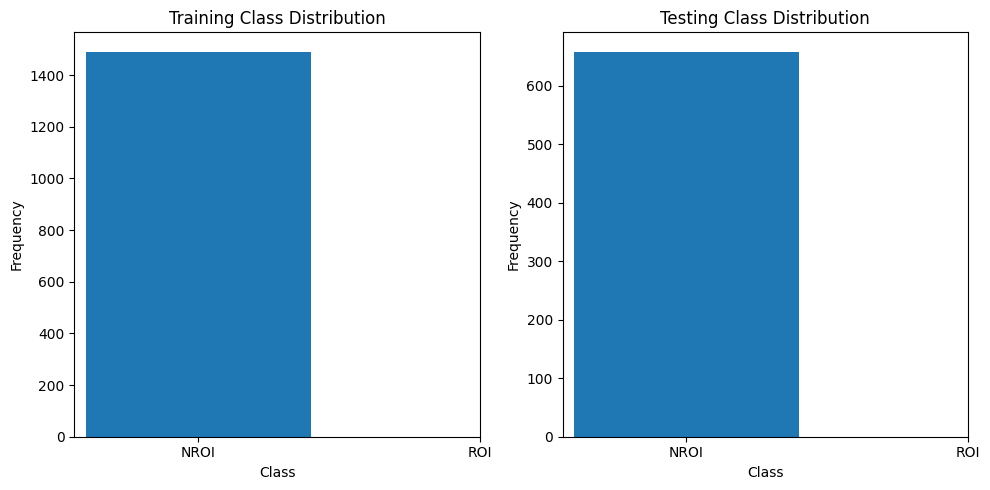

In [ ]:
import matplotlib.pyplot as plt

# Calculate class distribution for training and testing data
train_class_distribution = train_df_15["Class"].value_counts()
test_class_distribution = test_df_15["Class"].value_counts()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(train_class_distribution.index, train_class_distribution.values)
plt.title('Training Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['NROI', 'ROI'])

plt.subplot(1, 2, 2)
plt.bar(test_class_distribution.index, test_class_distribution.values)
plt.title('Testing Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['NROI', 'ROI'])

plt.tight_layout()
plt.show()


# Binary


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.optimizers import Adam

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")

# Map labels to binary classes
df_15['Class'] = df_15['Class'].apply(lambda x: 1 if x in ['CL', 'COL', 'COH'] else 0)

# Split the data into train and test sets
train_df_15 = pd.concat([df_15[df_15["Day"] <= 1095], df_15[(df_15["Day"] > 1460) & (df_15["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15[(df_15["Day"] > 1095) & (df_15["Day"] <= 1460)], df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

# Define the model architecture
dnn_model_15 = Sequential()
dnn_model_15.add(Dense(128, activation="relu", input_shape=(X_train_15.shape[1],)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(32, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(16, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(1, activation="sigmoid"))  # Output layer with sigmoid activation for binary classification

# Compile the model with optimized parameters
optimizer = Adam(lr=0.001)
dnn_model_15.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = dnn_model_15.fit(X_train_15, Y_train_15, epochs=1000, batch_size=16, callbacks=[early_stopping_callback])


Epoch 1/1000
94/94 [==============================] - ETA: 0s - loss: 2.0966 - accuracy: 0.5862

94/94 [==============================] - 5s 6ms/step - loss: 2.0966 - accuracy: 0.5862
Epoch 2/1000
92/94 [============================>.] - ETA: 0s - loss: 1.6002 - accuracy: 0.7038

94/94 [==============================] - 0s 4ms/step - loss: 1.5995 - accuracy: 0.7036
Epoch 3/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.3012 - accuracy: 0.8111

94/94 [==============================] - 0s 4ms/step - loss: 1.2974 - accuracy: 0.8115
Epoch 4/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.1103 - accuracy: 0.8840

94/94 [==============================] - 0s 4ms/step - loss: 1.1074 - accuracy: 0.8840
Epoch 5/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.9113 - accuracy: 0.9576

94/94 [==============================] - 0s 4ms/step - loss: 0.9058 - accuracy: 0.9577
Epoch 6/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.7795 - accuracy: 0.9660

94/94 [==============================] - 0s 4ms/step - loss: 0.7764 - accuracy: 0.9671
Epoch 7/1000
92/94 [============================>.] - ETA: 0s - loss: 0.6561 - accuracy: 0.9796

94/94 [==============================] - 0s 5ms/step - loss: 0.6552 - accuracy: 0.9799
Epoch 8/1000
92/94 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.9891

94/94 [==============================] - 1s 5ms/step - loss: 0.5550 - accuracy: 0.9886
Epoch 9/1000
93/94 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.9953

94/94 [==============================] - 1s 10ms/step - loss: 0.4679 - accuracy: 0.9953
Epoch 10/1000
92/94 [============================>.] - ETA: 0s - loss: 0.4041 - accuracy: 0.9980

94/94 [==============================] - 1s 8ms/step - loss: 0.4035 - accuracy: 0.9980
Epoch 11/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.3506 - accuracy: 0.9978

94/94 [==============================] - 1s 8ms/step - loss: 0.3478 - accuracy: 0.9980
Epoch 12/1000
91/94 [============================>.] - ETA: 0s - loss: 0.2953 - accuracy: 0.9979

94/94 [==============================] - 1s 7ms/step - loss: 0.2949 - accuracy: 0.9980
Epoch 13/1000
93/94 [============================>.] - ETA: 0s - loss: 0.2505 - accuracy: 0.9980

94/94 [==============================] - 1s 6ms/step - loss: 0.2505 - accuracy: 0.9980
Epoch 14/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.2118 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 0.2112 - accuracy: 1.0000
Epoch 15/1000
92/94 [============================>.] - ETA: 0s - loss: 0.1791 - accuracy: 0.9986

94/94 [==============================] - 1s 6ms/step - loss: 0.1790 - accuracy: 0.9987
Epoch 16/1000
91/94 [============================>.] - ETA: 0s - loss: 0.1517 - accuracy: 0.9986

94/94 [==============================] - 1s 6ms/step - loss: 0.1515 - accuracy: 0.9987
Epoch 17/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.1270 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 0.1268 - accuracy: 1.0000
Epoch 18/1000
91/94 [============================>.] - ETA: 0s - loss: 0.1063 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 0.1060 - accuracy: 1.0000
Epoch 19/1000
94/94 [==============================] - ETA: 0s - loss: 0.0883 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0883 - accuracy: 1.0000
Epoch 20/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.0740 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 1.0000
Epoch 21/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.0628 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0622 - accuracy: 1.0000
Epoch 22/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.0519 - accuracy: 0.9993

94/94 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9993
Epoch 23/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.0435 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 1.0000
Epoch 24/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.0342 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 1.0000
Epoch 25/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.0284 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 26/1000
94/94 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 27/1000
91/94 [============================>.] - ETA: 0s - loss: 0.0204 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 28/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.0169 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 29/1000
91/94 [============================>.] - ETA: 0s - loss: 0.0147 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 30/1000
91/94 [============================>.] - ETA: 0s - loss: 0.0115 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 31/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 32/1000
92/94 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 33/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.0074 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 34/1000
91/94 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 35/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 36/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 37/1000
88/94 [===========================>..] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 38/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 39/1000
84/94 [=========================>....] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 40/1000
86/94 [==========================>...] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 41/1000
91/94 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 42/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 43/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 44/1000
91/94 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 45/1000
92/94 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 46/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 47/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 48/1000
87/94 [==========================>...] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 49/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 50/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 51/1000
91/94 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 52/1000
82/94 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 53/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 54/1000
90/94 [===========================>..] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 55/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 56/1000
92/94 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 57/1000
89/94 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 58/1000
83/94 [=========================>....] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 59/1000
85/94 [==========================>...] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 60/1000
94/94 [==============================] - ETA: 0s - loss: 8.8047e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.8047e-04 - accuracy: 1.0000
Epoch 61/1000
87/94 [==========================>...] - ETA: 0s - loss: 6.9771e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.8096e-04 - accuracy: 1.0000
Epoch 62/1000
85/94 [==========================>...] - ETA: 0s - loss: 8.9725e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.7674e-04 - accuracy: 1.0000
Epoch 63/1000
83/94 [=========================>....] - ETA: 0s - loss: 9.5521e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.3950e-04 - accuracy: 1.0000
Epoch 64/1000
83/94 [=========================>....] - ETA: 0s - loss: 9.8794e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.5378e-04 - accuracy: 1.0000
Epoch 65/1000
81/94 [========================>.....] - ETA: 0s - loss: 6.1609e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.8153e-04 - accuracy: 1.0000
Epoch 66/1000
94/94 [==============================] - ETA: 0s - loss: 4.0805e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.0805e-04 - accuracy: 1.0000
Epoch 67/1000
86/94 [==========================>...] - ETA: 0s - loss: 4.1808e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 4.2410e-04 - accuracy: 1.0000
Epoch 68/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.4437e-04 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.4917e-04 - accuracy: 1.0000
Epoch 69/1000
92/94 [============================>.] - ETA: 0s - loss: 3.3928e-04 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.3534e-04 - accuracy: 1.0000
Epoch 70/1000
87/94 [==========================>...] - ETA: 0s - loss: 3.5269e-04 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.3618e-04 - accuracy: 1.0000
Epoch 71/1000
94/94 [==============================] - ETA: 0s - loss: 3.5881e-04 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.5881e-04 - accuracy: 1.0000
Epoch 72/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.3721e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.8869e-04 - accuracy: 1.0000
Epoch 73/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.4688e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3634e-04 - accuracy: 1.0000
Epoch 74/1000
88/94 [===========================>..] - ETA: 0s - loss: 3.4179e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.2897e-04 - accuracy: 1.0000
Epoch 75/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.7224e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.6384e-04 - accuracy: 1.0000
Epoch 76/1000
94/94 [==============================] - ETA: 0s - loss: 2.0516e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0516e-04 - accuracy: 1.0000
Epoch 77/1000
81/94 [========================>.....] - ETA: 0s - loss: 2.6028e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5800e-04 - accuracy: 1.0000
Epoch 78/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.9202e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8914e-04 - accuracy: 1.0000
Epoch 79/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.1883e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0691e-04 - accuracy: 1.0000
Epoch 80/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.4427e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4041e-04 - accuracy: 1.0000
Epoch 81/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.5854e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.5886e-04 - accuracy: 1.0000
Epoch 82/1000
85/94 [==========================>...] - ETA: 0s - loss: 3.3373e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0925e-04 - accuracy: 1.0000
Epoch 83/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.7261e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6155e-04 - accuracy: 1.0000
Epoch 84/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.3170e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.2813e-04 - accuracy: 1.0000
Epoch 85/1000
92/94 [============================>.] - ETA: 0s - loss: 1.3371e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.4211e-04 - accuracy: 1.0000
Epoch 86/1000
92/94 [============================>.] - ETA: 0s - loss: 1.2588e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.2509e-04 - accuracy: 1.0000
Epoch 87/1000
92/94 [============================>.] - ETA: 0s - loss: 1.3638e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.3476e-04 - accuracy: 1.0000
Epoch 88/1000
91/94 [============================>.] - ETA: 0s - loss: 1.2172e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.2049e-04 - accuracy: 1.0000
Epoch 89/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.6590e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6606e-04 - accuracy: 1.0000
Epoch 90/1000
93/94 [============================>.] - ETA: 0s - loss: 1.2434e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.2560e-04 - accuracy: 1.0000
Epoch 91/1000
92/94 [============================>.] - ETA: 0s - loss: 1.0877e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.0749e-04 - accuracy: 1.0000
Epoch 92/1000
94/94 [==============================] - ETA: 0s - loss: 1.2149e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.2149e-04 - accuracy: 1.0000
Epoch 93/1000
88/94 [===========================>..] - ETA: 0s - loss: 9.5150e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.9816e-05 - accuracy: 1.0000
Epoch 94/1000
93/94 [============================>.] - ETA: 0s - loss: 1.3773e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.3749e-04 - accuracy: 1.0000
Epoch 95/1000
94/94 [==============================] - ETA: 0s - loss: 9.0407e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.0407e-05 - accuracy: 1.0000
Epoch 96/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.0741e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1214e-04 - accuracy: 1.0000
Epoch 97/1000
81/94 [========================>.....] - ETA: 0s - loss: 2.1343e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1900e-04 - accuracy: 1.0000
Epoch 98/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.0774e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.0598e-04 - accuracy: 1.0000
Epoch 99/1000
93/94 [============================>.] - ETA: 0s - loss: 8.0752e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 8.0593e-05 - accuracy: 1.0000
Epoch 100/1000
92/94 [============================>.] - ETA: 0s - loss: 8.5361e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 8.4383e-05 - accuracy: 1.0000
Epoch 101/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.4668e-04 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.3993e-04 - accuracy: 1.0000
Epoch 102/1000
87/94 [==========================>...] - ETA: 0s - loss: 5.3705e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 5.1347e-05 - accuracy: 1.0000
Epoch 103/1000
91/94 [============================>.] - ETA: 0s - loss: 4.7396e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.6439e-05 - accuracy: 1.0000
Epoch 104/1000
86/94 [==========================>...] - ETA: 0s - loss: 6.0792e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1074e-04 - accuracy: 1.0000
Epoch 105/1000
80/94 [========================>.....] - ETA: 0s - loss: 9.4001e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.7354e-05 - accuracy: 1.0000
Epoch 106/1000
84/94 [=========================>....] - ETA: 0s - loss: 7.4448e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.9162e-05 - accuracy: 1.0000
Epoch 107/1000
84/94 [=========================>....] - ETA: 0s - loss: 7.4016e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.9280e-05 - accuracy: 1.0000
Epoch 108/1000
82/94 [=========================>....] - ETA: 0s - loss: 1.8343e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6370e-04 - accuracy: 1.0000
Epoch 109/1000
83/94 [=========================>....] - ETA: 0s - loss: 5.5200e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.4537e-05 - accuracy: 1.0000
Epoch 110/1000
87/94 [==========================>...] - ETA: 0s - loss: 4.4177e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.7348e-05 - accuracy: 1.0000
Epoch 111/1000
86/94 [==========================>...] - ETA: 0s - loss: 6.7438e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.6230e-05 - accuracy: 1.0000
Epoch 112/1000
87/94 [==========================>...] - ETA: 0s - loss: 4.1322e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.1803e-05 - accuracy: 1.0000
Epoch 113/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.0940e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.0249e-04 - accuracy: 1.0000
Epoch 114/1000
87/94 [==========================>...] - ETA: 0s - loss: 7.8407e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.6317e-05 - accuracy: 1.0000
Epoch 115/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.8100e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.7036e-05 - accuracy: 1.0000
Epoch 116/1000
84/94 [=========================>....] - ETA: 0s - loss: 5.7014e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.9470e-05 - accuracy: 1.0000
Epoch 117/1000
92/94 [============================>.] - ETA: 0s - loss: 1.6300e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6104e-04 - accuracy: 1.0000
Epoch 118/1000
86/94 [==========================>...] - ETA: 0s - loss: 7.8698e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.0908e-05 - accuracy: 1.0000
Epoch 119/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.9738e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.5763e-05 - accuracy: 1.0000
Epoch 120/1000
82/94 [=========================>....] - ETA: 0s - loss: 1.0122e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.7726e-05 - accuracy: 1.0000
Epoch 121/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.1399e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3427e-05 - accuracy: 1.0000
Epoch 122/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.7204e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4949e-05 - accuracy: 1.0000
Epoch 123/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.3601e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3759e-05 - accuracy: 1.0000
Epoch 124/1000
88/94 [===========================>..] - ETA: 0s - loss: 5.8764e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.8864e-05 - accuracy: 1.0000
Epoch 125/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.2588e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.6690e-05 - accuracy: 1.0000
Epoch 126/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.7509e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.5879e-04 - accuracy: 1.0000
Epoch 127/1000
87/94 [==========================>...] - ETA: 0s - loss: 3.4443e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.4991e-05 - accuracy: 1.0000
Epoch 128/1000
94/94 [==============================] - ETA: 0s - loss: 3.9127e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.9127e-05 - accuracy: 1.0000
Epoch 129/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.1060e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2428e-05 - accuracy: 1.0000
Epoch 130/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.3431e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.3412e-05 - accuracy: 1.0000
Epoch 131/1000
88/94 [===========================>..] - ETA: 0s - loss: 5.2202e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 4.9522e-05 - accuracy: 1.0000
Epoch 132/1000
91/94 [============================>.] - ETA: 0s - loss: 6.6864e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 7.0258e-06 - accuracy: 1.0000
Epoch 133/1000
94/94 [==============================] - ETA: 0s - loss: 2.7497e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.7497e-05 - accuracy: 1.0000
Epoch 134/1000
90/94 [===========================>..] - ETA: 0s - loss: 4.3059e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.1652e-05 - accuracy: 1.0000
Epoch 135/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.7553e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.6016e-05 - accuracy: 1.0000
Epoch 136/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.2033e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1538e-04 - accuracy: 1.0000
Epoch 137/1000
93/94 [============================>.] - ETA: 0s - loss: 1.9763e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9724e-05 - accuracy: 1.0000
Epoch 138/1000
92/94 [============================>.] - ETA: 0s - loss: 2.5960e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 2.5633e-05 - accuracy: 1.0000
Epoch 139/1000
80/94 [========================>.....] - ETA: 0s - loss: 2.3159e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 2.2064e-05 - accuracy: 1.0000
Epoch 140/1000
91/94 [============================>.] - ETA: 0s - loss: 8.4294e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.7111e-06 - accuracy: 1.0000
Epoch 141/1000
94/94 [==============================] - ETA: 0s - loss: 2.1815e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 2.1815e-05 - accuracy: 1.0000
Epoch 142/1000
93/94 [============================>.] - ETA: 0s - loss: 1.8318e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 1.8281e-05 - accuracy: 1.0000
Epoch 143/1000
90/94 [===========================>..] - ETA: 0s - loss: 4.4119e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.2687e-05 - accuracy: 1.0000
Epoch 144/1000
94/94 [==============================] - ETA: 0s - loss: 1.1462e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 1.1462e-05 - accuracy: 1.0000
Epoch 145/1000
79/94 [========================>.....] - ETA: 0s - loss: 3.9599e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 6.1249e-06 - accuracy: 1.0000
Epoch 146/1000
92/94 [============================>.] - ETA: 0s - loss: 1.3720e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 1.3658e-05 - accuracy: 1.0000
Epoch 147/1000
90/94 [===========================>..] - ETA: 0s - loss: 3.5546e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.4535e-05 - accuracy: 1.0000
Epoch 148/1000
92/94 [============================>.] - ETA: 0s - loss: 8.6373e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 1.9634e-04 - accuracy: 1.0000
Epoch 149/1000
89/94 [===========================>..] - ETA: 0s - loss: 5.3127e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.0809e-05 - accuracy: 1.0000
Epoch 150/1000
90/94 [===========================>..] - ETA: 0s - loss: 3.4765e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.3620e-05 - accuracy: 1.0000
Epoch 151/1000
78/94 [=======================>......] - ETA: 0s - loss: 1.7289e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 1.5344e-05 - accuracy: 1.0000
Epoch 152/1000
83/94 [=========================>....] - ETA: 0s - loss: 5.3752e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.1007e-05 - accuracy: 1.0000
Epoch 153/1000
88/94 [===========================>..] - ETA: 0s - loss: 7.0943e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.0962e-06 - accuracy: 1.0000
Epoch 154/1000
91/94 [============================>.] - ETA: 0s - loss: 1.1537e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1280e-05 - accuracy: 1.0000
Epoch 155/1000
86/94 [==========================>...] - ETA: 0s - loss: 4.3849e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.1852e-06 - accuracy: 1.0000
Epoch 156/1000
93/94 [============================>.] - ETA: 0s - loss: 6.8806e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 6.8668e-06 - accuracy: 1.0000
Epoch 157/1000
83/94 [=========================>....] - ETA: 0s - loss: 9.6561e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 1.2010e-05 - accuracy: 1.0000
Epoch 158/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.9928e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8121e-04 - accuracy: 1.0000
Epoch 159/1000
85/94 [==========================>...] - ETA: 0s - loss: 3.8698e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.5547e-05 - accuracy: 1.0000
Epoch 160/1000
88/94 [===========================>..] - ETA: 0s - loss: 4.6892e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.4678e-06 - accuracy: 1.0000
Epoch 161/1000
81/94 [========================>.....] - ETA: 0s - loss: 6.6665e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.2233e-06 - accuracy: 1.0000
Epoch 162/1000
87/94 [==========================>...] - ETA: 0s - loss: 9.7207e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.2269e-06 - accuracy: 1.0000
Epoch 163/1000
85/94 [==========================>...] - ETA: 0s - loss: 9.0305e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 8.2704e-06 - accuracy: 1.0000
Epoch 164/1000
89/94 [===========================>..] - ETA: 0s - loss: 3.8528e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.7542e-06 - accuracy: 1.0000
Epoch 165/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.2673e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.3904e-06 - accuracy: 1.0000
Epoch 166/1000
91/94 [============================>.] - ETA: 0s - loss: 2.8677e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.8147e-06 - accuracy: 1.0000
Epoch 167/1000
94/94 [==============================] - ETA: 0s - loss: 2.3496e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.3496e-05 - accuracy: 1.0000
Epoch 168/1000
92/94 [============================>.] - ETA: 0s - loss: 5.3011e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 5.2557e-06 - accuracy: 1.0000
Epoch 169/1000
86/94 [==========================>...] - ETA: 0s - loss: 5.8867e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.1782e-06 - accuracy: 1.0000
Epoch 170/1000
92/94 [============================>.] - ETA: 0s - loss: 4.0558e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 4.0232e-06 - accuracy: 1.0000
Epoch 171/1000
87/94 [==========================>...] - ETA: 0s - loss: 4.1560e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.9330e-06 - accuracy: 1.0000
Epoch 172/1000
81/94 [========================>.....] - ETA: 0s - loss: 9.8314e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.7534e-07 - accuracy: 1.0000
Epoch 173/1000
87/94 [==========================>...] - ETA: 0s - loss: 6.4181e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.2687e-06 - accuracy: 1.0000
Epoch 174/1000
89/94 [===========================>..] - ETA: 0s - loss: 3.7338e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.5774e-06 - accuracy: 1.0000
Epoch 175/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.9796e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8283e-05 - accuracy: 1.0000
Epoch 176/1000
83/94 [=========================>....] - ETA: 0s - loss: 6.7166e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.4159e-06 - accuracy: 1.0000
Epoch 177/1000
82/94 [=========================>....] - ETA: 0s - loss: 5.8994e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.2494e-06 - accuracy: 1.0000
Epoch 178/1000
94/94 [==============================] - ETA: 0s - loss: 4.1962e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.1962e-06 - accuracy: 1.0000
Epoch 179/1000
88/94 [===========================>..] - ETA: 0s - loss: 4.3746e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.1316e-05 - accuracy: 1.0000
Epoch 180/1000
80/94 [========================>.....] - ETA: 0s - loss: 2.1642e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8639e-04 - accuracy: 1.0000
Epoch 181/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.6626e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6050e-06 - accuracy: 1.0000
Epoch 182/1000
86/94 [==========================>...] - ETA: 0s - loss: 4.0394e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.4918e-06 - accuracy: 1.0000
Epoch 183/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.2391e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1624e-05 - accuracy: 1.0000
Epoch 184/1000
91/94 [============================>.] - ETA: 0s - loss: 3.0643e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 2.9940e-06 - accuracy: 1.0000
Epoch 185/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.8083e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8215e-06 - accuracy: 1.0000
Epoch 186/1000
81/94 [========================>.....] - ETA: 0s - loss: 1.8500e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.7844e-05 - accuracy: 1.0000
Epoch 187/1000
93/94 [============================>.] - ETA: 0s - loss: 1.2989e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.2963e-05 - accuracy: 1.0000
Epoch 188/1000
91/94 [============================>.] - ETA: 0s - loss: 6.7388e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.5919e-06 - accuracy: 1.0000
Epoch 189/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.1676e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1562e-05 - accuracy: 1.0000
Epoch 190/1000
87/94 [==========================>...] - ETA: 0s - loss: 4.2183e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.9739e-06 - accuracy: 1.0000
Epoch 191/1000
93/94 [============================>.] - ETA: 0s - loss: 1.4991e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.4961e-06 - accuracy: 1.0000
Epoch 192/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.5304e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2904e-06 - accuracy: 1.0000
Epoch 193/1000
94/94 [==============================] - ETA: 0s - loss: 3.2797e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.2797e-06 - accuracy: 1.0000
Epoch 194/1000
91/94 [============================>.] - ETA: 0s - loss: 5.8797e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.7432e-06 - accuracy: 1.0000
Epoch 195/1000
93/94 [============================>.] - ETA: 0s - loss: 9.6085e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 9.5894e-07 - accuracy: 1.0000
Epoch 196/1000
92/94 [============================>.] - ETA: 0s - loss: 1.9644e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9400e-06 - accuracy: 1.0000
Epoch 197/1000
92/94 [============================>.] - ETA: 0s - loss: 3.5405e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.5207e-05 - accuracy: 1.0000
Epoch 198/1000
92/94 [============================>.] - ETA: 0s - loss: 2.0230e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 1.9997e-05 - accuracy: 1.0000
Epoch 199/1000
92/94 [============================>.] - ETA: 0s - loss: 2.1732e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.1474e-06 - accuracy: 1.0000
Epoch 200/1000
94/94 [==============================] - ETA: 0s - loss: 7.6901e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 7.6901e-06 - accuracy: 1.0000
Epoch 201/1000
91/94 [============================>.] - ETA: 0s - loss: 9.7790e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 3ms/step - loss: 9.5506e-06 - accuracy: 1.0000
Epoch 202/1000
85/94 [==========================>...] - ETA: 0s - loss: 3.6497e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.3497e-07 - accuracy: 1.0000
Epoch 203/1000
91/94 [============================>.] - ETA: 0s - loss: 4.9647e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.8494e-06 - accuracy: 1.0000
Epoch 204/1000
91/94 [============================>.] - ETA: 0s - loss: 7.7084e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.5320e-07 - accuracy: 1.0000
Epoch 205/1000
86/94 [==========================>...] - ETA: 0s - loss: 4.2783e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.9673e-06 - accuracy: 1.0000
Epoch 206/1000
91/94 [============================>.] - ETA: 0s - loss: 2.4165e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3625e-05 - accuracy: 1.0000
Epoch 207/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.3982e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.3521e-06 - accuracy: 1.0000
Epoch 208/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.2218e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9874e-05 - accuracy: 1.0000
Epoch 209/1000
88/94 [===========================>..] - ETA: 0s - loss: 6.4651e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.1214e-07 - accuracy: 1.0000
Epoch 210/1000
85/94 [==========================>...] - ETA: 0s - loss: 7.1957e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.6999e-06 - accuracy: 1.0000
Epoch 211/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.9063e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.7649e-07 - accuracy: 1.0000
Epoch 212/1000
85/94 [==========================>...] - ETA: 0s - loss: 3.4040e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.5009e-06 - accuracy: 1.0000
Epoch 213/1000
83/94 [=========================>....] - ETA: 0s - loss: 9.9031e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.2904e-06 - accuracy: 1.0000
Epoch 214/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.1995e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0101e-06 - accuracy: 1.0000
Epoch 215/1000
94/94 [==============================] - ETA: 0s - loss: 2.1951e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1951e-06 - accuracy: 1.0000
Epoch 216/1000
79/94 [========================>.....] - ETA: 0s - loss: 2.2173e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0742e-07 - accuracy: 1.0000
Epoch 217/1000
84/94 [=========================>....] - ETA: 0s - loss: 7.2177e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.5276e-07 - accuracy: 1.0000
Epoch 218/1000
92/94 [============================>.] - ETA: 0s - loss: 9.2845e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.1803e-07 - accuracy: 1.0000
Epoch 219/1000
83/94 [=========================>....] - ETA: 0s - loss: 9.1343e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.1778e-06 - accuracy: 1.0000
Epoch 220/1000
92/94 [============================>.] - ETA: 0s - loss: 1.2218e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.2072e-06 - accuracy: 1.0000
Epoch 221/1000
83/94 [=========================>....] - ETA: 0s - loss: 9.1144e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.1736e-06 - accuracy: 1.0000
Epoch 222/1000
91/94 [============================>.] - ETA: 0s - loss: 4.8099e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.6992e-07 - accuracy: 1.0000
Epoch 223/1000
82/94 [=========================>....] - ETA: 0s - loss: 7.8598e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.2802e-07 - accuracy: 1.0000
Epoch 224/1000
83/94 [=========================>....] - ETA: 0s - loss: 4.5233e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.1782e-07 - accuracy: 1.0000
Epoch 225/1000
93/94 [============================>.] - ETA: 0s - loss: 2.4309e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4264e-05 - accuracy: 1.0000
Epoch 226/1000
85/94 [==========================>...] - ETA: 0s - loss: 6.6309e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.1807e-07 - accuracy: 1.0000
Epoch 227/1000
80/94 [========================>.....] - ETA: 0s - loss: 4.6740e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.0150e-06 - accuracy: 1.0000
Epoch 228/1000
87/94 [==========================>...] - ETA: 0s - loss: 4.8712e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.5532e-06 - accuracy: 1.0000
Epoch 229/1000
91/94 [============================>.] - ETA: 0s - loss: 1.7797e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 1.7382e-05 - accuracy: 1.0000
Epoch 230/1000
93/94 [============================>.] - ETA: 0s - loss: 1.5818e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 1.5787e-06 - accuracy: 1.0000
Epoch 231/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.2981e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.3214e-07 - accuracy: 1.0000
Epoch 232/1000
94/94 [==============================] - ETA: 0s - loss: 8.5616e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 8.5616e-07 - accuracy: 1.0000
Epoch 233/1000
92/94 [============================>.] - ETA: 0s - loss: 2.5546e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.5235e-07 - accuracy: 1.0000
Epoch 234/1000
91/94 [============================>.] - ETA: 0s - loss: 1.4936e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.4589e-06 - accuracy: 1.0000
Epoch 235/1000
85/94 [==========================>...] - ETA: 0s - loss: 6.0214e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.8293e-07 - accuracy: 1.0000
Epoch 236/1000
94/94 [==============================] - ETA: 0s - loss: 7.0767e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.0767e-06 - accuracy: 1.0000
Epoch 237/1000
80/94 [========================>.....] - ETA: 0s - loss: 1.9465e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6910e-06 - accuracy: 1.0000
Epoch 238/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.6629e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4714e-07 - accuracy: 1.0000
Epoch 239/1000
92/94 [============================>.] - ETA: 0s - loss: 2.8231e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.7894e-06 - accuracy: 1.0000
Epoch 240/1000
85/94 [==========================>...] - ETA: 0s - loss: 3.0102e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.7785e-07 - accuracy: 1.0000
Epoch 241/1000
84/94 [=========================>....] - ETA: 0s - loss: 7.3423e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.7418e-07 - accuracy: 1.0000
Epoch 242/1000
94/94 [==============================] - ETA: 0s - loss: 2.8174e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 2.8174e-07 - accuracy: 1.0000
Epoch 243/1000
89/94 [===========================>..] - ETA: 0s - loss: 7.0929e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 9ms/step - loss: 6.8029e-07 - accuracy: 1.0000
Epoch 244/1000
89/94 [===========================>..] - ETA: 0s - loss: 4.6019e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 9ms/step - loss: 4.4418e-07 - accuracy: 1.0000
Epoch 245/1000
87/94 [==========================>...] - ETA: 0s - loss: 5.0172e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.8001e-07 - accuracy: 1.0000
Epoch 246/1000
93/94 [============================>.] - ETA: 0s - loss: 3.7029e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 10ms/step - loss: 3.6961e-07 - accuracy: 1.0000
Epoch 247/1000
91/94 [============================>.] - ETA: 0s - loss: 1.5070e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 9ms/step - loss: 1.4933e-05 - accuracy: 1.0000
Epoch 248/1000
91/94 [============================>.] - ETA: 0s - loss: 1.2049e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 9ms/step - loss: 1.1779e-06 - accuracy: 1.0000
Epoch 249/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.2771e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 1.2099e-05 - accuracy: 1.0000
Epoch 250/1000
94/94 [==============================] - ETA: 0s - loss: 5.3694e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 9ms/step - loss: 5.3694e-07 - accuracy: 1.0000
Epoch 251/1000
91/94 [============================>.] - ETA: 0s - loss: 1.4233e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 10ms/step - loss: 1.3939e-06 - accuracy: 1.0000
Epoch 252/1000
94/94 [==============================] - ETA: 0s - loss: 9.9370e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 11ms/step - loss: 9.9370e-07 - accuracy: 1.0000
Epoch 253/1000
93/94 [============================>.] - ETA: 0s - loss: 1.2594e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 14ms/step - loss: 1.2730e-07 - accuracy: 1.0000
Epoch 254/1000
90/94 [===========================>..] - ETA: 0s - loss: 4.1002e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 10ms/step - loss: 4.9210e-07 - accuracy: 1.0000
Epoch 255/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.1390e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.1980e-07 - accuracy: 1.0000
Epoch 256/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.9311e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.8740e-07 - accuracy: 1.0000
Epoch 257/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.7077e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 2.6374e-07 - accuracy: 1.0000
Epoch 258/1000
89/94 [===========================>..] - ETA: 0s - loss: 9.9831e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 9.6228e-07 - accuracy: 1.0000
Epoch 259/1000
94/94 [==============================] - ETA: 0s - loss: 3.8571e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 3.8571e-06 - accuracy: 1.0000
Epoch 260/1000
94/94 [==============================] - ETA: 0s - loss: 2.1892e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.1892e-06 - accuracy: 1.0000
Epoch 261/1000
88/94 [===========================>..] - ETA: 0s - loss: 4.8122e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 4.8095e-08 - accuracy: 1.0000
Epoch 262/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.8929e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 2.8030e-07 - accuracy: 1.0000
Epoch 263/1000
86/94 [==========================>...] - ETA: 0s - loss: 4.9487e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 4.6305e-07 - accuracy: 1.0000
Epoch 264/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.7043e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.6268e-05 - accuracy: 1.0000
Epoch 265/1000
87/94 [==========================>...] - ETA: 0s - loss: 6.0054e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 5.7097e-06 - accuracy: 1.0000
Epoch 266/1000
92/94 [============================>.] - ETA: 0s - loss: 1.4474e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.4313e-07 - accuracy: 1.0000
Epoch 267/1000
87/94 [==========================>...] - ETA: 0s - loss: 3.5663e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 3.3315e-06 - accuracy: 1.0000
Epoch 268/1000
86/94 [==========================>...] - ETA: 0s - loss: 7.8842e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 7.5731e-08 - accuracy: 1.0000
Epoch 269/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.3039e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 2.2345e-07 - accuracy: 1.0000
Epoch 270/1000
91/94 [============================>.] - ETA: 0s - loss: 1.7472e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 10ms/step - loss: 1.7214e-07 - accuracy: 1.0000
Epoch 271/1000
91/94 [============================>.] - ETA: 0s - loss: 7.4588e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 7.2887e-07 - accuracy: 1.0000
Epoch 272/1000
88/94 [===========================>..] - ETA: 0s - loss: 8.0073e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 7.5720e-07 - accuracy: 1.0000
Epoch 273/1000
87/94 [==========================>...] - ETA: 0s - loss: 4.6941e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.5046e-06 - accuracy: 1.0000
Epoch 274/1000
90/94 [===========================>..] - ETA: 0s - loss: 3.6997e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.5737e-06 - accuracy: 1.0000
Epoch 275/1000
91/94 [============================>.] - ETA: 0s - loss: 2.6690e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 2.6072e-06 - accuracy: 1.0000
Epoch 276/1000
93/94 [============================>.] - ETA: 0s - loss: 2.5980e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 9ms/step - loss: 2.5933e-07 - accuracy: 1.0000
Epoch 277/1000
92/94 [============================>.] - ETA: 0s - loss: 7.4072e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 11ms/step - loss: 7.3132e-06 - accuracy: 1.0000
Epoch 278/1000
89/94 [===========================>..] - ETA: 0s - loss: 7.3664e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 7.0479e-07 - accuracy: 1.0000
Epoch 279/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.0353e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 1.9531e-07 - accuracy: 1.0000
Epoch 280/1000
91/94 [============================>.] - ETA: 0s - loss: 2.4289e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 10ms/step - loss: 2.4342e-07 - accuracy: 1.0000
Epoch 281/1000
91/94 [============================>.] - ETA: 0s - loss: 1.8084e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.7751e-07 - accuracy: 1.0000
Epoch 282/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.8443e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.7225e-06 - accuracy: 1.0000
Epoch 283/1000
93/94 [============================>.] - ETA: 0s - loss: 1.0762e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.0744e-07 - accuracy: 1.0000
Epoch 284/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.4978e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 2.5098e-08 - accuracy: 1.0000
Epoch 285/1000
85/94 [==========================>...] - ETA: 0s - loss: 5.6421e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.1679e-07 - accuracy: 1.0000
Epoch 286/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.9121e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8170e-07 - accuracy: 1.0000
Epoch 287/1000
93/94 [============================>.] - ETA: 0s - loss: 2.8977e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.8939e-07 - accuracy: 1.0000
Epoch 288/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.4385e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.3081e-07 - accuracy: 1.0000
Epoch 289/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.4636e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2916e-07 - accuracy: 1.0000
Epoch 290/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.4988e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.4065e-07 - accuracy: 1.0000
Epoch 291/1000
91/94 [============================>.] - ETA: 0s - loss: 1.1943e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 1.1665e-05 - accuracy: 1.0000
Epoch 292/1000
93/94 [============================>.] - ETA: 0s - loss: 8.1770e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 8.1645e-08 - accuracy: 1.0000
Epoch 293/1000
88/94 [===========================>..] - ETA: 0s - loss: 3.9287e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.7532e-07 - accuracy: 1.0000
Epoch 294/1000
87/94 [==========================>...] - ETA: 0s - loss: 5.1517e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.8149e-06 - accuracy: 1.0000
Epoch 295/1000
92/94 [============================>.] - ETA: 0s - loss: 2.8405e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.8084e-07 - accuracy: 1.0000
Epoch 296/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.6965e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.4099e-06 - accuracy: 1.0000
Epoch 297/1000
93/94 [============================>.] - ETA: 0s - loss: 1.1302e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1284e-07 - accuracy: 1.0000
Epoch 298/1000
94/94 [==============================] - ETA: 0s - loss: 7.4302e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.4302e-08 - accuracy: 1.0000
Epoch 299/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.3191e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1224e-07 - accuracy: 1.0000
Epoch 300/1000
81/94 [========================>.....] - ETA: 0s - loss: 1.2513e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.0878e-04 - accuracy: 1.0000
Epoch 301/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.5890e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4934e-06 - accuracy: 1.0000
Epoch 302/1000
94/94 [==============================] - ETA: 0s - loss: 2.1025e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1025e-06 - accuracy: 1.0000
Epoch 303/1000
94/94 [==============================] - ETA: 0s - loss: 7.1317e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.1317e-07 - accuracy: 1.0000
Epoch 304/1000
81/94 [========================>.....] - ETA: 0s - loss: 3.5896e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.3690e-08 - accuracy: 1.0000
Epoch 305/1000
80/94 [========================>.....] - ETA: 0s - loss: 6.2287e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.7137e-08 - accuracy: 1.0000
Epoch 306/1000
94/94 [==============================] - ETA: 0s - loss: 2.0873e-04 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0873e-04 - accuracy: 1.0000
Epoch 307/1000
81/94 [========================>.....] - ETA: 0s - loss: 6.0398e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.1277e-08 - accuracy: 1.0000
Epoch 308/1000
81/94 [========================>.....] - ETA: 0s - loss: 5.5955e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.2990e-06 - accuracy: 1.0000
Epoch 309/1000
92/94 [============================>.] - ETA: 0s - loss: 4.6934e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.7419e-07 - accuracy: 1.0000
Epoch 310/1000
81/94 [========================>.....] - ETA: 0s - loss: 7.7935e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.1526e-08 - accuracy: 1.0000
Epoch 311/1000
81/94 [========================>.....] - ETA: 0s - loss: 5.5138e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.1331e-08 - accuracy: 1.0000
Epoch 312/1000
80/94 [========================>.....] - ETA: 0s - loss: 1.0210e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8490e-07 - accuracy: 1.0000
Epoch 313/1000
86/94 [==========================>...] - ETA: 0s - loss: 3.7254e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.4396e-06 - accuracy: 1.0000
Epoch 314/1000
86/94 [==========================>...] - ETA: 0s - loss: 7.1176e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.7124e-08 - accuracy: 1.0000
Epoch 315/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.4885e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3895e-07 - accuracy: 1.0000
Epoch 316/1000
92/94 [============================>.] - ETA: 0s - loss: 7.1561e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.0678e-07 - accuracy: 1.0000
Epoch 317/1000
86/94 [==========================>...] - ETA: 0s - loss: 6.4906e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.1927e-06 - accuracy: 1.0000
Epoch 318/1000
89/94 [===========================>..] - ETA: 0s - loss: 5.8880e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.6353e-07 - accuracy: 1.0000
Epoch 319/1000
94/94 [==============================] - ETA: 0s - loss: 5.3462e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.3462e-06 - accuracy: 1.0000
Epoch 320/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.4846e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.4290e-07 - accuracy: 1.0000
Epoch 321/1000
90/94 [===========================>..] - ETA: 0s - loss: 7.7067e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 7.4659e-06 - accuracy: 1.0000
Epoch 322/1000
91/94 [============================>.] - ETA: 0s - loss: 8.6665e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 8.5002e-08 - accuracy: 1.0000
Epoch 323/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.9341e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 1.8414e-07 - accuracy: 1.0000
Epoch 324/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.0952e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.0586e-07 - accuracy: 1.0000
Epoch 325/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.0011e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 9.7818e-08 - accuracy: 1.0000
Epoch 326/1000
92/94 [============================>.] - ETA: 0s - loss: 1.9680e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9471e-07 - accuracy: 1.0000
Epoch 327/1000
92/94 [============================>.] - ETA: 0s - loss: 2.4909e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4822e-08 - accuracy: 1.0000
Epoch 328/1000
91/94 [============================>.] - ETA: 0s - loss: 3.4862e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.4926e-08 - accuracy: 1.0000
Epoch 329/1000
81/94 [========================>.....] - ETA: 0s - loss: 6.0427e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.6822e-08 - accuracy: 1.0000
Epoch 330/1000
94/94 [==============================] - ETA: 0s - loss: 1.6245e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6245e-06 - accuracy: 1.0000
Epoch 331/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.4938e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.4461e-06 - accuracy: 1.0000
Epoch 332/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.7058e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3854e-06 - accuracy: 1.0000
Epoch 333/1000
91/94 [============================>.] - ETA: 0s - loss: 4.2299e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.2257e-06 - accuracy: 1.0000
Epoch 334/1000
83/94 [=========================>....] - ETA: 0s - loss: 3.8597e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.4588e-07 - accuracy: 1.0000
Epoch 335/1000
90/94 [===========================>..] - ETA: 0s - loss: 4.8252e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.7340e-08 - accuracy: 1.0000
Epoch 336/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.4614e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4133e-08 - accuracy: 1.0000
Epoch 337/1000
94/94 [==============================] - ETA: 0s - loss: 1.8329e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8329e-06 - accuracy: 1.0000
Epoch 338/1000
81/94 [========================>.....] - ETA: 0s - loss: 7.8023e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.0574e-08 - accuracy: 1.0000
Epoch 339/1000
92/94 [============================>.] - ETA: 0s - loss: 3.6656e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.6461e-08 - accuracy: 1.0000
Epoch 340/1000
92/94 [============================>.] - ETA: 0s - loss: 9.3171e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.2013e-07 - accuracy: 1.0000
Epoch 341/1000
89/94 [===========================>..] - ETA: 0s - loss: 8.4499e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.1635e-08 - accuracy: 1.0000
Epoch 342/1000
94/94 [==============================] - ETA: 0s - loss: 1.0820e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.0820e-07 - accuracy: 1.0000
Epoch 343/1000
89/94 [===========================>..] - ETA: 0s - loss: 4.3842e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.5679e-08 - accuracy: 1.0000
Epoch 344/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.9458e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0122e-08 - accuracy: 1.0000
Epoch 345/1000
91/94 [============================>.] - ETA: 0s - loss: 3.6419e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.9266e-08 - accuracy: 1.0000
Epoch 346/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.6709e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4493e-06 - accuracy: 1.0000
Epoch 347/1000
81/94 [========================>.....] - ETA: 0s - loss: 3.0889e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.2619e-08 - accuracy: 1.0000
Epoch 348/1000
94/94 [==============================] - ETA: 0s - loss: 3.0375e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0375e-08 - accuracy: 1.0000
Epoch 349/1000
94/94 [==============================] - ETA: 0s - loss: 5.1598e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.1598e-06 - accuracy: 1.0000
Epoch 350/1000
84/94 [=========================>....] - ETA: 0s - loss: 9.0441e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.3179e-08 - accuracy: 1.0000
Epoch 351/1000
93/94 [============================>.] - ETA: 0s - loss: 3.2730e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.2696e-08 - accuracy: 1.0000
Epoch 352/1000
88/94 [===========================>..] - ETA: 0s - loss: 3.9378e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.8368e-08 - accuracy: 1.0000
Epoch 353/1000
88/94 [===========================>..] - ETA: 0s - loss: 4.3635e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 4.2602e-08 - accuracy: 1.0000
Epoch 354/1000
87/94 [==========================>...] - ETA: 0s - loss: 6.4477e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 6.2887e-08 - accuracy: 1.0000
Epoch 355/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.4347e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2828e-07 - accuracy: 1.0000
Epoch 356/1000
89/94 [===========================>..] - ETA: 0s - loss: 4.9364e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.8289e-08 - accuracy: 1.0000
Epoch 357/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.4193e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.4770e-08 - accuracy: 1.0000
Epoch 358/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.3012e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2303e-07 - accuracy: 1.0000
Epoch 359/1000
88/94 [===========================>..] - ETA: 0s - loss: 4.3454e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.2054e-08 - accuracy: 1.0000
Epoch 360/1000
85/94 [==========================>...] - ETA: 0s - loss: 5.0770e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.8337e-08 - accuracy: 1.0000
Epoch 361/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.2224e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1564e-06 - accuracy: 1.0000
Epoch 362/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.9556e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8901e-06 - accuracy: 1.0000
Epoch 363/1000
84/94 [=========================>....] - ETA: 0s - loss: 8.1181e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.3630e-07 - accuracy: 1.0000
Epoch 364/1000
93/94 [============================>.] - ETA: 0s - loss: 3.1020e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0962e-07 - accuracy: 1.0000
Epoch 365/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.5250e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.5512e-06 - accuracy: 1.0000
Epoch 366/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.1661e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1093e-07 - accuracy: 1.0000
Epoch 367/1000
89/94 [===========================>..] - ETA: 0s - loss: 6.9373e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.7239e-08 - accuracy: 1.0000
Epoch 368/1000
83/94 [=========================>....] - ETA: 0s - loss: 3.4376e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0647e-06 - accuracy: 1.0000
Epoch 369/1000
91/94 [============================>.] - ETA: 0s - loss: 2.2072e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2033e-08 - accuracy: 1.0000
Epoch 370/1000
85/94 [==========================>...] - ETA: 0s - loss: 8.1909e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.4932e-07 - accuracy: 1.0000
Epoch 371/1000
91/94 [============================>.] - ETA: 0s - loss: 3.5262e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.4848e-08 - accuracy: 1.0000
Epoch 372/1000
85/94 [==========================>...] - ETA: 0s - loss: 3.7368e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.6912e-08 - accuracy: 1.0000
Epoch 373/1000
87/94 [==========================>...] - ETA: 0s - loss: 3.4332e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.9692e-08 - accuracy: 1.0000
Epoch 374/1000
90/94 [===========================>..] - ETA: 0s - loss: 8.3259e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.1313e-08 - accuracy: 1.0000
Epoch 375/1000
89/94 [===========================>..] - ETA: 0s - loss: 7.6629e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.4129e-08 - accuracy: 1.0000
Epoch 376/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.4019e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.3609e-07 - accuracy: 1.0000
Epoch 377/1000
93/94 [============================>.] - ETA: 0s - loss: 2.2229e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2220e-08 - accuracy: 1.0000
Epoch 378/1000
89/94 [===========================>..] - ETA: 0s - loss: 4.8118e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.5970e-06 - accuracy: 1.0000
Epoch 379/1000
83/94 [=========================>....] - ETA: 0s - loss: 6.5200e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.0696e-08 - accuracy: 1.0000
Epoch 380/1000
84/94 [=========================>....] - ETA: 0s - loss: 3.1106e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.9996e-08 - accuracy: 1.0000
Epoch 381/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.0734e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.0421e-07 - accuracy: 1.0000
Epoch 382/1000
82/94 [=========================>....] - ETA: 0s - loss: 3.5045e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.3239e-08 - accuracy: 1.0000
Epoch 383/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.3468e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.2271e-06 - accuracy: 1.0000
Epoch 384/1000
93/94 [============================>.] - ETA: 0s - loss: 1.5918e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.5889e-07 - accuracy: 1.0000
Epoch 385/1000
90/94 [===========================>..] - ETA: 0s - loss: 5.5563e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 5.3750e-07 - accuracy: 1.0000
Epoch 386/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.4167e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.3736e-08 - accuracy: 1.0000
Epoch 387/1000
92/94 [============================>.] - ETA: 0s - loss: 6.2161e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 6.1731e-08 - accuracy: 1.0000
Epoch 388/1000
91/94 [============================>.] - ETA: 0s - loss: 4.9538e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.8970e-08 - accuracy: 1.0000
Epoch 389/1000
90/94 [===========================>..] - ETA: 0s - loss: 7.3497e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 7.1480e-08 - accuracy: 1.0000
Epoch 390/1000
92/94 [============================>.] - ETA: 0s - loss: 3.8276e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.6061e-05 - accuracy: 1.0000
Epoch 391/1000
90/94 [===========================>..] - ETA: 0s - loss: 5.9618e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.6425e-08 - accuracy: 1.0000
Epoch 392/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.1773e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1534e-07 - accuracy: 1.0000
Epoch 393/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.7204e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.6624e-08 - accuracy: 1.0000
Epoch 394/1000
89/94 [===========================>..] - ETA: 0s - loss: 5.4129e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.4410e-08 - accuracy: 1.0000
Epoch 395/1000
83/94 [=========================>....] - ETA: 0s - loss: 3.6269e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.4748e-08 - accuracy: 1.0000
Epoch 396/1000
89/94 [===========================>..] - ETA: 0s - loss: 7.3326e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.1351e-08 - accuracy: 1.0000
Epoch 397/1000
92/94 [============================>.] - ETA: 0s - loss: 4.2997e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.2455e-06 - accuracy: 1.0000
Epoch 398/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.8523e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.8146e-08 - accuracy: 1.0000
Epoch 399/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.8986e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 9ms/step - loss: 3.1681e-08 - accuracy: 1.0000
Epoch 400/1000
94/94 [==============================] - ETA: 0s - loss: 9.7285e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.7285e-08 - accuracy: 1.0000
Epoch 401/1000
93/94 [============================>.] - ETA: 0s - loss: 2.8112e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.8097e-08 - accuracy: 1.0000
Epoch 402/1000
92/94 [============================>.] - ETA: 0s - loss: 1.0710e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1065e-06 - accuracy: 1.0000
Epoch 403/1000
85/94 [==========================>...] - ETA: 0s - loss: 4.1473e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.8040e-06 - accuracy: 1.0000
Epoch 404/1000
92/94 [============================>.] - ETA: 0s - loss: 3.0869e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0719e-08 - accuracy: 1.0000
Epoch 405/1000
90/94 [===========================>..] - ETA: 0s - loss: 4.1538e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.1170e-08 - accuracy: 1.0000
Epoch 406/1000
91/94 [============================>.] - ETA: 0s - loss: 7.3841e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.2647e-08 - accuracy: 1.0000
Epoch 407/1000
91/94 [============================>.] - ETA: 0s - loss: 4.1248e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.0729e-08 - accuracy: 1.0000
Epoch 408/1000
93/94 [============================>.] - ETA: 0s - loss: 1.9643e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9638e-08 - accuracy: 1.0000
Epoch 409/1000
92/94 [============================>.] - ETA: 0s - loss: 3.6707e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.6593e-08 - accuracy: 1.0000
Epoch 410/1000
89/94 [===========================>..] - ETA: 0s - loss: 6.9508e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.6473e-07 - accuracy: 1.0000
Epoch 411/1000
91/94 [============================>.] - ETA: 0s - loss: 2.5988e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5808e-08 - accuracy: 1.0000
Epoch 412/1000
92/94 [============================>.] - ETA: 0s - loss: 3.8092e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.7853e-08 - accuracy: 1.0000
Epoch 413/1000
89/94 [===========================>..] - ETA: 0s - loss: 5.2381e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.0835e-08 - accuracy: 1.0000
Epoch 414/1000
94/94 [==============================] - ETA: 0s - loss: 4.1954e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.1954e-08 - accuracy: 1.0000
Epoch 415/1000
89/94 [===========================>..] - ETA: 0s - loss: 3.9430e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.8444e-08 - accuracy: 1.0000
Epoch 416/1000
92/94 [============================>.] - ETA: 0s - loss: 3.8164e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.8209e-08 - accuracy: 1.0000
Epoch 417/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.7684e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.7284e-07 - accuracy: 1.0000
Epoch 418/1000
92/94 [============================>.] - ETA: 0s - loss: 2.5966e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.5856e-08 - accuracy: 1.0000
Epoch 419/1000
89/94 [===========================>..] - ETA: 0s - loss: 3.1957e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 3.1548e-08 - accuracy: 1.0000
Epoch 420/1000
94/94 [==============================] - ETA: 0s - loss: 1.0743e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.0743e-06 - accuracy: 1.0000
Epoch 421/1000
86/94 [==========================>...] - ETA: 0s - loss: 3.4075e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.2803e-08 - accuracy: 1.0000
Epoch 422/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.2824e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2767e-08 - accuracy: 1.0000
Epoch 423/1000
90/94 [===========================>..] - ETA: 0s - loss: 3.3974e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.3666e-08 - accuracy: 1.0000
Epoch 424/1000
94/94 [==============================] - ETA: 0s - loss: 7.4625e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 7.4625e-08 - accuracy: 1.0000
Epoch 425/1000
81/94 [========================>.....] - ETA: 0s - loss: 3.3112e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.1348e-08 - accuracy: 1.0000
Epoch 426/1000
86/94 [==========================>...] - ETA: 0s - loss: 4.8221e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.5784e-08 - accuracy: 1.0000
Epoch 427/1000
90/94 [===========================>..] - ETA: 0s - loss: 3.4354e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.3903e-08 - accuracy: 1.0000
Epoch 428/1000
82/94 [=========================>....] - ETA: 0s - loss: 9.2545e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.4620e-08 - accuracy: 1.0000
Epoch 429/1000
93/94 [============================>.] - ETA: 0s - loss: 3.4310e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.4277e-08 - accuracy: 1.0000
Epoch 430/1000
92/94 [============================>.] - ETA: 0s - loss: 3.4038e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.3827e-08 - accuracy: 1.0000
Epoch 431/1000
94/94 [==============================] - ETA: 0s - loss: 2.5481e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5481e-08 - accuracy: 1.0000
Epoch 432/1000
92/94 [============================>.] - ETA: 0s - loss: 6.9978e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.9502e-08 - accuracy: 1.0000
Epoch 433/1000
81/94 [========================>.....] - ETA: 0s - loss: 6.7848e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.0730e-07 - accuracy: 1.0000
Epoch 434/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.7050e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5964e-08 - accuracy: 1.0000
Epoch 435/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.7499e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.7207e-08 - accuracy: 1.0000
Epoch 436/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.8083e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.7920e-08 - accuracy: 1.0000
Epoch 437/1000
83/94 [=========================>....] - ETA: 0s - loss: 6.2424e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.8096e-08 - accuracy: 1.0000
Epoch 438/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.9867e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1456e-08 - accuracy: 1.0000
Epoch 439/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.2092e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0812e-07 - accuracy: 1.0000
Epoch 440/1000
94/94 [==============================] - ETA: 0s - loss: 2.9148e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.9148e-08 - accuracy: 1.0000
Epoch 441/1000
90/94 [===========================>..] - ETA: 0s - loss: 6.3143e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.1064e-07 - accuracy: 1.0000
Epoch 442/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.3594e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.2486e-07 - accuracy: 1.0000
Epoch 443/1000
92/94 [============================>.] - ETA: 0s - loss: 3.1448e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.1404e-08 - accuracy: 1.0000
Epoch 444/1000
94/94 [==============================] - ETA: 0s - loss: 2.6436e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.6436e-08 - accuracy: 1.0000
Epoch 445/1000
94/94 [==============================] - ETA: 0s - loss: 3.9635e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.9635e-08 - accuracy: 1.0000
Epoch 446/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.4548e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.4449e-08 - accuracy: 1.0000
Epoch 447/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.8920e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.8831e-08 - accuracy: 1.0000
Epoch 448/1000
91/94 [============================>.] - ETA: 0s - loss: 7.0050e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 6.8949e-08 - accuracy: 1.0000
Epoch 449/1000
89/94 [===========================>..] - ETA: 0s - loss: 3.9852e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.8927e-08 - accuracy: 1.0000
Epoch 450/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.6733e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.5771e-07 - accuracy: 1.0000
Epoch 451/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.4876e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4378e-06 - accuracy: 1.0000
Epoch 452/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.3047e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.2293e-07 - accuracy: 1.0000
Epoch 453/1000
91/94 [============================>.] - ETA: 0s - loss: 1.6858e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6812e-08 - accuracy: 1.0000
Epoch 454/1000
89/94 [===========================>..] - ETA: 0s - loss: 4.9025e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.7173e-07 - accuracy: 1.0000
Epoch 455/1000
82/94 [=========================>....] - ETA: 0s - loss: 3.0442e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.1228e-06 - accuracy: 1.0000
Epoch 456/1000
85/94 [==========================>...] - ETA: 0s - loss: 3.4975e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.5022e-08 - accuracy: 1.0000
Epoch 457/1000
94/94 [==============================] - ETA: 0s - loss: 3.4724e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.4724e-08 - accuracy: 1.0000
Epoch 458/1000
85/94 [==========================>...] - ETA: 0s - loss: 4.6974e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.4920e-08 - accuracy: 1.0000
Epoch 459/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.8689e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.8490e-08 - accuracy: 1.0000
Epoch 460/1000
92/94 [============================>.] - ETA: 0s - loss: 2.9785e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.9656e-08 - accuracy: 1.0000
Epoch 461/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.5809e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.4960e-06 - accuracy: 1.0000
Epoch 462/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.5297e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4770e-08 - accuracy: 1.0000
Epoch 463/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.3297e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3258e-08 - accuracy: 1.0000
Epoch 464/1000
88/94 [===========================>..] - ETA: 0s - loss: 3.6876e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.6046e-08 - accuracy: 1.0000
Epoch 465/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.4805e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2649e-06 - accuracy: 1.0000
Epoch 466/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.8610e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.7453e-08 - accuracy: 1.0000
Epoch 467/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.5748e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.4891e-06 - accuracy: 1.0000
Epoch 468/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.3961e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3706e-08 - accuracy: 1.0000
Epoch 469/1000
91/94 [============================>.] - ETA: 0s - loss: 2.2876e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2854e-08 - accuracy: 1.0000
Epoch 470/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.4240e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4152e-08 - accuracy: 1.0000
Epoch 471/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.5384e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5108e-08 - accuracy: 1.0000
Epoch 472/1000
92/94 [============================>.] - ETA: 0s - loss: 2.3834e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3772e-08 - accuracy: 1.0000
Epoch 473/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.4911e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.6375e-08 - accuracy: 1.0000
Epoch 474/1000
93/94 [============================>.] - ETA: 0s - loss: 2.0792e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0750e-06 - accuracy: 1.0000
Epoch 475/1000
84/94 [=========================>....] - ETA: 0s - loss: 9.1013e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 8.2042e-05 - accuracy: 1.0000
Epoch 476/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.2052e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2382e-08 - accuracy: 1.0000
Epoch 477/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.6678e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.5067e-07 - accuracy: 1.0000
Epoch 478/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.9750e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.8290e-06 - accuracy: 1.0000
Epoch 479/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.9343e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.8904e-08 - accuracy: 1.0000
Epoch 480/1000
93/94 [============================>.] - ETA: 0s - loss: 3.0479e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 8ms/step - loss: 3.0469e-08 - accuracy: 1.0000
Epoch 481/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.8945e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.8867e-08 - accuracy: 1.0000
Epoch 482/1000
90/94 [===========================>..] - ETA: 0s - loss: 4.0971e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.9647e-07 - accuracy: 1.0000
Epoch 483/1000
90/94 [===========================>..] - ETA: 0s - loss: 4.7055e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.8469e-08 - accuracy: 1.0000
Epoch 484/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.7578e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.7451e-08 - accuracy: 1.0000
Epoch 485/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.9400e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2031e-08 - accuracy: 1.0000
Epoch 486/1000
84/94 [=========================>....] - ETA: 0s - loss: 3.6118e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.5656e-08 - accuracy: 1.0000
Epoch 487/1000
93/94 [============================>.] - ETA: 0s - loss: 3.2549e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.2527e-08 - accuracy: 1.0000
Epoch 488/1000
91/94 [============================>.] - ETA: 0s - loss: 2.7175e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.6917e-08 - accuracy: 1.0000
Epoch 489/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.1770e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1540e-08 - accuracy: 1.0000
Epoch 490/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.7504e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.7197e-08 - accuracy: 1.0000
Epoch 491/1000
84/94 [=========================>....] - ETA: 0s - loss: 9.3712e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.7481e-07 - accuracy: 1.0000
Epoch 492/1000
84/94 [=========================>....] - ETA: 0s - loss: 8.0278e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.4363e-08 - accuracy: 1.0000
Epoch 493/1000
93/94 [============================>.] - ETA: 0s - loss: 1.2006e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.2013e-07 - accuracy: 1.0000
Epoch 494/1000
86/94 [==========================>...] - ETA: 0s - loss: 3.1862e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0548e-08 - accuracy: 1.0000
Epoch 495/1000
94/94 [==============================] - ETA: 0s - loss: 5.3887e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 5.3887e-07 - accuracy: 1.0000
Epoch 496/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.3349e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3337e-08 - accuracy: 1.0000
Epoch 497/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.3313e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3133e-08 - accuracy: 1.0000
Epoch 498/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.2539e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1041e-07 - accuracy: 1.0000
Epoch 499/1000
93/94 [============================>.] - ETA: 0s - loss: 1.3442e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.3419e-07 - accuracy: 1.0000
Epoch 500/1000
89/94 [===========================>..] - ETA: 0s - loss: 3.4662e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.3841e-08 - accuracy: 1.0000
Epoch 501/1000
94/94 [==============================] - ETA: 0s - loss: 2.0399e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0399e-08 - accuracy: 1.0000
Epoch 502/1000
91/94 [============================>.] - ETA: 0s - loss: 1.1614e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.1402e-07 - accuracy: 1.0000
Epoch 503/1000
85/94 [==========================>...] - ETA: 0s - loss: 3.7426e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.6349e-08 - accuracy: 1.0000
Epoch 504/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.2274e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2181e-08 - accuracy: 1.0000
Epoch 505/1000
91/94 [============================>.] - ETA: 0s - loss: 1.9947e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9516e-07 - accuracy: 1.0000
Epoch 506/1000
90/94 [===========================>..] - ETA: 0s - loss: 3.3568e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.2490e-07 - accuracy: 1.0000
Epoch 507/1000
92/94 [============================>.] - ETA: 0s - loss: 1.4125e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.3948e-06 - accuracy: 1.0000
Epoch 508/1000
87/94 [==========================>...] - ETA: 0s - loss: 3.8012e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.5630e-07 - accuracy: 1.0000
Epoch 509/1000
91/94 [============================>.] - ETA: 0s - loss: 1.9310e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.9296e-08 - accuracy: 1.0000
Epoch 510/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.8979e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.9140e-08 - accuracy: 1.0000
Epoch 511/1000
83/94 [=========================>....] - ETA: 0s - loss: 3.0846e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0560e-08 - accuracy: 1.0000
Epoch 512/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.9026e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.9642e-08 - accuracy: 1.0000
Epoch 513/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.5276e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5040e-08 - accuracy: 1.0000
Epoch 514/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.1276e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1104e-08 - accuracy: 1.0000
Epoch 515/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.7467e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6052e-07 - accuracy: 1.0000
Epoch 516/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.4431e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4451e-08 - accuracy: 1.0000
Epoch 517/1000
93/94 [============================>.] - ETA: 0s - loss: 1.6495e-06 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.6462e-06 - accuracy: 1.0000
Epoch 518/1000
89/94 [===========================>..] - ETA: 0s - loss: 3.1222e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.9897e-07 - accuracy: 1.0000
Epoch 519/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.0465e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.6408e-08 - accuracy: 1.0000
Epoch 520/1000
91/94 [============================>.] - ETA: 0s - loss: 9.6754e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 9.4972e-08 - accuracy: 1.0000
Epoch 521/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.2560e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2780e-08 - accuracy: 1.0000
Epoch 522/1000
91/94 [============================>.] - ETA: 0s - loss: 2.4499e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4390e-08 - accuracy: 1.0000
Epoch 523/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.6871e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.7095e-08 - accuracy: 1.0000
Epoch 524/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.5972e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5591e-08 - accuracy: 1.0000
Epoch 525/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.2969e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2380e-08 - accuracy: 1.0000
Epoch 526/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.1152e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1199e-08 - accuracy: 1.0000
Epoch 527/1000
82/94 [=========================>....] - ETA: 0s - loss: 7.1312e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.3117e-07 - accuracy: 1.0000
Epoch 528/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.6958e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6780e-08 - accuracy: 1.0000
Epoch 529/1000
91/94 [============================>.] - ETA: 0s - loss: 3.0811e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1396e-06 - accuracy: 1.0000
Epoch 530/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.8777e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.6110e-07 - accuracy: 1.0000
Epoch 531/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.0735e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1056e-08 - accuracy: 1.0000
Epoch 532/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.6919e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.6842e-08 - accuracy: 1.0000
Epoch 533/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.1116e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1243e-08 - accuracy: 1.0000
Epoch 534/1000
93/94 [============================>.] - ETA: 0s - loss: 2.0738e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0741e-08 - accuracy: 1.0000
Epoch 535/1000
93/94 [============================>.] - ETA: 0s - loss: 2.4169e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.4153e-08 - accuracy: 1.0000
Epoch 536/1000
91/94 [============================>.] - ETA: 0s - loss: 1.8753e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.8881e-08 - accuracy: 1.0000
Epoch 537/1000
88/94 [===========================>..] - ETA: 0s - loss: 4.3275e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 4.2553e-07 - accuracy: 1.0000
Epoch 538/1000
90/94 [===========================>..] - ETA: 0s - loss: 5.0452e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 4.9423e-08 - accuracy: 1.0000
Epoch 539/1000
94/94 [==============================] - ETA: 0s - loss: 2.1129e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.1129e-08 - accuracy: 1.0000
Epoch 540/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.8368e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8426e-08 - accuracy: 1.0000
Epoch 541/1000
93/94 [============================>.] - ETA: 0s - loss: 2.1189e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1194e-08 - accuracy: 1.0000
Epoch 542/1000
90/94 [===========================>..] - ETA: 0s - loss: 9.6463e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 9.3865e-07 - accuracy: 1.0000
Epoch 543/1000
84/94 [=========================>....] - ETA: 0s - loss: 4.2917e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.0205e-07 - accuracy: 1.0000
Epoch 544/1000
89/94 [===========================>..] - ETA: 0s - loss: 3.0060e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.9297e-08 - accuracy: 1.0000
Epoch 545/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.8913e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9420e-08 - accuracy: 1.0000
Epoch 546/1000
88/94 [===========================>..] - ETA: 0s - loss: 3.7279e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.6753e-08 - accuracy: 1.0000
Epoch 547/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.9963e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.9031e-08 - accuracy: 1.0000
Epoch 548/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.8159e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.7976e-08 - accuracy: 1.0000
Epoch 549/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.6489e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8094e-08 - accuracy: 1.0000
Epoch 550/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.7339e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.7238e-08 - accuracy: 1.0000
Epoch 551/1000
94/94 [==============================] - ETA: 0s - loss: 2.3020e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3020e-07 - accuracy: 1.0000
Epoch 552/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.3470e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3305e-08 - accuracy: 1.0000
Epoch 553/1000
84/94 [=========================>....] - ETA: 0s - loss: 4.1593e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.7746e-07 - accuracy: 1.0000
Epoch 554/1000
93/94 [============================>.] - ETA: 0s - loss: 2.2656e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2652e-08 - accuracy: 1.0000
Epoch 555/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.0852e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0936e-08 - accuracy: 1.0000
Epoch 556/1000
91/94 [============================>.] - ETA: 0s - loss: 1.6207e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.5887e-07 - accuracy: 1.0000
Epoch 557/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.5540e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5627e-08 - accuracy: 1.0000
Epoch 558/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.4688e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4500e-08 - accuracy: 1.0000
Epoch 559/1000
91/94 [============================>.] - ETA: 0s - loss: 1.8033e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.7923e-08 - accuracy: 1.0000
Epoch 560/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.7796e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.7836e-08 - accuracy: 1.0000
Epoch 561/1000
91/94 [============================>.] - ETA: 0s - loss: 2.6155e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.6113e-08 - accuracy: 1.0000
Epoch 562/1000
93/94 [============================>.] - ETA: 0s - loss: 2.6358e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.6353e-08 - accuracy: 1.0000
Epoch 563/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.4362e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.3885e-08 - accuracy: 1.0000
Epoch 564/1000
92/94 [============================>.] - ETA: 0s - loss: 3.3281e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.3112e-07 - accuracy: 1.0000
Epoch 565/1000
89/94 [===========================>..] - ETA: 0s - loss: 4.1515e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.0534e-08 - accuracy: 1.0000
Epoch 566/1000
87/94 [==========================>...] - ETA: 0s - loss: 3.8078e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 3.9466e-07 - accuracy: 1.0000
Epoch 567/1000
88/94 [===========================>..] - ETA: 0s - loss: 7.1496e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 6.9061e-08 - accuracy: 1.0000
Epoch 568/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.8665e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9008e-08 - accuracy: 1.0000
Epoch 569/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.7386e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.7872e-08 - accuracy: 1.0000
Epoch 570/1000
93/94 [============================>.] - ETA: 0s - loss: 1.9989e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9991e-08 - accuracy: 1.0000
Epoch 571/1000
94/94 [==============================] - ETA: 0s - loss: 2.8809e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.8809e-08 - accuracy: 1.0000
Epoch 572/1000
91/94 [============================>.] - ETA: 0s - loss: 2.7047e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.6835e-08 - accuracy: 1.0000
Epoch 573/1000
91/94 [============================>.] - ETA: 0s - loss: 1.6442e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.6407e-08 - accuracy: 1.0000
Epoch 574/1000
89/94 [===========================>..] - ETA: 0s - loss: 7.8878e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 7.5335e-05 - accuracy: 1.0000
Epoch 575/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.9842e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.8911e-07 - accuracy: 1.0000
Epoch 576/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.7131e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.7316e-08 - accuracy: 1.0000
Epoch 577/1000
93/94 [============================>.] - ETA: 0s - loss: 2.4935e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4922e-08 - accuracy: 1.0000
Epoch 578/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.8892e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8650e-08 - accuracy: 1.0000
Epoch 579/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.0923e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.0689e-07 - accuracy: 1.0000
Epoch 580/1000
92/94 [============================>.] - ETA: 0s - loss: 2.5520e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5418e-08 - accuracy: 1.0000
Epoch 581/1000
94/94 [==============================] - ETA: 0s - loss: 2.0753e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0753e-08 - accuracy: 1.0000
Epoch 582/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.3667e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3652e-08 - accuracy: 1.0000
Epoch 583/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.1987e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1915e-08 - accuracy: 1.0000
Epoch 584/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.5747e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5514e-08 - accuracy: 1.0000
Epoch 585/1000
93/94 [============================>.] - ETA: 0s - loss: 1.0583e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.0566e-07 - accuracy: 1.0000
Epoch 586/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.8168e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8209e-08 - accuracy: 1.0000
Epoch 587/1000
91/94 [============================>.] - ETA: 0s - loss: 2.1521e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1552e-08 - accuracy: 1.0000
Epoch 588/1000
86/94 [==========================>...] - ETA: 0s - loss: 3.8363e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.5667e-07 - accuracy: 1.0000
Epoch 589/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.1694e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1491e-08 - accuracy: 1.0000
Epoch 590/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.3739e-06 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.2838e-06 - accuracy: 1.0000
Epoch 591/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.8040e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.8024e-08 - accuracy: 1.0000
Epoch 592/1000
88/94 [===========================>..] - ETA: 0s - loss: 9.4369e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 9.0616e-08 - accuracy: 1.0000
Epoch 593/1000
94/94 [==============================] - ETA: 0s - loss: 2.5027e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.5027e-08 - accuracy: 1.0000
Epoch 594/1000
92/94 [============================>.] - ETA: 0s - loss: 1.2531e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.2397e-07 - accuracy: 1.0000
Epoch 595/1000
91/94 [============================>.] - ETA: 0s - loss: 2.0584e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.1333e-08 - accuracy: 1.0000
Epoch 596/1000
93/94 [============================>.] - ETA: 0s - loss: 9.3391e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 9.3231e-07 - accuracy: 1.0000
Epoch 597/1000
92/94 [============================>.] - ETA: 0s - loss: 2.9039e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.8882e-08 - accuracy: 1.0000
Epoch 598/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.2759e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 7.8153e-07 - accuracy: 1.0000
Epoch 599/1000
91/94 [============================>.] - ETA: 0s - loss: 1.4513e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.4231e-07 - accuracy: 1.0000
Epoch 600/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.5005e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4963e-08 - accuracy: 1.0000
Epoch 601/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.2350e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2375e-08 - accuracy: 1.0000
Epoch 602/1000
87/94 [==========================>...] - ETA: 0s - loss: 6.9337e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 6.4879e-07 - accuracy: 1.0000
Epoch 603/1000
93/94 [============================>.] - ETA: 0s - loss: 5.2829e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 5.2745e-07 - accuracy: 1.0000
Epoch 604/1000
89/94 [===========================>..] - ETA: 0s - loss: 8.7534e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 8.4385e-08 - accuracy: 1.0000
Epoch 605/1000
94/94 [==============================] - ETA: 0s - loss: 1.0657e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.0657e-07 - accuracy: 1.0000
Epoch 606/1000
85/94 [==========================>...] - ETA: 0s - loss: 3.1690e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.6056e-07 - accuracy: 1.0000
Epoch 607/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.0320e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 9.8285e-08 - accuracy: 1.0000
Epoch 608/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.7335e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.7532e-08 - accuracy: 1.0000
Epoch 609/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.5552e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5446e-08 - accuracy: 1.0000
Epoch 610/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.4438e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5424e-08 - accuracy: 1.0000
Epoch 611/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.5060e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4938e-08 - accuracy: 1.0000
Epoch 612/1000
85/94 [==========================>...] - ETA: 0s - loss: 7.6172e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.9898e-07 - accuracy: 1.0000
Epoch 613/1000
93/94 [============================>.] - ETA: 0s - loss: 1.5938e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.5938e-08 - accuracy: 1.0000
Epoch 614/1000
91/94 [============================>.] - ETA: 0s - loss: 2.0860e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0850e-08 - accuracy: 1.0000
Epoch 615/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.4232e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4444e-08 - accuracy: 1.0000
Epoch 616/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.8954e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.9105e-08 - accuracy: 1.0000
Epoch 617/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.5600e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3351e-07 - accuracy: 1.0000
Epoch 618/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.7906e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 1.7818e-08 - accuracy: 1.0000
Epoch 619/1000
92/94 [============================>.] - ETA: 0s - loss: 1.8475e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.8491e-08 - accuracy: 1.0000
Epoch 620/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.3909e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.4210e-08 - accuracy: 1.0000
Epoch 621/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.6528e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.6615e-08 - accuracy: 1.0000
Epoch 622/1000
92/94 [============================>.] - ETA: 0s - loss: 5.3281e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 5.2650e-07 - accuracy: 1.0000
Epoch 623/1000
93/94 [============================>.] - ETA: 0s - loss: 1.9199e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9198e-08 - accuracy: 1.0000
Epoch 624/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.8438e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.8609e-08 - accuracy: 1.0000
Epoch 625/1000
92/94 [============================>.] - ETA: 0s - loss: 2.5728e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.5692e-08 - accuracy: 1.0000
Epoch 626/1000
93/94 [============================>.] - ETA: 0s - loss: 8.0719e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 9ms/step - loss: 8.0637e-07 - accuracy: 1.0000
Epoch 627/1000
88/94 [===========================>..] - ETA: 0s - loss: 6.8095e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 6.5264e-08 - accuracy: 1.0000
Epoch 628/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.8313e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8187e-08 - accuracy: 1.0000
Epoch 629/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.8179e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8315e-08 - accuracy: 1.0000
Epoch 630/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.3275e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3307e-08 - accuracy: 1.0000
Epoch 631/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.5437e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5474e-08 - accuracy: 1.0000
Epoch 632/1000
94/94 [==============================] - ETA: 0s - loss: 2.5268e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5268e-08 - accuracy: 1.0000
Epoch 633/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.7733e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.7936e-08 - accuracy: 1.0000
Epoch 634/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.9440e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9953e-08 - accuracy: 1.0000
Epoch 635/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.9534e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8001e-07 - accuracy: 1.0000
Epoch 636/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.1078e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1013e-08 - accuracy: 1.0000
Epoch 637/1000
93/94 [============================>.] - ETA: 0s - loss: 9.0736e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 9.0590e-08 - accuracy: 1.0000
Epoch 638/1000
91/94 [============================>.] - ETA: 0s - loss: 2.3810e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3760e-08 - accuracy: 1.0000
Epoch 639/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.4791e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.4227e-07 - accuracy: 1.0000
Epoch 640/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.2319e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1386e-07 - accuracy: 1.0000
Epoch 641/1000
84/94 [=========================>....] - ETA: 0s - loss: 7.9686e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 7.4459e-08 - accuracy: 1.0000
Epoch 642/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.5874e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4270e-07 - accuracy: 1.0000
Epoch 643/1000
93/94 [============================>.] - ETA: 0s - loss: 2.2476e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2478e-08 - accuracy: 1.0000
Epoch 644/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.4358e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3919e-08 - accuracy: 1.0000
Epoch 645/1000
93/94 [============================>.] - ETA: 0s - loss: 2.1191e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1195e-08 - accuracy: 1.0000
Epoch 646/1000
87/94 [==========================>...] - ETA: 0s - loss: 5.2605e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 5.0437e-08 - accuracy: 1.0000
Epoch 647/1000
94/94 [==============================] - ETA: 0s - loss: 2.0745e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0745e-08 - accuracy: 1.0000
Epoch 648/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.2710e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2886e-08 - accuracy: 1.0000
Epoch 649/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.2443e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2441e-08 - accuracy: 1.0000
Epoch 650/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.4971e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.3721e-07 - accuracy: 1.0000
Epoch 651/1000
90/94 [===========================>..] - ETA: 0s - loss: 7.2822e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 7.0389e-07 - accuracy: 1.0000
Epoch 652/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.7998e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.8054e-08 - accuracy: 1.0000
Epoch 653/1000
93/94 [============================>.] - ETA: 0s - loss: 2.4020e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.4025e-08 - accuracy: 1.0000
Epoch 654/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.6185e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.6432e-08 - accuracy: 1.0000
Epoch 655/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.4376e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4306e-08 - accuracy: 1.0000
Epoch 656/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.7166e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.7328e-08 - accuracy: 1.0000
Epoch 657/1000
86/94 [==========================>...] - ETA: 0s - loss: 5.4782e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.0730e-07 - accuracy: 1.0000
Epoch 658/1000
91/94 [============================>.] - ETA: 0s - loss: 1.6590e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.6286e-07 - accuracy: 1.0000
Epoch 659/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.7364e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.7408e-08 - accuracy: 1.0000
Epoch 660/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.0671e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0610e-08 - accuracy: 1.0000
Epoch 661/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.3959e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.0260e-07 - accuracy: 1.0000
Epoch 662/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.0018e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8476e-07 - accuracy: 1.0000
Epoch 663/1000
94/94 [==============================] - ETA: 0s - loss: 2.0455e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0455e-08 - accuracy: 1.0000
Epoch 664/1000
94/94 [==============================] - ETA: 0s - loss: 1.8816e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8816e-08 - accuracy: 1.0000
Epoch 665/1000
92/94 [============================>.] - ETA: 0s - loss: 2.3276e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3249e-08 - accuracy: 1.0000
Epoch 666/1000
83/94 [=========================>....] - ETA: 0s - loss: 5.1678e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.8537e-08 - accuracy: 1.0000
Epoch 667/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.2371e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2283e-08 - accuracy: 1.0000
Epoch 668/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.2328e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2079e-08 - accuracy: 1.0000
Epoch 669/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.3756e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4229e-08 - accuracy: 1.0000
Epoch 670/1000
91/94 [============================>.] - ETA: 0s - loss: 1.9707e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9709e-08 - accuracy: 1.0000
Epoch 671/1000
91/94 [============================>.] - ETA: 0s - loss: 2.1610e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1645e-08 - accuracy: 1.0000
Epoch 672/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.3431e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3647e-08 - accuracy: 1.0000
Epoch 673/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.5382e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5159e-08 - accuracy: 1.0000
Epoch 674/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.1585e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1168e-08 - accuracy: 1.0000
Epoch 675/1000
93/94 [============================>.] - ETA: 0s - loss: 1.7272e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.7275e-08 - accuracy: 1.0000
Epoch 676/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.3905e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.7191e-08 - accuracy: 1.0000
Epoch 677/1000
89/94 [===========================>..] - ETA: 0s - loss: 3.3893e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.3251e-08 - accuracy: 1.0000
Epoch 678/1000
87/94 [==========================>...] - ETA: 0s - loss: 4.9237e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.7468e-08 - accuracy: 1.0000
Epoch 679/1000
92/94 [============================>.] - ETA: 0s - loss: 1.8901e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.8907e-08 - accuracy: 1.0000
Epoch 680/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.1515e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.1754e-08 - accuracy: 1.0000
Epoch 681/1000
92/94 [============================>.] - ETA: 0s - loss: 2.5095e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.5059e-08 - accuracy: 1.0000
Epoch 682/1000
86/94 [==========================>...] - ETA: 0s - loss: 4.6436e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.4354e-08 - accuracy: 1.0000
Epoch 683/1000
94/94 [==============================] - ETA: 0s - loss: 9.0334e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 9.0334e-08 - accuracy: 1.0000
Epoch 684/1000
92/94 [============================>.] - ETA: 0s - loss: 2.7594e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.7470e-07 - accuracy: 1.0000
Epoch 685/1000
86/94 [==========================>...] - ETA: 0s - loss: 4.4021e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.1853e-08 - accuracy: 1.0000
Epoch 686/1000
85/94 [==========================>...] - ETA: 0s - loss: 7.5018e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 7.0167e-08 - accuracy: 1.0000
Epoch 687/1000
94/94 [==============================] - ETA: 0s - loss: 8.5697e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 8.5697e-08 - accuracy: 1.0000
Epoch 688/1000
87/94 [==========================>...] - ETA: 0s - loss: 3.1187e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.0631e-08 - accuracy: 1.0000
Epoch 689/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.5617e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5056e-08 - accuracy: 1.0000
Epoch 690/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.8569e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8650e-08 - accuracy: 1.0000
Epoch 691/1000
94/94 [==============================] - ETA: 0s - loss: 4.1296e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 4.1296e-08 - accuracy: 1.0000
Epoch 692/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.6213e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5886e-07 - accuracy: 1.0000
Epoch 693/1000
94/94 [==============================] - ETA: 0s - loss: 1.5813e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.5813e-07 - accuracy: 1.0000
Epoch 694/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.8590e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9149e-08 - accuracy: 1.0000
Epoch 695/1000
94/94 [==============================] - ETA: 0s - loss: 2.0613e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0613e-08 - accuracy: 1.0000
Epoch 696/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.2037e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2216e-08 - accuracy: 1.0000
Epoch 697/1000
92/94 [============================>.] - ETA: 0s - loss: 1.8661e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8486e-07 - accuracy: 1.0000
Epoch 698/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.6058e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5431e-08 - accuracy: 1.0000
Epoch 699/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.0154e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0238e-08 - accuracy: 1.0000
Epoch 700/1000
91/94 [============================>.] - ETA: 0s - loss: 2.1923e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1905e-08 - accuracy: 1.0000
Epoch 701/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.1971e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1978e-08 - accuracy: 1.0000
Epoch 702/1000
91/94 [============================>.] - ETA: 0s - loss: 2.2373e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2373e-08 - accuracy: 1.0000
Epoch 703/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.3401e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3193e-08 - accuracy: 1.0000
Epoch 704/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.1287e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1145e-08 - accuracy: 1.0000
Epoch 705/1000
93/94 [============================>.] - ETA: 0s - loss: 2.1026e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1029e-08 - accuracy: 1.0000
Epoch 706/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.4048e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4141e-08 - accuracy: 1.0000
Epoch 707/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.1171e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1324e-08 - accuracy: 1.0000
Epoch 708/1000
93/94 [============================>.] - ETA: 0s - loss: 2.2655e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2654e-08 - accuracy: 1.0000
Epoch 709/1000
89/94 [===========================>..] - ETA: 0s - loss: 5.3501e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 5.1218e-07 - accuracy: 1.0000
Epoch 710/1000
94/94 [==============================] - ETA: 0s - loss: 1.7459e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.7459e-08 - accuracy: 1.0000
Epoch 711/1000
89/94 [===========================>..] - ETA: 0s - loss: 6.4954e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 6.3018e-08 - accuracy: 1.0000
Epoch 712/1000
94/94 [==============================] - ETA: 0s - loss: 2.2261e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2261e-08 - accuracy: 1.0000
Epoch 713/1000
90/94 [===========================>..] - ETA: 0s - loss: 7.5189e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 7.3592e-08 - accuracy: 1.0000
Epoch 714/1000
92/94 [============================>.] - ETA: 0s - loss: 2.5624e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.5540e-08 - accuracy: 1.0000
Epoch 715/1000
93/94 [============================>.] - ETA: 0s - loss: 6.3831e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 6.3703e-05 - accuracy: 1.0000
Epoch 716/1000
83/94 [=========================>....] - ETA: 0s - loss: 5.6751e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.2787e-08 - accuracy: 1.0000
Epoch 717/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.4610e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4608e-08 - accuracy: 1.0000
Epoch 718/1000
93/94 [============================>.] - ETA: 0s - loss: 6.1933e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 6.1809e-05 - accuracy: 1.0000
Epoch 719/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.4210e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4016e-08 - accuracy: 1.0000
Epoch 720/1000
94/94 [==============================] - ETA: 0s - loss: 1.8578e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8578e-08 - accuracy: 1.0000
Epoch 721/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.9322e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9647e-08 - accuracy: 1.0000
Epoch 722/1000
91/94 [============================>.] - ETA: 0s - loss: 2.4726e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4818e-08 - accuracy: 1.0000
Epoch 723/1000
88/94 [===========================>..] - ETA: 0s - loss: 5.3646e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 5.1931e-08 - accuracy: 1.0000
Epoch 724/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.3289e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3296e-08 - accuracy: 1.0000
Epoch 725/1000
92/94 [============================>.] - ETA: 0s - loss: 2.0975e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0923e-08 - accuracy: 1.0000
Epoch 726/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.9504e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9592e-08 - accuracy: 1.0000
Epoch 727/1000
91/94 [============================>.] - ETA: 0s - loss: 2.4818e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4769e-08 - accuracy: 1.0000
Epoch 728/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.0567e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0576e-08 - accuracy: 1.0000
Epoch 729/1000
91/94 [============================>.] - ETA: 0s - loss: 2.4740e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4792e-08 - accuracy: 1.0000
Epoch 730/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.1764e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.1219e-07 - accuracy: 1.0000
Epoch 731/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.8376e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8408e-08 - accuracy: 1.0000
Epoch 732/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.2807e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2673e-08 - accuracy: 1.0000
Epoch 733/1000
94/94 [==============================] - ETA: 0s - loss: 1.5693e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.5693e-07 - accuracy: 1.0000
Epoch 734/1000
93/94 [============================>.] - ETA: 0s - loss: 2.3239e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3250e-08 - accuracy: 1.0000
Epoch 735/1000
94/94 [==============================] - ETA: 0s - loss: 2.6637e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.6637e-08 - accuracy: 1.0000
Epoch 736/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.1512e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1342e-08 - accuracy: 1.0000
Epoch 737/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.0836e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.0340e-07 - accuracy: 1.0000
Epoch 738/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.9618e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9751e-08 - accuracy: 1.0000
Epoch 739/1000
91/94 [============================>.] - ETA: 0s - loss: 2.1183e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0756e-07 - accuracy: 1.0000
Epoch 740/1000
93/94 [============================>.] - ETA: 0s - loss: 3.7474e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.7402e-07 - accuracy: 1.0000
Epoch 741/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.0134e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0203e-08 - accuracy: 1.0000
Epoch 742/1000
91/94 [============================>.] - ETA: 0s - loss: 2.2506e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.2449e-08 - accuracy: 1.0000
Epoch 743/1000
91/94 [============================>.] - ETA: 0s - loss: 4.4736e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 4.3737e-07 - accuracy: 1.0000
Epoch 744/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.7779e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.7786e-08 - accuracy: 1.0000
Epoch 745/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.6461e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.6497e-08 - accuracy: 1.0000
Epoch 746/1000
92/94 [============================>.] - ETA: 0s - loss: 2.1208e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1303e-08 - accuracy: 1.0000
Epoch 747/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.9063e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.9062e-08 - accuracy: 1.0000
Epoch 748/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.5354e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4901e-08 - accuracy: 1.0000
Epoch 749/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.7738e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.7704e-08 - accuracy: 1.0000
Epoch 750/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.3922e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.2899e-07 - accuracy: 1.0000
Epoch 751/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.1702e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2356e-08 - accuracy: 1.0000
Epoch 752/1000
84/94 [=========================>....] - ETA: 0s - loss: 6.6953e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.0354e-05 - accuracy: 1.0000
Epoch 753/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.4818e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4777e-08 - accuracy: 1.0000
Epoch 754/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.0100e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9993e-08 - accuracy: 1.0000
Epoch 755/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.0262e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0356e-08 - accuracy: 1.0000
Epoch 756/1000
89/94 [===========================>..] - ETA: 0s - loss: 4.2189e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.1450e-08 - accuracy: 1.0000
Epoch 757/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.3228e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2995e-08 - accuracy: 1.0000
Epoch 758/1000
88/94 [===========================>..] - ETA: 0s - loss: 6.0176e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 5.8137e-08 - accuracy: 1.0000
Epoch 759/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.2521e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1454e-07 - accuracy: 1.0000
Epoch 760/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.6691e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6857e-08 - accuracy: 1.0000
Epoch 761/1000
91/94 [============================>.] - ETA: 0s - loss: 2.1085e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1043e-08 - accuracy: 1.0000
Epoch 762/1000
91/94 [============================>.] - ETA: 0s - loss: 7.4995e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 7.3731e-08 - accuracy: 1.0000
Epoch 763/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.3593e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3660e-08 - accuracy: 1.0000
Epoch 764/1000
85/94 [==========================>...] - ETA: 0s - loss: 7.1172e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 6.7130e-08 - accuracy: 1.0000
Epoch 765/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.8312e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.8947e-08 - accuracy: 1.0000
Epoch 766/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.9238e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9299e-08 - accuracy: 1.0000
Epoch 767/1000
93/94 [============================>.] - ETA: 0s - loss: 2.6716e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.6705e-08 - accuracy: 1.0000
Epoch 768/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.0608e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0582e-08 - accuracy: 1.0000
Epoch 769/1000
91/94 [============================>.] - ETA: 0s - loss: 2.2721e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2688e-08 - accuracy: 1.0000
Epoch 770/1000
92/94 [============================>.] - ETA: 0s - loss: 2.0405e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0427e-08 - accuracy: 1.0000
Epoch 771/1000
94/94 [==============================] - ETA: 0s - loss: 2.0792e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0792e-08 - accuracy: 1.0000
Epoch 772/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.5705e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5377e-08 - accuracy: 1.0000
Epoch 773/1000
91/94 [============================>.] - ETA: 0s - loss: 4.1832e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.0895e-07 - accuracy: 1.0000
Epoch 774/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.0736e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0784e-08 - accuracy: 1.0000
Epoch 775/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.9277e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9265e-08 - accuracy: 1.0000
Epoch 776/1000
92/94 [============================>.] - ETA: 0s - loss: 4.9705e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.9418e-08 - accuracy: 1.0000
Epoch 777/1000
91/94 [============================>.] - ETA: 0s - loss: 2.3972e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4046e-08 - accuracy: 1.0000
Epoch 778/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.2871e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2763e-08 - accuracy: 1.0000
Epoch 779/1000
94/94 [==============================] - ETA: 0s - loss: 1.8700e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8700e-07 - accuracy: 1.0000
Epoch 780/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.9654e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9905e-08 - accuracy: 1.0000
Epoch 781/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.3308e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3169e-08 - accuracy: 1.0000
Epoch 782/1000
82/94 [=========================>....] - ETA: 0s - loss: 1.2546e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.1304e-07 - accuracy: 1.0000
Epoch 783/1000
94/94 [==============================] - ETA: 0s - loss: 2.3836e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3836e-08 - accuracy: 1.0000
Epoch 784/1000
91/94 [============================>.] - ETA: 0s - loss: 2.1371e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1315e-08 - accuracy: 1.0000
Epoch 785/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.2099e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2108e-08 - accuracy: 1.0000
Epoch 786/1000
86/94 [==========================>...] - ETA: 0s - loss: 1.9460e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9386e-08 - accuracy: 1.0000
Epoch 787/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.1670e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1951e-08 - accuracy: 1.0000
Epoch 788/1000
82/94 [=========================>....] - ETA: 0s - loss: 4.3379e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.1035e-08 - accuracy: 1.0000
Epoch 789/1000
94/94 [==============================] - ETA: 0s - loss: 2.3052e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3052e-08 - accuracy: 1.0000
Epoch 790/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.8364e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.6052e-07 - accuracy: 1.0000
Epoch 791/1000
94/94 [==============================] - ETA: 0s - loss: 1.5944e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.5944e-08 - accuracy: 1.0000
Epoch 792/1000
93/94 [============================>.] - ETA: 0s - loss: 2.1033e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1037e-08 - accuracy: 1.0000
Epoch 793/1000
94/94 [==============================] - ETA: 0s - loss: 2.6453e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.6453e-08 - accuracy: 1.0000
Epoch 794/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.6367e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.6005e-08 - accuracy: 1.0000
Epoch 795/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.8644e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9077e-07 - accuracy: 1.0000
Epoch 796/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.8002e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.7317e-08 - accuracy: 1.0000
Epoch 797/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.0648e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0832e-08 - accuracy: 1.0000
Epoch 798/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.2867e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2993e-08 - accuracy: 1.0000
Epoch 799/1000
92/94 [============================>.] - ETA: 0s - loss: 2.7450e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.7368e-08 - accuracy: 1.0000
Epoch 800/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.9709e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 1.9727e-08 - accuracy: 1.0000
Epoch 801/1000
92/94 [============================>.] - ETA: 0s - loss: 2.0377e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.0386e-08 - accuracy: 1.0000
Epoch 802/1000
91/94 [============================>.] - ETA: 0s - loss: 3.6261e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 3.5902e-08 - accuracy: 1.0000
Epoch 803/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.2926e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.2989e-08 - accuracy: 1.0000
Epoch 804/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.2552e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2556e-08 - accuracy: 1.0000
Epoch 805/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.1226e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.1212e-08 - accuracy: 1.0000
Epoch 806/1000
93/94 [============================>.] - ETA: 0s - loss: 5.8604e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 5.8486e-05 - accuracy: 1.0000
Epoch 807/1000
90/94 [===========================>..] - ETA: 0s - loss: 5.0250e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.9286e-08 - accuracy: 1.0000
Epoch 808/1000
83/94 [=========================>....] - ETA: 0s - loss: 6.5987e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 6.0958e-08 - accuracy: 1.0000
Epoch 809/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.8791e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9222e-08 - accuracy: 1.0000
Epoch 810/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.3210e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3185e-08 - accuracy: 1.0000
Epoch 811/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.6717e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.6906e-08 - accuracy: 1.0000
Epoch 812/1000
93/94 [============================>.] - ETA: 0s - loss: 2.4164e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4152e-08 - accuracy: 1.0000
Epoch 813/1000
94/94 [==============================] - ETA: 0s - loss: 1.7043e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.7043e-08 - accuracy: 1.0000
Epoch 814/1000
94/94 [==============================] - ETA: 0s - loss: 8.3942e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 8.3942e-08 - accuracy: 1.0000
Epoch 815/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.5183e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.5186e-08 - accuracy: 1.0000
Epoch 816/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.4566e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.4758e-08 - accuracy: 1.0000
Epoch 817/1000
84/94 [=========================>....] - ETA: 0s - loss: 8.6898e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.1501e-08 - accuracy: 1.0000
Epoch 818/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.9488e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.9330e-08 - accuracy: 1.0000
Epoch 819/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.7786e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.8053e-08 - accuracy: 1.0000
Epoch 820/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.2643e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3037e-08 - accuracy: 1.0000
Epoch 821/1000
92/94 [============================>.] - ETA: 0s - loss: 7.7292e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 7.6601e-08 - accuracy: 1.0000
Epoch 822/1000
91/94 [============================>.] - ETA: 0s - loss: 2.5878e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.6010e-08 - accuracy: 1.0000
Epoch 823/1000
94/94 [==============================] - ETA: 0s - loss: 8.2961e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 8.2961e-08 - accuracy: 1.0000
Epoch 824/1000
92/94 [============================>.] - ETA: 0s - loss: 1.6205e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.6235e-08 - accuracy: 1.0000
Epoch 825/1000
85/94 [==========================>...] - ETA: 0s - loss: 3.2307e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0581e-07 - accuracy: 1.0000
Epoch 826/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.9789e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.8487e-08 - accuracy: 1.0000
Epoch 827/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.0874e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1562e-08 - accuracy: 1.0000
Epoch 828/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.6804e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.6144e-07 - accuracy: 1.0000
Epoch 829/1000
93/94 [============================>.] - ETA: 0s - loss: 1.2785e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.2764e-07 - accuracy: 1.0000
Epoch 830/1000
94/94 [==============================] - ETA: 0s - loss: 1.8486e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8486e-08 - accuracy: 1.0000
Epoch 831/1000
92/94 [============================>.] - ETA: 0s - loss: 1.1214e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.1158e-07 - accuracy: 1.0000
Epoch 832/1000
94/94 [==============================] - ETA: 0s - loss: 2.6098e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.6098e-08 - accuracy: 1.0000
Epoch 833/1000
88/94 [===========================>..] - ETA: 0s - loss: 6.0037e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 5.6696e-05 - accuracy: 1.0000
Epoch 834/1000
94/94 [==============================] - ETA: 0s - loss: 2.1643e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1643e-08 - accuracy: 1.0000
Epoch 835/1000
91/94 [============================>.] - ETA: 0s - loss: 5.9992e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 5.9166e-08 - accuracy: 1.0000
Epoch 836/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.0064e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0063e-08 - accuracy: 1.0000
Epoch 837/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.1159e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0862e-08 - accuracy: 1.0000
Epoch 838/1000
86/94 [==========================>...] - ETA: 0s - loss: 4.3586e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.2158e-08 - accuracy: 1.0000
Epoch 839/1000
92/94 [============================>.] - ETA: 0s - loss: 2.4573e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.4559e-08 - accuracy: 1.0000
Epoch 840/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.2389e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2252e-08 - accuracy: 1.0000
Epoch 841/1000
92/94 [============================>.] - ETA: 0s - loss: 1.7889e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.7914e-08 - accuracy: 1.0000
Epoch 842/1000
94/94 [==============================] - ETA: 0s - loss: 3.1200e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.1200e-08 - accuracy: 1.0000
Epoch 843/1000
91/94 [============================>.] - ETA: 0s - loss: 2.0132e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0133e-08 - accuracy: 1.0000
Epoch 844/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.2597e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.3052e-08 - accuracy: 1.0000
Epoch 845/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.1533e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1510e-08 - accuracy: 1.0000
Epoch 846/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.2127e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2210e-08 - accuracy: 1.0000
Epoch 847/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.2667e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2417e-08 - accuracy: 1.0000
Epoch 848/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.0125e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0146e-08 - accuracy: 1.0000
Epoch 849/1000
92/94 [============================>.] - ETA: 0s - loss: 2.1550e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1522e-08 - accuracy: 1.0000
Epoch 850/1000
93/94 [============================>.] - ETA: 0s - loss: 2.1592e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1594e-08 - accuracy: 1.0000
Epoch 851/1000
92/94 [============================>.] - ETA: 0s - loss: 2.3345e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3337e-08 - accuracy: 1.0000
Epoch 852/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.2014e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1697e-08 - accuracy: 1.0000
Epoch 853/1000
89/94 [===========================>..] - ETA: 0s - loss: 9.1417e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 8.9024e-08 - accuracy: 1.0000
Epoch 854/1000
91/94 [============================>.] - ETA: 0s - loss: 2.2637e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2518e-08 - accuracy: 1.0000
Epoch 855/1000
93/94 [============================>.] - ETA: 0s - loss: 2.0802e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0810e-08 - accuracy: 1.0000
Epoch 856/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.3299e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1215e-07 - accuracy: 1.0000
Epoch 857/1000
91/94 [============================>.] - ETA: 0s - loss: 2.0198e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0126e-08 - accuracy: 1.0000
Epoch 858/1000
92/94 [============================>.] - ETA: 0s - loss: 3.8565e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.8374e-08 - accuracy: 1.0000
Epoch 859/1000
93/94 [============================>.] - ETA: 0s - loss: 2.0525e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0525e-08 - accuracy: 1.0000
Epoch 860/1000
88/94 [===========================>..] - ETA: 0s - loss: 5.8282e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 5.5039e-05 - accuracy: 1.0000
Epoch 861/1000
94/94 [==============================] - ETA: 0s - loss: 2.8202e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.8202e-08 - accuracy: 1.0000
Epoch 862/1000
85/94 [==========================>...] - ETA: 0s - loss: 4.2392e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 4.0021e-08 - accuracy: 1.0000
Epoch 863/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.5636e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.5621e-08 - accuracy: 1.0000
Epoch 864/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.0774e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.0820e-08 - accuracy: 1.0000
Epoch 865/1000
91/94 [============================>.] - ETA: 0s - loss: 2.4485e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.4451e-08 - accuracy: 1.0000
Epoch 866/1000
91/94 [============================>.] - ETA: 0s - loss: 4.3239e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.2896e-08 - accuracy: 1.0000
Epoch 867/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.2910e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2597e-08 - accuracy: 1.0000
Epoch 868/1000
86/94 [==========================>...] - ETA: 0s - loss: 3.2047e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.0943e-08 - accuracy: 1.0000
Epoch 869/1000
91/94 [============================>.] - ETA: 0s - loss: 1.9591e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.9741e-08 - accuracy: 1.0000
Epoch 870/1000
93/94 [============================>.] - ETA: 0s - loss: 2.4486e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.4476e-08 - accuracy: 1.0000
Epoch 871/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.3076e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2924e-08 - accuracy: 1.0000
Epoch 872/1000
82/94 [=========================>....] - ETA: 0s - loss: 8.9198e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 8.1385e-08 - accuracy: 1.0000
Epoch 873/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.1414e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1289e-08 - accuracy: 1.0000
Epoch 874/1000
93/94 [============================>.] - ETA: 0s - loss: 7.1107e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 7.1576e-08 - accuracy: 1.0000
Epoch 875/1000
84/94 [=========================>....] - ETA: 0s - loss: 4.1921e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 4.0081e-08 - accuracy: 1.0000
Epoch 876/1000
94/94 [==============================] - ETA: 0s - loss: 2.0293e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0293e-08 - accuracy: 1.0000
Epoch 877/1000
84/94 [=========================>....] - ETA: 0s - loss: 5.2979e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 5.0959e-08 - accuracy: 1.0000
Epoch 878/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.1206e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1088e-08 - accuracy: 1.0000
Epoch 879/1000
94/94 [==============================] - ETA: 0s - loss: 1.9617e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9617e-08 - accuracy: 1.0000
Epoch 880/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.1774e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1806e-08 - accuracy: 1.0000
Epoch 881/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.2577e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.2659e-08 - accuracy: 1.0000
Epoch 882/1000
93/94 [============================>.] - ETA: 0s - loss: 2.4401e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4403e-08 - accuracy: 1.0000
Epoch 883/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.0411e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0168e-08 - accuracy: 1.0000
Epoch 884/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.1277e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1240e-08 - accuracy: 1.0000
Epoch 885/1000
93/94 [============================>.] - ETA: 0s - loss: 2.2109e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2104e-08 - accuracy: 1.0000
Epoch 886/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.1522e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1479e-08 - accuracy: 1.0000
Epoch 887/1000
86/94 [==========================>...] - ETA: 0s - loss: 3.2984e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.0638e-07 - accuracy: 1.0000
Epoch 888/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.6269e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.6183e-08 - accuracy: 1.0000
Epoch 889/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.0625e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.0960e-08 - accuracy: 1.0000
Epoch 890/1000
92/94 [============================>.] - ETA: 0s - loss: 2.3039e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3027e-08 - accuracy: 1.0000
Epoch 891/1000
93/94 [============================>.] - ETA: 0s - loss: 2.1563e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1573e-08 - accuracy: 1.0000
Epoch 892/1000
92/94 [============================>.] - ETA: 0s - loss: 2.7473e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.7440e-08 - accuracy: 1.0000
Epoch 893/1000
93/94 [============================>.] - ETA: 0s - loss: 4.8205e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.8143e-08 - accuracy: 1.0000
Epoch 894/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.9312e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9435e-08 - accuracy: 1.0000
Epoch 895/1000
85/94 [==========================>...] - ETA: 0s - loss: 1.3100e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.2250e-07 - accuracy: 1.0000
Epoch 896/1000
93/94 [============================>.] - ETA: 0s - loss: 1.9809e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9775e-07 - accuracy: 1.0000
Epoch 897/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.5585e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.5565e-08 - accuracy: 1.0000
Epoch 898/1000
87/94 [==========================>...] - ETA: 0s - loss: 3.9019e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 3.7871e-08 - accuracy: 1.0000
Epoch 899/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.7511e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.7695e-08 - accuracy: 1.0000
Epoch 900/1000
94/94 [==============================] - ETA: 0s - loss: 3.2631e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 3.2631e-08 - accuracy: 1.0000
Epoch 901/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.9864e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.9509e-08 - accuracy: 1.0000
Epoch 902/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.3187e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3353e-08 - accuracy: 1.0000
Epoch 903/1000
92/94 [============================>.] - ETA: 0s - loss: 8.2554e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 8.1820e-08 - accuracy: 1.0000
Epoch 904/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.8534e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8452e-08 - accuracy: 1.0000
Epoch 905/1000
94/94 [==============================] - ETA: 0s - loss: 1.9178e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9178e-08 - accuracy: 1.0000
Epoch 906/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.0742e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0949e-08 - accuracy: 1.0000
Epoch 907/1000
93/94 [============================>.] - ETA: 0s - loss: 8.9828e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 8.9694e-08 - accuracy: 1.0000
Epoch 908/1000
91/94 [============================>.] - ETA: 0s - loss: 2.5415e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5403e-08 - accuracy: 1.0000
Epoch 909/1000
92/94 [============================>.] - ETA: 0s - loss: 2.6385e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.6262e-08 - accuracy: 1.0000
Epoch 910/1000
91/94 [============================>.] - ETA: 0s - loss: 7.1238e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 7.0016e-08 - accuracy: 1.0000
Epoch 911/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.1290e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1354e-08 - accuracy: 1.0000
Epoch 912/1000
83/94 [=========================>....] - ETA: 0s - loss: 2.5331e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 3.5621e-08 - accuracy: 1.0000
Epoch 913/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.3288e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3480e-08 - accuracy: 1.0000
Epoch 914/1000
94/94 [==============================] - ETA: 0s - loss: 2.1927e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1927e-08 - accuracy: 1.0000
Epoch 915/1000
86/94 [==========================>...] - ETA: 0s - loss: 8.2891e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 7.8295e-08 - accuracy: 1.0000
Epoch 916/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.0639e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0623e-08 - accuracy: 1.0000
Epoch 917/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.0464e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0443e-08 - accuracy: 1.0000
Epoch 918/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.2448e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2658e-08 - accuracy: 1.0000
Epoch 919/1000
94/94 [==============================] - ETA: 0s - loss: 2.5896e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5896e-08 - accuracy: 1.0000
Epoch 920/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.4537e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4322e-08 - accuracy: 1.0000
Epoch 921/1000
87/94 [==========================>...] - ETA: 0s - loss: 3.2133e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.0851e-08 - accuracy: 1.0000
Epoch 922/1000
87/94 [==========================>...] - ETA: 0s - loss: 5.8081e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 5.5768e-08 - accuracy: 1.0000
Epoch 923/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.9963e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.9987e-08 - accuracy: 1.0000
Epoch 924/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.4260e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.4340e-08 - accuracy: 1.0000
Epoch 925/1000
93/94 [============================>.] - ETA: 0s - loss: 2.5000e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.4994e-08 - accuracy: 1.0000
Epoch 926/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.3157e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.3156e-08 - accuracy: 1.0000
Epoch 927/1000
93/94 [============================>.] - ETA: 0s - loss: 1.9972e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9969e-08 - accuracy: 1.0000
Epoch 928/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.3339e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.4256e-07 - accuracy: 1.0000
Epoch 929/1000
86/94 [==========================>...] - ETA: 0s - loss: 5.0955e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.8702e-08 - accuracy: 1.0000
Epoch 930/1000
94/94 [==============================] - ETA: 0s - loss: 4.7746e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 4.7746e-08 - accuracy: 1.0000
Epoch 931/1000
92/94 [============================>.] - ETA: 0s - loss: 4.0612e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 4.0358e-08 - accuracy: 1.0000
Epoch 932/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.9678e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9659e-08 - accuracy: 1.0000
Epoch 933/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.0242e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.0366e-08 - accuracy: 1.0000
Epoch 934/1000
82/94 [=========================>....] - ETA: 0s - loss: 2.0955e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 2.1166e-08 - accuracy: 1.0000
Epoch 935/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.4064e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.4371e-08 - accuracy: 1.0000
Epoch 936/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.2872e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2853e-08 - accuracy: 1.0000
Epoch 937/1000
92/94 [============================>.] - ETA: 0s - loss: 2.1117e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1086e-08 - accuracy: 1.0000
Epoch 938/1000
94/94 [==============================] - ETA: 0s - loss: 1.7982e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.7982e-08 - accuracy: 1.0000
Epoch 939/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.2349e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2544e-08 - accuracy: 1.0000
Epoch 940/1000
91/94 [============================>.] - ETA: 0s - loss: 2.5514e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.5473e-08 - accuracy: 1.0000
Epoch 941/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.3168e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2991e-08 - accuracy: 1.0000
Epoch 942/1000
93/94 [============================>.] - ETA: 0s - loss: 5.3355e-05 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 5.3248e-05 - accuracy: 1.0000
Epoch 943/1000
85/94 [==========================>...] - ETA: 0s - loss: 7.0274e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 6.5909e-08 - accuracy: 1.0000
Epoch 944/1000
90/94 [===========================>..] - ETA: 0s - loss: 4.3967e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 4.3166e-08 - accuracy: 1.0000
Epoch 945/1000
91/94 [============================>.] - ETA: 0s - loss: 2.2247e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.2219e-08 - accuracy: 1.0000
Epoch 946/1000
93/94 [============================>.] - ETA: 0s - loss: 2.3225e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.3223e-08 - accuracy: 1.0000
Epoch 947/1000
89/94 [===========================>..] - ETA: 0s - loss: 4.9371e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 4.8565e-08 - accuracy: 1.0000
Epoch 948/1000
87/94 [==========================>...] - ETA: 0s - loss: 5.5299e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 5.1629e-05 - accuracy: 1.0000
Epoch 949/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.9766e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 1.9592e-08 - accuracy: 1.0000
Epoch 950/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.0409e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0450e-08 - accuracy: 1.0000
Epoch 951/1000
87/94 [==========================>...] - ETA: 0s - loss: 3.1589e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.0629e-07 - accuracy: 1.0000
Epoch 952/1000
89/94 [===========================>..] - ETA: 0s - loss: 5.8485e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 5.6534e-08 - accuracy: 1.0000
Epoch 953/1000
93/94 [============================>.] - ETA: 0s - loss: 2.2225e-07 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.2185e-07 - accuracy: 1.0000
Epoch 954/1000
94/94 [==============================] - ETA: 0s - loss: 1.5678e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.5678e-08 - accuracy: 1.0000
Epoch 955/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.1818e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.2098e-08 - accuracy: 1.0000
Epoch 956/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.8859e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.8705e-08 - accuracy: 1.0000
Epoch 957/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.3527e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.3239e-08 - accuracy: 1.0000
Epoch 958/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.8139e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.8274e-08 - accuracy: 1.0000
Epoch 959/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.8367e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.7232e-08 - accuracy: 1.0000
Epoch 960/1000
87/94 [==========================>...] - ETA: 0s - loss: 2.0899e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1109e-08 - accuracy: 1.0000
Epoch 961/1000
94/94 [==============================] - ETA: 0s - loss: 1.3547e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.3547e-07 - accuracy: 1.0000
Epoch 962/1000
84/94 [=========================>....] - ETA: 0s - loss: 2.3356e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3024e-08 - accuracy: 1.0000
Epoch 963/1000
93/94 [============================>.] - ETA: 0s - loss: 5.7592e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 5.7516e-08 - accuracy: 1.0000
Epoch 964/1000
93/94 [============================>.] - ETA: 0s - loss: 4.0644e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 4.0604e-08 - accuracy: 1.0000
Epoch 965/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.4140e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.3486e-07 - accuracy: 1.0000
Epoch 966/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.3513e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3672e-08 - accuracy: 1.0000
Epoch 967/1000
86/94 [==========================>...] - ETA: 0s - loss: 2.3086e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2782e-08 - accuracy: 1.0000
Epoch 968/1000
84/94 [=========================>....] - ETA: 0s - loss: 1.9036e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9142e-08 - accuracy: 1.0000
Epoch 969/1000
92/94 [============================>.] - ETA: 0s - loss: 2.2113e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.2102e-08 - accuracy: 1.0000
Epoch 970/1000
94/94 [==============================] - ETA: 0s - loss: 1.2065e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.2065e-07 - accuracy: 1.0000
Epoch 971/1000
94/94 [==============================] - ETA: 0s - loss: 4.4150e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 4.4150e-08 - accuracy: 1.0000
Epoch 972/1000
88/94 [===========================>..] - ETA: 0s - loss: 1.8798e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 1.8893e-08 - accuracy: 1.0000
Epoch 973/1000
85/94 [==========================>...] - ETA: 0s - loss: 2.1473e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1520e-08 - accuracy: 1.0000
Epoch 974/1000
94/94 [==============================] - ETA: 0s - loss: 3.3223e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.3223e-08 - accuracy: 1.0000
Epoch 975/1000
93/94 [============================>.] - ETA: 0s - loss: 2.1231e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 2.1229e-08 - accuracy: 1.0000
Epoch 976/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.9875e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9712e-08 - accuracy: 1.0000
Epoch 977/1000
90/94 [===========================>..] - ETA: 0s - loss: 5.0821e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 5ms/step - loss: 4.9878e-08 - accuracy: 1.0000
Epoch 978/1000
92/94 [============================>.] - ETA: 0s - loss: 3.8921e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 3.8829e-08 - accuracy: 1.0000
Epoch 979/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.7612e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.7540e-08 - accuracy: 1.0000
Epoch 980/1000
93/94 [============================>.] - ETA: 0s - loss: 2.0206e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0199e-08 - accuracy: 1.0000
Epoch 981/1000
93/94 [============================>.] - ETA: 0s - loss: 2.5133e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.5116e-08 - accuracy: 1.0000
Epoch 982/1000
90/94 [===========================>..] - ETA: 0s - loss: 1.9786e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 1.9843e-08 - accuracy: 1.0000
Epoch 983/1000
93/94 [============================>.] - ETA: 0s - loss: 2.5758e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.5759e-08 - accuracy: 1.0000
Epoch 984/1000
94/94 [==============================] - ETA: 0s - loss: 5.0347e-05 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 5.0347e-05 - accuracy: 1.0000
Epoch 985/1000
91/94 [============================>.] - ETA: 0s - loss: 2.0645e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 2.0583e-08 - accuracy: 1.0000
Epoch 986/1000
89/94 [===========================>..] - ETA: 0s - loss: 1.7720e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 7ms/step - loss: 1.7766e-08 - accuracy: 1.0000
Epoch 987/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.0865e-08 - accuracy: 1.0000

94/94 [==============================] - 1s 6ms/step - loss: 2.0790e-08 - accuracy: 1.0000
Epoch 988/1000
94/94 [==============================] - ETA: 0s - loss: 2.5080e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5080e-08 - accuracy: 1.0000
Epoch 989/1000
92/94 [============================>.] - ETA: 0s - loss: 2.6489e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.6441e-08 - accuracy: 1.0000
Epoch 990/1000
90/94 [===========================>..] - ETA: 0s - loss: 2.0665e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.0543e-08 - accuracy: 1.0000
Epoch 991/1000
89/94 [===========================>..] - ETA: 0s - loss: 4.9118e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 4.7736e-08 - accuracy: 1.0000
Epoch 992/1000
87/94 [==========================>...] - ETA: 0s - loss: 1.8062e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.8275e-08 - accuracy: 1.0000
Epoch 993/1000
92/94 [============================>.] - ETA: 0s - loss: 2.3825e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3864e-08 - accuracy: 1.0000
Epoch 994/1000
88/94 [===========================>..] - ETA: 0s - loss: 2.5378e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.5453e-08 - accuracy: 1.0000
Epoch 995/1000
89/94 [===========================>..] - ETA: 0s - loss: 2.3289e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.3326e-08 - accuracy: 1.0000
Epoch 996/1000
94/94 [==============================] - ETA: 0s - loss: 2.1102e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 2.1102e-08 - accuracy: 1.0000
Epoch 997/1000
83/94 [=========================>....] - ETA: 0s - loss: 1.6302e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 4ms/step - loss: 1.6807e-08 - accuracy: 1.0000
Epoch 998/1000
92/94 [============================>.] - ETA: 0s - loss: 1.6853e-07 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.6906e-07 - accuracy: 1.0000
Epoch 999/1000
90/94 [===========================>..] - ETA: 0s - loss: 3.7050e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 3.6366e-08 - accuracy: 1.0000
Epoch 1000/1000
94/94 [==============================] - ETA: 0s - loss: 1.9600e-08 - accuracy: 1.0000

94/94 [==============================] - 0s 5ms/step - loss: 1.9600e-08 - accuracy: 1.0000


In [ ]:
# Make predictions
y_15_pred_dnn = dnn_model_15.predict(X_test_15).argmax(axis=1)
accuracy_15_dnn = accuracy_score(Y_test_15, y_15_pred_dnn)
conf_15_dnn = confusion_matrix(Y_test_15, y_15_pred_dnn)
precision_15_dnn = precision_score(Y_test_15, y_15_pred_dnn, average='macro')
recall_15_dnn = recall_score(Y_test_15, y_15_pred_dnn, average='macro')
f1_score_15_dnn = f1_score(Y_test_15, y_15_pred_dnn, average='macro')


21/21 [==============================] - 0s 3ms/step


In [ ]:
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)

coh, nroi
col
cl

DNN:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Confusion Matrix:
 [[658]]


# Extra Material on Modified

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from keras.utils import to_categorical
from keras.regularizers import l2

# Load the data
df_15 = pd.read_csv("/content/15x15_data (2).csv")


In [ ]:

# Split the data into train and test sets
train_df_15 = pd.concat([df_15[df_15["Day"] <= 1095], df_15[(df_15["Day"] > 1460) & (df_15["Day"] <= 2555)]])
test_df_15 = pd.concat([df_15[(df_15["Day"] > 1095) & (df_15["Day"] <= 1460)], df_15[(df_15["Day"] > 2555) & (df_15["Day"] <= 2920)]])
test_df_15.reset_index(drop=True, inplace=True)


In [ ]:

# Prepare train and test data
X_train_15 = train_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_train_15 = train_df_15["Class"].values

X_test_15 = test_df_15.drop(columns=["225", "226", "227", "228", "Month", "Name", "Day", "Class", "Label"]).values
Y_test_15 = test_df_15["Class"].values

Y_train_15 = to_categorical(Y_train_15, num_classes=4)


In [ ]:
from keras.layers import BatchNormalization
from keras.optimizers import Adam

# Define the model architecture
dnn_model_15 = Sequential()
dnn_model_15.add(Dense(128, activation="relu", input_shape=(X_train_15.shape[1],)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(32, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(16, activation="relu", kernel_regularizer=l2(0.01)))
dnn_model_15.add(BatchNormalization())
dnn_model_15.add(Dropout(0.5))

dnn_model_15.add(Dense(4, activation="softmax"))


In [ ]:
import keras.backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In this optimized version, I've added BatchNormalization layers after each Dense layer, increased the layer sizes slightly, changed the dropout rate to 0.5 for stronger regularization, and added L2 regularization to each Dense layer. Additionally, I've changed the optimizer to Adam with a lower learning rate (0.001). These changes are meant to enhance model performance and prevent overfitting. You may need to adjust these parameters based on your specific dataset and requirements.

In [ ]:
dnn_model_15.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', precision, recall])


NameError: name 'optimizer' is not defined

In [ ]:

# Define early stopping callback
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)


In [ ]:

# Train the model
history = dnn_model_15.fit(X_train_15, Y_train_15, epochs=1000, batch_size=16, callbacks=[early_stopping_callback])


Epoch 1/1000


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [ ]:
# Make predictions
y_15_pred_dnn = dnn_model_15.predict(X_test_15).argmax(axis=1)
accuracy_15_dnn = accuracy_score(Y_test_15, y_15_pred_dnn)
conf_15_dnn = confusion_matrix(Y_test_15, y_15_pred_dnn)
precision_15_dnn = precision_score(Y_test_15, y_15_pred_dnn, average='macro')
recall_15_dnn = recall_score(Y_test_15, y_15_pred_dnn, average='macro')
f1_score_15_dnn = f1_score(Y_test_15, y_15_pred_dnn, average='macro')


In [ ]:
print("DNN:")
print(f"Precision: {precision_15_dnn}")
print(f"Recall: {recall_15_dnn}")
print(f"F1 Score: {f1_score_15_dnn}")
print("Accuracy:", accuracy_15_dnn)
print("Confusion Matrix:\n", conf_15_dnn)